In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib

In [1]:
ide_option = "vscode" #'vscode', 'jupyter_notebook', 'kaggle' 

if ide_option == 'kaggle' or ide_option == 'jupyter_notebook':
    !pip install beautifulsoup4
    !pip install seaborn
    !pip install joypy
    !pip install tqdm
    #!pip install -U kaleido
    !pip install numpy
    !pip install geopandas 
    !pip install upsetplot
    #!pip install waterfallcharts
    !pip install plotly
else:
    pass

In [2]:
import sys
print (sys.version)
from matplotlib import rcParams
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.ticker as ticker
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessHour
from tqdm import tqdm
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import datetime
import inspect #for code_begin() and code_end()
import matplotlib.font_manager
#matplotlib.font_manager._rebuild()

print(" Python libraries loaded")


3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:42:31) [MSC v.1937 64 bit (AMD64)]
 Python libraries loaded


In [3]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as font_manager
# import os

# # Directory where you want to save font sample images
# output_dir = 'font_samples'
# os.makedirs(output_dir, exist_ok=True)

# # Sample text to display
# sample_text = 'The quick brown fox jumps over the lazy dog'

# # Getting the list of available fonts
# font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# font_names = sorted(set([font_manager.FontProperties(fname=font).get_name() for font in font_list]))

# # Creating and saving a sample for each font
# for font_name in font_names:
#     try:
#         plt.figure(figsize=(10, 2))
#         plt.text(0.5, 0.5, sample_text, fontsize=12, ha='center', va='center',
#                  fontproperties=font_manager.FontProperties(family=font_name))
#         plt.title(font_name)
#         plt.axis('off')
#         plt.savefig(os.path.join(output_dir, f'{font_name}.png'))
#         plt.close()
#     except Exception as e:
#         print(f"Error with font: {font_name}, {str(e)}")
#         plt.close()

# print(f"Font samples saved in {output_dir}")

# **Structure of Project**

1. Set-up Directories
1. Set-Up Color Palletes, Fonts, and Graph Settings
1. Load input files and Fix Headers
1. Append Metered Volume File with Updated Data
1. Search AESO Website for Missing Meta Data on ASSET_IDs in Previous Section of Code
1. Load and Combine Individual Annual Hourly Spot Price Data Files and Updated Metered Volume Data
1. Obtain Early Count of Technology Types from Meta Data
1. Confirm That Both the Combined Spot Data Files and Updated Metered Volume File Have Similar Date-Time Data
1. Summarize Hourly and Annual Production by Assets and Technology Types
1. Create Production Charts
1. Calculate Starts/Stops and Inferred Outages
1. Calculate Revenue for Assets and Technology Type
1. Calculate Capacity Factor for Assets and Technology Type
1. Calculate Recieved Price for Assets and Technolog Type
1. Calculate Recieved Price and % of Avg Spot for Assets and Technolog Type

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART A: Configuration and Setup</div>

# **Configuration and Setup**

In [4]:
#These create start/end message for each routine to syupport debugging
def code_begin():
    # Getting the name of the caller function
    caller_name = inspect.stack()[1][3]
    print(f"{caller_name} Started")
    

def code_end():
    # Getting the name of the caller function
    caller_name = inspect.stack()[1][3]
    print(f"{caller_name} Completed")
    print("*" * 90)

# **Graphing Configuration**

In [5]:
############################################
#Matplolib Chart Configuration
############################################
#Set rcParams

import matplotlib as mpl

code_begin()

def set_custom_rcparams():

    # -- Axes --
    rcParams['axes.spines.bottom'] = True
    rcParams['axes.spines.left'] = False
    rcParams['axes.spines.right'] = False
    rcParams['axes.spines.top'] = False

    rcParams['axes.axisbelow'] = True
    rcParams['axes.linewidth'] = 2
    rcParams['axes.ymargin'] = 0

    # -- Grid

    # Enable both major and minor grid lines globally
    rcParams['axes.grid'] = True
    rcParams['axes.grid.axis'] = 'y'
    rcParams['grid.color'] = 'grey'
    rcParams['grid.linewidth'] = 0.5
    rcParams['grid.linestyle'] = '--'

    plt.rcParams['axes.grid.which'] = 'both'   # Apply grid lines to both major and minor ticks
    plt.rcParams['grid.alpha'] = 0.5           # Transparency of grid lines

    # Enable minor ticks globally
    plt.rcParams['xtick.minor.visible'] = True # Show x-axis minor ticks
    plt.rcParams['ytick.minor.visible'] = True # Show y-axis minor ticks

    # Configure minor tick parameters
    # plt.rcParams['xtick.minor.bottom'] = False # Disable minor ticks at the bottom
    # plt.rcParams['ytick.minor.left'] = False   # Disable minor ticks on the left

    # You can also set other properties like color, width, size if needed
    # For example, setting the color and width of the grid lines
    plt.rcParams['grid.color'] = 'grey'        # Color of grid lines

    # -- Ticks and tick labels --
    rcParams['axes.edgecolor'] = 'grey'
    rcParams['xtick.color'] = 'grey'
    rcParams['ytick.color'] = 'grey'
    rcParams['xtick.major.width'] = 2
    rcParams['ytick.major.width'] = 0
    rcParams['xtick.major.size'] = 5
    rcParams['ytick.major.size'] = 0

    # -- Fonts --
    rcParams['font.size'] = 16
    #rcParams['font.family'] = 'LiberationMono-Regular' #'serif'
    rcParams.update({"font.family": "Calibri", "font.weight": "light"})
    rcParams['text.color'] = 'grey'
    rcParams['axes.labelcolor'] = 'grey'

    # -- Figure size --
    rcParams['figure.dpi'] = 100
    rcParams['figure.figsize'] = (8, 4)
    
    rcParams['legend.facecolor'] ='white'
    rcParams['legend.framealpha']  = 1
    ############################################
    #OTHER
    ############################################
    # -- Saving Options --
    rcParams['savefig.bbox'] = 'tight'
    rcParams['savefig.dpi'] = 500
    rcParams['savefig.transparent'] = True

    # navy = (56 / 256, 74 / 256, 143 / 256)
    # teal = (106 / 256, 197 / 256, 179 / 256)
    # pink = [199 / 255, 99 / 255, 150 / 255]

    # rcParams['axes.prop_cycle'] = cycler(color=[teal, navy, pink])
    
def reset_rcparams_to_default():
    mpl.rcdefaults()
    
    
############################################
#Plotly Chart Configuration
############################################  

# Plotly, unlike Matplotlib, does not use a global configuration system like rcParams. 
# Instead, styling and configuration in Plotly are done on a per-chart basis using the 
# chart's layout and style attributes. However, you can create a function to apply a 
# consistent style to your Plotly charts, similar to setting custom rcParams in Matplotlib. 
# This function would modify the layout and style properties of a given Plotly figure. 
    
import plotly.graph_objects as go

def apply_custom_style_to_plotly(fig):
    # Axes styles
    fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='grey', color='grey', linewidth=2, tickwidth=2, ticklen=5)
    fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='grey', color='grey', linewidth=0, tickwidth=0, ticklen=0)

    # Figure styles
    fig.update_layout(
        font=dict(size=16, family="Calibri", color='grey'),
        plot_bgcolor='white',
        paper_bgcolor='white',
        legend=dict(bgcolor='white', font=dict(color='grey')),
        margin=dict(t=60, l=0, r=0, b=0)  # Adjusted top margin so you can see the chart title
    )

    # Additional styles can be added as needed
    return fig
    
code_end()

<module> Started
<module> Completed
******************************************************************************************


In [6]:
# Set rcParams
set_custom_rcparams()

# **Set-up Color Palletes, Fonts, and Graphs Settings**

<module> Started
<module> Completed
******************************************************************************************


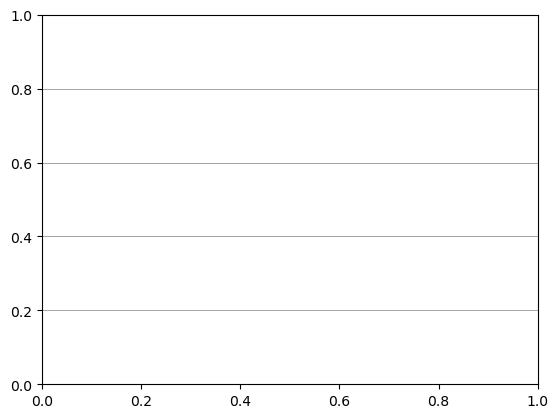

In [7]:
# #Set-up Fonts
# font1 = {'family':'fantasy','color':'blue','size':20}
# font2 = {'family':'serif','color':'darkred','size':15}
# font3 = {'family':'cursive','color':'green','size':20}

code_begin()

############################################
#matplotlib/seaborn
############################################
#Set-up Graph Background:
# Use a dark theme
#plt.style.use('dark_background')

# Reset the background style to the default one
plt.rcdefaults()

# Enable grid lines, horizontal only, with a darker gray color
plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)


# Configuration cell
# Not we have a category called Unknown which gets teh DEFAULT Value

# Set global legend style
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black'

###########################################
#TECH_TYPE Config
###########################################
# Define the desired order of the technology types
tech_type_desired_order = [
    'COAL','COGENERATION','COMBINED_CYCLE','HYDRO','DUAL_FUEL','SIMPLE_CYCLE','GAS_FIRED_STEAM', 'OTHER','SOLAR', 'WIND', 'UNKNOWN','ENERGY_STORAGE', 'TIE_LINE'
]

tech_type_list_plus_BTF = [
    'COAL','COGENERATION','COMBINED_CYCLE','HYDRO','DUAL_FUEL','SIMPLE_CYCLE','GAS_FIRED_STEAM', 'OTHER','SOLAR', 'WIND', 'UNKNOWN','ENERGY_STORAGE', 'TIE_LINE', 'BTF_GENERATION'
]


original_tech_type_desired_order = tech_type_desired_order.copy()

###########################################
#Color Palette Config
###########################################

# Define your custom color palette
custom_color_palette = {
    'Grey': '#555555',
    'Gold': '#FFB81C',
    'White': '#FFFFFF',
    'Clementine': '#FF6900',
    'Cherry': '#C8102E',
    'Plum': '#720062',
    'Mint': '#3CDBC0',
    'Leaf': '#6CC24A',
    'Moss': '#4A773C',
    'Sky': '#59CBE8',
    'Ocean': '#007DBA',
    'Dusk': '#280071',
    'Steel': '#D0D0CE',
    'Slate': '#97999B',
    'Black': '#000000',
    'Yellow' :'#f9f93d' #new for solar
}

# Map your technology types to the custom colors
tech_type_colors = {
    'COAL': custom_color_palette['Black'],
    'COGENERATION': custom_color_palette['Mint'],  # example, assuming you want to map it to 'Leaf'
    'COMBINED_CYCLE': custom_color_palette['Grey'],
    'HYDRO' : custom_color_palette['Sky'],
    'DUAL_FUEL': custom_color_palette['Steel'],
    'SIMPLE_CYCLE' : custom_color_palette['Slate'],
    'GAS_FIRED_STEAM': custom_color_palette['Plum'],
    'OTHER': custom_color_palette['Clementine'],
    'SOLAR': custom_color_palette['Yellow'], #was 'Cherry'
    'WIND': custom_color_palette['Leaf'],
    'UNKNOWN': custom_color_palette['Moss'],
    'ENERGY_STORAGE': custom_color_palette['Ocean'],
    'TIE_LINE': custom_color_palette['Dusk'],
    'BTF_GENERATION' :  custom_color_palette['White']
}


original_color_map = tech_type_colors.copy()



# Create a font color map
tech_type_font_colors = {
    'COAL': 'white',
    'COGENERATION': 'white',
    'COMBINED_CYCLE': 'white',
    'HYDRO': 'black',
    'DUAL_FUEL': 'black',
    'SIMPLE_CYCLE': 'black',
    'GAS_FIRED_STEAM': 'white',
    'OTHER': 'black',
    'SOLAR': 'black', #was white
    'WIND': 'black',
    'UNKNOWN': 'white',
    'ENERGY_STORAGE': 'white',
    'TIE_LINE': 'white',
    'BTF_GENERATION' : 'white'
}



# Make a copy of the color map so that you can revert back to its original state
# in the event that it is changed later in the routine.Remember that althoght
# these dictionaries are public objects, Python allows them to be "mutable" and 
# they can change in any module or cell in a Pythpon projects

#Example:
# Change the color map for specific plots
# tech_type_colors = dict(zip(unique_tech_types, colors))
# Plot your graphs here
# Revert to the original color map
# tech_type_colors = original_color_map 


# Define custom line thickness for each TECH_TYPE
custom_line_thickness = {
    'COAL': 3.0,
    'COGENERATION': 3.0,
    'COMBINED_CYCLE': 3.0,
    'HYDRO': 3.0,
    'DUAL_FUEL': 3.0,
    'SIMPLE_CYCLE': 3.0,
    'GAS_FIRED_STEAM': 3.0,
    'OTHER': 3.0,
    'SOLAR': 5.0,
    'WIND': 5.0,
    'UNKNOWN': 3.0,
    'ENERGY_STORAGE': 5.0,
    'TIE_LINE' : 3.0,
    'BTF_GENERATION' : 1.0
}   
    
tech_type_markers = {
    'COAL': '>',
    'COGENERATION': 'D',
    'COMBINED_CYCLE': 's',
    'HYDRO': '<',
    'DUAL_FUEL': '^',
    'SIMPLE_CYCLE': 'v',
    'GAS_FIRED_STEAM': 'p',
    'OTHER': 'x',
    'SOLAR': 'o',
    'WIND': 'h',
    'UNKNOWN': '^',
    'ENERGY_STORAGE': '8',
    'TIE_LINE' : '*', 
    'BTF_GENERATION' : 'o'
}

#(0, (1, 10))
tech_type_custom_line_styles = {
    'COAL': '-',
    'COGENERATION': '--',
    'COMBINED_CYCLE': '-.',
    'HYDRO': ':',
    'DUAL_FUEL': (0, (3, 5, 1, 5)),  # Example of a custom dash pattern
    'SIMPLE_CYCLE': '-',
    'GAS_FIRED_STEAM': (0, (5, 10)),
    'OTHER': (0, (3, 1, 1, 1)),
    'SOLAR': (0, (3, 5, 1, 5, 1, 5)),
    'WIND': (0, (5, 1)),
    'UNKNOWN': '-',
    'ENERGY_STORAGE': '--',
    'TIE_LINE': (0, (3, 10, 1, 10)),  # Corrected custom dash pattern
    'BTF_GENERATION' : '-'
}

###########################################
#TECH_TYPE REDUCED Config
###########################################

tech_type_desired_order_reduced = [
    'NON_WIND_SOLAR','SOLAR', 'WIND',#'TIE_LINE'
]

tech_type_reduced_colors = {
    'NON_WIND_SOLAR': custom_color_palette['Black'],
    'SOLAR': custom_color_palette['Yellow'], #was 'Cherry'
    'WIND': custom_color_palette['Leaf'],
    #'TIE_LINE': custom_color_palette['Dusk']
}

custom_line_thickness_reduced = {
    'NON_WIND_SOLAR': 2.0,
    'SOLAR': 1.0,
    'WIND': 1.0,
}

tech_type_reduced_custom_line_styles = {
    'NON_WIND_SOLAR': '-',
    'SOLAR': (0, (3, 5, 1, 5, 1, 5)),
    'WIND': (0, (5, 1)),
    #'TIE_LINE': (0, (3, 10, 1, 10)) 
}

###########################################
#FUEL_TYPE Config
###########################################
# Define the desired order of the technology types
fuel_type_desired_order = [
    'COAL','GAS', 'DUAL_FUEL','HYDRO','OTHER',  'SOLAR' , 'WIND',  'UNKNOWN' , 'ENERGY_STORAGE','TIE_LINE'
]

fuel_type_colors = {
    'COAL': custom_color_palette['Black'],
    'GAS': custom_color_palette['Grey'],
    'DUAL_FUEL': custom_color_palette['Steel'],
    'HYDRO': custom_color_palette['Sky'],
    'OTHER': custom_color_palette['Clementine'],
    'SOLAR': custom_color_palette['Yellow'], #was 'Cherry'
    'WIND': custom_color_palette['Leaf'],
    'UNKNOWN': custom_color_palette['Moss'],
    'ENERGY_STORAGE': custom_color_palette['Ocean'],
    'TIE_LINE': custom_color_palette['Dusk'],
    'BTF_GENERATION' :  custom_color_palette['White']
}

original_fuel_type_color_map = fuel_type_colors.copy()

fuel_type_font_colors = {
    'COAL': 'white',
    'GAS' : 'white',
    'HYDRO': 'black',
    'DUAL_FUEL': 'black',
    'SIMPLE_CYCLE': 'black',
    'GAS_FIRED_STEAM': 'white',
    'OTHER': 'black',
    'SOLAR': 'black', #was white
    'WIND': 'black',
    'UNKNOWN': 'white',
    'ENERGY_STORAGE': 'white',
    'TIE_LINE':'white',
    'BTF_GENERATION' : 'white'
}

# Define custom line thickness for each TECH_TYPE
fuel_type_custom_line_thickness = {
    'COAL': 1.0,
    'GAS': 1.0,
    'DUAL_FUEL': 1.0,
    'HYDRO': 1.0,
    'OTHER': 1.0,
    'SOLAR': 2.0,
    'WIND': 2.0,
    'UNKNOWN': 1.0,
    'ENERGY_STORAGE': 1.0,
    'TIE_LINE' : 1.0,
    'BTF_GENERATION' : 1.0
}

fuel_type_markers = {
    'COAL': '>',
    'GAS': 's',
    'DUAL_FUEL': '^',
    'HYDRO': '<',
    'OTHER': 'x',
    'SOLAR': 'o',
    'WIND': 'h',
    'UNKNOWN': 'v',
    'ENERGY_STORAGE': '8',
    'TIE_LINE' : '*',
    'BTF_GENERATION' : 'o' 
}

fuel_type_custom_line_styles = {
    'COAL': '-',
    'GAS' : '--',
    'HYDRO': ':',
    'DUAL_FUEL': (0, (3, 5, 1, 5)),  # Example of a custom dash pattern
    'OTHER': (0, (3, 1, 1, 1)),
    'SOLAR': (0, (3, 5, 1, 5, 1, 5)),
    'WIND': (0, (5, 1)),
    'UNKNOWN': '-',
    'ENERGY_STORAGE': '--',
    'TIE_LINE': (0, (3, 10, 1, 10)),  # Corrected custom dash pattern
    'BTF_GENERATION' : '-'
}

############################################
#plotly
############################################

# import plotly.graph_objects as go

# # Define your default color scheme
# tech_type_colors = {
#     'SOLAR': 'blue', 
#     'COGENERATION': 'green',
#     'OTHER': 'coral',
#     'COAL': 'black',
#     'HYDRO': 'orange',
#     'GAS_FIRED_STEAM': 'purple',
#     'ENERGY_STORAGE': 'cyan',
#     'COMBINED_CYCLE': 'grey',
#     'DUAL_FUEL': 'yellow',
#     'SIMPLE_CYCLE': 'red',
#     'WIND': 'brown',
#     'UNKNOWN': 'gray'
# }

# # Define your trace data
# trace_data = [
#     {'x': [1, 2, 3], 'y': [4, 5, 6], 'name': 'Trace 1', 'marker': {'symbol': tech_type_markers['SOLAR'], 'size': 10}, 'line': {'width': custom_line_thickness['SOLAR'], 'color': tech_type_colors['SOLAR']}},
#     {'x': [1, 2, 3], 'y': [7, 8, 9], 'name': 'Trace 2', 'marker': {'symbol': tech_type_markers['COGENERATION'], 'size': 10}, 'line': {'width': custom_line_thickness['COGENERATION'], 'color': tech_type_colors['COGENERATION']}}
# ]

# # Create the figure
# fig = go.Figure(data=trace_data)

# # Set the template to your default template
# fig.update_layout(template='plotly_dark')

# # Show the plot
# fig.show()

code_end()

In [8]:
# #This has to align with your actual data!!!!!
# first_year_data = 2010
# last_year_data = 2024
# last_month_data = 1

import matplotlib.pyplot as plt
from IPython.display import display

code_begin()

# def format_graph(style='default'):
#     if style == 'dark':
#         plt.style.use('dark_background')
#     else:
#         plt.style.use('default')
#     plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5) 
#     plt.gcf().set_size_inches(16, 9)  # Change the figure size to your desired size
#     plt.xlabel('Time')
#     plt.ylabel('Capacity (MW)')

# Function to automatically pick font color
def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        color = 'white' if (pct < 50) else 'black'
        return '{p:.2f}%\n({v:d} MW)'.format(p=pct, v=val, c=color)
    return inner_autopct

code_end()

<module> Started


<module> Completed
******************************************************************************************


# **Helper Functions**

In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module
import copy
from pathlib import Path


code_begin()

print(f" ide_option = {ide_option}")

#Setup Directories
csv_folder = 'CSV_Folder'
image_folder = 'Image_Folder'

home_dir = 'C:/Users/Rob_Kaz/Documents/Rob Personal Documents/Python/AB Electricity Sector Stats'
office_dir = 'C:/Users/kaczanor/OneDrive - Enbridge Inc/Documents/Python/AB Electricity Sector Stats'

# Set base_output_directory_global to the path of input/output_data folder
if ide_option == 'vscode':
    if os.path.exists(home_dir):
        root_dir = home_dir
    else:
        root_dir = office_dir
    
    output_dir = "output_data/"
    base_output_directory_global = os.path.normpath(os.path.join(root_dir, output_dir))
    print(f" VSCode Notebook base_output_directory_global set")
    print(f" base_output_directory_global: {base_output_directory_global}")

    input_dir = "input_data"  # removed the leading "/"
    base_input_directory_global = os.path.normpath(os.path.normpath(os.path.join(root_dir, input_dir)))
    print(f" VSCode Notebook base_input_directory_global set")

elif ide_option == 'kaggle':
    root_dir = ''
    output_dir = '/kaggle/working/CSV_Folder'# retained the leading "/"
    base_output_directory_global = os.path.normpath(os.path.join(root_dir, output_dir))
    print(f" Kaggle Base base_output_directory_global set")

    root_dir = ''
    input_dir =  '/kaggle/input/' # retained the leading "/"
    base_input_directory_global = os.path.normpath(os.path.normpath(os.path.join(root_dir, input_dir)))
    print(f" Kaggle Base base_input_directory_global set")

elif ide_option == 'jupyter_notebook':
    root_dir = 'C:/Users/kaczanor/AB Electricity Sector Stats'
    #base_output_directory_global  = not required
    print(f" Jupyter Notebook base_output_directory_global set")

    base_output_directory_global = 'NA'
    print(f" Jupyter Notebook base_input_directory_global set")
############################################################################################
# Function to remove folder contents at start-up and create csv and image folders to save data in.
def remove_folder_contents(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                remove_folder_contents(file_path)
                os.rmdir(file_path)
        except Exception as e:
            print(e)

remove_folder_contents(base_output_directory_global)
print(f" base_output_directory_global: {base_output_directory_global}")

# Create CSV and Image folders
os.makedirs(os.path.join(base_output_directory_global, csv_folder), exist_ok=True)
os.makedirs(os.path.join(base_output_directory_global, image_folder), exist_ok=True)

############################################################################################
#Set-up directories based on the IDE you are using and directors based on both office and home computers
#Output Directory
# if ide_option == 'vscode':
#     #old
#     #root_dir = 'C:/Users/Rob_Kaz/Documents/Rob Personal Documents/Python/AB Electricity Sector Stats'
#     #############################################
#     #new
#     # Determine the current user's home directory
#     if os.path.exists(home_dir):
#         root_dir = home_dir
#     else:
#         root_dir = office_dir
#     #############################################
#     output_dir = "output_data/" # removed the leading "/"
#     base_output_directory_global = os.path.join(root_dir, output_dir)
#     print(f" VSCode Notebook base_output_directory_global set")
    
# elif ide_option == 'kaggle':
#     root_dir = ''
#     output_dir = '/kaggle/working/CSV_Folder'# retained the leading "/"
#     base_output_directory_global = os.path.join(root_dir, output_dir)
#     print(f" Kaggle Base base_output_directory_global set")
    
# elif ide_option == 'jupyter_notebook':
#     root_dir = 'C:/Users/kaczanor/AB Electricity Sector Stats'
#     base_output_directory_global  = ""
#     print(f" Jupyter Notebook base_output_directory_global set")


# #Input Directory
# if ide_option == 'vscode':

#     input_dir = "input_data"  # removed the leading "/"
#     base_input_directory_global = os.path.normpath(os.path.join(root_dir, input_dir))
          
# elif ide_option == 'kaggle':
#     root_dir = ''
#     input_dir =  '/kaggle/input/' # retained the leading "/"
#     base_input_directory_global = os.path.normpath(os.path.join(root_dir, input_dir))
          
# elif ide_option == 'jupyter_notebook':
#     base_output_directory_global  = 'NA'

############################################################################################
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, USFederalHolidayCalendar
from datetime import time

code_begin()

# On/Off Peak Delineation Code
############################################################################################
# Define Canadian holidays
class CanadianHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        # Add other Canadian holidays here
    ]
############################################
def save_to_image(ide_option, df, filename):
    if ide_option == 'vscode':
        filename = filename + '.png'
        full_path = os.path.join(base_output_directory_global,filename)
        df.to_csv(full_path, index=True)
    elif ide_option == 'jupyter_notebook':
        pass

    elif ide_option == 'kaggle':
        pass
    return
###############################
def create_path(input_dir, filename, subfolder_name=''):
    # Use os.path.join for all components
    # os.path.join will handle empty strings appropriately by ignoring them
    full_path = os.path.normpath(os.path.join(input_dir, subfolder_name, filename))
    return full_path

############################################
def read_from_csv_input_folder(ide_option, filename, subfolder_name=''):
    if ide_option == 'vscode':
        full_path = create_path(base_input_directory_global, filename, subfolder_name)
        print(f" full_path: {full_path}")
     # Check if the path exists
        if not os.path.exists(full_path):
            print("Error: The file does not exist at the specified path.")
            return None
        df = pd.read_csv(full_path, low_memory=False)
        
    elif ide_option == 'jupyter_notebook':
        # Additional code for Jupyter environment
        pass

    elif ide_option == 'kaggle':
        # Additional code for Kaggle environment
        full_path = create_path(base_input_directory_global, filename, subfolder_name)
        print(f" full_path: {full_path}")
         # Check if the path exists
#         if not os.path.exists(full_path):
#             print("Error: The file does not exist at the specified path.")
#             return None
        df = pd.read_csv(full_path, low_memory=False)
    
    print(f" {filename} loaded from input folder...") 
    return df

############################################
def read_from_csv_output_folder(ide_option, filename, subfolder_name=''):
    if ide_option == 'vscode':
        output_directory = os.path.join(base_output_directory_global, csv_folder)
        full_path = create_path(output_directory, filename)
        print(f" full_path: {full_path}")
     # Check if the path exists
        if not os.path.exists(full_path):
            print("Error: The file does not exist at the specified path.")
            return None
        df = pd.read_csv(full_path, low_memory=False)
        
    elif ide_option == 'jupyter_notebook':
        # Additional code for Jupyter environment
        pass

    elif ide_option == 'kaggle':
        full_path = create_path(base_output_directory_global, filename)
        print(f" full_path: {full_path}")
        df = pd.read_csv(full_path, low_memory=False)
    
    print(f" {filename} loaded from output folder...") 
    return df
#########################################
def save_dataframe_to_csv(ide_option, df, filename):
    if ide_option == 'vscode':
        output_directory = os.path.join(base_output_directory_global, csv_folder)
        full_path = create_path(output_directory, filename)
        print(f"print file path: {full_path}")
        
        # Ensure the directory exists, not the file itself
        directory = os.path.dirname(full_path)  # Get the directory path
        if not os.path.exists(directory):       # Check if directory exists
            os.makedirs(directory)              # Create the directory if it does not exist

        df.to_csv(full_path, index=True,header=True)        # Save the DataFrame to CSV
        print(f"{filename} saved to output folder...")

    elif ide_option == 'jupyter_notebook':
        pass

    elif ide_option == 'kaggle':
        full_path = create_path(base_output_directory_global, filename)
        print(f"print file path: {full_path}")
        
        # Ensure the directory exists, not the file itself
        directory = os.path.dirname(full_path)  # Get the directory path
        if not os.path.exists(directory):       # Check if directory exists
            os.makedirs(directory)              # Create the directory if it does not exist

        df.to_csv(full_path, index=True)        # Save the DataFrame to CSV
        print(f"{filename} saved to output folder...")
        
    return

##########################################
# Function to label peak hours
def label_on_off_peak_hours(data):
    # Ensure the index is in datetime format (if not already)
    data.index = pd.to_datetime(data.index)

    # Get holidays for Canada
    calendar = CanadianHolidayCalendar()
    holidays = calendar.holidays(start=data.index.min(), end=data.index.max())

    # Initialize 'peak_status' column
    data['peak_status'] = 'Off-Peak'  # Default value

    # Define on-peak hours (example: 7 AM to 11 PM)
    on_peak_hours = [time(7, 0), time(23, 0)]

    # Label hours as On-Peak or Off-Peak
    for index, row in data.iterrows():
        current_time = index.time()  # Getting the time part of the index
        current_date = index.date()  # Getting the date part of the index
        day_of_week = index.dayofweek  # Monday=0, Sunday=6

        # Check if it's a weekday (Monday=0, Sunday=6)
        if day_of_week < 5:  # Monday to Friday
            if current_time >= on_peak_hours[0] and current_time <= on_peak_hours[1] and current_date not in holidays:
                data.at[index, 'peak_status'] = 'On-Peak'
        # For Saturday and Sunday, it's always Off-Peak, so no action needed as default is Off-Peak

    return data

# # Apply the function to the dataset
# consolidated_data = label_peak_hours(consolidated_data)

# # Display the first few rows to verify the peak status
# consolidated_data[['begin_datetime_mpt', 'peak_status','pool_price']].head()
#print(consolidated_data.columns)

############################################################################################
# Function to calculate the steepest point and draw vertical lines (excluding extremes)
def plot_steepest_point(ax, x_values, y_values, exclusion_percentage):
    exclude_count = int(len(x_values) * exclusion_percentage / 100)
    
    # Exclude the first and last parts of the data
    slopes = np.diff(y_values[exclude_count:-exclude_count]) / np.diff(x_values[exclude_count:-exclude_count])
    max_slope_idx = np.argmax(np.abs(slopes)) + exclude_count
    
    # Steepest point
    x_steepest = x_values[max_slope_idx]
    
    # Draw vertical line
    ax.axvline(x=x_steepest, color='grey', linestyle='--', alpha=0.7)

############################################################################################

def create_demand_heatmap(data, heatmap_title, y_label, x_label, total = None):
  

    # Divide the values by 1000 to represent them in GWh
    #year_month_result_table_in_gwh = year_month_result_table

    # Set the figure size
    plt.figure(figsize=(12, 8))
    
    if total == True:
        # Add a 'Total' column that sums the annual production across all Tech_Types for each year
        data['Total'] = data.sum(axis=1)
    
    # Create the heatmap for year_month_result_table_in_gwh with custom tick labels and GWh color strip
    ax = sns.heatmap(data, cmap='coolwarm_r', annot=True, fmt=',.0f', linewidths=0.5)

    # Rotate the year markers on the x-axis by 0 degrees (horizontal)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Rotate the week values on the y-axis by 0 degrees (horizontal)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Set the title and labels
    chart_title = heatmap_title
    plt.title(chart_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Customize the color bar labels to display in GWh
    cbar = ax.collections[0].colorbar
    cbar.set_label('Demand (GWh)')

    # Format the color bar labels as integers with thousands separators
    formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
    cbar.set_ticks(cbar.get_ticks())
    cbar.ax.yaxis.set_major_formatter(formatter)

    # Show the plot
    plt.show()
    
############################################################################################

def analyze_nan_values(df):
    """
    Analyzes and prints information about NaN values in a DataFrame.
    Example usage
    analyze_nan_values(unit_hourly_revenue_df)
    :param df: A Pandas DataFrame.
    """
    
    print(type(df)) 
    
    # Find rows with NaN values
    rows_with_nan = df[df.isna().any(axis=1)]
    
    # Print rows with NaN values
    if not rows_with_nan.empty:
        print("Rows with NaN values:")
        print(rows_with_nan)
        
        # Identify specific columns with NaN values
        for index, row in rows_with_nan.iterrows():
            nan_columns = row[row.isna()].index.tolist()
            print(f"Row {index} has NaN in columns: {nan_columns}")
    else:
        print("No rows with NaN values.")

    # Count of NaN values in each column
    nan_count_per_column = df.isna().sum()
    print("\nNaN count per column:")
    print(nan_count_per_column)

    # Total count of NaN values
    total_nan_count = df.isna().sum().sum()
    print(f"\nTotal number of NaN values in the DataFrame: {total_nan_count}")

############################################################################################

def concatenate_with_year_column(dataframes_by_year, granularity):
    """
    Concatenate dataframes with a 'Year' column from a copy of the input dictionary.

    Args:
    dataframes_by_year (dict): Dictionary of DataFrames keyed by year.
    granularity (str): The time granularity of the data (e.g., 'hourly', 'monthly', etc.).

    Returns:
    pd.DataFrame: Concatenated DataFrame with a 'Year' column.
    """
    concatenated_df = pd.DataFrame()
    copied_dataframes = copy.deepcopy(dataframes_by_year)

    for year, df in copied_dataframes.items():
        # Add a 'Year' column to each DataFrame
        df['Year'] = year
        # Add a 'Granularity' column to identify the granularity of each row
        df['Granularity'] = granularity
        # Concatenate the DataFrame
        concatenated_df = pd.concat([concatenated_df, df])

    return concatenated_df
############################################################################################

def concatenate_annual_dataframes_with_year(dataframes_by_year):
    """
    Concatenate annual DataFrames and include the year as a column.

    Args:
    dataframes_by_year (dict): Dictionary of annual DataFrames keyed by year.

    Returns:
    pd.DataFrame: Concatenated DataFrame of annual data with the year included.
    """
    concatenated_df = pd.DataFrame()

    for year, df in dataframes_by_year.items():
        # Extract year from the index and create a 'Year' column
        df['Year'] = year
        concatenated_df = pd.concat([concatenated_df, df])

    return concatenated_df

############################################################################################
def aggregate_to_frequency(dataframes_by_year, frequency):
    """
    Aggregate data to a specified frequency (monthly or quarterly).

    Args:
    dataframes_by_year (dict): Dictionary of DataFrames keyed by year.
    frequency (str): Frequency for resampling ('M' for monthly, 'Q' for quarterly).

    Returns:
    pd.DataFrame: Aggregated DataFrame.
    """
    aggregated_df = pd.DataFrame()

    for df in dataframes_by_year.values():
        # Resample and sum the data for each period
        resampled_df = df.resample(frequency).sum()
        aggregated_df = pd.concat([aggregated_df, resampled_df])

    return aggregated_df

############################################################################################
def write_df_to_csv_with_progress(df, file_path, chunk_size=10000):
    """
    Writes a DataFrame to a CSV file in chunks with a progress bar.

    :param df: pandas DataFrame to be written to CSV.
    :param file_path: Path of the CSV file to write.
    :param chunk_size: Number of rows per chunk. Default is 10,000.
    """
    number_of_chunks = len(df) // chunk_size + 1

    # Initialize a progress bar
    with tqdm(total=number_of_chunks) as pbar:
        for i in range(number_of_chunks):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            # Extract chunk of data
            chunk = df.iloc[start_idx:end_idx]
            # Write chunk to file
            mode = 'a' if i > 0 else 'w'  # Append if not the first chunk
            header = i == 0  # Include header only for the first chunk
            chunk.to_csv(file_path, mode=mode, header=header, index=True)
            # Update the progress bar
            pbar.update(1)

############################################################################################
def format_with_commas(x):
    """
    Helper function to format a number with commas.
    """
    try:
        return "{:,.0f}".format(x)  # formats the number with commas and no decimal places
    except:
        return x  # if x is not a number, return as is

############################################################################################
def print_hourly_production_dict_by_asset_summary(hourly_production_dict):
    for year, df in hourly_production_dict.items():

        print(f"Year: {year}")
        print(df.head())  # Prints the first 5 rows of the DataFrame
        print("\n")  # Adds a new line for better readability
    print("Summary printed successfully.")

############################################################################################    
def print_annual_production_dict_by_tech_summary(annual_production_by_tech):
    """
    Prints the annual production summary in a table format with numbers formatted with commas.
    
    Parameters:
    annual_production_by_tech (dict): A dictionary where keys are years and values are DataFrames of production data.
    """
    
    # Example usage
    # print_annual_production_summary(annual_production_by_tech)   
    
    dfs = []

    for year, df in annual_production_by_tech.items():
        df_copy = df.copy()
        df_copy['Year'] = year
        df_copy.reset_index(drop=True, inplace=True)
        dfs.append(df_copy)

    annual_summary = pd.concat(dfs)
    annual_summary = annual_summary.set_index('Year').reset_index()

    # Calculate the grand total for each tech type
    annual_summary['Grand Total'] = annual_summary.drop('Year', axis=1).apply(pd.to_numeric, errors='coerce').sum(axis=1)

    # Apply formatting to each column
    annual_summary = annual_summary.map(format_with_commas)

    print(annual_summary.to_string(index=False))

    
############################################################################################
def print_annual_production_dict_by_asset_summary(annual_production_by_asset):
    """
    Prints the annual production summary by asset in a table format with numbers formatted with commas.
    
    Parameters:
    annual_production_by_asset (dict): A dictionary where keys are years and values are DataFrames of production data by asset.
    """
    
    # Example usage
    # print_annual_production_by_asset_summary(annual_production_by_asset)
    
    dfs = []

    for year, df in annual_production_by_asset.items():
        df_copy = df.copy()
        df_copy['Year'] = pd.to_datetime(df_copy.index).year[0]  # Assuming the index is a datetime and all dates within a DataFrame are within the same year
        df_copy.reset_index(drop=True, inplace=True)
        dfs.append(df_copy)

    annual_summary = pd.concat(dfs)
    annual_summary.set_index('Year', inplace=True)

    # Calculate the grand total for each asset
    annual_summary['Grand Total'] = annual_summary.apply(pd.to_numeric, errors='coerce').sum(axis=1)

    # Apply formatting to each column
    annual_summary = annual_summary.map(lambda x: "{:,}".format(x) if isinstance(x, (int, float)) else x)

    print(annual_summary.to_string(index=True))

############################################################################################
# Modified function to create file paths
def create_file_path(base_directory, filename):
    # Determine folder based on file extension
    if filename.endswith('.csv'):
        folder = csv_folder
    elif filename.endswith('.png'):
        folder = image_folder
    else:
        folder = ''  # Default folder if extension is not recognized

    full_path = os.path.join(base_directory, folder, filename)

    # Create folder if it doesn't exist
    if not os.path.exists(os.path.dirname(full_path)):
        os.makedirs(os.path.dirname(full_path))
    
    return full_path

############################################################################################
# Modified function to save figures
def save_figure(figure, filename, dpi=300):
    output_path = create_file_path(base_output_directory_global , filename)
    figure.savefig(output_path, dpi=dpi)
    plt.close(figure)  # Close the figure to free up memory
    
    
# Example usage
# Save as CSV
# filename_csv = 'example.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# # Your DataFrame to_csv call here, e.g.,
# # df.to_csv(full_file_path_csv, index=True)

# # Export Image
# filename_img = 'example_plot.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# Alternative function to save figures
# Create a figure and axes object
#fig, ax = plt.subplots()
# Plot your data
#ax.plot([1, 2, 3], [4, 5, 6])
#dpi_value = 300  # Example value, adjust as needed
#fig.savefig('my_plot.png', dpi=dpi_value)

############################################################################################
# Saving Plotly Images
def save_plotly_figure(figure, filename, width=1000, height=600, scale=2):
    output_path = create_file_path(base_output_directory_global , filename)
    figure.write_image(output_path, width=width, height=height, scale=scale)


############################################################################################
def prepare_dataframe(df, add_year=True):      
    if 'DateTime' in df.columns:
        df['DateTime'] = pd.to_datetime(df['DateTime'])
        df.set_index('DateTime', inplace=True)

        if add_year and isinstance(df.index, pd.DatetimeIndex):
            df['Year'] = df.index.year

    return df
        
############################################################################################
def prepare_dataframe1(df):
    # Check if 'DateTime' is a column, and if so, convert it to datetime format and set as index
    if date_time_col_name_global in df.columns:
        df[date_time_col_name_global] = pd.to_datetime(df[date_time_col_name_global], format=datetime_format_global, errors='coerce')
        df.set_index(date_time_col_name_global, inplace=True)

    # Optionally, convert DateTime index to just the year
    # Remove or comment out this part if you want to keep the full datetime information
    if not pd.api.types.is_integer_dtype(df.index):
        df.index = df.index.year

    return df

############################################################################################
def prepare_dataframe2(df):
    if isinstance(df, pd.Series):
        df = df.to_frame()

    if 'DateTime' in df.columns:
        df['DateTime'] = pd.to_datetime(df['DateTime'])
        df.set_index('DateTime', inplace=True)

    if not pd.api.types.is_integer_dtype(df.index):
        df.index = df.index.year  # Ensure index is year as integer

    return df

############################################################################################
def prepare_dataframe_monthly(df):
    # Convert to DataFrame if it's a Series
    if isinstance(df, pd.Series):
        df = df.to_frame()

    # Convert 'DateTime' column to DateTime index if it exists
    if 'DateTime' in df.columns:
        df['DateTime'] = pd.to_datetime(df['DateTime'])
        df.set_index('DateTime', inplace=True)

    # If index is DatetimeIndex, convert to PeriodIndex with monthly frequency
    if isinstance(df.index, pd.DatetimeIndex):
        df.index = df.index.to_period('M')

    return df

############################################################################################
def filter_by_year_and_status(year, status):
    # Convert the year to string because DataFrame column names are strings
    year_str = str(year)
    
    # Merging the yearly status information with the original metadata
    combined_df = metadata.merge(status_df, on='ASSET_ID', how='left')
    
    # Filter for assets that match the given status for the specified year
    filtered_df = combined_df[combined_df[year_str] == status]
    
    return filtered_df

############################################################################################
def find_missing_hours(data_frames_dict):
    # Create a union of all indices from the data frames
    all_indices = None
    for df in data_frames_dict.values():
        if all_indices is None:
            all_indices = df.index
        else:
            all_indices = all_indices.union(df.index)

    missing_hours = {}
    # Find missing date-times in each data frame
    for name, df in data_frames_dict.items():
        # Generate the full range of date-times for the period in the data frame
        start_date = df.index.min()
        end_date = df.index.max()
        full_range = pd.date_range(start=start_date, end=end_date, freq='h')

        # Find missing date-times
        missing_date_times = full_range.difference(df.index)

        # Exclude DST start and end hours for each year
        years = missing_date_times.year.unique()
        
        for year in years:
            # DST rules changed in 2006
            if year >= 2006:
                # DST Start (Second Sunday in March)
                dst_start = pd.Timestamp(f"{year}-03-01") + pd.DateOffset(weeks=1, weekday=6)

                # DST End (First Sunday in November)
                dst_end = pd.Timestamp(f"{year}-11-01") + pd.DateOffset(weekday=6)
                
            else:
                # DST Start (First Sunday in April)
                dst_start = pd.Timestamp(f"{year}-04-01") + pd.DateOffset(weekday=6)

                # DST End (Last Sunday in October)
                dst_end = pd.Timestamp(f"{year}-10-31") - pd.DateOffset(days=(pd.Timestamp(f"{year}-10-31").weekday() + 1) % 7)

            missing_hours[name] = missing_date_times

    return missing_hours

import os

############################################################################################
def reorder_dataframe_columns(df, desired_order):
    """
    Reorders the columns of a DataFrame based on a specified order.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be reordered.
    desired_order (list): A list of column names in the desired order.

    Returns:
    pandas.DataFrame: A DataFrame with columns reordered.
    """
    
    # Usage example:
    # concatenated_hourly_production_by_tech_by_year_df = reorder_dataframe_columns(concatenated_hourly_production_by_tech_by_year_df, tech_type_desired_order)
    
    # Filter out any columns from desired_order that are not in the DataFrame
    ordered_columns = [col for col in desired_order if col in df.columns]

    # Reorder the DataFrame using the filtered list of columns
    return df[ordered_columns]



############################################################################################
def save_df_to_csv(dataframe_dict, base_directory, file_prefix, include_index=False):
    """
    Save each DataFrame in a dictionary to a separate CSV file.

    :param dataframe_dict: Dictionary of DataFrames to be saved.
    :param base_directory: The base directory where the files will be saved.
    :param file_prefix: Prefix for the filename.
    :param include_index: Whether to include the DataFrame index in the CSV. Default is False.
    """
    for key, df in dataframe_dict.items():
        filename_csv = f"{file_prefix}_{key}.csv"
        full_file_path_csv = os.path.join(base_directory, filename_csv)
        df.to_csv(full_file_path_csv, index=include_index)
        print(f"File saved: {full_file_path_csv}")
###################################################################################      
def preprocess_data_frames(data_frames_dict, datetime_col='DateTime'):
    """
    Preprocess the provided data frames for analysis.
    """
    ############################################################################################
    def standardize_index(df):
        """
        Check if the data frame has a 'DateTime' column. If so, convert it to datetime and set it as the index.
        If the index is already a datetime, leave it as is.
        """
        if datetime_col in df.columns:
            df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
            df.set_index(datetime_col, inplace=True)
        elif not pd.api.types.is_datetime64_any_dtype(df.index):
            df.index = pd.to_datetime(df.index, errors='coerce')
        return df

    ############################################################################################
    def handle_dst_and_missing_data(data_frames_dict):
        """
        Adjust for DST and fill in missing data.
        """
        updated_dataframes = {}
        duplicate_info = {}  # Container to hold duplicate information for each DataFrame

        # Find missing hours for all data frames
        missing_hours = find_missing_hours(data_frames_dict)
        #print(f"Missing Hour Before Non-DST Hours Removed: {missing_hours}")

        for name, df in data_frames_dict.items():
            #print-out index of each dataframe
            print(f"Within handle_dst_and_missing_data - {name} index.dtype: {df.index.dtype}")
            try:
                modified_df = df.copy()

                # Remove all duplicates
                modified_df = modified_df[~modified_df.index.duplicated(keep='first')]
                print("Duplicates removed")

                # Handle missing hours
                for missing_hour in missing_hours[name]:
                    previous_hour = missing_hour - pd.Timedelta(hours=1)
                    if previous_hour in modified_df.index:
                        # Copy data from the previous hour
                        previous_hour_data = modified_df.loc[previous_hour]
                        # Insert the missing hour with the copied data
                        modified_df.loc[missing_hour] = previous_hour_data
                    else:
                        # Handle case where previous hour is also missing if needed
                        pass

                # Ensure the DataFrame is sorted by index after inserting rows
                modified_df.sort_index(inplace=True)
                print("Sorting data")

                # Forward-fill any remaining gaps
                modified_df = modified_df.asfreq('h', method='ffill')
                print("Forward-fill completed")

                updated_dataframes[name] = modified_df
                print(f"Data frame {name} processed successfully")

                #Check for duplicates during processing
                duplicates = modified_df[modified_df.index.duplicated(keep=False)]
                print(f"Checking duplicates in {name}: {duplicates.empty}")  # Add this line
                if not duplicates.empty:
                    duplicate_info[name] = duplicates
            except Exception as e:
                print(f"An error occurred with DataFrame: {name}")
                print(f"Error: {e}")
                # Break out of the loop upon encountering an error
                #break
        #Check for missing hours again
        missing_hours = find_missing_hours(updated_dataframes)
        #print(f" Missing Hour Check at the end of handle_dst_and_missing_data() = {missing_hours}")
        
        #Print out the duplicate information or confirmation of no duplicates
#         for name in updated_dataframes:
#             if name in duplicate_info:
#                 print(f"Duplicate Hour Check for {name} at the end of handle_dst_and_missing_data():")
#                 print(duplicate_info[name])
#             else:
#                 print(f"No duplicates found in {name} after processing.")
#         print("*" * 90)
        
        return updated_dataframes, duplicate_info, missing_hours
    ############################################################################################
    def align_data_frames(data_frames_dict):
        """
        Align all data frames to the date range of the data frame with the shortest end date.
        """
        # Find the earliest maximum (end) date among all data frames
        max_end_date = min(df.index.max() for df in data_frames_dict.values())

        aligned_data_frames_dict = {}
        for name, df in data_frames_dict.items():
            # Align each data frame to the earliest maximum (end) date
            aligned_df = df.loc[:max_end_date]
            aligned_data_frames_dict[name] = aligned_df

        return aligned_data_frames_dict

    ############################################################################################
    def check_missing_indices(data_frames):
        """
        Check for missing indices between pairs of data frames.
        """
        missing_indices_info = {}
        for i, df1 in enumerate(data_frames):
            for j, df2 in enumerate(data_frames):
                if i != j:
                    key = (f"df{i+1}", f"df{j+1}")
                    missing_indices_info[key] = {
                        'missing_in_df1': df2.index.difference(df1.index),
                        'missing_in_df2': df1.index.difference(df2.index)
                        }
        
        return missing_indices_info
    ############################################################################################
    def identify_and_print_duplicates(data_frames_dict):
        """
        Identify and print duplicates in each data frame.
        """
        for name, df in data_frames_dict.items():
            if df.index.duplicated().any():
                duplicates = df[df.index.duplicated(keep=False)]
                print(f" Found duplicates in {name} based on index:")
                print(duplicates)
            else:
                print(f" No duplicates in {name} based on index:")
                print("*" *90)

    ############################################################################################
    def check_24_hour_intervals(data_frames_dict):
        """
        Check each data frame for 24-hour intervals on each day and print total missing hours.
        """
        for name, df in data_frames_dict.items():
            # Group by date and count the number of records for each day
            daily_counts = df.groupby(df.index.date).count()

            # Assuming you want to count rows, you can sum across all columns
            row_counts = daily_counts.sum(axis=1)

            # Find days with counts different from 24
            days_with_incorrect_counts = row_counts[row_counts != 24]

            # Calculate the total number of missing hours
            total_missing_hours = sum(24 - count for count in days_with_incorrect_counts)

            print(f"Total missing hours in {name}: {total_missing_hours}")
            print("*" *90)
    ############################################################################################
    def process_each_data_frame(data_frames_dict):
        """
        Process each data frame in the dictionary.
        """
        updated_dataframes = {}
        
        #Step 2a:  First, handle DST and missing data for all data frames
        print("Starting Step 2a")
        updated_dataframes, duplicate_info, missing_hours = handle_dst_and_missing_data(data_frames_dict)
        print(f" Missing Hour Check at the end of handle_dst_and_missing_data() = {missing_hours}")

            
        for name in updated_dataframes:
            if name in duplicate_info:
                print(f"Duplicate Hour Check for {name} at the end of handle_dst_and_missing_data():")
                print(duplicate_info[name])
            else:
                print(f"No duplicates found in {name} after processing.")
        print("*" * 90)
        print("Completed Step 2a: Each data frame has been processed for missing data, duplicates and DST.")
        
         # Then, apply further processing to each data frame individually
        #for name, df in data_frames_dict.items():
        for name, df in updated_dataframes.items():
            try:
                print(f" Checking {name} for missing date-times:")
                df_copy = df.copy()
                 #Step 2b:
                print(f" Starting Step 2b for {name}")
                df_copy = standardize_index(df_copy)
                print(f" Completed Step 2b: {name} has been processed for standardized index")
                # Further custom processing for each data frame...
                #Step 2c:
                print(f" Starting Step 2c for {name}")
                updated_dataframes[name] = df_copy
                print(f" Completed Step 2c: {name} returned to proceed to Step 3")
                print("*" *90)
            except Exception as e:
                print(f"An error occurred with DataFrame: {name}")
                print(f"Error: {e}")
                break
                
        return updated_dataframes

############################################################################################
    

    # Step 1: Initial Check for Missing Indices
    # This should be done on the original, unprocessed data frames
    print("Starting Step 1")
    missing_indices_info_before = check_missing_indices(list(data_frames_dict.values()))
    for key, value in missing_indices_info_before.items():
        print(f"Initial missing indices between {key[0]} and {key[1]}:", value)
    print("Completed Step 1: Each data frame has been processed for missing indices.")
    print("*" *90)

    # Step 2: Process Each Data Frame
    print("Starting Step 2")
    processed_data_frames_dict = process_each_data_frame(data_frames_dict)
    #print("Completed Step 2: Each data frame has been processed.")

    # Step 2.5: Identifying Duplicates
    print("Starting Step 2.5")
    identify_and_print_duplicates(processed_data_frames_dict)
    print("Completed Step 2.5: Each data frame has been checked again for duplicates.")

    # Step 3: Aligning Data Frames
    print("Starting Step 3")
    aligned_data_frames_dict = align_data_frames(processed_data_frames_dict)
    print("Completed Step 3: Each data frame has been processed for alignement.")

    # Step 4: Identifying Duplicates
    print("Starting Step 4")
    identify_and_print_duplicates(aligned_data_frames_dict)
    print("Completed Step 4: Each data frame has been checked again for duplicates.")

    # Step 5: Check each data frame for 24-hour intervals
    print("Starting Step 5")
    check_24_hour_intervals(aligned_data_frames_dict)
    print("Completed Step 5: Each data frame has been checked to ensure each day as a 24 hour interval.")

    # Step 6: Final Check for Missing Indices
    # This should be done on the processed and aligned data frames
    print("Starting Step 6")
    missing_indices_info_after = check_missing_indices(list(aligned_data_frames_dict.values()))
    for key, value in missing_indices_info_after.items():
        print(f"Final missing indices between {key[0]} and {key[1]}:", value)
    print("Completed Step 6: Each data frame has been checked for missing indices.")
    print("*" *90)
 
        
    return aligned_data_frames_dict

code_end()

<module> Started
 ide_option = vscode
 VSCode Notebook base_output_directory_global set
 base_output_directory_global: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\output_data
 VSCode Notebook base_input_directory_global set


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\kaczanor\\OneDrive - Enbridge Inc\\Documents\\Python\\AB Electricity Sector Stats\\output_data'

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART B: Load, Append, and Pre-process Data</div>

# **Setup Global Variables**

In [ ]:
import geopandas as gpd
from pathlib import Path

code_begin()



#This has to align with your actual data!!!!!
first_year_data = 2010
last_year_data = 2023
last_year_data_for_graphing = 2023
last_month_data = 1



# carbon_tax_annual_dict = {
#     '2001': 0,
#     '2001': 0,
#     '2002': 0,
#     '2003': 0,
#     '2004': 0,
#     '2005': 0,
#     '2006': 0,
#     '2007': 15,
#     '2008': 15,
#     '2009': 15,
#     '2010': 15,
#     '2011': 15,
#     '2012': 15,
#     '2013': 15,
#     '2014': 15,
#     '2015': 15,
#     '2016': 20,
#     '2017': 30,
#     '2018': 30,
#     '2019': 30,
#     '2020': 30,
#     '2021': 40,
#     '2022': 50,
#     '2023': 65,
#     '2024': 80,
#     '2025': 95,
#     '2026': 110,
#     # Add further years as needed
# }



#NOTE
#Dates in csv files are imported as strings

#Set global variable for DateTime variable for ALL data frames
glb_datetime_col_name = 'DateTime'
glb_datetime_format = '%Y-%m-%d %H:%M:%S'

# Load CSV files
#______________________________________________________________________________
#Existig Production Data and Update for Appending
#______________________________________________________________________________
#File Path for Existing Production Data
existing_production_df = read_from_csv_input_folder(ide_option, 'Hourly_Metered_Volumes_and_Pool_Price_and_AIL 20100101 to 20231231.csv', 'metered-volume-source-files')

#Date Labels for Existing Production Data
glb_dateUTC_label_existing_prodcution  = 'begin_date_utc'
glb_dateMST_label_existing_production = 'begin_date_mpt'

print(f" existing_production_df.colunms: {existing_production_df.columns}")

#File Path for Update to Production Data
#update_to_production_df = read_from_csv_input_folder(ide_option, 'Consolidated Generation Metered Volumes 20240101 to 20240125.csv', 'metered-volume-source-files')
update_to_production_df = read_from_csv_input_folder(ide_option, 'Consolidated Generation Metered Volumes 20240101 to 20240625.csv', 'metered-volume-source-files')

#Date Labels for Update to Production Data  
glb_dateUTC_label_updated_production  = 'begin_date_utc'
glb_dateMST_label_updated_production = 'begin_date_mpt'

print(f" update_to_production_df.colunms: {update_to_production_df.columns}")

#______________________________________________________________________________
# Load Generator Meta Data Files
#______________________________________________________________________________
# Define the data types you expect for each column
# Define the data types for non-date columns

datetime_format = '%m/%d/%Y'
data_types = {
    'START_YEAR': 'int64',
    'RETIREMENT_YEAR': 'int64',
}

#File Path for Generator Metadata
metadata = read_from_csv_input_folder(ide_option,  'generatorMetadata_20240411.csv','source-meta-data-files')

print(metadata)
# Convert date columns separately with the known format
metadata['START_DATE'] = pd.to_datetime(metadata['START_DATE'], format=datetime_format)
metadata['RETIREMENT_DATE'] = pd.to_datetime(metadata['RETIREMENT_DATE'], format=datetime_format)

#______________________________________________________________________________
#Pool Price
#______________________________________________________________________________
#File Path for Pool Price
#handled later in code

#Date Labels for Pool Price
glb_dateUTC_label_pool_price  = 'begin_date_utc'
glb_dateMST_label_pool_price = 'begin_date_mpt'
#_________________________________________________________________________________
#Natural Gas Prices (Daily)
#______________________________________________________________________________
#File Path for Daily Natural Gas Prices
daily_nat_gas_prices = read_from_csv_input_folder(ide_option, 'AECO Natural Gas 2000 to 2023 daily 04012024.csv','aeco-daily-natural-gas-prices-2000-to-2024')

#Date Labels for Daily Natural Gas Prices
#None
#______________________________________________________________________________
#Demand Data
#______________________________________________________________________________
#File Path for Demand Data
#handled later in code

#Date Labels for Demand Data
glb_dateUTC_label_ail_demand = 'Date_Begin_GMT'
glb_dateMST_label_ail_demand = 'Date_Begin_Local'

#______________________________________________________________________________
#Substation and Transmission Shape Files
#______________________________________________________________________________
#File Path for Substation and Transmission Shape Files
substation_shape_file_path = create_path(input_dir, 'Substations.shp', 'aeso-substation-and-transmission-shape-files' )
transmission_shape_file_path = create_path(input_dir, 'Transmission Lines.shp','aeso-substation-and-transmission-shape-files')

#Date Labels for Substation and Transmission Shape Files
#None
#______________________________________________________________________________
#Substation and Transmission Shape Data Files
#______________________________________________________________________________
#File Path for Substation and Transmission Shape Data Files
substation_capability_file_path = create_path(input_dir,  'Substation Capability Data.csv','alberta-transmission-and-substation-data')
transmission_capability_file_path = create_path(input_dir, 'Transmission Capability Data.csv','alberta-transmission-and-substation-data')
sts_capability_file_path = create_path(input_dir, 'STS Loss Factor Data.csv','alberta-transmission-and-substation-data')

#Date Labels for Substation and Transmission Shape Data Files
#None

#______________________________________________________________________________
#AESO Planning Area Coordinates
#______________________________________________________________________________
#File Path for AESO Planning Area Coordinates
planning_area_file_path = create_path(input_dir, 'AESO_Planning_Areas.shp', 'aeso-planning-areas')

#Date Labels for AESO Planning Area Coordinates
#None
#______________________________________________________________________________
#Mock GPS Data
#______________________________________________________________________________
#File Path for Mock GPS Data
mock_gen_gps_data = create_path(input_dir, 'Mock GPS Coordinates 20240404.csv','source-meta-data-files')

#Date Labels for Mock GPS Data
#None
#______________________________________________________________________________
#ERCOT Demand Data
#______________________________________________________________________________
#File Path for ERCOT Demand Data
ercot_demand_data_2023 = create_path(input_dir, 'Native_Load_2023.xlsx', 'ercot-demand-data')

#Date Labels for ERCOT Demand Data
#None
#_____________________________________________________________________________
#AESO CSC Report Page 
#______________________________________________________________________________
#File Path for AESO CSC Report Page
aseso_csd_report_servlet = create_path(input_dir, 'CSDReportServlet_20240718.htm', 'aeso-website-structure')

#Date Labels for AESO CSC Report Page
#None
 
 ########################################################
# datetime_col_name_glb = 'DateTime'
# asset_id_col_name_glb = 'ASSET_ID'
# tech_type_col_name_glb = 'TECH_TYPE'
# fuel_type_col_name_glb = 'FUEL_TYPE'
# start_date_col_name_glb = 'START_DATE'
# retirement_date_col_name_glb = 'RETIREMENT_DATE'

# existing_production_df_datecol_name_glb = 'Date_Begin_Local'
# updateto__production_df_datecol_name_glb = 'begin_date_mpt'
# demand_data_datecol_name_glb = 'Date_Begin_Local'
# export_bc_col_name_glb = 'EXPORT_BC'
# export_mt_col_name_glb = 'EXPORT_MT'
# export_sk_col_name_glb = 'EXPORT_SK'
# import_bc_col_name_glb = 'IMPORT_BC'
# import_mt_col_name_glb = 'IMPORT_MT'
# import_sk_col_name_glb = 'IMPORT_SK'

# # Combine into a list
# import_export_col_names_glb = [
#     export_bc_col_name_glb,
#     export_mt_col_name_glb,
#     export_sk_col_name_glb,
#     import_bc_col_name_glb,
#     import_mt_col_name_glb,
#     import_sk_col_name_glb
# ]

# status_development = 'DEVELOPMENT'
# status_retired = 'RETIRED'
# status_operating = 'OPERATING'
# status_repower = 'REPOWER'
# status_opearting_repower= 'OPERATING/REPOWERED'
    
code_end()

<module> Started
 full_path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\input_data\metered-volume-source-files\Hourly_Metered_Volumes_and_Pool_Price_and_AIL 20100101 to 20231231.csv
 Hourly_Metered_Volumes_and_Pool_Price_and_AIL 20100101 to 20231231.csv loaded from input folder...
 existing_production_df.colunms: Index(['begin_date_utc', 'begin_date_mpt', 'ABG1', 'ADM1', 'AFG1', 'AIG1',
       'AKE1', 'ALP1', 'ALP2', 'ALP3',
       ...
       'GN2', 'GN3', 'GPEC', 'HRM', 'KH2', 'NPC1', 'SCR3', 'SH1', 'SH2',
       'SHCG'],
      dtype='object', length=294)
 full_path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\input_data\metered-volume-source-files\Consolidated Generation Metered Volumes 20240101 to 20240625.csv
 Consolidated Generation Metered Volumes 20240101 to 20240625.csv loaded from input folder...
 update_to_production_df.colunms: Index(['begin_date_utc', 'begin_date_mpt', 'ABG1', 'ADM1', 'AF

# **Presentation Graphics**

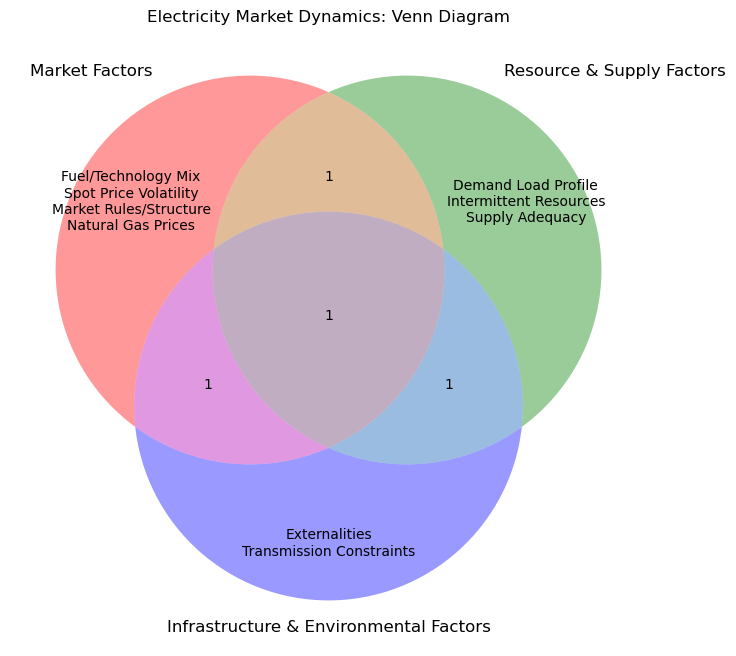

In [ ]:
#Venn Diagram Market Drivers

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Creating a Venn diagram
plt.figure(figsize=(10, 8))
venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), 
             set_labels=('Market Factors', 'Resource & Supply Factors', 'Infrastructure & Environmental Factors'))

# Assigning labels to each section
venn.get_label_by_id('100').set_text('Fuel/Technology Mix\nSpot Price Volatility\nMarket Rules/Structure\nNatural Gas Prices')
venn.get_label_by_id('010').set_text('Demand Load Profile\nIntermittent Resources\nSupply Adequacy')
venn.get_label_by_id('001').set_text('Externalities\nTransmission Constraints')

# Display the plot
plt.title("Electricity Market Dynamics: Venn Diagram")
plt.show()

###################################################################

# import gzip
# import io
# import pprint
# import upsetplot
# import pandas as pd
# from collections import defaultdict
# from matplotlib_venn import venn2, venn3
# from matplotlib import pyplot as plt
# from urllib.request import Request, urlopen


# def load_movie_data(sample=True):
#     """
#     Directly download and format data into pandas dataframe
#     /!\ File is about 130Mb depending on speed connection,
#     it might take some time.
#     """
#     req = Request('https://datasets.imdbws.com/title.basics.tsv.gz')
#     req.add_header('Accept-Encoding', 'gzip')
#     response = urlopen(req)
#     content = gzip.decompress(response.read())
#     data = pd.read_csv(io.BytesIO(content), encoding='utf8', sep="\t")
#     data = data[data.isAdult == 0]
#     if sample:
#         # Two percent might seem low but there is approx. 7 million
#         # titles without Adult category.
#         return data.sample(frac=0.02)
#     else:
#         return data

# data = load_movie_data()

# pp = pprint.PrettyPrinter(indent=4)
# print("Data column names: ")
# pp.pprint(list(data.columns))
# print("Data shape: " + str(data.shape))
# print("Genres column examples: ")
# pp.pprint(data.genres.sample(5).head())

# #################################
# # Reshape data to have for every category,
# # a list of movies.
# genres_movies = defaultdict(list)
# for index, row in data.iterrows():
#     try:
#         for genre in row["genres"].split(','):
#             genres_movies[genre].append(row['primaryTitle'])
#     except:
#         pass

# pp = pprint.PrettyPrinter(indent=4, depth=1)
# print("Data structure: ")
# pp.pprint(genres_movies)

# # Plot a simple Venn diagram and save it to file
# venn2([set(genres_movies['Action']), set(genres_movies['Romance'])], set_labels = ('Action', 'Romance'))
# plt.show()
# plt.savefig("./simple_venn.png")
# plt.clf()

# venn3([set(genres_movies['Action']), set(genres_movies['Romance']), set(genres_movies['Drama'])], set_labels = ('Action', 'Romance', 'Drama'))
# plt.show()
# plt.savefig("./large_venn.png")
# plt.clf()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Diagram 1: Supply/Demand Curve
# def supply_demand_curve():
#     # Price and Quantity
#     price = np.linspace(0, 100, 100)
#     demand_quantity = 100 - price
#     supply_renewables_quantity = np.full_like(price, 50)  # Same length as price array
#     supply_cogeneration_quantity = np.full_like(price, 30)  # Same length as price array

#     # Demand Curve
#     plt.plot(demand_quantity, price, label='Demand')

#     # Supply Curve 1 (Renewables)
#     plt.plot(supply_renewables_quantity, price, label='Renewables Supply')

#     # Supply Curve 2 (Cogeneration)
#     plt.plot(supply_renewables_quantity + supply_cogeneration_quantity, price, label='Cogeneration Supply')

#     # Equilibrium Prices
#     plt.scatter(50, supply_renewables_quantity[50], color='red', zorder=5)  # P1
#     plt.scatter(80, supply_renewables_quantity[80] + supply_cogeneration_quantity[80], color='blue', zorder=5)  # P2

#     plt.xlabel('Quantity')
#     plt.ylabel('Price')
#     plt.title('Supply/Demand Curve')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Diagram 2: Sankey Diagram
# def sankey_diagram():
#     labels = ['Renewables', 'Cogeneration', 'Consumers']
#     flows = [50, 30, -80]  # Negative value for consumers to indicate consumption

#     plt.figure(figsize=(10, 5))
#     plt.suptitle('Sankey Diagram', fontsize=16)

#     # Sankey Plot
#     plt.subplot(1, 2, 2)
#     plt.title('Flow of Benefits')
#     plt.sankey(flows=[50, 30, -80], labels=labels, orientations=[0, 0, -1])

#     plt.show()

# # Call the functions to generate the diagrams
# supply_demand_curve()
# sankey_diagram()


# **Update Historical Metered Volume Data for Generators by Appending Update File for Current Year**

Before we get started we have to be sure that we have updated files.

In [ ]:
import pandas as pd
code_begin()
#################################################################
#Load Time Series files that are already conslidated into 1 file
#################################################################
# Step 1: Load files


#################################################################
#Clean-up Headers and Prepocess Data
#################################################################
# Print column names to debug
# print(f" metadata:, {metadata.head()}")
# print(f" metadata columns: {metadata['ASSET_ID']}")
print("existing_production_df columns before renaming:", existing_production_df.columns)
print("Update file columns before renaming:", update_to_production_df.columns)


# Fix names of columns:
existing_production_df.rename(columns={glb_dateMST_label_existing_production: glb_datetime_col_name}, inplace=True)
print(glb_dateMST_label_existing_production)
print(glb_datetime_col_name)
update_to_production_df.rename(columns={glb_dateMST_label_updated_production: glb_datetime_col_name}, inplace=True)

# Verify renaming was successful
if glb_datetime_col_name not in existing_production_df.columns:
    raise KeyError(f"Column '{glb_datetime_col_name}' not found in existing_production_df after renaming.")
if glb_datetime_col_name not in update_to_production_df.columns:
    raise KeyError(f"Column '{glb_datetime_col_name}' not found in update_to_production_df after renaming.")

# Step 2: Identify Missing and New Asset IDs
missing_assets = set(existing_production_df.columns) - set(update_to_production_df.columns)
#Note the Meta Data File has to be aligned with the new update_to_production_df asset columns
new_assets = set(update_to_production_df.columns) - set(existing_production_df.columns)

# print("Asset IDs Removed in Existing Production Data due to Retirements:", missing_assets)
# print(f" Total Number of Retired Assets: {len(missing_assets)}")
# print("*" *90)   
# print("New Asset IDs in Updated Production Data due to New Supply Coming On-line:", new_assets)
# print(f" Total Number of New Assets: {len(new_assets)}")
# print("*" *90)   

# Add new columns from update_df to base_df
for column in new_assets:
    existing_production_df[column] = pd.NA
#__________________________________________________________________
# Step 3: Align Date-Time Series and Handle Overlap
existing_production_df[glb_datetime_col_name] = pd.to_datetime(existing_production_df[glb_datetime_col_name],errors='coerce')
print(f" existing_production_df['DateTime'].max: {existing_production_df['DateTime'].max()}")

print(f" existing_production_df.columns(): {existing_production_df.columns}")
print(f" update_to_production_df.columns(): {update_to_production_df.columns}")

# Ensure 'DateTime' in update DataFrame is datetime format
update_to_production_df['DateTime'] = pd.to_datetime(update_to_production_df['DateTime'],errors='coerce')
print(f" update_to_production_df['DateTime'].max: {update_to_production_df['DateTime'].max()}")
na_rows = update_to_production_df[update_to_production_df['DateTime'].isna()]
print(f" na_rows.index: {na_rows.index}")

# Find the last date-time in the base_df
last_base_datetime = existing_production_df['DateTime'].max()
print(f" last_base_datetime: {last_base_datetime}")

# Filter update_df to start 1 hour after last_base_datetime
overlap_start_time = last_base_datetime + pd.Timedelta(hours=1)
if pd.isna(overlap_start_time):
    print("Overlap start time is NaT")
else:
    overlap_df = update_to_production_df[update_to_production_df['DateTime'] <= overlap_start_time]
    na_rows = overlap_df[overlap_df['DateTime'].isna()]
    print(f" overlap_df[overlap_df['DateTime']. na_rows.index: {na_rows.index}")
    print("Ignoring rows from update file up to:", overlap_df['DateTime'].max())
    update_to_production_df = update_to_production_df[update_to_production_df['DateTime'] > overlap_start_time]

na_rows = update_to_production_df[update_to_production_df['DateTime'].isna()]
print(f" update_to_production_df[update_to_production_df['DateTime'] na_rows.index: {na_rows.index}")

overlap_df = update_to_production_df[update_to_production_df['DateTime'] <= last_base_datetime + pd.Timedelta(hours=1)]


print(f" overlap_df['DateTime'].max: {overlap_df['DateTime'].max()}")
na_rows = overlap_df[overlap_df['DateTime'].isna()]
print(f" na_rows.index: {na_rows.index}")

update_to_production_df = update_to_production_df[update_to_production_df['DateTime'] > last_base_datetime + pd.Timedelta(hours=1)]

print("Ignoring rows from update file up to:", overlap_df['DateTime'].max())

# Step 4: Concatenate the Files
up_to_date_production_data = pd.concat([existing_production_df, update_to_production_df], ignore_index=True)
save_dataframe_to_csv(ide_option, up_to_date_production_data,'up_to_date_production_data.csv')

#################################
# Read the CSV file into a pandas data frame
up_to_date_production_data = pd.read_csv('C:/Users/kaczanor/OneDrive - Enbridge Inc/Documents/Python/AB Electricity Sector Stats/output_data/CSV_Folder/up_to_date_production_data.csv')

#new
# Ensure 'DateTime' in read DataFrame is datetime
up_to_date_production_data['DateTime'] = pd.to_datetime(up_to_date_production_data['DateTime'], errors='coerce')
print(f" Reloaded up_to_date_production_data.head(): {up_to_date_production_data.head()}")

# Check for NaT values in the DateTime column
na_rows = up_to_date_production_data[up_to_date_production_data['DateTime'].isna()]
print(f" Uploaded File na_rows.index: {na_rows.index}")
#################################

up_to_date_production_data_asset_ids = up_to_date_production_data.columns.tolist()
# List of columns to be removed
columns_to_remove = {'Date_Begin_GMT', 'DateTime'}


# Using list comprehension to exclude specified columns and preserve order
up_to_date_production_data_asset_ids = [col for col in up_to_date_production_data_asset_ids if col not in columns_to_remove]
#print(f" up_to_date_production_data_asset_ids: {up_to_date_production_data_asset_ids}")
#print("*" *90)   

print(f" up_to_date_production_data.columns: {up_to_date_production_data.columns}")

# Step 5: Check for Missing Date-Time Rows

year_range = range(up_to_date_production_data['DateTime'].dt.year.min(), up_to_date_production_data['DateTime'].dt.year.max() + 1)
missing_hours = {}

for year in year_range:
    start = pd.Timestamp(year, 1, 1)
    end = pd.Timestamp(year + 1, 1, 1) - pd.Timedelta(hours=1)
    all_hours = pd.date_range(start, end, freq='h')
    actual_hours = up_to_date_production_data[(up_to_date_production_data['DateTime'] >= start) & (up_to_date_production_data['DateTime'] <= end)]['DateTime']
    missing_hours[year] = all_hours.difference(actual_hours)

# Display missing hours for each year
# for year, missing in missing_hours.items():
#     print(f"Year {year} has {len(missing)} missing hours")
# print("*" *90)   
###########################################
#Meta Data
###########################################
# New
# Meta Data file may have String data in the Date columns iva "UNKNOWN" entry
# Need to adjust for his
# Find non-integer entries for 'START_YEAR'


non_integer_start_years = metadata[metadata['START_YEAR'].apply(lambda x: not isinstance(x, int) and not pd.isna(x))]

# Find non-integer entries for 'RETIREMENT_YEAR'
non_integer_retirement_years = metadata[metadata['RETIREMENT_YEAR'].apply(lambda x: not isinstance(x, int) and not pd.isna(x))]

# Display these entries
# print('Non-integer Start Years:')
# print(non_integer_start_years['START_YEAR'])
# print('Non-integer Retirement Years:')
# print(non_integer_retirement_years['RETIREMENT_YEAR'])

# Replace non-integer 'START_YEAR' entries with NaN
# With this change, the fillna operation assigns the result back to the DataFrame without using inplace=True, 
# which should be compatible with future versions of pandas and avoid the warning you were seeing.
metadata['START_YEAR'] = pd.to_numeric(metadata['START_YEAR'], errors='coerce')

# Replace non-integer 'RETIREMENT_YEAR' entries with NaN
metadata['RETIREMENT_YEAR'] = pd.to_numeric(metadata['RETIREMENT_YEAR'], errors='coerce')

# Fill NaNs with a placeholder like 2000 and 2050 (assuming these are valid years in your dataset)
metadata['START_YEAR'] = metadata['START_YEAR'].fillna(2000).astype(int)
metadata['RETIREMENT_YEAR'] = metadata['RETIREMENT_YEAR'].fillna(2050).astype(int)

# Now ensure that the data types are integers
metadata['START_YEAR'] = metadata['START_YEAR'].astype(int)
metadata['RETIREMENT_YEAR'] = metadata['RETIREMENT_YEAR'].astype(int)

#all_asset_id = metadata['ASSET_ID']
#Create a list of all ASSET_IDs in the ASESO production files
#set(up_to_date_production_data.columns): This converts the columns of your DataFrame into a set. 
#The important thing to note here is that sets in Python are unordered collections. This means that 
#when you convert a list (or any sequence) to a set, the original ordering is lost. 
#As a result, metered_production_asset_ids will be an unordered collection of your original column names, minus 'DateTime'.
#If you need to preserve the order of the columns while still performing this operation, you can use a list comprehension 
#or a similar approach that maintains order. For example: metered_production_asset_ids = [col for col in up_to_date_production_data.columns if col != 'DateTime']

# metered_production_asset_ids = set(up_to_date_production_data.columns) - {'DateTime'}
# print(f" Total Number of Assets in ASEO Metered Production Data: {len(metered_production_asset_ids)}")
# print(f" Total Number of Assets in ASEO Metered Production Data: {metered_production_asset_ids}")

#Create a list of all ASSET_IDs in the meta data file
metadata_asset_ids = set(metadata['ASSET_ID'])
#print(f" Total Number of Assets in Meta Data: {len(metadata_asset_ids)}")

# Note the all_asset_id and metadata_assets would be the same if the metadat perfectly matched 
# the ASEO production data.  However it depends on how many years of ASEO production data you 
# have in your input files.  Older ASEO files 2000 to 2009 have ASSET_IDs for units that have since retired.
# Newer ASESO proudction files 2010-2024 do not inlcude those assets in their data.  So this code
# is used to make the AESO production data the drive of the ASSET_ID list to avoide any errors due to missing data

# Create a list of ASSET_IDs that we had to create in the metadata that differ from the AESO production file.
# This is related to assets that have been repowered/or refired.  The AESO continues to use the same ASSET_ID
# for assets like this.  We however want to differentiate the proudction pre and post repowering as some of these
# units converted from coal to natural gas.Thi affects emisssions an other assumptions


# Identify rows where ASSET_ID is a float
float_asset_ids = metadata[metadata['ASSET_ID'].apply(lambda x: isinstance(x, float))]

# Display these rows
print(f" float_asset_ids:{float_asset_ids}")

print(f" metadata.head:, {metadata.head()}")
display(f" ASSET_IDss: {metadata['ASSET_ID']}")

special_ids_dict = {}

for asset_id in metadata['ASSET_ID']:
    if asset_id.endswith('*'):
        original_id = asset_id.rstrip('*')
        if original_id in metadata['ASSET_ID'].values:
            # Assuming you have START_DATE information in your metadata
            start_date = metadata.loc[metadata['ASSET_ID'] == asset_id, 'START_DATE'].iloc[0]
            special_ids_dict[original_id] = {'revised_id': asset_id, 'START_DATE': start_date}
#print("Special Asset IDs for Repowered Assets:", special_ids_dict)
            
##############################################
# In Meta Data File - Adjust the recalculate_status function to handle NaT values correctly
def recalculate_status(row, year):
    # Assume a mid-year point by creating a date with year-06-30
    year_date = pd.Timestamp(year=year, month=6, day=30)
    
    # Use pd.isna to check for NaT (missing date) in START_DATE and RETIREMENT_DATE
    start_date = row['START_DATE']
    retirement_date = row['RETIREMENT_DATE'] if not pd.isna(row['RETIREMENT_DATE']) else pd.Timestamp.max

    # Apply the logic described to determine the status
    if pd.isna(start_date) or year_date < start_date:
        return 'DEVELOPMENT'
    elif start_date <= year_date < retirement_date:
        return 'OPERATING/REPOWERED'
    else:
        return 'RETIRED'

# Define the range of years we are interested in
years_range = range(2010, 2025)   

# Recheck the data types for START_DATE and RETIREMENT_DATE columns
metadata['START_DATE'] = pd.to_datetime(metadata['START_DATE'], errors='coerce')
metadata['RETIREMENT_DATE'] = pd.to_datetime(metadata['RETIREMENT_DATE'], errors='coerce')
# print(f" metadata['TECH_TYPE'].unique: {metadata['TECH_TYPE'].unique}")

# Verify that the dates are in datetime format now
date_conversion_check = metadata[['START_DATE', 'RETIREMENT_DATE']].map(lambda x: isinstance(x, pd.Timestamp))

# Find if there are any rows that were not converted successfully (i.e., not Timestamps)
conversion_issues = metadata[~date_conversion_check.all(axis=1)]

# If there are any issues, they will be displayed
conversion_issues[['START_DATE', 'RETIREMENT_DATE']] if not conversion_issues.empty else "All dates converted successfully."

#Dynmaic STATUS List
# 1. Create the Status DataFrame for each ASSET_ID across years
status_over_years = {'ASSET_ID': metadata['ASSET_ID']}
for year in years_range:
    status_over_years[str(year)] = metadata.apply(lambda row: recalculate_status(row, year), axis=1)

status_df = pd.DataFrame(status_over_years)
print(f"metadata['TECH_TYPE'].unique(): {metadata['TECH_TYPE'].unique()}")
##############################
# Filter the 'SOLAR' assets in the metadata
solar_assets = metadata[metadata['TECH_TYPE'] == 'SOLAR']

# Apply the recalculate_status function to each 'SOLAR' asset for the year 2023
solar_statuses = solar_assets.apply(lambda row: recalculate_status(row, 2023), axis=1)

# Print the unique statuses assigned to 'SOLAR' assets for 2023
print("Unique statuses for SOLAR assets in 2023:", solar_statuses.unique())

###############################
# 2. & 3. Create the Dictionary of Yearly DataFrames
yearly_dataframes = {}

# Adjusting the loop that creates yearly dataframes to avoid STATUS column duplication
for year in years_range:
    # Extract the dynamically calculated status for the specific year
    dynamic_status = status_df[['ASSET_ID', str(year)]].rename(columns={str(year): 'DYNAMIC_STATUS'})

    # Merge the dynamic status with the metadata
    year_df = metadata.merge(dynamic_status, on='ASSET_ID')

    # Replace the original STATUS column with the dynamically calculated status
    year_df['STATUS'] = year_df['DYNAMIC_STATUS']
    year_df.drop('DYNAMIC_STATUS', axis=1, inplace=True)

    # Store the updated DataFrame in the dictionary
    yearly_dataframes[year] = year_df

# Now 'yearly_dataframes' is a dictionary where each key is a year, and the value is the corresponding DataFrame

# Example of accessing the DataFrame for a specific year (e.g., 2021)
#df_2023 = yearly_dataframes[2023]
#print(f" df_2023.head: {df_2021.head()}")

# Diagnostic Step: Check for rows with TECH_TYPE 'SOLAR' that also meet the STATUS filter
status = ['OPERATING/REPOWERED']  # Put the status in a list

# Diagnostic Step: Check for rows with TECH_TYPE 'SOLAR' that also meet the STATUS filter
# solar_rows = df_2023[(df_2023['TECH_TYPE'] == 'SOLAR') & (df_2023['STATUS'].isin(status))]
# print("Number of SOLAR rows meeting the STATUS filter:", len(solar_rows))

# Save as CSV
# filename_csv = 'Updated_production.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# up_to_date_production_data.to_csv(full_file_path_csv, index=True)

#save_dataframe_to_csv(ide_option, up_to_date_production_data,'Updated_production')

code_end()

<module> Started
existing_production_df columns before renaming: Index(['begin_date_utc', 'begin_date_mpt', 'ABG1', 'ADM1', 'AFG1', 'AIG1',
       'AKE1', 'ALP1', 'ALP2', 'ALP3',
       ...
       'GN2', 'GN3', 'GPEC', 'HRM', 'KH2', 'NPC1', 'SCR3', 'SH1', 'SH2',
       'SHCG'],
      dtype='object', length=294)
Update file columns before renaming: Index(['begin_date_utc', 'begin_date_mpt', 'ABG1', 'ADM1', 'AFG1', 'AIG1',
       'AKE1', 'ALP1', 'ALP2', 'ALP3',
       ...
       'GN2', 'GN3', 'GPEC', 'HRM', 'KH2', 'NPC1', 'SCR3', 'SH1', 'SH2',
       'SHCG'],
      dtype='object', length=295)
begin_date_mpt
DateTime
 existing_production_df['DateTime'].max: 2023-12-31 23:00:00
 existing_production_df.columns(): Index(['begin_date_utc', 'DateTime', 'ABG1', 'ADM1', 'AFG1', 'AIG1', 'AKE1',
       'ALP1', 'ALP2', 'ALP3',
       ...
       'KH2', 'NPC1', 'SCR3', 'SH1', 'SH2', 'SHCG', 'GNR2', 'GNR1', 'FRM1',
       'WIL2'],
      dtype='object', length=298)
 update_to_production_df.columns(): I

C:\Users\kaczanor\AppData\Local\Temp\1\ipykernel_25280\1786739543.py:90: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  up_to_date_production_data = pd.concat([existing_production_df, update_to_production_df], ignore_index=True)


up_to_date_production_data.csv saved to output folder...
 Reloaded up_to_date_production_data.head():    Unnamed: 0  begin_date_utc            DateTime      ABG1  ADM1     AFG1  \
0           0   1/1/2023 7:00 2023-01-01 00:00:00  2.871917     0  25.5065   
1           1   1/1/2023 8:00 2023-01-01 01:00:00  2.875731     0  24.8190   
2           2   1/1/2023 9:00 2023-01-01 02:00:00  2.840262     0  24.8640   
3           3  1/1/2023 10:00 2023-01-01 03:00:00  2.800880     0  24.8150   
4           4  1/1/2023 11:00 2023-01-01 04:00:00  2.802554     0  25.0275   

       AIG1    AKE1    ALP1    ALP2  ...        KH2  NPC1    SCR3         SH1  \
0  1.684991  45.684  6.4640  7.6640  ...  278.09345   0.0  0.3014  245.168376   
1  1.680599  41.384  6.4800  7.6640  ...  286.44924   0.0  0.0501  254.292801   
2  1.620436  33.404  6.5400  7.6600  ...  276.22101   0.0  4.2926  216.341833   
3  1.573910  44.524  6.5560  7.6640  ...  194.85381   0.0  6.3836  216.337409   
4  1.588471  43.008  3.2

' ASSET_IDss: 0        ADM1\n1        AFG1\n2        AKE1\n3        ALP1\n4        ALP2\n        ...  \n683    DDD256\n684    DDD257\n685    DDD258\n686    DDD259\n687    DDD260\nName: ASSET_ID, Length: 688, dtype: object'

metadata['TECH_TYPE'].unique(): ['UNKNOWN' 'OTHER' 'WIND' 'SIMPLE_CYCLE' 'COGENERATION' 'TIE_LINE' 'COAL'
 'HYDRO' 'SOLAR' 'GAS_FIRED_STEAM' 'COMBINED_CYCLE' 'ENERGY_STORAGE'
 'DUAL_FUEL']
Unique statuses for SOLAR assets in 2023: ['OPERATING/REPOWERED' 'DEVELOPMENT']
<module> Completed
******************************************************************************************


# **Load and Combine Individual Annual Hourly Spot Price Data Files and Updated Metered Volume Data from Previous Code Section Above**

The existing metered data file for the current year is updated by pulling in an update file for the current year.  Simply provide an update file starting on Jan 1 Hour 0 of the current year and the code will append it to the existing file at the correct hour by checking to see what the last hour of the current file is. It will then look for the next hour in the update file and append from that point.

The code also preserves the order of the original ASSET_ID column in the existing file. It does this to preserve existing information on units that have retired. For example if the existing columns look like this

                      ABC   DEF   GHI  JKL
2010-01-01 00:00

Then any new days for MNO PQR will be paseted as follows

                     ABC   DEF   GHI  JKL   MNO   PQR   
2010-01-01 01:00       
2010-01-01 02:00
etc

In [ ]:
code_begin()

def generate_yearly_timestamps(year, leap_year_check):
    timestamps = pd.DatetimeIndex([])

    # Number of days in each month
    days_in_month = [31, 29 if leap_year_check else 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    for month, days in enumerate(days_in_month, start=1):
        start_date = datetime.datetime(year, month, 1)
        end_date = datetime.datetime(year, month, days, 23)
        monthly_timestamps = pd.date_range(start=start_date, end=end_date, freq='H')
        timestamps = timestamps.append(monthly_timestamps)

    # DST adjustments
    # Find the second Sunday in March for the start of DST
    march_sundays = timestamps[(timestamps.month == 3) & (timestamps.dayofweek == 6)]
    dst_start = march_sundays[1] + datetime.timedelta(hours=2) # 2 AM on the second Sunday in March

    # Find the first Sunday in November for the end of DST
    november_sundays = timestamps[(timestamps.month == 11) & (timestamps.dayofweek == 6)]
    dst_end = november_sundays[0] + datetime.timedelta(hours=1) # 1 AM on the first Sunday in November

    # Remove the 2 AM hour for the start of DST
    timestamps = timestamps.delete(np.where(timestamps == dst_start)[0][0])

    # Repeat the 1 AM hour for the end of DST
    dst_end_index = np.where(timestamps == dst_end)[0][0]
    timestamps = timestamps.insert(dst_end_index + 1, dst_end)
    
    return timestamps

code_end()

<module> Started


<module> Completed
******************************************************************************************


# **New Nat Gas**

In [ ]:
# code_begin()
# #Create Natural Gas Annual Data Frame from 2D Table 
# # import pandas as pd
# # from datetime import datetime, timedelta
# # import numpy as np
# def is_leap_year(year):
#     return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)


# def create_annual_dataframes(year, prices_df, dateMST_label):

#     #####################################################
#     # Iterate over each year's column (skipping the 'Days' column)
#     #for year in df_prices.columns[1:]:
#     # Generate the correct sequence of timestamps for the year
    
#     leap_year_check = is_leap_year(year)
    
#     timestamps = generate_yearly_timestamps(int(year),leap_year_check)
    
#     # Extract the prices for the year, clean them and repeat each price for each hour of the day
#     #The str(year) conversion is essential because your DataFrame columns are string representations of the years (like '2010'), not integers.
#     year_column = str(year)
#     #print(f" Price Column Check: {naturalgasprice_full_data.columns}")
#     #print("*" *90)
    
#     year_data = prices_df[year_column]
#     #old
#     #prices = year_data.replace('[^\d.]+', '', regex=True)
#     prices = year_data.replace('[^\\d.]+', '', regex=True)
#     #new
#     # prices = year_data.replace('[^\d.]+', '', regex=True)  # Clean the data
#     # prices = prices[prices != ''].astype(float)  # Convert non-empty strings to float
#     # prices = prices.repeat(24).tolist()  # Repeat each element 24 times and convert to list
    
    
#     prices = prices.astype(float).repeat(24).tolist()
#     ######################################################
#     # Here, insert the logic to handle DST adjustments akin to how the AESO presents this in their hourly time series data 
#     # Correct the prices list for the DST changes
#     dst_start_date = timestamps[(timestamps.month == 3) & (timestamps.dayofweek == 6)][1] + datetime.timedelta(hours=2) # Second Sunday of March at 2 AM
#     dst_end_date = timestamps[(timestamps.month == 11) & (timestamps.dayofweek == 6)][0] + datetime.timedelta(hours=1) # First Sunday of November at 1 AM

#     # Remove an hour in March (23 hours for that day)
#     if dst_start_date in timestamps:
#         dst_start_index = np.where(timestamps == dst_start_date)[0][0]
#         prices.pop(dst_start_index)

#     # Duplicate an hour in November (25 hours for that day)
#     if dst_end_date in timestamps:
#         dst_end_index = np.where(timestamps == dst_end_date)[0][0]
#         prices.insert(dst_end_index, prices[dst_end_index])

#     # Adjust prices if there's still a length mismatch
#     price_length_difference = len(timestamps) - len(prices)
#     if price_length_difference > 0:
#         prices.extend([prices[-1]] * price_length_difference)
#     elif price_length_difference < 0:
#         prices = prices[:price_length_difference]

#     # Create a new DataFrame for the new hourly data format created from the annual natural gas data
#     hourly_nat_gas_prices = pd.DataFrame({dateMST_label: timestamps, 'NAT_GAS_PRICE': prices})
#     print(f" hourly_nat_gas_prices.shape: {hourly_nat_gas_prices.shape}")
#     # Add debugging print statements to check the DataFrame
#     #print(f"hourly_nat_gas_prices columns: {hourly_nat_gas_prices.columns}")
#     #print(f"Sample data from hourly_nat_gas_prices:\n{hourly_nat_gas_prices.head()}")
    
#     return hourly_nat_gas_prices

# code_end()

<module> Started
<module> Completed
******************************************************************************************


In [ ]:
import pandas as pd
code_begin()
#################################################################
#Load Time Series files that are split into separate annual files
#################################################################

#_____________________________________________________
# Step 1:  Load and concatenate spot price data
#_____________________________________________________
try:
    price_data = []
    print(f" first_year_data: {first_year_data}")
    print(f" last_year_data: {last_year_data}")

    #Contruct partial path items
    subfolder_name = "aeso-spot-prices-2000-2023"
    pool_price_template  = "pool_price_data_"

    for year in range(first_year_data, last_year_data+1):
        print(year)
        temp_df = read_from_csv_input_folder(ide_option, f"{pool_price_template}{year}.csv" , subfolder_name)
        print(f" temp_df: {temp_df}")
        price_data.append(temp_df)
    price_data = pd.concat(price_data, ignore_index=True)
    price_data.rename(columns={"begin_datetime_mpt": "DateTime"}, inplace=True)
    #print(f" pool price columns: {price_data.columns}")
    #print(f" price_data tail: {price_data.tail()}")
    #print(f" price_data: {price_data}")
except Exception as e:
    print(traceback.format_exc())

#_____________________________________________________
# Step 2:  Load Daily Nat Gas Data and Convert to Hourly
#_____________________________________________________
# Create separate annual natural gas data frame for current year
# and then apend the files to create one large hourly natural gas files 


dateMST_label = 'DATE_BEGIN_LOCAL'
datetime_format = '%Y-%m-%d %H:%M'

#daily_nat_gas_prices = read_from_csv_input_folder(ide_option, 'AECO Natural Gas 2000 to 2023 daily 04012024', 'aeco-daily-natural-gas-prices-2000-to-2024')

# hourly_nat_gas_prices = []
# hourly_nat_gas_price_data = []  # This list will store each year's DataFrame

all_annual_dataframes = []  # This list will store each year's DataFrame

print("Daily Nat Gas Prices")
display(daily_nat_gas_prices)
print(daily_nat_gas_prices.dtypes)
print(daily_nat_gas_prices.columns)

try:

    for year in range(2000, 2024):
        print(f" natgas year loop: {year}")
        # Create an annual hourly data frame for the given year for natural gas prices
        annual_hourly_nat_gas_prices = create_annual_dataframes(year, daily_nat_gas_prices, dateMST_label)
        # Convert the date time column to a DateTime type before appending
        annual_hourly_nat_gas_prices[dateMST_label] = pd.to_datetime(annual_hourly_nat_gas_prices[dateMST_label], format=datetime_format)
        all_annual_dataframes.append(annual_hourly_nat_gas_prices)

    # Concatenate individual hourly data frames
    hourly_nat_gas_price_data = pd.concat(all_annual_dataframes, ignore_index=True)

    # Set the DATE_BEGIN_LOCAL column as the index of the DataFrame
    hourly_nat_gas_price_data.set_index(dateMST_label, inplace=True)
    
    for name, df in data_frames_dict_to_process.items():
        print(f"{name} date range: {df.index.min()} to {df.index.max()}")
    
    # print(f" NatGasDates: {min_date} to {max_date}")
    # print(f" hourly_nat_gas_price_data['NAT_GAS_PRICE'].head(): {hourly_nat_gas_price_data['NAT_GAS_PRICE'].head()}")
    # print(f" hourly_nat_gas_price_data['NAT_GAS_PRICE'].tail(): {hourly_nat_gas_price_data['NAT_GAS_PRICE'].tail()}")
    
    # print(f" hourly_nat_gas_price_data.index.dtype: {hourly_nat_gas_price_data.index.dtype}")
    # print(f" hourly_nat_gas_price_data.index: {hourly_nat_gas_price_data.index}")

    #Kaggle
    # #Save to CSV
    # output_dir = "/kaggle/working/"
    # filename_csv = 'hourly_nat_gas_price_data.csv'
    # full_file_path_csv = create_file_path(output_dir, filename_csv)
    
    #VSCODE
    # Save as CSV
    # filename_csv = 'hourly_nat_gas_price_data.csv'
    # full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
    # hourly_nat_gas_price_data.to_csv(full_file_path_csv, index=True)
    
    save_dataframe_to_csv(ide_option, hourly_nat_gas_price_data,'hourly_nat_gas_price_data.csv')
    
except Exception as e:  # Catch a more general exception
    print(f"An error occurred: {e}")
    
#_____________________________________________________
# Load the updated hourly production data file and save back to "production_data"
#_____________________________________________________
#production_data = combined_df.copy()

#Convert Unix nanosecond timestamps (1970-01-01 00:00:00.00000000) in demand_data to datetime
#production_data.index = pd.to_datetime(production_data.index, unit='ns')

#Kaggle
# base_directory = "/kaggle/working/"
# filename_csv = 'Updated_production.csv'
# file_path = create_file_path(base_output_directory_global ,filename_csv)
# up_to_date_production_data = pd.read_csv(file_path,low_memory=False) #mixed data type col 206

#VSCode
# data_folder = Path("output_data")
# subfolder_name = "CSV_Folder"
# file_name = "Updated_production.csv"
# # Construct relative path using os.path.join
# file_path = os.path.join(data_folder, subfolder_name, file_name)
# df = pd.read_csv(file_path)

#print(f" up_to_date_production_data: {up_to_date_production_data}")
#print(f" up_to_date_production_data.shape: {up_to_date_production_data.shape}")
#print("*" *90)   

#_____________________________________________________
# Step: 4 Load and combine annual demand data files
#_____________________________________________________
try:
    demand_data = []
    subfolder_name = "aeso-metered-demand-2000-to-2023"
    demand_data_template ="Metered_Demand_"
    # Construct the full path

    for year in range(first_year_data, last_year_data+1):
        #file_path = input_dir / subfolder_name / f"{demand_data_template}{year}.csv"
        #emp_df = pd.read_csv(file_path)
        
        temp_df = read_from_csv_input_folder(ide_option, f"{demand_data_template}{year}.csv", subfolder_name)
        print(f" demand year: {years}")
        demand_data.append(temp_df)
    #print(f" temp_df Columns: {temp_df.columns}")
    #print(f" temp_df: {temp_df}")
    demand_data = pd.concat(demand_data, ignore_index=True)
    demand_data.rename(columns={"Date_Begin_Local": "DateTime"}, inplace=True)
    #print(f" demand_data: {demand_data.columns}")
    #print("*" *90)   

    #################################################################
    #Clean-up Headers and Prepocess Data
    #################################################################
    # Fill NaN values with 0 in the relevant columns
    demand_data[['EXPORT_BC', 'EXPORT_MT', 'EXPORT_SK', 'IMPORT_BC', 'IMPORT_MT', 'IMPORT_SK']] = demand_data[['EXPORT_BC', 'EXPORT_MT', 'EXPORT_SK', 'IMPORT_BC', 'IMPORT_MT', 'IMPORT_SK']].fillna(0)

    # Calculate the net export data and create a new column in the data frame to store that value
    demand_data['Net_Export'] = (demand_data['IMPORT_BC'] + demand_data['IMPORT_MT'] + demand_data['IMPORT_SK']) - (demand_data['EXPORT_BC'] + demand_data['EXPORT_MT'] + demand_data['EXPORT_SK'])

except Exception as e:
    print(traceback.format_exc())

#################################################################
# Align All Hourly Data Sets in Preperation for Analysis
#################################################################

#print data types of returned objects
# print(f" price_data.dtypes: {price_data.dtypes}")       
# print(f" up_to_date_production_data.dtypes: {up_to_date_production_data.dtypes}")  
# print(f" demand_data.dtypes: {demand_data.dtypes}")
# print("*" *90)   

#print data types of returned objects
# print(f" price_data: {price_data}")       
# print(f" up_to_date_production_data: {up_to_date_production_data}")  
# print(f" demand_data: {demand_data}")
# print("*" *90)   

#----------------------------------------------------
# Step 1: Spot Prices
#----------------------------------------------------
# Ensure'DateTime' columns to datetime and set as index
price_data['DateTime'] = pd.to_datetime(demand_data['DateTime'], format='%m/%d/%Y %H:%M', errors='coerce')
price_data.set_index('DateTime', inplace=True)
print(f" price_data: {price_data}")

#----------------------------------------------------
#Step 2: Natural gas
#----------------------------------------------------
#moved

#----------------------------------------------------
# Step 3: Generator Production (Metered Volumes)
#----------------------------------------------------
# Ensure'DateTime' columns to datetime and set as index
up_to_date_production_data['DateTime'] = pd.to_datetime(demand_data['DateTime'], format='%m/%d/%Y %H:%M', errors='coerce')
up_to_date_production_data.set_index('DateTime', inplace=True)


#----------------------------------------------------
# Step 4: Demand (AIL)
#----------------------------------------------------
# Ensure'DateTime' columns to datetime and set as index
demand_data['DateTime'] = pd.to_datetime(demand_data['DateTime'], format='%m/%d/%Y %H:%M', errors='coerce')
demand_data.set_index('DateTime', inplace=True)

print(f" up_to_date_production_data: {up_to_date_production_data}")

#Load data frames into dictionary in order to pass them as a group to the processing function
data_frames_dict_to_process = {
    'price_data': price_data, 
    'hourly_nat_gas_price_data' : hourly_nat_gas_price_data,
    'up_to_date_production_data': up_to_date_production_data, 
    'demand_data': demand_data
}
# Identify any data frame(s) have the missing date values and either remove them or fill in the missing value
for name, df in data_frames_dict_to_process.items():
    if df.index.isna().any():  # check for any missing values in the index
        print(f"{name} has missing date values in the index")
        missing_dates = df.index[df.index.isna()]  # get the dates with missing values
        print(f"Missing dates: {missing_dates}")

# Print the date range of each data frame before processing
for name, df in data_frames_dict_to_process.items():
    print(f"{name} date range: {df.index.min()} to {df.index.max()}")
print("*" *90)   

processed_data_frames_dict = preprocess_data_frames(data_frames_dict_to_process)

# print(price_data.info())
# print(price_data.head())
# print("Is index sorted:", price_data.index.is_monotonic)

print("Is price_data index sorted in increasing order:", price_data.index.is_monotonic_increasing)
print("Is hourly_nat_gas_price_data index sorted in increasing order:", hourly_nat_gas_price_data.index.is_monotonic_increasing)
print("Is up_to_date_production_data index sorted in increasing order:", up_to_date_production_data.index.is_monotonic_increasing)
print("Is demand_data index sorted in increasing order:", demand_data.index.is_monotonic_increasing)

print(f" data_frames_dict_to_process.keys): {data_frames_dict_to_process.keys}")

# Accessing the processed data dictionaries
processed_price_data = processed_data_frames_dict['price_data']
processed_nat_gas_price = processed_data_frames_dict['hourly_nat_gas_price_data']
processed_production_data = processed_data_frames_dict['up_to_date_production_data']
processed_demand_data = processed_data_frames_dict['demand_data']

if processed_production_data.index.duplicated().any():
    print("At Time of Function Exit: Duplicates found in processed_production_data")
else:
    print("At Time of Function Exit: No duplicates found in processed_production_data")

########################################
#print data types of returned objects
# print(f" processed_demand_data.dtypes: {processed_demand_data.dtypes}")       
# print(f" processed_production_data.dtypes: {processed_production_data.dtypes}")  
# print(f" processed_price_data.dtypes: {processed_price_data.dtypes}")       
# print("*" *90)   

# Print the aligned date range for each processed data frame
print("Aligned Date Range for Each Processed Data Frame:")
for name, df in processed_data_frames_dict.items():
    aligned_min_date = df.index.min()
    aligned_max_date = df.index.max()
    print(f"{name}: {aligned_min_date} to {aligned_max_date}")

#print("*" *90)
# print("Sample data before conversion:")
# print(f" processed_demand_data: {processed_demand_data}")       
# print(f" processed_demand_data: {processed_production_data}")   
# print(f" processed_price_data: {processed_price_data}")       

# print("processed_demand_data name:", processed_demand_data)
# print("processed_production_data name:", processed_production_data)
# print("processed_price_data name:", processed_price_data)
# print("*" *90)   

# print(processed_demand_data.columns)       
# print(processed_production_data.columns)   
# print(processed_price_data.columns)       

# print("processed_demand_data:", processed_demand_data.index[:5])       # Display first 5 DateTime indices from demand data
# print("processed_production_data:", processed_production_data.index[:5])   # Display first 5 DateTime indices from production data
#print("processed_price_data:" ,processed_price_data.index[:5])        # Display first 5 DateTime indices from price data
# print("*" *90)   


#################################################################
#Transfer Data Between Data Sets to Simply Graphing 
#################################################################

#_____________________________________________________________
#Proceed to copy columns from demand_data_copy to production_data_copy
#_________________________________________________________

columns_to_copy = ['EXPORT_BC', 'EXPORT_MT', 'EXPORT_SK', 'IMPORT_BC', 'IMPORT_MT', 'IMPORT_SK', 'Net_Export']

# Select the columns to copy from 'updated_demand_data'
columns_to_add = processed_demand_data[columns_to_copy]

# #Rename Net Exports to 'TIE_LINE'
# processed_demand_data.rename(columns={})
# df.rename(columns={"Net_Export": "TIE_LINE"})

# #New
# # Reindex 'columns_to_add' to match 'processed_production_data' indices
# columns_to_add = columns_to_add.reindex(processed_production_data.index)

# Reindex 'columns_to_add' to match 'processed_production_data' indices
columns_to_add = columns_to_add.reindex(processed_production_data.index)

# Rename 'Net_Export' to 'TIE_LINE'
columns_to_add = columns_to_add.rename(columns={"Net_Export": "TIE_LINE"})

#print(f" columns_to_add: {columns_to_add}")

if processed_production_data.index.duplicated().any():
    print("Post Cleaning: Duplicates found in processed_production_data")
else:
    print("Post Cleaning: No duplicates found in processed_production_data")
    
if columns_to_add.index.duplicated().any():
    print("Post Cleaning: Duplicates found in columns_to_add")
else:
    print("Post Cleaning: No duplicates found in columns_to_add")
print("*" *90)

# Concatenate the columns to 'updated_production_data' along axis=1 (columns)
processed_production_data_with_import_exports = pd.concat([processed_production_data.copy(), columns_to_add.copy()], axis=1) #****************************

processed_production_data_asset_ids_with_import_exports = processed_production_data_with_import_exports.columns
#print(f" processed_production_data_asset_ids_with_import_exports: {processed_production_data_asset_ids_with_import_exports}")

if processed_production_data_with_import_exports.index.duplicated().any():
    print("Post Cleaning/Post Column Add: Duplicates found in processed_production_data_with_import_exports")
else:
    print("Post Cleaning/Post Column Add: No duplicates found in processed_production_data_with_import_exports")
    
      
duplicate_indices = processed_production_data_with_import_exports.index.duplicated(keep=False)
# Print duplicate rows
#print(f" One More Check for Duplicates - processed_production_data_with_import_exports[duplicate_indices]: {processed_production_data_with_import_exports[duplicate_indices]}")

######################################    

print(f" processed_demand_data.shape: {processed_demand_data.shape}")
print(f" processed_demand_data: {processed_demand_data}")
print("*" *90)
print(f" processed_production_data_with_import_exports.shape: {processed_production_data_with_import_exports.shape}")
print(f" processed_production_data_with_import_exports: {processed_production_data_with_import_exports}")
print("*" *90)
print(f" processed_price_data: {processed_price_data.shape}")
print(f" processed_price_data: {processed_price_data}")
print("*" *90)

code_end()

<module> Started
 first_year_data: 2010
 last_year_data: 2023
2010
 full_path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\input_data\aeso-spot-prices-2000-2023\pool_price_data_2010.csv
 pool_price_data_2010.csv loaded from input folder...
 temp_df:      begin_datetime_utc begin_datetime_mpt  pool_price  forecast_pool_price  \
0      2010-01-01 07:00   2010-01-01 00:00       51.12                49.68   
1      2010-01-01 08:00   2010-01-01 01:00       48.79                38.00   
2      2010-01-01 09:00   2010-01-01 02:00       39.56                44.45   
3      2010-01-01 10:00   2010-01-01 03:00       36.27                36.21   
4      2010-01-01 11:00   2010-01-01 04:00       36.16                36.24   
...                 ...                ...         ...                  ...   
8755   2011-01-01 02:00   2010-12-31 19:00       23.63                23.15   
8756   2011-01-01 03:00   2010-12-31 20:00       23.84                24.11

,Days,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 26
0,1,2.74,12.82,3.55,5.72,5.99,5.92,8.91,5.72,6.12,6.07,5.50,3.74,2.52,2.88,3.81,2.70,2.35,3.27,1.72,1.13,2.21,2.46,3.86,4.0400,1.6531,NaN
1,2,2.74,11.92,3.55,5.72,5.99,5.92,8.91,5.72,6.12,6.07,5.50,3.74,2.52,2.88,3.81,2.70,2.35,3.27,1.73,1.03,1.99,2.46,3.86,4.0400,1.7485,NaN
2,3,2.69,11.00,3.18,5.88,5.99,5.92,8.91,5.74,6.51,5.96,5.50,3.74,2.52,2.75,3.85,2.72,2.35,3.06,1.50,1.25,2.18,2.46,4.18,3.8300,1.9792,NaN
3,4,2.64,11.16,3.17,6.20,5.99,5.64,8.89,6.04,6.47,5.96,5.50,3.88,2.62,2.71,3.90,2.72,2.34,2.78,1.46,1.18,2.17,2.50,4.55,4.0900,2.3511,NaN
4,5,2.59,12.09,2.96,6.20,7.33,5.93,8.52,6.20,6.30,5.96,5.60,3.96,2.62,2.78,3.90,2.72,2.29,2.63,1.25,1.18,2.17,2.54,4.90,3.8000,2.1797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,12.90,3.63,5.88,5.48,6.56,9.46,5.76,5.90,6.00,5.53,3.47,2.68,2.99,3.72,2.66,2.12,3.10,2.54,1.22,2.05,2.50,4.66,5.05,1.6009,NaN,NaN
362,363,12.65,3.48,5.88,5.48,5.83,9.03,5.93,6.12,6.00,5.67,3.54,2.64,2.92,3.72,2.66,2.47,3.18,3.35,1.27,2.05,2.27,4.36,4.60,1.6700,NaN,NaN
363,364,12.90,3.49,5.88,6.11,5.86,9.28,5.72,6.12,6.00,5.68,3.65,2.61,2.97,3.72,2.84,2.35,3.38,3.35,1.27,2.19,2.35,3.90,4.13,1.6531,NaN,NaN
364,365,13.10,3.48,5.97,6.52,5.93,8.91,5.72,6.12,6.32,5.63,3.65,2.61,2.97,3.89,2.87,2.35,3.27,3.35,1.13,2.16,2.32,3.86,4.59,1.6531,NaN,NaN


Days             int64
2000           float64
2001           float64
2002           float64
2003           float64
2004           float64
2005           float64
2006           float64
2007           float64
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
2023           float64
2024           float64
Unnamed: 26    float64
dtype: object
Index(['Days', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       'Unnamed: 26'],
      dtype='object')
 natgas year loop: 2000
 hourly_nat_gas_prices.shape: (8784, 2)
 natgas year loop: 2001
 ho

# **Filter Production by Valid Asset Ids and Summarize Hourly, Monthly, and Annual Production by Assets/Tech Types**

In [13]:
code_begin()

#####################################################
# Step 1): Calculate and Store Hourly Production by Asset and Tech Type in Dictionaries
#####################################################

#############################################
#REVISED
#################################################
# Step 1a) Start with Hourly
#################################################

#hourly_production_by_asset_by_year = {}
# print(f" processed_production_data_with_import_exports: {processed_production_data_with_import_exports}")
# print(f" processed_production_data_with_import_exports: {processed_production_data_with_import_exports.shape}")
# print(f" processed_production_data_with_import_exports: {processed_production_data_with_import_exports.info}")
# print(f" processed_production_data_asset_ids_with_import_exports: {processed_production_data_asset_ids_with_import_exports}")

# Find duplicate indices
duplicate_indices = processed_production_data_with_import_exports.index.duplicated(keep=False)

# Print duplicate rows
#print(f" processed_production_data_with_import_exports[duplicate_indices]: {processed_production_data_with_import_exports[duplicate_indices]}")

hourly_production_by_asset_by_year = {}

new_columns = {}  # Dictionary to hold new columns to be added

#Note
# The up_to_date_production_data_asset_ids do not include the export data or the TIE_LINE category
# The processed_production_data_asset_ids_with_import_exports does include this and this what we are
# using to loop through the processed_production_data_with_import_exports data frame
for year in tqdm(range(2010, 2025)):
    yearly_data = processed_production_data_with_import_exports.loc[processed_production_data_with_import_exports.index.year == year]

    #Code for spitting repowered asset time series data between prior and revised states
#     for original_id, id_info in special_ids_dict.items():
#         if original_id in yearly_df.columns:
#             start_date = id_info['START_DATE']
#             revised_id = id_info['revised_id']

#             # Copy data from the start date onward from the original asset column
#             copied_data = yearly_df[original_id][start_date:]
            
#             new_columns[revised_id] = np.nan
            
#             # Set the copied data in the original asset column to NaN from the start date
#             #yearly_df.loc[start_date:, original_id] = np.nan

    
#     # Concatenate new columns all at once
#     yearly_df = pd.concat([yearly_df, pd.DataFrame(new_columns, index=yearly_df.index)], axis=1)
    
    #yearly_df = processed_production_data_with_import_exports[up_to_date_production_data_asset_ids].copy()
    #yearly_df = processed_production_data_with_import_exports[processed_production_data_asset_ids_with_import_exports].copy() #****************************
    
    
    # Store the modified hourly production data for this year
    hourly_production_by_asset_by_year[year] = yearly_data

    
#print("hourly_production_by_asset_by_year Summary Table")
#print_hourly_production_dict_by_asset_summary(hourly_production_by_asset_by_year)    

            
#################################################
# Step 1b) Now aggregate this data by tech type
#################################################
#______________________

#Already defined above
#all_asset_id = set(existing_production_df.columns).union(set(update_to_production_df.columns)) - {'DateTime'}

asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))
#print(f" asset_to_tech_type: {asset_to_tech_type}")

valid_asset_ids = processed_production_data_asset_ids_with_import_exports.copy() #****************************
# Filter asset_to_tech_type to only include keys that are in valid_asset_ids
filtered_asset_to_tech_type = {asset_id: tech_type for asset_id, tech_type in asset_to_tech_type.items() if asset_id in valid_asset_ids}
#______________________

tech_type_to_assets = {}

for asset_id, tech_type in filtered_asset_to_tech_type.items():
    if tech_type not in tech_type_to_assets:
        tech_type_to_assets[tech_type] = []
    tech_type_to_assets[tech_type].append(asset_id)

hourly_production_by_tech_by_year = {}

for year, hourly_production_for_year in tqdm(hourly_production_by_asset_by_year.items()):
    hourly_production_by_tech = pd.DataFrame(index=hourly_production_for_year.index)

    for tech_type, asset_ids in tech_type_to_assets.items():
        # Use all asset IDs in the tech type mapping, as the DataFrame includes all assets
        aggregated_data = hourly_production_for_year[asset_ids].sum(axis=1)
        hourly_production_by_tech[tech_type] = aggregated_data

    # Store the hourly production data by tech type for this year
    hourly_production_by_tech_by_year[year] = hourly_production_by_tech   

#####################################################
# Step 2): Calculate Monthly Production by Asset and Tech Type
#####################################################    
monthly_production_by_asset = {}
monthly_production_by_tech = {}


for year in tqdm(hourly_production_by_asset_by_year):
    #####################################################  
    # Step 2 a) By Asset
    #####################################################  
    monthly_production_by_asset[year] = hourly_production_by_asset_by_year[year].resample('M').sum()
    
    #####################################################
    # Step 2 b) By Tech
    #####################################################
    monthly_production_by_tech[year] = hourly_production_by_tech_by_year[year].resample('M').sum()

# print(f" monthly_production_by_asset: {monthly_production_by_asset.head()}")
# print(f" monthly_production_by_tech: {monthly_production_by_tech.head()}")

######################################################        
# Step 3): Calculate Quarterly Production By Asset
#####################################################
# Resample to quarterly data
quarterly_production_by_asset = {}
quarterly_production_by_tech = {}

#####################################################  
# Step 3 a) By Asset
##################################################### 
for year in tqdm(hourly_production_by_asset_by_year):
    # Quarterly aggregation
    quarterly_production_by_asset[year] = hourly_production_by_asset_by_year[year].resample('Q').sum()
#####################################################  
# Step 3 b) By Tech
##################################################### 
for year in tqdm(hourly_production_by_tech_by_year):
    # Quarterly aggregation
    quarterly_production_by_tech[year] = hourly_production_by_tech_by_year[year].resample('Q').sum()

# Example to display the data for a particular year
#print("Quarterly Production by Asset for a Year:", quarterly_production_by_asset.head())
#print("Quarterly Production by Tech for a Year:", quarterly_production_by_tech.head())

######################################################        
# Step 4): Calculate Annual Production By Asset and Tech Type
#####################################################
annual_production_by_asset = {}
annual_production_by_tech = {}

for year in tqdm(hourly_production_by_asset_by_year):
    # Annual aggregation
    #####################################################  
    # Step 4 a) By Asset
    ##################################################### 
    annual_production_by_asset[year] = hourly_production_by_asset_by_year[year].resample('Y').sum()
    
    #####################################################  
    # Step 4 b) By Tech
    ##################################################### 
    annual_production_by_tech[year] = hourly_production_by_tech_by_year[year].resample('Y').sum()

#print(f" annual_production_by_asset: {annual_production_by_asset}")
#print(f" annual_production_by_tech: {annual_production_by_tech}")

for year, df in tqdm(annual_production_by_asset.items()):
    if not df.index.is_unique:
        print(f"Non-unique indices found for the year {year}")
    else:
        print(f"No Non-unique indices were found for the year {year}")

#print_annual_production_dict_by_asset_summary(annual_production_by_asset)
#print_annual_production_dict_by_tech_summary(annual_production_by_tech)
#print("*" *90)
######################################################
# Step 5): Calculate Annual Production By Tech Typeby Percentage Split of Tech Type
#####################################################
# Aggregate to annual values and calculate percentage splits

annual_production_by_tech_percentage = {}

for year, df in tqdm(annual_production_by_tech.items()):
    # Divide each value by the sum of its row and multiply by 100 to get the percentage
    #####################################################  
    # Step 5 a) By Tech
    #####################################################
    annual_production_by_tech_percentage[year] = df.divide(df.sum(axis=1), axis=0) * 100

######################################################
# Step 6): Calculate Annual Production By Tech Type Reduced and also by Percentage Split of Tech Type
###################################################
## Initialize the reduced DataFrame with only 'WIND' and 'SOLAR' columns from the original
annual_production_by_tech_reduced = {}
annual_production_reduced_percentage = {}

for year, df in tqdm(annual_production_by_tech.items()):
    # Check if 'WIND' and 'SOLAR' are in the DataFrame columns
    if 'WIND' in df.columns and 'SOLAR' in df.columns:
        # Select only 'WIND' and 'SOLAR' columns and copy
        reduced_df = df[['WIND', 'SOLAR']].copy()

        # Calculate the 'NON_WIND_SOLAR' production
        reduced_df['NON_WIND_SOLAR'] = df.sum(axis=1) - reduced_df['WIND'] - reduced_df['SOLAR']

        # Store the reduced DataFrame in the new dictionary
        annual_production_by_tech_reduced[year] = reduced_df
    else:
        # Handle the case where 'WIND' or 'SOLAR' is not present
        print(f"'WIND' or 'SOLAR' not found in the columns for the year {year}")

# Example to display the data for a particular year
#print("Annual Production Reduced by Tech for a Year:", annual_production_by_tech_reduced[2020])


for year, df in tqdm(annual_production_by_tech_reduced.items()):
    # Divide each value by the sum of its row and multiply by 100 to get the percentage
    ####################################################  
    # Step 6 a) By Tech
    #####################################################
    annual_production_reduced_percentage[year] = df.divide(df.sum(axis=1), axis=0) * 100

# Display the resulting DataFrame
#print(f" annual_production_by_tech_reduced: {annual_production_by_tech_reduced.head()}")
#print(f" annual_production_tech_type_reduced_percentage: {annual_production_tech_type_reduced_percentage.head()}")

#This is for printing only
print_annual_production_dict_by_tech_summary(annual_production_by_tech_reduced)
#print("*" *90)

#############################################################################
# Save as CSV

code_end()

<module> Started


NameError: name 'processed_production_data_with_import_exports' is not defined

In [ ]:
#code_begin()
# #By Asset
# print("By Asset-Hourly")
# for year, df in list(hourly_production_by_asset_by_year.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)
# print("*" *90)
# print("By Asset-Monthly")
# for year, df in list(monthly_production_by_asset.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)
# print("*" *90)
# print("By Asset-Quarterly")
# for year, df in list(quarterly_production_by_asset.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)
# print("*" *90)
# print("By Asset-Annually")
# for year, df in list(annual_production_by_asset.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)
# print("*" *90)
# print("*" *90)
# print("*" *90)
# #By Tech Type
# print("By Tech Type")
# print("By Tech-Hourly")
# for year, df in list(hourly_production_by_tech_by_year.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)
# print("*" *90)
# print("By Tech-Monthly")
# for year, df in list(monthly_production_by_tech.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)
# print("*" *90)
# print("By Tech-Quarterly")
# for year, df in list(quarterly_production_by_tech.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)
# print("*" *90)
# print("By Tech-Annually")
# for year, df in list(annual_production_by_tech.items())[:3]:  # Check the first 3 years as an example
#     print(year, df.index)

#code_end()

# **Unpack Production by Converting Dictionaries to Data Frames**

In [12]:
code_begin()


# and ensure consistency across different time scales.

pd.set_option('display.max_columns', None)


#excluded_columns = ['Date_Begin_GMT', 'TIE_LINE', 'Year', 'Granularity']


#column_headers = list(concatenated_hourly_production_by_asset_by_year_df.columns.values)

###########################################################################
#Hourly
###########################################################################

#Asset - Hourly
concatenated_hourly_production_by_asset_by_year_df = concatenate_with_year_column(hourly_production_by_asset_by_year, 'hourly')

#Tech_Type - Hourly
concatenated_hourly_production_by_tech_by_year_df = concatenate_with_year_column(hourly_production_by_tech_by_year, 'hourly')
concatenated_hourly_production_by_tech_by_year_df = reorder_dataframe_columns(concatenated_hourly_production_by_tech_by_year_df, tech_type_desired_order)

###########################################################################
#Monthly
###########################################################################
#Asset - Monthly
concatenated_monthly_production_by_asset_df = aggregate_to_frequency(hourly_production_by_asset_by_year, 'M')

#Tech_Type - Monthly
concatenated_monthly_production_by_tech_df = aggregate_to_frequency(hourly_production_by_tech_by_year, 'M')
concatenated_monthly_production_by_tech_df = reorder_dataframe_columns(concatenated_monthly_production_by_tech_df, tech_type_desired_order)

###########################################################################
#Quarterly
###########################################################################

#Asset - Quarterly
concatenated_quarterly_production_by_asset_df = aggregate_to_frequency(hourly_production_by_asset_by_year, 'Q')

#Tech_Type - Quarterly
concatenated_quarterly_production_by_tech_df = aggregate_to_frequency(hourly_production_by_tech_by_year, 'Q')
concatenated_quarterly_production_by_tech_df = reorder_dataframe_columns(concatenated_quarterly_production_by_tech_df, tech_type_desired_order)

###########################################################################
#Annual
###########################################################################
#Asset - Annual
concatenated_annual_production_by_asset_df = concatenate_annual_dataframes_with_year(annual_production_by_asset)

#Tech_Type - Annual
concatenated_annual_production_by_tech_df = concatenate_annual_dataframes_with_year(annual_production_by_tech)
concatenated_annual_production_by_tech_df = reorder_dataframe_columns(concatenated_annual_production_by_tech_df, tech_type_desired_order)

#Tech_Type % - Annual
concatenated_annual_production_by_tech_percentage_df = concatenate_annual_dataframes_with_year(annual_production_by_tech_percentage)

#Tech_Type (reduced) - Annual
concatenated_annual_production_by_tech_reduced_df = concatenate_annual_dataframes_with_year(annual_production_by_tech_reduced)

###########################################################################
# Save as CSV
#Hourly by Asset
#filename_csv = 'concatenated_hourly_production_by_asset_by_year_df.csv'
#full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
#concatenated_hourly_production_by_asset_by_year_df.to_csv(full_file_path_csv, index=True)
#write_df_to_csv_with_progress(concatenated_hourly_production_by_asset_by_year_df, full_file_path_csv)

save_dataframe_to_csv(ide_option, concatenated_hourly_production_by_asset_by_year_df,'concatenated_hourly_production_by_asset_by_year_df.csv')

#Monthly by Asset
#filename_csv = 'concatenated_monthly_production_by_asset_df.csv'
#full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
#concatenated_monthly_production_by_asset_df.to_csv(full_file_path_csv, index=True)
#write_df_to_csv_with_progress(concatenated_monthly_production_by_asset_df, full_file_path_csv)

#Yearly by Asset
# filename_csv = 'concatenated_annual_production_by_asset_df.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_annual_production_by_asset_df.to_csv(full_file_path_csv, index=True)
# write_df_to_csv_with_progress(concatenated_annual_production_by_asset_df, full_file_path_csv)

save_dataframe_to_csv(ide_option, concatenated_annual_production_by_asset_df,'concatenated_annual_production_by_asset_df.csv')

#Yearly by tech
# filename_csv = 'concatenated_annual_production_by_tech_df.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_annual_production_by_tech_df.to_csv(full_file_path_csv, index=True)
# write_df_to_csv_with_progress(concatenated_annual_production_by_tech_df, full_file_path_csv)

save_dataframe_to_csv(ide_option, concatenated_annual_production_by_tech_df,'concatenated_monthly_production_by_asset_df.csv')

code_end()

<module> Started


NameError: name 'concatenate_with_year_column' is not defined

# **Power Generation Emissions by Time Frequency**

In [ ]:
import pandas as pd

code_begin()

def create_emissions_df(df, time_frequency, asset_to_tech_type, asset_to_emissions_intensity):
    # Helper function to aggregate data according to time frequency
    def aggregate_data(df, freq):
        if freq == 'monthly':
            return df.resample('M').sum()
        elif freq == 'quarterly':
            return df.resample('Q').sum()
        elif freq == 'annual':
            return df.resample('Y').sum()
        else:
            return df

    # Prepare the DataFrame for emission calculations
    df_emissions = aggregate_data(df, time_frequency)
    emissions_by_tech = pd.DataFrame(index=df_emissions.index)

    for asset_id in df_emissions.columns:
        if asset_id in asset_to_emissions_intensity:
            emission_intensity = asset_to_emissions_intensity[asset_id]
            df_emissions[asset_id] *= emission_intensity

            tech_type = asset_to_tech_type.get(asset_id)
            if tech_type:
                if tech_type in emissions_by_tech:
                    emissions_by_tech[tech_type] += df_emissions[asset_id]
                else:
                    emissions_by_tech[tech_type] = df_emissions[asset_id]
    emissions_by_asset = df_emissions  # Renaming for clarity
    
    return emissions_by_asset, emissions_by_tech
##############################################
# Create Emission Data Tables
# Load Data Frames
concatenated_hourly_production_by_asset_by_year_df_copy = concatenated_hourly_production_by_asset_by_year_df.copy()
print(f" Pre-Cleaning: concatenated_hourly_production_by_asset_by_year_df_copy,dtypes: {concatenated_hourly_production_by_asset_by_year_df_copy.dtypes}")
print(f" concatenated_hourly_production_by_asset_by_year_df_copy.columns : {concatenated_hourly_production_by_asset_by_year_df_copy.columns}")
metadata_copy = metadata.copy()
print(f" Pre-Cleaning: metadata_copy.dtype: {metadata_copy.dtypes}")

#Clean concatenated_hourly_production_by_asset_by_year_df_copy
#Take out unwanted columns and columns with string data
excluded_columns = ['begin_date_utc', 'TIE_LINE', 'Year', 'Granularity']
# Filter out the excluded columns
concatenated_hourly_production_by_asset_by_year_df_copy = concatenated_hourly_production_by_asset_by_year_df_copy.drop(columns=excluded_columns)
print(f" Post Cleaning: concatenated_hourly_production_by_asset_by_year_df_copy,dtypes: {concatenated_hourly_production_by_asset_by_year_df_copy.dtypes}")

#Clean metadata
# Check for missing or blank values
missing_values_count = metadata['EMISSION_INTENSITY'].isnull().sum()
print(f"Number of missing or NaN values in EMISSION_INTENSITY: {missing_values_count}")
# Replace 0 values with NaN
#metadata['EMISSION_INTENSITY'] = metadata['EMISSION_INTENSITY'].replace(0, np.nan)
# Optionally, check again for missing values after replacement
#new_missing_values_count = metadata['EMISSION_INTENSITY'].isnull().sum()
#print(f"Number of missing or NaN values in EMISSION_INTENSITY after replacing zeros: {new_missing_values_count}")

#Map Data
asset_to_tech_type = dict(zip(metadata_copy['ASSET_ID'], metadata_copy['TECH_TYPE']))

asset_to_emissions_intensity = dict(zip(metadata_copy['ASSET_ID'], metadata_copy['EMISSION_INTENSITY']))
sample_asset_id = list(asset_to_emissions_intensity.keys())[0]
#print(f" Sample Type Emissions Intensity: {type(asset_to_emissions_intensity[sample_asset_id])}")

# Call function to created emission tables
# the calculate_emission_costs_by_asset_and_tech function, verify their indices 
# to ensure they are indeed DatetimeIndex. Add a check like this before your function calls:
#Hourly________________________________________________________
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of hourly_emissions_by_asset:", type(hourly_emissions_by_asset.index))
# print("Index type of hourly_emissions_by_tech:", type(hourly_emissions_by_tech.index))

hourly_emissions_by_asset, hourly_emissions_by_tech = create_emissions_df(concatenated_hourly_production_by_asset_by_year_df_copy, 'hourly', asset_to_tech_type, asset_to_emissions_intensity)
hourly_emissions_by_tech = reorder_dataframe_columns(hourly_emissions_by_tech, tech_type_desired_order)
# print(f" hourly_emissions_by_asset: {hourly_emissions_by_asset}")
# print(f" hourly_emissions_by_tech:{hourly_emissions_by_tech}")

#Monthly________________________________________________________
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of monthly_emissions_by_asset:", type(monthly_emissions_by_asset.index))
# print("Index type of monthly_emissions_by_tech:", type(monthly_emissions_by_tech.index))

monthly_emissions_by_asset, monthly_emissions_by_tech  = create_emissions_df(concatenated_hourly_production_by_asset_by_year_df_copy, 'monthly', asset_to_tech_type, asset_to_emissions_intensity)
monthly_emissions_by_tech = reorder_dataframe_columns(monthly_emissions_by_tech, tech_type_desired_order)
# print(f" monthly_emissions_by_asset: {monthly_emissions_by_asset}")
# print(f" monthly_emissions_by_tech: {monthly_emissions_by_tech}")

#Quarterly________________________________________________________
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of quarterly_emissions_by_asset:", type(quarterly_emissions_by_asset.index))
# print("Index type of quarterly_emissions_by_tech:", type(quarterly_emissions_by_tech.index))

quarterly_emissions_by_asset, quarterly_emissions_by_tech = create_emissions_df(concatenated_hourly_production_by_asset_by_year_df_copy, 'quarterly', asset_to_tech_type, asset_to_emissions_intensity)
quarterly_emissions_by_tech = reorder_dataframe_columns(quarterly_emissions_by_tech, tech_type_desired_order)
# print(f" quarterly_emissions_by_asset: {quarterly_emissions_by_asset}")
# print(f" quarterly_emissions_by_tech: {quarterly_emissions_by_tech}")

#Annual________________________________________________________
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of annual_emissions_by_asset:", type(annual_emissions_by_asset.index))
# print("Index type of annual_emissions_by_tech:", type(annual_emissions_by_tech.index))

annual_emissions_by_asset, annual_emissions_by_tech = create_emissions_df(concatenated_hourly_production_by_asset_by_year_df_copy, 'annual', asset_to_tech_type, asset_to_emissions_intensity)
annual_emissions_by_tech = reorder_dataframe_columns(annual_emissions_by_tech, tech_type_desired_order)
print(f" annual_emissions_by_asset: {annual_emissions_by_asset}")
print(f" annual_emissions_by_tech {annual_emissions_by_tech}")


#Print Index of each Data Frame
# print(f" (hourly_emissions_by_asset.index: {hourly_emissions_by_asset.index}")
# print(f" (hourly_emissions_by_tech.index: {hourly_emissions_by_tech.index}")
# print(f" (monthly_emissions_by_asset.index: {monthly_emissions_by_asset.index}")
# print(f" (monthly_emissions_by_tech.index: {monthly_emissions_by_tech.index}")
# print(f" (quarterly_emissions_by_asset.index: {quarterly_emissions_by_asset.index}")
# print(f" (quarterly_emissions_by_tech.index: {quarterly_emissions_by_tech.index}")
# print(f" (annual_emissions_by_asset.index: {annual_emissions_by_asset.index}")
# print(f" (annual_emissions_by_tech.index: {annual_emissions_by_tech.index}")

#Save to CSV
#Yearly by Asset
# filename_csv = 'annual_emissions_by_asset.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_emissions_by_asset.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_emissions_by_asset,'annual_emissions_by_asset.csv')

#Yearly by Tech
# filename_csv = 'annual_emissions_by_tech.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_emissions_by_tech.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_emissions_by_tech,'annual_emissions_by_tech.csv')


##############################################
code_end()

<module> Started
 Pre-Cleaning: concatenated_hourly_production_by_asset_by_year_df_copy,dtypes: Unnamed: 0          int64
begin_date_utc     object
ABG1              float64
ADM1                int64
AFG1              float64
                   ...   
IMPORT_MT         float64
IMPORT_SK         float64
TIE_LINE          float64
Year                int64
Granularity        object
Length: 307, dtype: object
 concatenated_hourly_production_by_asset_by_year_df_copy.columns : Index(['Unnamed: 0', 'begin_date_utc', 'ABG1', 'ADM1', 'AFG1', 'AIG1', 'AKE1',
       'ALP1', 'ALP2', 'ALP3',
       ...
       'WIL2', 'EXPORT_BC', 'EXPORT_MT', 'EXPORT_SK', 'IMPORT_BC', 'IMPORT_MT',
       'IMPORT_SK', 'TIE_LINE', 'Year', 'Granularity'],
      dtype='object', length=307)
 Pre-Cleaning: metadata_copy.dtype: ASSET_ID                            object
ASSET_NAME_LONG                     object
ASSET_NAME                          object
REPOWER_FLAG                        object
PRELINMINARY_STATUS      

# **Annual Emissions by Tech Type**

In [11]:
#Graph Hourly by Tech Type
############################################

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

code_begin()

set_custom_rcparams()

# Function to format the labels
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

year = 2023

#print(f" annual_emissions_by_tech: {annual_emissions_by_tech}")
#print(f" annual_emissions_by_tech.index.dtype: {annual_emissions_by_tech.index.dtype}")

# Convert the index to integers if they are currently strings
# Creates a pandas series 
annual_emissions_by_tech_filtered = annual_emissions_by_tech[annual_emissions_by_tech.index.year <= year]

annual_emissions_by_tech_filtered = annual_emissions_by_tech_filtered.fillna(0)

#print(f" annual_emissions_by_tech_filtered: {annual_emissions_by_tech_filtered.dtypes}")
# annual_emissions_by_tech_filtered = total_hourly_emissions_by_tech_by_date[total_hourly_emissions_by_tech_by_date.index <=year]
#print(f" annual_emissions_by_tech_filtered: {annual_emissions_by_tech_filtered}")

colors = [tech_type_colors[tech] for tech in tech_type_desired_order if tech in annual_emissions_by_tech_filtered.columns]
patches = [mpatches.Patch(color=tech_type_colors[tech], label=tech) for tech in tech_type_desired_order if tech in annual_emissions_by_tech_filtered.columns]

# Create a stacked area chart for annual revenue percentages
plt.figure(figsize=(15, 8))
#print("Colors list:", colors)
plt.stackplot(annual_emissions_by_tech_filtered.index, annual_emissions_by_tech_filtered.values.T, labels=annual_emissions_by_tech_filtered.columns, colors=colors, alpha = 1.0)

# Adding the legend with the custom entry
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 1))

# Adding titles and labels
chart_title = 'Annual Emissions Breakdown by TECH_TYPE Over Time'
plt.title(f"{chart_title}")
plt.xlabel('Year')
plt.ylabel('Emission (tonnes)')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# Show the plot
plt.show()

# Save as CSV
# filename_csv = f" {chart_title}.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_emissions_by_tech_filtered.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_emissions_by_tech_filtered,"annual_emissions_by_tech_filtered.csv")

code_end()

<module> Started


NameError: name 'annual_emissions_by_tech' is not defined

# Power Generation Emissions Costs by Time Frequency

In [ ]:
#Calculate Emission Costs
from pathlib import Path
import pandas as pd

def print_formatted_costs(df, title="", num_rows=None):
    """
    Print the cost values in the DataFrame formatted as currency, with an optional title.

    :param df: DataFrame containing cost values.
    :param title: A string title to print before the cost values.
    :param num_rows: Number of rows to print from each column. If None, prints all rows.
    """
    if title:
        print(title)
        
    for column in df.columns:
        print(f"{column}:")
        if num_rows:
            for value in df[column].head(num_rows):
                print(f"${value:0.2f}")
        else:
            for index, value in df[column].iterrows():
                print(f"{index}: ${value:0.2f}")
        print("\n")

def calculate_emission_costs_by_asset_and_tech(emissions_by_asset, emissions_by_tech, carbon_tax_annual_dict, co2_emissions_dict, co2_reduction_target):
    def apply_carbon_cost(df, carbon_tax_annual_dict, co2_emissions_dict, co2_reduction_target, is_tech_type=False):
        carbon_cost_df = df.copy()
        for year in carbon_cost_df.index.year.unique():
            year_str = str(year)
            if year_str in carbon_tax_annual_dict:
                carbon_cost_per_tonne = carbon_tax_annual_dict[year_str]
                
                for item in df.columns:
                    co2_emissions = co2_emissions_dict.get(item)
                    if co2_emissions is None:
                        # Handle missing CO2 emissions data
                        continue

                    # Ensure co2_emissions is a float
                    try:
                        co2_emissions = float(co2_emissions)
                    except ValueError:
                        # If co2_emissions cannot be converted to float, skip this item
                        continue

                    adjusted_emissions = co2_emissions - co2_reduction_target
                    annual_cost = adjusted_emissions * carbon_cost_per_tonne

                    if is_tech_type:
                        # Apply cost based on tech type
                        carbon_cost_df.loc[carbon_cost_df.index.year == year, item] = \
                            carbon_cost_df.loc[carbon_cost_df.index.year == year, item].astype(float) * annual_cost
                    else:
                        # Apply cost based on asset
                        carbon_cost_df.loc[carbon_cost_df.index.year == year, item] = \
                            carbon_cost_df.loc[carbon_cost_df.index.year == year, item].astype(float) * annual_cost

        return carbon_cost_df

    costs_by_asset = apply_carbon_cost(emissions_by_asset, carbon_tax_annual_dict, co2_emissions_dict, co2_reduction_target)
    costs_by_tech = apply_carbon_cost(emissions_by_tech, carbon_tax_annual_dict, co2_emissions_dict, co2_reduction_target, is_tech_type=True)

    return costs_by_asset, costs_by_tech


carbon_tax_annual_dict = {
    '2000': 0,
    '2001': 0,
    '2002': 0,
    '2003': 0,
    '2004': 0,
    '2005': 0,
    '2006': 0,
    '2007': 15,
    '2008': 15,
    '2009': 15,
    '2010': 15,
    '2011': 15,
    '2012': 15,
    '2013': 15,
    '2014': 15,
    '2015': 15,
    '2016': 20,
    '2017': 30,
    '2018': 30,
    '2019': 30,
    '2020': 30,
    '2021': 40,
    '2022': 50,
    '2023': 65,
    '2024': 80,
    '2025': 95,
    '2026': 110,
    # Add further years as needed
}

#co2_emissions = 0.60 # tonnes of CO2e per MWh for simple cycle
co2_reduction_target = 0.37 #tonnes of CO2e per MWh
#co2_reduction_amount = co2_emissions - co2_reduction_target

# Define the base folder and subfolder
# data_folder = Path("output_data")
# subfolder_name = "CSV_Folder"

# # Load annual emissions by asset
# file_name = "annual_emissions_by_asset.csv"
# annual_emissions_by_asset_path = data_folder / subfolder_name / file_name
# annual_emissions_by_asset = pd.read_csv(annual_emissions_by_asset_path, low_memory=False)

annual_emissions_by_asset = read_from_csv_output_folder(ide_option, 'annual_emissions_by_asset.csv')
daily_nat_gas_prices = read_from_csv_input_folder(ide_option, 'AECO Natural Gas 2000 to 2023 daily 04012024.csv', 'aeco-daily-natural-gas-prices-2000-to-2024')

# Load annual emissions by tech
# file_name = "annual_emissions_by_tech.csv"
# annual_emissions_by_tech_path = data_folder / subfolder_name / file_name
# annual_emissions_by_tech = pd.read_csv(annual_emissions_by_tech_path, low_memory=False)
annual_emissions_by_tech = read_from_csv_output_folder(ide_option, 'annual_emissions_by_tech.csv', csv_folder)

# Create mapping dictionaries
# Assuming each column in annual_emissions_by_asset represents an asset and contains its emission data
asset_to_co2_emissions = annual_emissions_by_asset.sum().to_dict()  # This sums the emissions over all years for each asset
#print(f" asset_to_co2_emissions: {asset_to_co2_emissions}")

# Assuming each column in annual_emissions_by_tech represents a tech type and contains its emission data
tech_type_to_co2_emissions = annual_emissions_by_tech.sum().to_dict()  # This sums the emissions over all years for each tech type
#print(f" tech_type_to_co2_emissions: {tech_type_to_co2_emissions}")

# print(f" annual_emissions_by_asset.dtypes: {annual_emissions_by_asset.dtypes}")
# print(f" tech_type_to_co2_emissions.dtypes: {tech_type_to_co2_emissions.dtypes}")

# Printing the data types of the first few values in the annual_emissions_by_asset dictionary
#print("Key and Values for annual_emissions_by_asset")
for key, value in list(annual_emissions_by_asset.items())[:5]:  # Checking first 5 items
    print(f"{key}: {type(value)}")

# Printing the data types of the first few values in the tech_type_to_co2_emissions dictionary
# print("Key and Values for tech_type_to_co2_emissions")
# for key, value in list(tech_type_to_co2_emissions.items())[:5]:  # Checking first 5 items
#     print(f"{key}: {type(value)}")

# Ensure Correct Indexing: For the annual DataFrames, you'll need to ensure that they are indexed 
# correctly with a DatetimeIndex. This might involve setting the index again or investigating 
# why these DataFrames lost their DatetimeIndex during processing.
annual_emissions_by_asset = \
    annual_emissions_by_asset.set_index(pd.to_datetime(annual_emissions_by_asset['DateTime']))
annual_emissions_by_tech = \
    annual_emissions_by_tech.set_index(pd.to_datetime(annual_emissions_by_tech['DateTime']))
# Then delete the Date Time columns
annual_emissions_by_asset = annual_emissions_by_asset.drop(columns=['DateTime'])
annual_emissions_by_tech = annual_emissions_by_tech.drop(columns=['DateTime'])


# Call Cost Function
#Hourly________________________________________________________
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of hourly_emissions_by_asset:", type(hourly_emissions_by_asset.index))
# print("Index type of hourly_emissions_by_tech:", type(hourly_emissions_by_tech.index))


hourly_emissions_cost_by_asset, hourly_emissions_cost_by_tech = \
    calculate_emission_costs_by_asset_and_tech(hourly_emissions_by_asset, 
                                               hourly_emissions_by_tech, 
                                               carbon_tax_annual_dict, 
                                               asset_to_co2_emissions, 
                                               co2_reduction_target)
    
    
# print_formatted_costs(hourly_emissions_cost_by_asset, "Hourly Emissions Cost by Asset", num_rows=5)
# print_formatted_costs(hourly_emissions_cost_by_tech, "Hourly Emissions Cost by Tech", num_rows=5)    

#Monthly________________________________________________________  
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of monthly_emissions_by_asset:", type(monthly_emissions_by_asset.index))
# print("Index type of monthly_emissions_by_tech:", type(monthly_emissions_by_tech.index))


monthly_emissions_cost_by_asset, monthly_emissions_cost_by_tech = \
    calculate_emission_costs_by_asset_and_tech(monthly_emissions_by_asset, 
                                               monthly_emissions_by_tech, 
                                               carbon_tax_annual_dict, 
                                               asset_to_co2_emissions, 
                                               co2_reduction_target)
    
                                               
# print_formatted_costs(monthly_emissions_cost_by_asset, "Monthly Emissions Cost by Asset", num_rows=5)
# print_formatted_costs(monthly_emissions_cost_by_tech, "Monthly Emissions Cost by Tech", num_rows=5)   

#Quarterly________________________________________________________ 
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of quarterly_emissions_by_asset:", type(quarterly_emissions_by_asset.index))
# print("Index type of quarterly_emissions_by_tech:", type(quarterly_emissions_by_tech.index))


quarterly_emissions_cost_by_asset, quarterly_emissions_cost_by_tech = \
    calculate_emission_costs_by_asset_and_tech(quarterly_emissions_by_asset, 
                                               quarterly_emissions_by_tech, 
                                               carbon_tax_annual_dict, 
                                               asset_to_co2_emissions, 
                                               co2_reduction_target)

# print_formatted_costs(quarterly_emissions_cost_by_asset, "Quarterly Emissions Cost by Asset", num_rows=5)
# print_formatted_costs(quarterly_emissions_cost_by_tech, "Quarterly Emissions Cost by Tech", num_rows=5)   

#Annual________________________________________________________ 
# Verify the Indices of Emission DataFrames: Before passing these DataFrames to 
# print("Index type of annual_emissions_by_asset:", type(annual_emissions_by_asset.index))
# print("Index type of annual_emissions_by_tech:", type(annual_emissions_by_tech.index))


annual_emissions_cost_by_asset, annual_emissions_cost_by_tech = \
    calculate_emission_costs_by_asset_and_tech(annual_emissions_by_asset, 
                                               annual_emissions_by_tech, 
                                               carbon_tax_annual_dict, 
                                               asset_to_co2_emissions, 
                                               co2_reduction_target)
    
# print_formatted_costs(annual_emissions_cost_by_asset, "Annual Emissions Cost by Asset", num_rows=5)
# print_formatted_costs(annual_emissions_cost_by_tech, "Annual Emissions Cost by Tech", num_rows=5)   

# print(f" hourly_emissions_cost_by_asset: {hourly_emissions_cost_by_asset}")
# print(f" monthly_emissions_cost_by_asset: {monthly_emissions_cost_by_asset}")
# print(f" quarterly_emissions_cost_by_asset: {quarterly_emissions_cost_by_asset}")
# print(f" annual_emissions_cost_by_asset: {annual_emissions_cost_by_asset}")

# print(f" monthly_emissions_cost_by_tech: {monthly_emissions_cost_by_tech}")
# print(f" monthly_emissions_cost_by_tech: {monthly_emissions_cost_by_tech}")
# print(f" quarterly_emissions_cost_by_tech: {quarterly_emissions_cost_by_tech}")
# print(f" annual_emissions_cost_by_tech: {annual_emissions_cost_by_tech}")


#Save to CSV
#Yearly by Asset
# filename_csv = 'annual_emissions_cost_by_asset.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_emissions_cost_by_asset.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_emissions_cost_by_asset,'annual_emissions_cost_by_asset.csv')

#Yearly by Tech
# filename_csv = 'annual_emissions_cost_by_tech.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_emissions_cost_by_tech.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_emissions_cost_by_tech,'annual_emissions_cost_by_tech.csv')

 full_path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\output_data\CSV_Folder\annual_emissions_by_asset.csv
 annual_emissions_by_asset.csv loaded from output folder...
 full_path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\input_data\aeco-daily-natural-gas-prices-2000-to-2024\AECO Natural Gas 2000 to 2023 daily 04012024.csv
 AECO Natural Gas 2000 to 2023 daily 04012024.csv loaded from input folder...
 full_path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\output_data\CSV_Folder\annual_emissions_by_tech.csv
 annual_emissions_by_tech.csv loaded from output folder...
DateTime: <class 'pandas.core.series.Series'>
Unnamed: 0: <class 'pandas.core.series.Series'>
ABG1: <class 'pandas.core.series.Series'>
ADM1: <class 'pandas.core.series.Series'>
AFG1: <class 'pandas.core.series.Series'>


C:\Users\kaczanor\AppData\Local\Temp\1\ipykernel_25280\3940584555.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00000000e+00 1.25929733e+09 2.51859467e+09 ... 1.10276668e+13
 1.10289261e+13 1.10301854e+13]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  carbon_cost_df.loc[carbon_cost_df.index.year == year, item] = \
C:\Users\kaczanor\AppData\Local\Temp\1\ipykernel_25280\3940584555.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.48064746e+14 9.13524510e+14 1.67419803e+15 2.28350904e+15
 3.04544941e+15 3.61090918e+15 4.41709622e+15 5.11416263e+15
 5.61288971e+15 6.48580943e+15 6.94101268e+15 7.85839316e+15]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  carbon_cost_df.loc[carbon_cost_df.index.year == year, item] = \


print file path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\output_data\CSV_Folder\annual_emissions_cost_by_asset.csv
annual_emissions_cost_by_asset.csv saved to output folder...
print file path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\output_data\CSV_Folder\annual_emissions_cost_by_tech.csv
annual_emissions_cost_by_tech.csv saved to output folder...


# **Search AESO Website for Missing Meta Data on ASSET_IDs in Previous Section of Code**

This searches the AESO site for missing capcity data that may not be in the existing meta data files.

In [ ]:
import re
from bs4 import BeautifulSoup
import pandas as pd
import csv

code_begin()

# Path to your HTML file
#aseso_csd_report_servlet = "/kaggle/input/aeso-website-structure/CSDReportServlet 20240213.htm"

# List of assets for which we need to find the technology type and Max Capacity (MC) on
# AESO Supply Demand page
# assets_to_find = {
#     'JFS2', 'FCS1', 'PAW1', 'SHH1', 'ERV7', 'BFL3', 'SGC1', 'SLD1', 'ERV8', 
#      'WEM1', 'BFL4', 'SDL1', 'BFL1', 'JFS1', 
#      'JNR2', 'SLR1', 'WCR1', 'ERV9', 'BFL2', 'WCR1'
#  }

assets_to_find = {}

if assets_to_find:
    # Extracting the technology type and first number for each asset
    tech_type_and_first_number = {}

    # Opening and reading the HTML file
    with open(aseso_csd_report_servlet, 'r') as file:
        soup = BeautifulSoup(file, 'html.parser')

        # Finding all tables
        tables = soup.find_all('table')

        # Iterating through each table to find the asset information
        for table in tables:
            rows = table.find_all('tr')
            # Check if the table has rows and if the first row has a center tag (for the technology type)
            if rows and rows[0].find('center'):
                tech_type = rows[0].find('center').get_text().strip()
                # Iterate through the rest of the rows to find assets
                for row in rows[1:]:
                    cells = row.find_all('td')
                    if cells and len(cells) > 3:
                        asset_info = cells[0].get_text().strip()
                        # Extracting asset acronym
                        asset_match = re.search(r'\(([^)]+)\)', asset_info)
                        if asset_match:
                            asset_acronym = asset_match.group(1)
                            # Check if the asset is in the list of assets we are interested in
                            if asset_acronym in assets_to_find:
                                # Extracting the first number associated with the asset
                                first_number = cells[1].get_text().strip()
                                tech_type_and_first_number[asset_acronym] = {'tech_type': tech_type, 'first_number': first_number}


    # Converting the tech_type_and_first_number dictionary to a DataFrame
    df = pd.DataFrame.from_dict(tech_type_and_first_number, orient='index')

    # Resetting the index to make the asset IDs a column in the DataFrame
    df.reset_index(inplace=True)
    df.columns = ['Asset_ID', 'Tech_Type', 'Max_Capacity']

    print(df.head(100) ) # Displaying the first few rows of the DataFrame

    print("*" *90)
else:
    print("No assets need updates to their metadata")
    
#####################################################################################
# Path to the HTML file
#file_path = '/kaggle/input/aeso-website-structure/CSDReportServlet 20240213.htm'

# Read the HTML file
with open(aseso_csd_report_servlet, 'r') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Dictionary to store extracted data
extracted_assets = {}

# Iterate over each table in the document
for table in soup.find_all('table'):
    rows = table.find_all('tr')
    if rows and rows[0].find('center'):
        tech_type = rows[0].find('center').get_text().strip()
        for row in rows[1:]:
            cells = row.find_all('td')
            if cells and len(cells) >= 4:
                asset_info = cells[0].get_text().strip()
                is_net_to_grid = '*' in asset_info
                asset_info = re.sub(r'\*+', '', asset_info)
                asset_match = re.search(r'\(([^)]+)\)', asset_info)
                if asset_match:
                    asset_acronym = asset_match.group(1)
                    mc = cells[1].get_text().strip()
                    tng = cells[2].get_text().strip()
                    dc = cells[3].get_text().strip()
                    extracted_assets[asset_acronym] = {
                        'tech_type': tech_type,
                        'MC': mc,
                        'TNG': tng,
                        'DC': dc,
                        'is_net_to_grid': is_net_to_grid
                    }

# CSV file path
#csv_file_path = '/mnt/data/assets_data.csv'


# Save as CSV
#filename_csv = 'Updated_AESO_Generator_List.csv'
#full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
#production_data.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, df,'Updated_AESO_Generator_List.csv')


# Exporting to CSV
# with open(full_file_path_csv, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['ASSET_ID', 'Tech_Type', 'MC', 'TNG', 'DC', 'Net-To-Grid Asset'])

#     for asset, info in extracted_assets.items():
#         writer.writerow([asset, info['tech_type'], info['MC'], info['TNG'], info['DC'], 'TRUE' if info['is_net_to_grid'] else 'FALSE'])

# print(f"Data exported to {full_file_path_csv}")

code_end()

<module> Started
No assets need updates to their metadata
print file path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\output_data\CSV_Folder\Updated_AESO_Generator_List.csv
Updated_AESO_Generator_List.csv saved to output folder...
<module> Completed
******************************************************************************************


# **GPS Coorindate Generator for Development Projects**

In [ ]:
import shapely
from shapely.geometry import Point
import geopandas as gpd

import random
from shapely.geometry import Point

def generate_random_coordinates(planning_areas_gdf, area_id):
    # Ensure area_id is in the correct data type; convert to string if necessary
    area_id_str = str(area_id)  
    filtered_gdf = planning_areas_gdf[planning_areas_gdf['Area_ID'] == area_id_str]
    
    if filtered_gdf.empty:
        raise ValueError(f"No area found for Area_ID {area_id_str}")

    area = filtered_gdf.iloc[0]
    minx, miny, maxx, maxy = area.geometry.bounds
    while True:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if area.geometry.contains(pnt):    
            return (pnt.y, pnt.x)

############################################
#Prepare Data
############################################

# Initialize the DataFrame with the same structure as unknown_projects_GPS and additional columns for coordinates
random_GPS_metadata = metadata[metadata['LATITUDE'] =='UNKNOWN'][['ASSET_ID', 'TECH_TYPE']].copy()
random_GPS_metadata['LATITUDE'] = None
random_GPS_metadata['LONGITUDE'] = None

planning_areas_gdf = gpd.read_file(planning_area_file_path)
print(f" planning_areas_gdf: {planning_areas_gdf}")


#Assign Transmission Planning Area Number by TECH_TYPE
transmission_planning_area_assign_dict = {
    'COAL': [40, 60],
    'COGENERATION': [25],
    'COMBINED_CYCLE': [13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 56],
    'HYDRO': [20,44],
    'DUAL_FUEL': [40, 60],
    'SIMPLE_CYCLE': [13, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 56],
    'GAS_FIRED_STEAM': [13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 56], 
    'OTHER': [13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 56],
    'SOLAR': [4, 52, 53, 54, 55], 
    'WIND': [45, 46, 47, 48, 49], 
    'UNKNOWN': [20],
    'ENERGY_STORAGE': [4, 45, 46, 47, 48, 49, 52, 53, 54, 55], 
    'TIE_LINE': [20]
}


for i, row in random_GPS_metadata.iterrows():
    tech_type = row['TECH_TYPE']
    if tech_type in transmission_planning_area_assign_dict and transmission_planning_area_assign_dict[tech_type]:
        area_ids = transmission_planning_area_assign_dict[tech_type]
        try:
            selected_area_id = random.choice(area_ids)  # Select a random Area_ID
            random_coord = generate_random_coordinates(planning_areas_gdf, selected_area_id)
            random_GPS_metadata.loc[i, 'LATITUDE'] = random_coord[0]
            random_GPS_metadata.loc[i, 'LONGITUDE'] = random_coord[1]
        except ValueError as e:
            print(f"Error: {e}")  # Handle or log the error as needed
            # Optionally set default values or skip
    else:
        # Handle the case where the TECH_TYPE has no associated Area_IDs
        # You can choose to skip or assign default values
        pass



display(random_GPS_metadata)
        
# Save the updated metadata file
#random_GPS_metadata.to_csv("metadata_with_gps.csv", index=False)

save_dataframe_to_csv(ide_option, random_GPS_metadata,'Random_GPS_for_DEV_projects.csv')

 planning_areas_gdf:                         NAME     REGION Area_ID  \
0                   Vauxhall      South      52   
1               Lloydminster    Central      13   
2                   Caroline    Central      38   
3                      Seebe      South      44   
4                  Cold Lake    Central      28   
5                 Lethbridge      South      54   
6                  Sheerness      South      43   
7                 Wainwright    Central      32   
8                    Calgary    Calgary       6   
9   Athabasca / Lac La Biche  Northeast      27   
10                Vegreville    Central      56   
11                   Airdrie    Calgary      57   
12                  Didsbury    Central      39   
13              Fort Macleod      South      53   
14              Rainbow Lake  Northwest      17   
15              Abraham Lake    Central      34   
16                Fort Sask.  Northeast      33   
17                High Level  Northwest      18   
18        

,ASSET_ID,TECH_TYPE,LATITUDE,LONGITUDE


print file path: C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\output_data\CSV_Folder\Random_GPS_for_DEV_projects.csv
Random_GPS_for_DEV_projects.csv saved to output folder...


# **Run Stats on Meta Data**

In [ ]:
from collections import Counter
code_begin()

def tech_type_and_fuel_type_lists(asset_to_tech_type,asset_to_fuel_type, asset_to_status_type):
    # # Count the number of ASSET_IDs for each TECH_TYPE
    tech_type_counts = Counter(asset_to_tech_type.values())

    # Count the number of ASSET_IDs for each FUEL_TYPE
    fuel_type_counts = Counter(asset_to_fuel_type.values())
    ##############################################
    #Tech Type Data
    ##############################################
    # Create a mapping of ASSET_ID to TECH_TYPE
    asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))

    # Count the number of ASSET_IDs for each TECH_TYPE
    tech_type_counts = Counter(asset_to_tech_type.values())
    print(tech_type_counts)
    
    
    # Display the count of ASSET_IDs in each TECH_TYPE
    for tech_type, count in tech_type_counts.items():
        print(f"TECH_TYPE: {tech_type}, Count of ASSET_IDs: {count}")

    print("*" *90)

    # Assuming tech_type_counts is a dictionary with TECH_TYPE as keys and counts as values
    tech_types = list(tech_type_counts.keys())
    tech_types_counts= list(tech_type_counts.values())
    ##############################################
    #Fuel Type Data
    ##############################################
    #Create a mapping of ASSET_ID to FUEL_TYPE
    asset_to_fuel_type = dict(zip(metadata['ASSET_ID'], metadata['FUEL_TYPE']))
    
    #print(f" metadata['FUEL_TYPE']): {metadata['FUEL_TYPE']}")
    
    #print(f" asset_to_fuel_type {asset_to_fuel_type}")
    # Count the number of ASSET_IDs for each FUEL_TYPE
    fuel_type_counts = Counter(asset_to_fuel_type.values())
    print(fuel_type_counts)
    
    # Display the count of ASSET_IDs in each FUEL_TYPE
    for fuel_type, count in fuel_type_counts.items():
        print(f"FUEL_TYPE: {fuel_type}, Count of ASSET_IDs: {count}")
    
    print("*" *90)
    fuel_types = list(fuel_type_counts.keys())
    fuel_types_counts = list(fuel_type_counts.values())
    
     ##############################################
    #STATUS Type Data
    ##############################################
    #Create a mapping of ASSET_ID to FUEL_TYPE
    asset_to_status_type = dict(zip(metadata['ASSET_ID'], metadata['STATUS']))
    #print(f" metadata['STATUS']): {metadata['STATUS'].unique()}")
    
    #print(f" asset_to_status_type {asset_to_status_type}")
    # Count the number of ASSET_IDs for each FUEL_TYPE
    status_type_counts = Counter(asset_to_status_type.values())
    print(fuel_type_counts)
    
    # Display the count of ASSET_IDs in each FUEL_TYPE
    for status_type, count in status_type_counts.items():
        print(f"STATUS_TYPE: {status_type}, Count of ASSET_IDs: {count}")
    
    print("*" *90)
    status_types = list(status_type_counts.keys())
    status_counts = list(status_type_counts.values())
    
    return tech_types, tech_type_counts, fuel_types, fuel_type_counts, status_types, status_counts

code_end()

<module> Started
<module> Completed
******************************************************************************************


# **Obtain Early Count of Technology Types from Meta Data**

<module> Started
Counter({'SOLAR': 252, 'WIND': 109, 'UNKNOWN': 73, 'COGENERATION': 53, 'COMBINED_CYCLE': 48, 'SIMPLE_CYCLE': 30, 'COAL': 29, 'ENERGY_STORAGE': 28, 'GAS_FIRED_STEAM': 25, 'OTHER': 21, 'HYDRO': 13, 'TIE_LINE': 6, 'DUAL_FUEL': 1})
TECH_TYPE: UNKNOWN, Count of ASSET_IDs: 73
TECH_TYPE: OTHER, Count of ASSET_IDs: 21
TECH_TYPE: WIND, Count of ASSET_IDs: 109
TECH_TYPE: SIMPLE_CYCLE, Count of ASSET_IDs: 30
TECH_TYPE: COGENERATION, Count of ASSET_IDs: 53
TECH_TYPE: TIE_LINE, Count of ASSET_IDs: 6
TECH_TYPE: COAL, Count of ASSET_IDs: 29
TECH_TYPE: HYDRO, Count of ASSET_IDs: 13
TECH_TYPE: SOLAR, Count of ASSET_IDs: 252
TECH_TYPE: GAS_FIRED_STEAM, Count of ASSET_IDs: 25
TECH_TYPE: COMBINED_CYCLE, Count of ASSET_IDs: 48
TECH_TYPE: ENERGY_STORAGE, Count of ASSET_IDs: 28
TECH_TYPE: DUAL_FUEL, Count of ASSET_IDs: 1
******************************************************************************************
Counter({'SOLAR': 253, 'GAS': 157, 'WIND': 109, 'UNKNOWN': 72, 'COAL': 29, 'ENERGY

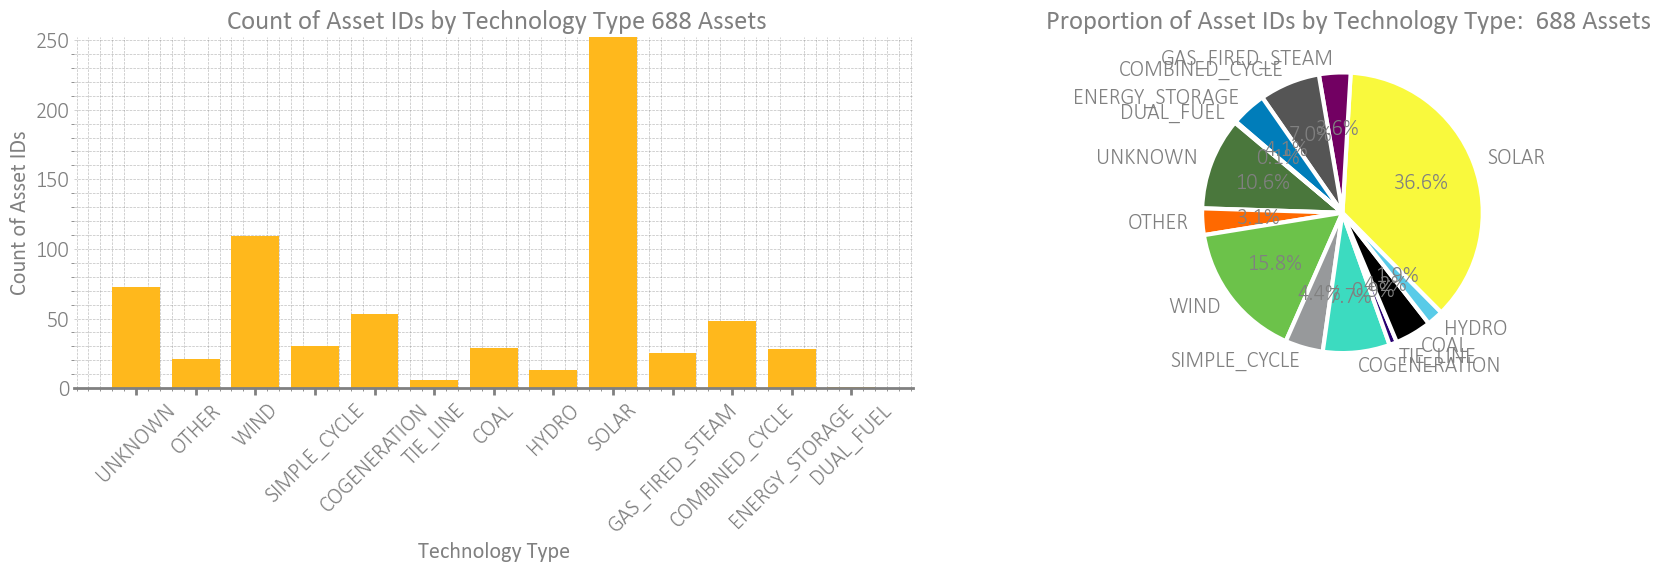

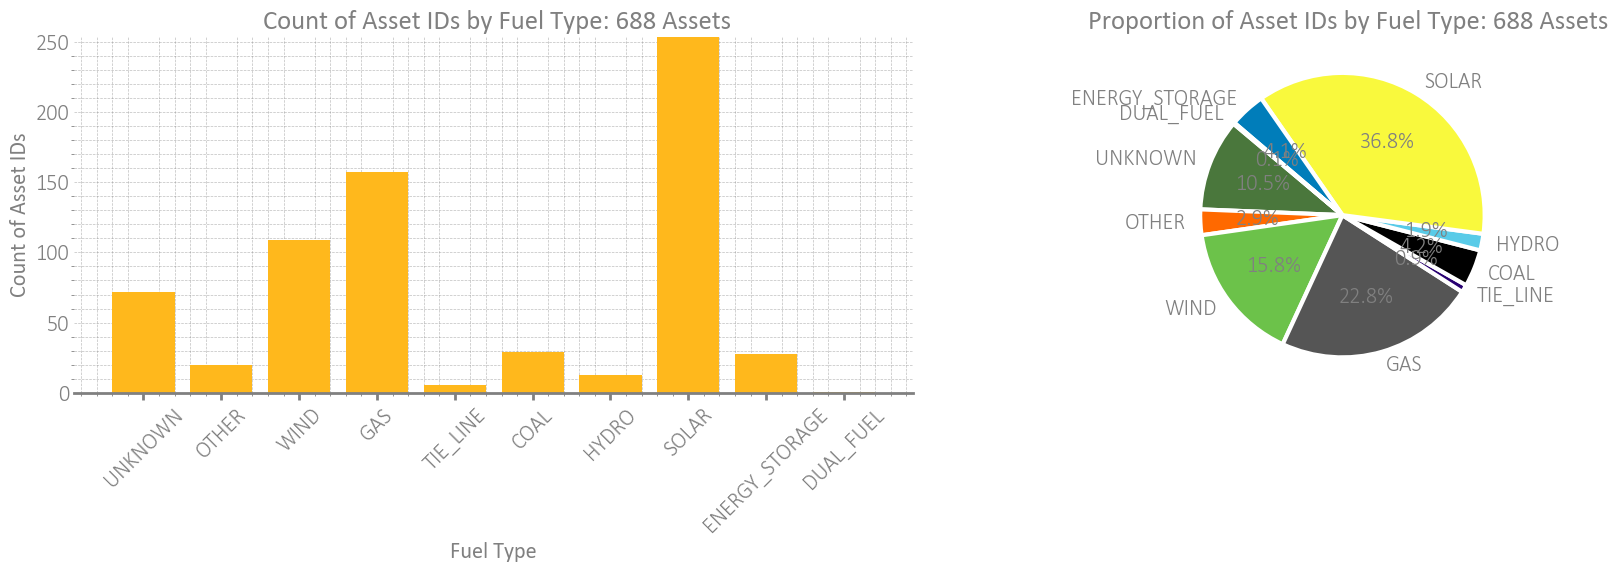

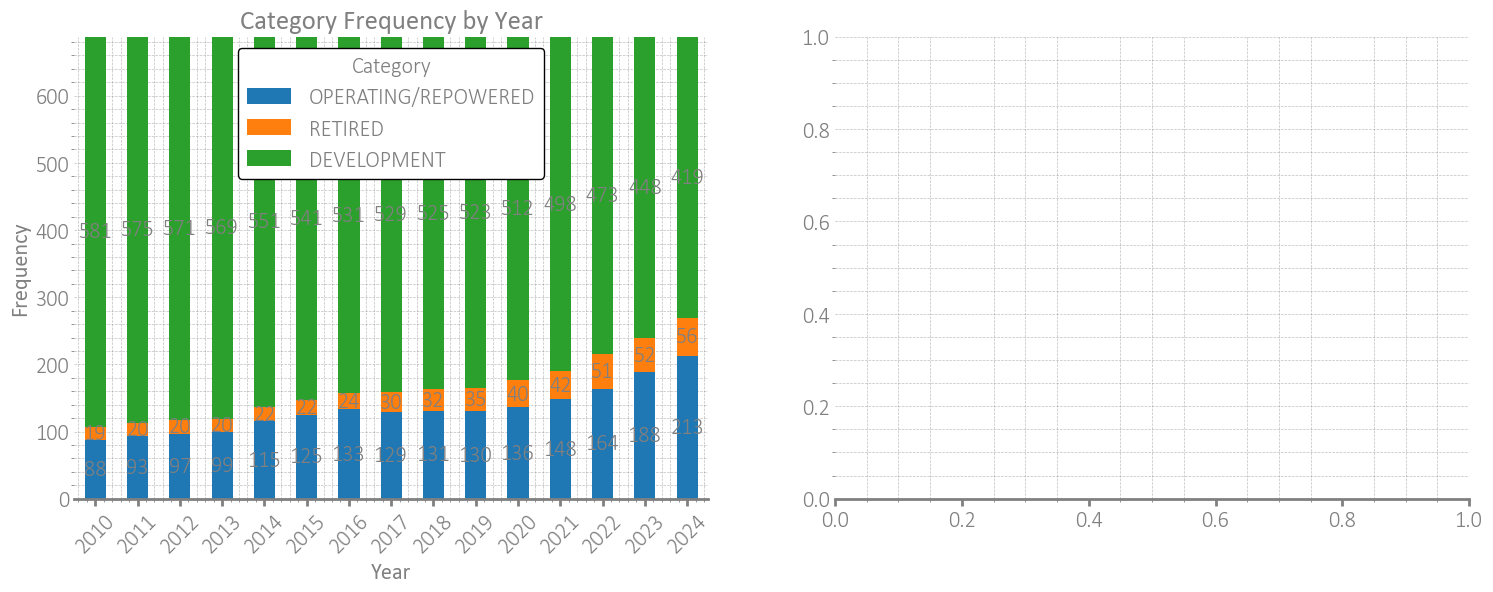

<module> Completed
******************************************************************************************


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import math

code_begin()
##############################################
# print(metadata['TECH_TYPE'].unique)
# print(metadata['ASSET_ID'].unique)
###################################################################  
# # Create a mapping of ASSET_ID to TECH_TYPE
###################################################################  
asset_to_tech_type = dict(zip(metadata['ASSET_ID'].copy(), metadata['TECH_TYPE'].copy()))

for asset_id, tech_type in asset_to_tech_type.items():
    if isinstance(tech_type, float) and math.isnan(tech_type):
        #print(f"Asset ID with NaN TECH_TYPE: {asset_id}")
        break

# Assuming 'metadata' is your DataFrame
nan_rows = metadata[metadata['ASSET_ID'].isna() & metadata['TECH_TYPE'].isna()]

#print(f" nan_rows: {nan_rows}")        
asset_counts = len(metadata['ASSET_ID'])
#print(f"Total Number of ASSET_IDs: {asset_counts}")
###################################################################        
# # Create a mapping of ASSET_ID to FUEL_TYPE
###################################################################  
asset_to_fuel_type = dict(zip(metadata['ASSET_ID'], metadata['FUEL_TYPE']))

for fuel_id, fuel_type in asset_to_fuel_type.items():
    if isinstance(fuel_type, float) and math.isnan(tech_type):
        #print(f"Asset ID with NaN Fuel_TYPE: {asset_id}")
        break

tech_type_colors = original_color_map
fuel_type_colors = original_fuel_type_color_map

tech_counts = []
fuel_counts  = []

asset_counts = len(metadata['ASSET_ID'])
#print(f"Total Number of ASSET_IDs: {asset_counts}")
###################################################################  
# # Create a mapping of ASSET_ID to STATUS
###################################################################  
asset_to_status_type = dict(zip(metadata['ASSET_ID'], metadata['STATUS']))

for asset_id, status_type in asset_to_status_type.items():
    if isinstance(status_type, float) and math.isnan(status_type):
        #print(f"Asset ID with NaN Fuel_TYPE: {asset_id}")
        break

tech_type_colors = original_color_map
fuel_type_colors = original_fuel_type_color_map

tech_counts = []
fuel_counts  = []

asset_counts = len(metadata['ASSET_ID'])
#print(f"Total Number of ASSET_IDs: {asset_counts}")


tech_types, tech_type_counts, fuel_types, fuel_type_counts, status_types, status_counts =  tech_type_and_fuel_type_lists(asset_to_tech_type,asset_to_fuel_type, asset_to_status_type)

# print(f" tech_types: {tech_types}")
# print(f" fuel_type_counts: {tech_type_counts}")
# print(f" fuel_types: {fuel_types}")
# print(f" fuel_type_counts: {fuel_type_counts}")

tech_counts = [tech_type_counts[tech] for tech in tech_types]
fuel_counts = [fuel_type_counts[fuel] for fuel in fuel_types]

#############################################
#Special Note on color mapping
#############################################
# In other chart types, like bar charts or line plots, when you use a syntax like colors=tech_type_colors[tech], 
# it typically implies that tech is a single key from the tech_type_colors dictionary, and you're accessing the 
# corresponding color value for that specific key. This works well for chart types where you're plotting data related 
# to a single category at a time. However, in the case of pie charts, the situation is different. A pie chart usually 
# displays multiple categories (or slices) at once, and each slice can have a different color. Therefore, you need to 
# provide a list of colors that correspond to each category (or slice) in the pie chart. The colors parameter in 
# plt.pie() expects an iterable (like a list) where each element of this list is a color corresponding to each slice of 
# the pie chart.  For instance, if your tech_types list is ['COAL', 'SOLAR', 'WIND'], then tech_type_colors_mapped should 
# be ['black', 'blue', 'brown']. This mapping ensures that the color 'black' is used for the 'COAL' slice, 'blue' for the 
# 'SOLAR' slice, and 'brown' for the 'WIND' slice in the pie chart.  Therefore, when you use a pie chart, you need to 
# create a list of colors (tech_type_colors_mapped) where each color corresponds to the categories in the same order as 
# they appear in the pie chart (as given by tech_types or fuel_types). The mapping process with a list comprehension 
# or a similar approach ensures that the colors align correctly with their respective slices.


##############################################    
# Create a figure and a set of subplots for TECH_TYPE
############################################## 
# Map colors to the order of tech_types
#tech_type_colors_mapped = [tech_type_colors[tech] for tech in tech_types if tech in tech_type_colors]

plt.figure(figsize=(18, 6))

# Create the bar graph in the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(tech_types, tech_counts, color='#FFB81C')
plt.xlabel('Technology Type')
plt.ylabel('Count of Asset IDs')
plt.title(f' Count of Asset IDs by Technology Type {asset_counts} Assets')
plt.xticks(rotation=45)

# Create the pie chart in the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(tech_counts, labels=tech_types, autopct='%1.1f%%', startangle=140, colors=[tech_type_colors[tech] for tech in tech_types],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
chart_title = f' Proportion of Asset IDs by Technology Type:  {asset_counts} Assets'
plt.title(f" {chart_title}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# Show the plot
plt.show()
##############################################    
# Create a figure and a set of subplots for FUEL_TYPE
############################################## 
# Map colors to the order of fuel_types
#fuel_type_colors_mapped = [fuel_type_colors[fuel] for fuel in fuel_types if fuel in fuel_type_colors]

plt.figure(figsize=(18, 6))

# Create the bar graph in the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(fuel_types, fuel_counts, color='#FFB81C')
plt.xlabel('Fuel Type')
plt.ylabel('Count of Asset IDs')
plt.title(f' Count of Asset IDs by Fuel Type: {asset_counts} Assets')
plt.xticks(rotation=45)

# Create the pie chart in the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(fuel_counts, labels=fuel_types, autopct='%1.1f%%', startangle=140, colors=[fuel_type_colors[fuel] for fuel in fuel_types],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
chart_title = f' Proportion of Asset IDs by Fuel Type: {asset_counts} Assets'
plt.title(f" {chart_title}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# Show the plot
plt.show()

##############################################    
# Create a figure and a set of subplots for STATUS
############################################## 
#print(f" status_df: {status_df}")

# Melt the DataFrame
melted_df = status_df.melt(id_vars=['ASSET_ID'], var_name='Year', value_name='Category')
#print(f" melted_df: {melted_df}")

# Group by Year and Category and count
grouped_df = melted_df.groupby(['Year', 'Category']).size().reset_index(name='Count')

# Pivot the table for plotting
plot_df = grouped_df.pivot(index='Year', columns='Category', values='Count').fillna(0)
#print(f" plot_df:{plot_df}")

# Reorder the columns
columns_order = ["OPERATING/REPOWERED", "RETIRED", "DEVELOPMENT"]
plot_df = plot_df[columns_order]


# Creating a subplot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # Adjust figsize as needed

# Plotting on the first subplot
plot_df.plot(kind='bar', stacked=True, ax=ax[0])

# Setting titles and labels for the first subplot
ax[0].set_title('Category Frequency by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for better readability

# Adding value labels to the first subplot
for bar in ax[0].patches:
    # The bar is a rectangle with its bottom left at (x, y), its width w, and its height h
    x = bar.get_x()
    y = bar.get_y()
    w = bar.get_width()
    h = bar.get_height()

    # Adding the text inside the bar if height is non-zero
    if h > 0:
        ax[0].text(x + w/2, y + h/2, int(h), ha='center', va='center')

# You can use ax[1] to plot something else on the second subplot

plt.show()
##################################################################

code_end()

In [ ]:
#code_begin()
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime

# plt.rcdefaults()

# data = metadata.copy()
# print(f" metadata.shape: {metadata.shape}")

# # Convert the START_DATE and RETIREMENT_DATE from string to datetime objects
# data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d-%b-%y')
# data['RETIREMENT_DATE'] = pd.to_datetime(data['RETIREMENT_DATE'], format='%d-%b-%y')

# # Adjusting the function to use the new dataset and ensure each asset is represented with a y-axis label
# def create_barbell_graph_from_new_data(df, graph_start_year, filter_start_year, filter_end_year):
#     # Convert dates to datetime, assuming the date columns are 'START_DATE' and 'RETIREMENT_DATE'
#     df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', format='%d-%b-%y')
#     df['RETIREMENT_DATE'] = pd.to_datetime(df['RETIREMENT_DATE'], errors='coerce', format='%d-%b-%y')
#     df = df[df['START_DATE'].notna() & df['RETIREMENT_DATE'].notna()]

#     # Filter the DataFrame for the given range of years
#     mask = (df['START_YEAR'] >= filter_start_year) & (df['RETIREMENT_YEAR'] <= filter_end_year)
#     filtered_df = df[mask]

#     # Sort the DataFrame based on START_YEAR
#     filtered_df = filtered_df.sort_values('START_YEAR')

#     # Adjust figure size based on the number of assets
#     fig_height = max(6, len(filtered_df) * 0.25)  # At least 6 inches tall or 0.25 inch per asset
#     fig, ax = plt.subplots(figsize=(15, fig_height))

#     # Set a custom graph start year and the right limit for the x-axis
#     graph_start_date = datetime(graph_start_year, 1, 1)
#     graph_end_date = datetime(filter_end_year, 12, 31)

#     # Add lines for each asset, correcting the y-axis label alignment
#     y_labels = []
#     for idx, row in filtered_df.iterrows():
#         # If the start date is earlier than the graph start year, set it to the graph start date
#         start_date = max(row['START_DATE'], graph_start_date)
#         # Plot the line for the asset
#         line, = ax.plot([start_date, row['RETIREMENT_DATE']], [idx, idx], color='skyblue', marker='o')
#         y_labels.append(row['ASSET_NAME'])

#     # Formatting the plot
#     ax.set_yticks(range(len(filtered_df)))
#     ax.set_yticklabels(y_labels, fontsize=8)  # Set the y-axis labels correctly
#     ax.set_xlabel('Year')
#     ax.set_title('Operating Life of Assets')
#     ax.set_xlim(graph_start_date, graph_end_date)
#     ax.xaxis.set_major_locator(mdates.YearLocator())
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)  # Rotate x-axis labels
#     ax.grid(True, which='both', linestyle='--', linewidth=0.5)
#     ax.margins(y=0.01)  # Minimize the margins to fit the y-axis labels
#     plt.tight_layout()
    
#     # Show plot
#     plt.show()

# # Call the function with the corrected code
# create_barbell_graph_from_new_data(data, 1970, 1920, 2050)
#code_end()

# **Demand and Load Data**

In [ ]:
#Load demand data and filter for heat map creation
# print(f" processed_demand_data.head(): {processed_demand_data.head()}")
# print(f" processed_demand_data.columns: {processed_demand_data.columns}")
# print(f" processed_demand_data.index: {processed_demand_data.index}")

code_begin()

#processed_demand_data_copy = processed_demand_data[['Date_Begin_Local','ACTUAL_AIL']].copy()
processed_demand_data_copy = processed_demand_data.copy()
print(f" processed_demand_data_copy.head(): {processed_demand_data_copy.head()}")
print(f" processed_demand_data_copy.index.dtype: {processed_demand_data_copy.index.dtype}")

#processed_demand_data_copy.rename(columns={'Date_Begin_Local': 'DateTime'}, inplace=True)
#processed_demand_data_copy.set_index('DateTime', inplace=True)
# print(f" Before function call: {processed_demand_data_copy.head()}")
# print(f" Before function call: {processed_demand_data_copy.index.dtype}")

# Apply the Time-of-Use function to the dataset to create on/off peak columns
#date_time_header = 'DateTime'
processed_demand_data_copy = label_on_off_peak_hours(processed_demand_data_copy)
print(f" After function call: {processed_demand_data_copy.head()}")
print(f" After index res: {processed_demand_data_copy.tail()}")

#Filter and Average data to put in table and then create heat maps
#print(demand_df.index)

if isinstance(processed_demand_data_copy.index, pd.DatetimeIndex):
    #demand_df.set_index('Date_Begin_Local', inplace=True)
    pass
else:
    # Convert the "Date_Begin_Local" column to datetime if it's not already
    #demand_df['Date_Begin_Local'] = pd.to_datetime(demand_df['Date_Begin_Local'])
    processed_demand_data_copy.loc[:, 'Date_Begin_Local'] = pd.to_datetime(processed_demand_data_copy['Date_Begin_Local'])
    # Set "Date_Begin_Local" as the index
    processed_demand_data_copy.set_index('Date_Begin_Local', inplace=True)
#print(processed_demand_data_copy)
#print("*" *90)

###############################
#Year and Month Sum
###############################

# Extract the year and month from the index and create new DataFrame with these columns
demand_df_with_year_month_sum = processed_demand_data_copy.loc[:, ['ACTUAL_AIL']].copy()
print(f" demand_df_with_year_month_sum: {demand_df_with_year_month_sum}")
demand_df_with_year_month_sum['Year'] = processed_demand_data_copy.index.year
demand_df_with_year_month_sum['Month'] = processed_demand_data_copy.index.month

# Create a pivot table to summarize data by year and month
year_month_sum_pivot_table = demand_df_with_year_month_sum.pivot_table(index='Year', columns='Month', values='ACTUAL_AIL', aggfunc='sum')
print(f"year_month_sum_pivot_table: {year_month_sum_pivot_table}")

# Select only the desired rows and columns (e.g., 2010 to 2023 and months 1 to 12)
print(f"first_year_data: {first_year_data}")
print(f"last_year_data: {last_year_data}")
year_month_sum_result_table = year_month_sum_pivot_table.loc[list(range(first_year_data, last_year_data)), list(range(1, 13))]
year_month_sum_result_table = year_month_sum_result_table.divide(1000)

#Filter by year and by month
# Extract the year and month from the index
#The generateds a warning cakked SettingWithCopyWarning, occurs because you are adding new columns 'Year' and 'Month' to demand_df after 
###############################
#Year and Month
###############################
#Alternative Approach Using Assign()
# Extract the year and month from the index and create new DataFrame with these columns
demand_df_with_year_month = processed_demand_data_copy.loc[:, ['ACTUAL_AIL']].copy()
demand_df_with_year_month['Year'] = processed_demand_data_copy.index.year
demand_df_with_year_month['Month'] = processed_demand_data_copy.index.month
# Create a pivot table to summarize data by year and month
year_month_pivot_table = demand_df_with_year_month.pivot_table(index='Year', columns='Month', values='ACTUAL_AIL', aggfunc='mean')
# Select only the desired rows and columns (e.g., 2010 to 2023 and months 1 to 12)
year_month_result_table = year_month_pivot_table.loc[list(range(2010, 2023)), list(range(1, 13))]

#Export CSV
# filename_csv = 'year_month_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# year_month_result_table.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, year_month_result_table,'year_month_result_table.csv')

###############################
#Week and Week Day
###############################
#Note this will not work for week and day.  here is no direct .week attribute for a datetime index in pandas. If you try to access .week, you'll likely encounter 
#an AttributeError. Instead, you need to use the .weekofyear attribute to extract the week number and the .dayofweek attribute to extract the day of the week. 
#demand_df_with_week_day = demand_df.assign(Week=demand_df.index.week, Day=demand_df.index.day)
demand_df_with_week_day = processed_demand_data_copy.loc[:, ['ACTUAL_AIL']].copy()
demand_df_with_week_day['Week'] = processed_demand_data_copy.index.isocalendar().week
demand_df_with_week_day['Day'] = processed_demand_data_copy.index.dayofweek
# Create a pivot table to summarize data by week and day of the week
week_day_pivot_table = demand_df_with_week_day.pivot_table(index='Week', columns='Day', values='ACTUAL_AIL', aggfunc='mean')
# Reset the index and drop the extra index column
week_day_result_table = week_day_pivot_table.reset_index(drop=True)
# Select only the desired rows (e.g., weeks 1 to 52) and columns (e.g., days of the week)
week_day_result_table = week_day_pivot_table.iloc[list(range(0, 52)), list(range(0, 7))]  # 0-51 for weeks, 0-6 for days

#Export CSV
# filename_csv = 'week_day_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# week_day_result_table.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, week_day_result_table,'week_day_result_table.csv')

###############################
#Hour and Week Day
###############################

# #demand_df_with_week_day = demand_df.assign(Week=demand_df.index.week, Day=demand_df.index.day)
# demand_df_with_week_day = processed_demand_data_copy.loc[:, ['ACTUAL_AIL']].copy()
# demand_df_with_week_day['Hour'] = processed_demand_data_copy.index.isocalendar().hours
# demand_df_with_week_day['Day'] = processed_demand_data_copy.index.dayofweek
# # Create a pivot table to summarize data by week and day of the week
# Avg_24_hour_week_day_pivot_table = demand_df_with_week_day.pivot_table(index='Week', columns='Day', values='ACTUAL_AIL', aggfunc='mean')
# # Reset the index and drop the extra index column
# Avg_24_hour_hour_week_day_result_table = Avg_24_hour_week_day_pivot_table.reset_index(drop=True)
# # Select only the desired rows (e.g., weeks 1 to 52) and columns (e.g., days of the week)
# Avg_24_hour_hour_week_day_result_table = Avg_24_hour_week_day_pivot_table.iloc[list(range(0, 24)), list(range(0, 7))]  # 0-51 for weeks, 0-6 for days
demand_df_with_hour_day = processed_demand_data_copy.loc[:, ['ACTUAL_AIL']].copy() 
demand_df_with_hour_day['Hour'] = processed_demand_data_copy.index.hour 
demand_df_with_hour_day['Day'] = processed_demand_data_copy.index.dayofweek
#Create a pivot table to summarize data by hour and day of the week
Avg_24_hour_week_day_pivot_table = demand_df_with_hour_day.pivot_table(index='Hour', columns='Day', values='ACTUAL_AIL', aggfunc='mean')
#Reset the index and drop the extra index column
Avg_24_hour_week_day_result_table = Avg_24_hour_week_day_pivot_table.reset_index(drop=True)
#Select only the desired rows (e.g., hours in a day) and columns (e.g., days of the week)
Avg_24_hour_week_day_result_table = Avg_24_hour_week_day_pivot_table.iloc[range(0, 24), range(0, 7)] # 0-23 for hours, 0-6 for days


#Export CSV
# filename_csv = 'week_day_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# week_day_result_table.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, week_day_result_table,'week_day_result_table.csv')

###############################
#Year and Day
###############################
demand_df_with_year_and_week_day = processed_demand_data_copy.loc[:, ['ACTUAL_AIL']].copy()
demand_df_with_year_and_week_day['Year'] = processed_demand_data_copy.index.year
demand_df_with_year_and_week_day['Day'] = processed_demand_data_copy.index.dayofweek
# Create a pivot table to summarize data by week and day of the week
year_and_week_day_pivot_table = demand_df_with_year_and_week_day.pivot_table(index='Year', columns='Day', values='ACTUAL_AIL', aggfunc='mean')
# Reset the index and drop the extra index column
year_and_week_day_result_table = year_and_week_day_pivot_table.reset_index(drop=True)
# Select only the desired rows (e.g., weeks 1 to 52) and columns (e.g., days of the week)
year_and_week_day_result_table = year_and_week_day_pivot_table.loc[list(range(2010, 2023)), list(range(0, 7))]



#Export CSV
# filename_csv = 'processed_demand_data_copy.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# processed_demand_data_copy.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, processed_demand_data_copy,'processed_demand_data_copy.csv')

#Export CSV
# filename_csv = 'year_and_week_day_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# year_and_week_day_result_table.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, year_and_week_day_result_table,'year_and_week_day_result_table.csv')

############################

# filename_csv = 'year_month_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# year_month_result_table.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, year_month_result_table,'year_month_result_table.csv')


#print(year_month_result_table)
#print("*" *90)
#print(week_day_result_table)
#print("*" *90)
#print(year_and_week_day_result_table)

code_end()

<module> Started
 processed_demand_data_copy.head():                      Date_Begin_GMT  ACTUAL_AIL  EXPORT_BC  EXPORT_MT  \
DateTime                                                                
2010-01-01 00:00:00   1/1/2010 7:00        8307      125.0        0.0   
2010-01-01 01:00:00   1/1/2010 8:00        8186      125.0        0.0   
2010-01-01 02:00:00   1/1/2010 9:00        8075      150.0        0.0   
2010-01-01 03:00:00  1/1/2010 10:00        8013      150.0        0.0   
2010-01-01 04:00:00  1/1/2010 11:00        7982      100.0        0.0   

                     EXPORT_SK  IMPORT_BC  IMPORT_MT  IMPORT_SK  Net_Export  
DateTime                                                                     
2010-01-01 00:00:00        0.0       50.0        0.0       44.0       -31.0  
2010-01-01 01:00:00        0.0        0.0        0.0       45.0       -80.0  
2010-01-01 02:00:00        0.0       50.0        0.0       45.0       -55.0  
2010-01-01 03:00:00        0.0       50.0    

KeyError: '[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022] not in index'

# **Average Daily AIL Load by Quarter for Specfic Year**

In [ ]:
# import matplotlib.pyplot as plt

# code_begin()

# tech_type_colors = original_color_map 

# #MW Data
# Selected_Year = 2018

# print(f" processed_demand_data: {processed_demand_data}")
# print(f" processed_demand_data: {processed_demand_data.index.dtype}")

# # Filter data for a specific year, e.g., 2023
# processed_demand_data_copy_filtered = processed_demand_data[processed_demand_data.index.year == Selected_Year].copy()
# processed_demand_data_copy_filtered.drop('Date_Begin_GMT', axis=1, inplace=True)

# #Check for missing vales
# print(f" Missing Values: {processed_demand_data_copy_filtered.isnull().sum()}")

# # Check for NaN values in the dataframe
# print(f" Number of Nan values: {processed_demand_data_copy_filtered.isna().sum()}")

# # Check for duplicate values in the index
# print(f" Number of duplicate values: {processed_demand_data_copy_filtered.index.duplicated().sum()}")

# # Check the sort order of the index
# print(f" monotnic insreasing: {processed_demand_data_copy_filtered.index.is_monotonic_increasing}")

# # Reset the index to convert the DatetimeIndex to a regular column
# processed_demand_data_copy_filtered.reset_index(inplace=True)

# # Convert the 'DateTime' column to a DatetimeIndex
# processed_demand_data_copy_filtered.set_index('DateTime', inplace=True)

# print(f" processed_demand_data_copy_filtered: {processed_demand_data_copy_filtered}")
# print(f" processed_demand_data_copy_filtered: {processed_demand_data_copy_filtered.columns}")
# print(f" processed_demand_data_copy_filtered: {processed_demand_data_copy_filtered.index.dtype}")

# # Group the data by quarter and hour, then calculate the mean
# average_quarterly_processed_demand_data_copy_filtered_by_select_year = processed_demand_data_copy_filtered.groupby([processed_demand_data_copy_filtered.index.quarter, processed_demand_data_copy_filtered.index.hour]).mean()

# # Fill in NaN values with 0
# average_quarterly_processed_demand_data_copy_filtered_by_select_year.fillna(0, inplace=True)

# # Set the x-axis as the hours (0 to 23)
# hours = range(24)

# # Plotting
# plt.figure(figsize=(10, 6))

# # Plot each quarter for Demand
# for quarter in average_quarterly_processed_demand_data_copy_filtered_by_select_year.index:
#     plt.plot(hours, average_quarterly_processed_demand_data_copy_filtered_by_select_year.loc[quarter], label=f'{var1} Q{quarter}')


# plt.xlabel('Hour of the Day')
# plt.ylabel('Average Demand (MW)')
# plt.title(f'Average Hourly Demand by Quarter in {Selected_Year}')
# plt.legend()
# plt.grid(True)
# plt.show()

# code_end()

# **Create Demand Heat Maps**

In [ ]:
# Divide the values by 1000 to represent them in GWh
# year_month_result_table_in_gwh = year_month_result_table
# week_day_result_table_gwh = week_day_result_table
# year_month_result_table_in_gwh

code_begin()

create_demand_heatmap(year_month_sum_result_table, 'Monthly Consumption Heatmap (GWh)', "Year", "Month", total = True)
create_demand_heatmap(week_day_result_table, 'Avg Weekly Week Day Demand Heatmap (GWh)', "Week", "Weekday")
create_demand_heatmap(Avg_24_hour_week_day_result_table, 'Avg Hourly Weedkday Demand Heatmap (GWh)', "Hour", "Weekday")
create_demand_heatmap(year_and_week_day_result_table, 'Avg Annual Weedkday Demand Heatmap (GWh)', "Year", "Weekday")


# # Export Image
# filename_img = 'year_month_result_table.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# # Export Image
# filename_img = 'week_day_result_table.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# # Export Image
# filename_img = 'Avg_24_hour_week_day_result_table.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# # Export Image
# filename_img = 'year_and_week_day_result_table.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

#Export CSV
# filename_csv = 'year_month_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# year_month_result_table.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, year_month_result_table,'year_month_result_table.csv')
print(f" year_month_result_table: {year_month_result_table}")

#Export CSV
# filename_csv = 'week_day_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# week_day_result_table.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, week_day_result_table,'week_day_result_table.csv')
print(f" week_day_result_table: {week_day_result_table}")

#Export CSV
# filename_csv = 'Avg_24_hour_week_day_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# Avg_24_hour_week_day_result_table.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, Avg_24_hour_week_day_result_table,'Avg_24_hour_week_day_result_table.csv')
print(f" Avg_24_hour_week_day_result_table: {Avg_24_hour_week_day_result_table}")

#Export CSV
# filename_csv = 'year_and_week_day_result_table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# year_and_week_day_result_table.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, year_and_week_day_result_table,'year_and_week_day_result_table.csv')
print(f" year_and_week_day_result_table: {year_and_week_day_result_table}")

code_end()

# **Interactive Hourly Demand Graph**

In [ ]:
import plotly.express as px
import pandas as pd

code_begin()

# Reload the dataset
# consolidated_file_path = '/kaggle/input/alberta-electricity-demand/Market_Data 2010 to 2023 Sept 8.csv'
# market_df = pd.read_csv(consolidated_file_path)

#processed_demand_data_copy = processed_demand_data[['Date_Begin_Local','ACTUAL_AIL']].copy()

print(processed_demand_data_copy.head())

# Convert the 'begin_datetime_mpt' column to datetime and pool_price to numeric
#processed_demand_data_copy['Date_Begin_Local'] = pd.to_datetime(processed_demand_data_copy['Date_Begin_Local'], errors='coerce')

processed_demand_data_copy['ACTUAL_AIL'] = pd.to_numeric(processed_demand_data_copy['ACTUAL_AIL'], errors='coerce')


# Calculate the rolling standard deviation of pool prices
# consolidated_data['rolling_std_30d'] = consolidated_data['pool_price'].rolling(window=30).std()

# Create an interactive plot with a dark theme
fig = px.line(processed_demand_data_copy, x=processed_demand_data_copy.index, y='ACTUAL_AIL', title='Hourly AIL Demand')
fig.update_layout({
    'plot_bgcolor': 'rgb(10, 10, 10)',
    'paper_bgcolor': 'rgb(10, 10, 10)',
    'font_color': 'white'
})

# Change line color to gold
fig.update_traces(line=dict(color='gold'))

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='grey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='grey')
fig.update_xaxes(rangeslider_visible=True)

# Export Image
# filename_img = 'Hourly AIL Demand.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure
# #save_plotly_figure(fig, filename_img, width=1200, height=800, scale=3)

fig.show()



code_end()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
code_begin()
set_custom_rcparams()


daily_data = processed_demand_data_copy.resample(rule='D').sum()

# Set frequency explicitly to D
daily_data = daily_data.asfreq('D')

daily_data.head(10)

daily_data.index

decomposition = seasonal_decompose(daily_data['ACTUAL_AIL'], model='additive')

# Combine the components into a DataFrame
decomposition_df = pd.DataFrame({
    'Trend': decomposition.trend,
    'Seasonal': decomposition.seasonal,
    'Residual': decomposition.resid,
    'Observed': decomposition.observed
})


# Plot and Export the Decomposition Plot
fig = decomposition.plot()

# Special Note
# The seasonal_decompose() function from the statsmodels library does not directly allow you to 
# set the figure size within the function itself. However, you can adjust the figure size after 
# the decomposition but before plotting.To adjust the figure size, you'll first need to capture 
# the matplotlib.figure.Figure object returned by the plot() method of the decomposition result, and then modify its size
# Adjust the figure size
fig.set_size_inches(15, 8)

# Export Image
# filename_img = 'Decompose Hourly AIL Demand.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# Export Image
# filename_img = 'Decompose Hourly AIL Demand.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

# Export the decomposition DataFrame to CSV
# filename_csv = 'Decompose_Hourly_AIL_Demand.csv'
# full_file_path_csv = create_file_path(base_output_directory_global _global , filename_csv)
# decomposition_df.to_csv(full_file_path_csv, index=True)
#save_dataframe_to_csv(ide_option, decomposition_df,'Decompose_Hourly_AIL_Demand.csv')

print("*" *90)
###################################################
from statsmodels.tsa.seasonal import seasonal_decompose
weekly_data = processed_demand_data_copy.resample(rule='W').sum()
decomposition = seasonal_decompose(weekly_data['ACTUAL_AIL'], model='additive') # Aggregate to weekly level

# Combine the components into a DataFrame
decomposition_df = pd.DataFrame({
    'Trend': decomposition.trend,
    'Seasonal': decomposition.seasonal,
    'Residual': decomposition.resid,
    'Observed': decomposition.observed
})



# Plot and Export the Decomposition Plot
fig = decomposition.plot()

fig.set_size_inches(15, 8)

# Export Image
# filename_img = 'Decompose Hourly AIL Demand.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

# Export the decomposition DataFrame to CSV
# filename_csv = 'Decompose Hourly AIL Demand.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# decomposition_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, decomposition_df,'Decompose Hourly AIL Demand.csv')

code_end()

# **Load Factor and Demand Duration Analysis**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d

code_begin()

set_custom_rcparams()


alberta_color = '#C8102E'#Cherry
ercot_color = '#280071' #Dusk

#STEP 1: Plot Alberta Load Duration Curve
print("Step 1 Started")
#print(f" processed_demand_data: {processed_demand_data}")

# Define colors for each year's duration curve and load factor
year_colors = {
    2010:'#ff9896', #Soft salmon
    2011:'#98df8a', #Pale green'
    2012: '#c5b0d5', #Lavender'
    2013:'#c49c94', #Pale copper
    2014:'#1f77b4',  # Example color
    2015:'#1f77b4', #Muted blue
    2016:'#ff7f0e', #Safety orange
    2017:'#2ca02c', #Cooked asparagus green
    2018:'#d62728', #Brick red
    2019:'#9467bd', #Muted purple
    2020:'#8c564b', #Chestnut brown
    2021:'#e377c2', #Raspberry yogurt pink
    2022:'#7f7f7f', #Middle gray
    2023:'#bcbd22', #Curry yellow-green
    2024:'#17becf' #Blue-teal

}

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Plot duration curves and load factor lines for each year
for year, group in processed_demand_data_copy.groupby(processed_demand_data_copy.index.year):
    sorted_demand = group['ACTUAL_AIL'].sort_values(ascending=False).reset_index(drop=True)
    avg_hourly_demand = group['ACTUAL_AIL'].mean()
    max_hourly_demand = group['ACTUAL_AIL'].max()
    load_factor = avg_hourly_demand / max_hourly_demand

    # Use different colors for each year's duration curve
    year_color = year_colors.get(year, '#000000')  # Default to black if year not found in dictionary

    # Plot duration curve
    ax1.plot(sorted_demand, label=str(year), color=year_color)

    # Plot load factor line
    ax2.hlines(y=load_factor * 100, xmin=-10, xmax=len(sorted_demand)-1+10, linestyle='--', color=year_color, alpha=.9)

# Set labels and ticks for the primary y-axis (demand)
ax1.set_title('Alberta Load Duration and Load Factor 2010-2024')
             
             
ax1.set_xlabel('Hours')
ax1.set_ylabel('Demand (MW)')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Set labels and ticks for the secondary y-axis (load factor)
ax2.set_ylabel('Load Factor (%)')
ax2.set_ylim(0, 100)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Create legend only for the duration curves
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper right')
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper left')

plt.show()

print("Step 1 Completed ")
###########################################################
#STEP 2: Plot Alberta Load Duration Curve Relative to Other Jurisdiction
print("Step 2 Started")
#Compare Alberta to ERCOT
# Filter the DataFrame for 2023
df_2023_AB = processed_demand_data_copy[processed_demand_data_copy.index.year == 2023]

file = ercot_demand_data_2023

df_2023_ERCOT = pd.read_excel(file, 
                        sheet_name = 0, 
                        index_col = 0)
#Create Pandas Series
series_2023_ERCOT = df_2023_ERCOT['ERCOT']
#Conver Panda Series to Dataframe
df_2023_ERCOT = pd.DataFrame(series_2023_ERCOT, columns=['ERCOT'])
#Check to see if it has columns:
# print(df_2023_ERCOT.columns)

# print(df_2023_AB.dtypes)
# print(df_2023_ERCOT.dtypes)

# print(df_2023_AB.columns)
# print(df_2023_ERCOT.columns)
#____________________________________________________
#Calculate demand Stats for Alberta
# Calculate the Load Factor for Alberta
avg_hourly_demand = df_2023_AB['ACTUAL_AIL'].mean()
#print("ALBERTA STATS")
#print("Avg Demand")
#print(avg_hourly_demand)
max_hourly_demand = df_2023_AB['ACTUAL_AIL'].max()
#print("Max Demand")
#print(max_hourly_demand)
load_factor = avg_hourly_demand / max_hourly_demand
#print("Load Factor")
#print(load_factor)

# Define Peak Hours - for example, the top 5% of demand
sorted_demands = df_2023_AB['ACTUAL_AIL'].sort_values(ascending=False)
peak_threshold = sorted_demands.quantile(0.95) # 95th percentile for top 5%

# Calculate the standard deviation and mean
std_dev = df_2023_AB['ACTUAL_AIL'].std()
mean_demand = df_2023_AB['ACTUAL_AIL'].mean()

# Define a peak threshold as mean + 2*standard deviation
peak_threshold_std = mean_demand + 2 * std_dev
#____________________________________________________
#Calculate demand Stats for ERCOT
# Calculate the Load Factor for Alberta
avg_hourly_demand2 = df_2023_ERCOT['ERCOT'].mean()
#print("ERCOT STATS")
#print("Avg Demand")
#print(avg_hourly_demand2)
max_hourly_demand2 = df_2023_ERCOT['ERCOT'].max()
#print("Max Demand")
#print(max_hourly_demand2)
load_factor2 = avg_hourly_demand2 / max_hourly_demand2
#print("Load Factor")
#print(load_factor2)

# Define Peak Hours - for example, the top 5% of demand
sorted_demands2 = df_2023_ERCOT['ERCOT'].sort_values(ascending=False)
peak_threshold2 = sorted_demands2.quantile(0.95) # 95th percentile for top 5%

# Calculate the standard deviation and mean
std_dev2 = df_2023_ERCOT['ERCOT'].std()
mean_demand2 = df_2023_ERCOT['ERCOT'].mean()

# Define a peak threshold as mean + 2*standard deviation
peak_threshold_std2 = mean_demand2 + 2 * std_dev2


# Now plot them side by side using subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

# Plotting the normalized demand curve for Alberta
sorted_demands.reset_index(drop=True).plot(ax=axs[0], color = alberta_color, linewidth=4)
axs[0].set_ylim(0, max_hourly_demand * 1.1)  # Set y-axis limits for the first subplot
#axs[0].plot(sorted_demands['ACTUAL_AIL'], label='Alberta')
axs[0].set_title('2023 Load Duration Curve for Alberta')
axs[0].set_xlabel('Hours')
axs[0].set_ylabel('Demand')
# Add horizontal lines for Load Factor and Peak Hours
axs[0].axhline(y=load_factor * max_hourly_demand, linestyle='--', label=f'Load Factor ({load_factor:.2f})',color = alberta_color, alpha = .9)
axs[0].axhline(y=peak_threshold, linestyle=':', label='Peak Hours Threshold (95 Percentile)',color = alberta_color,alpha = .9)
axs[0].axhline(y=peak_threshold_std, linestyle='-.', label='Peak Hours Threshold (2x STD)',color = alberta_color,alpha = .9)
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[0].grid(True, which='major', linestyle='-', linewidth='0.5', color='grey')  # Adjust gridline properties as needed

# Plotting the normalized demand curve for ERCOT
sorted_demands2.reset_index(drop=True).plot(ax=axs[1], color = ercot_color,linewidth=4)
axs[1].set_ylim(0, max_hourly_demand2 * 1.1)  # Set y-axis limits for the second subplot
#axs[1].plot(sorted_demands2['ERCOT'], label='ERCOT')
axs[1].set_title('2023 Load Duration Curve for ERCOT')
axs[1].set_xlabel('Hours')
axs[1].set_ylabel('Demand')
# Add horizontal lines for Load Factor and Peak Hours
axs[1].axhline(y=load_factor2 * max_hourly_demand2, linestyle='--', label=f'Load Factor ({load_factor2:.2f})',color = ercot_color,alpha = .9)
axs[1].axhline(y=peak_threshold2, linestyle=':', label='Peak Hours Threshold (95 Percentile)',color = ercot_color,alpha = .9)
axs[1].axhline(y=peak_threshold_std2, linestyle='-.', label='Peak Hours Threshold (2x STD)',color = ercot_color,alpha = .9)
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[1].grid(True, which='major', linestyle='-', linewidth='0.5', color='grey')  # Adjust gridline properties as needed

# Add legends
axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()
print("Step 2 Completed ")
# #____________________________________________________
#STEP 3: Normalize the raw demand curves for Alberta and ERCOT
print("Step 3 Started")
# print(df_2023_AB.dtypes)
# print(df_2023_ERCOT.dtypes)
#df_2023_ERCOT_df = pd.DataFrame(df_2023_ERCOT, columns=['ERCOT'])
# print(df_2023_AB.columns)
# print(df_2023_ERCOT.columns)

# Filter the Alberta DataFrame for 2023
df_2023_AB = processed_demand_data_copy[processed_demand_data_copy.index.year == 2023]
print(f" df_2023_AB: {df_2023_AB}")

#Pull ERCOT DATA
file = ercot_demand_data_2023
df_2023_ERCOT = pd.read_excel(file, 
                        sheet_name = 0, 
                        index_col = 0)
#Create Pandas Series
series_2023_ERCOT = df_2023_ERCOT['ERCOT']
#Conver Panda Series to Dataframe
df_2023_ERCOT = pd.DataFrame(series_2023_ERCOT, columns=['ERCOT'])
#Check to see if it has columns:
#print(df_2023_ERCOT.columns)

# Normalize the 'ACTUAL_AIL' column in the Alberta DataFrame
# Create a copy of the Alberta DataFrame for normalization
df_2023_AB_normalized = df_2023_AB.copy()
df_2023_AB_normalized['ACTUAL_AIL'] = df_2023_AB_normalized['ACTUAL_AIL'] / df_2023_AB_normalized['ACTUAL_AIL'].max()
print(f" df_2023_AB_normalized: {df_2023_AB_normalized}")
# print(f" df_2023_AB_normalized.shape: {df_2023_AB_normalized.shape}")
# print(f" df_2023_AB_normalized: {df_2023_AB_normalized}")
################################################################################
print("Step 3a Normalize Alberta")

#Compare Alberta and ERCOT Duration Curves on a Normalized Basis
# Create a copy of the Alberta DataFrame for normalization
df_2023_ERCOT_normalized = df_2023_ERCOT.copy()
# Normalize the 'ERCOT' column in the ERCOT DataFrame
df_2023_ERCOT_normalized['ERCOT'] = df_2023_ERCOT_normalized['ERCOT'] / df_2023_ERCOT_normalized['ERCOT'].max()
# print(f" df_2023_ERCOT_normalized.shape: {df_2023_ERCOT_normalized.shape}")
# print(f" df_2023_ERCOT_normalized: {df_2023_ERCOT_normalized}")
print("Step 3b Normalize ERCOT")


# Creating a range for x-axis (hours)
hours = range(1, 8761)  # From 1 to 8760

# Now plot them side by side using subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))


# Plotting the normalized demand curve for Alberta
print("Step 3c Start Plotting Alberta Demand")
axs[0].plot(hours, df_2023_AB_normalized['ACTUAL_AIL'], label='Alberta',  linewidth=.5,color=alberta_color)
print("Step 3d Finishing Plotting Alberta Demand")
# Setting x-axis and y-axis labels
axs[0].set_title('Normalized Load for Alberta')
axs[0].set_xlabel('Hours')
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[0].set_ylabel('Normalized Demand')
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
axs[0].grid(True)

# Plotting the normalized demand curve for ERCOT
print("Step 3e Start Plotting ERCOT Demand")
axs[1].plot(hours, df_2023_ERCOT_normalized['ERCOT'], label='ERCOT',linewidth=.5,color=ercot_color)
print("Step 3f Finish Plotting ERCOT Demand")
# Setting x-axis and y-axis labels
axs[1].set_title('Normalized Load for ERCOT')
axs[1].set_xlabel('Hours')
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
axs[1].set_ylabel('Normalized Demand')
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
axs[1].grid(True)

# Add legends
axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()
print("Step 3 Completed ")

########################################################
#Graph comparative Normalized Duration Curves
print("Step 4 Started")

# Prepare x-values as a percentage of the year
hours_in_year = 8760
percentage_of_year = np.arange(1, 8761) * 100 / hours_in_year

# Now plot the normalized duration curves on the same graph
sorted_df_2023_AB_normalized = df_2023_AB_normalized['ACTUAL_AIL'].sort_values(ascending=False)
#sorted_df_2023_AB_normalized = df_2023_AB_normalized.sort_values(by='ACTUAL_AIL', ascending=False) #keep all columns
#print(f" sorted_df_2023_AB_normalized: {sorted_df_2023_AB_normalized}")


sorted_df_2023_ERCOT_normalized = df_2023_ERCOT_normalized['ERCOT'].sort_values(ascending=False)

# Create a single subplot
fig, ax = plt.subplots(figsize=(18, 10))
#____________________________________________________________________
# Interpolation functions
interp_ab = interp1d(percentage_of_year, sorted_df_2023_AB_normalized, kind='nearest')
interp_ercot = interp1d(percentage_of_year, sorted_df_2023_ERCOT_normalized, kind='nearest')
#____________________________________________________________________
# Manually set vertical lines for Alberta and ERCOT at observed steepest points
alberta_steep_point = 10  
ercot_steep_point = 50  
#____________________________________________________________________
# Find y-values at steep points
y_alberta = interp_ab(alberta_steep_point)
y_ercot = interp_ercot(ercot_steep_point)
#____________________________________________________________________
# Plot curves
ax.plot(percentage_of_year, sorted_df_2023_AB_normalized, label='Alberta', color =alberta_color, linewidth=4)
ax.plot(percentage_of_year, sorted_df_2023_ERCOT_normalized, label='ERCOT', color =ercot_color, linewidth=4)
#____________________________________________________________________
# Plot Vertical lines
ax.axvline(x=alberta_steep_point, color=alberta_color, linestyle='--', alpha=0.7, label='Alberta Steep Point')
ax.axvline(x=ercot_steep_point, color=ercot_color, linestyle='--', alpha=0.7, label='ERCOT Steep Point')
#____________________________________________________________________
# Plot Horizontal lines
ax.hlines(y=y_alberta, xmin=0, xmax=alberta_steep_point, color=alberta_color, linestyle='--', alpha=0.7)
ax.hlines(y=y_ercot, xmin=0, xmax=ercot_steep_point, color=ercot_color, linestyle='--', alpha=0.7)
#____________________________________________________________________
# Fill area under curves for peaking power
ax.fill_between(percentage_of_year, sorted_df_2023_AB_normalized, where=(percentage_of_year <= alberta_steep_point), color=alberta_color, alpha=0.3)
ax.fill_between(percentage_of_year, sorted_df_2023_ERCOT_normalized, where=(percentage_of_year <= ercot_steep_point), color=ercot_color, alpha=0.3)
#____________________________________________________________________
# Annotation for Alberta
y_mid_alberta = y_alberta / 1
alberta_arrow_y = y_mid_alberta - 0.03  # Slightly below the midpoint to avoid overlap
alberta_text_y = alberta_arrow_y - 0.03  # Adjust for text to appear below the arrow

# Draw the arrow for Alberta # Peak Generation
ax.annotate('', xy=(0, alberta_arrow_y), xytext=(alberta_steep_point, 
            alberta_arrow_y), arrowprops=dict(arrowstyle='<->', lw=3,color=alberta_color,alpha=0.7,))
ax.text((alberta_steep_point)/2, alberta_text_y, 'Peak Generation\nRequirements',
        horizontalalignment='center', verticalalignment='center', fontsize=12, color=alberta_color)

# Draw the arrow for Alberta # Base Load Generation
ax.annotate('', xy=(0, alberta_arrow_y-.15), xytext=(100, alberta_arrow_y-.15),
            arrowprops=dict(arrowstyle='<->', lw=3, color=alberta_color,alpha=0.7,))
ax.text((100 - alberta_steep_point)/2, alberta_text_y-.1, 'Base Load Generation Requirements',
        horizontalalignment='center', verticalalignment='center', fontsize=12, color=alberta_color)


# Annotation for ERCOT
y_mid_ercot = y_ercot / 1
ercot_arrow_y = y_mid_ercot - 0.05  # Slightly below the midpoint to avoid overlap
ercot_text_y = ercot_arrow_y - 0.05  # Adjust for text to appear below the arrow

# Draw the arrow for ERCOT # Peak Generation
ax.annotate('', xy=(0, ercot_arrow_y), xytext=(ercot_steep_point, ercot_arrow_y),
            arrowprops=dict(arrowstyle='<->', lw=3, color=ercot_color,alpha=0.7,))
ax.text((ercot_steep_point)/2, ercot_text_y, 'Peak Generation Requirements',
        horizontalalignment='center', verticalalignment='center', fontsize=12, color=ercot_color)

# Draw the arrow for ERCOT # Base Load Generation
ax.annotate('', xy=(0, ercot_arrow_y-.1), xytext=(100, ercot_arrow_y-.1),
            arrowprops=dict(arrowstyle='<->', lw=3, color=ercot_color,alpha=0.7,))
ax.text((100 - (ercot_steep_point/2)), ercot_text_y-.1, 'Base Load Generation Requirements',
        horizontalalignment='center', verticalalignment='center', fontsize=12, color=ercot_color)

#____________________________________________________________________
# Setting axis limits
ax.set_xlim(0, 100)  # Set x-axis to start at 0 and end at 100
ax.set_ylim(0, 1)    # Set y-axis to start at 0 and end at 1

# Setting titles and labels
ax.set_title('Normalized Load Duration Curves for Alberta and ERCOT')
ax.set_xlabel('Hours')
ax.set_ylabel('Normalized Demand')

ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))  # Set ticks from 0 to 1 at intervals of 0.1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}'))  # Format with one decimal place

ax.xaxis.set_ticks(np.arange(0, 101, 10))  # Set x-axis ticks from 0% to 100% at intervals of 10%
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%'))
ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='grey')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()
print("Step 4 Completed")

###################################################################################
#Graph Indivdual Market Load Duration with supply integrals
print("Step 5 Started")

#display(df_2023_AB_normalized)

alberta_color = '#C8102E'#Cherry

# Prepare x-values as a percentage of the year
hours_in_year = 8760
percentage_of_year = np.arange(1, 8761) * 100 / hours_in_year

# Now plot the normalized duration curves on the same graph
#sorted_df_2023_AB_normalized = df_2023_AB_normalized['ACTUAL_AIL'].sort_values(ascending=False)
sorted_df_2023_AB_normalized = df_2023_AB_normalized.sort_values(by='ACTUAL_AIL', ascending=False) #keep all columns
#print(f" sorted_df_2023_AB_normalized: {sorted_df_2023_AB_normalized}")

min_point = sorted_df_2023_AB_normalized['ACTUAL_AIL'].min()
#print(f" min_point{min_point}")

#sorted_df_2023_ERCOT_normalized = df_2023_ERCOT_normalized['ERCOT'].sort_values(ascending=False)
# Create a single subplot
fig, ax = plt.subplots(figsize=(18, 10))
#____________________________________________________________________
# Interpolation functions
#interp_ab = interp1d(percentage_of_year, sorted_df_2023_AB_normalized, kind='nearest')
#interp_ercot = interp1d(percentage_of_year, sorted_df_2023_ERCOT_normalized, kind='nearest')
#____________________________________________________________________
# Manually set vertical lines for Alberta and ERCOT at observed steepest points
alberta_steep_point = 10  

#____________________________________________________________________
# Find y-values at steep points
y_alberta = interp_ab(alberta_steep_point)

# Create boolean arrays for on-peak and off-peak
# is_on_peak = df_2023_AB_normalized['peak_status'].sort_values(ascending=False) == 'On-Peak'
# is_off_peak = df_2023_AB_normalized['peak_status'].sort_values(ascending=False) == 'Off-Peak'

is_on_peak = (df_2023_AB_normalized['peak_status'] == 'On-Peak')
is_off_peak = (df_2023_AB_normalized['peak_status'] == 'Off-Peak')


#____________________________________________________________________
# Plot curves
ax.plot(percentage_of_year, sorted_df_2023_AB_normalized['ACTUAL_AIL'], label='Alberta', color =alberta_color, linewidth=4)

#____________________________________________________________________
# Plot Vertical lines
#ax.axvline(x=alberta_steep_point, color=alberta_color, linestyle='--', alpha=0.7, label='Alberta Steep Point')

#____________________________________________________________________
# Plot Horizontal lines
#ax.hlines(y=y_alberta, xmin=0, xmax=alberta_steep_point, color=alberta_color, linestyle='--', alpha=0.7)

#____________________________________________________________________
# Fill area under curves for peaking power
# Fill area under curves for on-peak and off-peak
ax.fill_between(percentage_of_year, sorted_df_2023_AB_normalized['ACTUAL_AIL'], where=is_on_peak, color='red', alpha=0.3, label='On-Peak Periods')



#____________________________________________________________________
# Annotation for Alberta
# y_mid_alberta = y_alberta / 1
# alberta_arrow_y = y_mid_alberta - 0.03  # Slightly below the midpoint to avoid overlap
# alberta_text_y = alberta_arrow_y - 0.03  # Adjust for text to appear below the arrow

# # Draw the arrow for Alberta # Peak Generation
# ax.annotate('', xy=(0, alberta_arrow_y), xytext=(alberta_steep_point, 
#             alberta_arrow_y), arrowprops=dict(arrowstyle='<->', lw=3,color=alberta_color,alpha=0.7,))
# ax.text((alberta_steep_point)/2, alberta_text_y, 'Peak Generation\nRequirements',
#         horizontalalignment='center', verticalalignment='center', fontsize=12, color=alberta_color)

# # Draw the arrow for Alberta # Base Load Generation
# ax.annotate('', xy=(0, alberta_arrow_y-.15), xytext=(100, alberta_arrow_y-.15),
#             arrowprops=dict(arrowstyle='<->', lw=3, color=alberta_color,alpha=0.7,))
# ax.text((100 - alberta_steep_point)/2, alberta_text_y-.1, 'Base Load Generation Requirements',
#         horizontalalignment='center', verticalalignment='center', fontsize=12, color=alberta_color)


#____________________________________________________________________
# Setting axis limits
ax.set_xlim(0, 100)  # Set x-axis to start at 0 and end at 100
ax.set_ylim(min_point, 1)    # Set y-axis to start at 0 and end at 1

# Setting titles and labels
ax.set_title('Normalized Load Duration Curve for Alberta')
ax.set_xlabel('Hours')
ax.set_ylabel('Normalized Demand')

ax.yaxis.set_ticks(np.arange(min_point, 1.1, 0.1))  # Set ticks from 0 to 1 at intervals of 0.1
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}'))  # Format with one decimal place

ax.xaxis.set_ticks(np.arange(0, 101, 10))  # Set x-axis ticks from 0% to 100% at intervals of 10%
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%'))
ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='grey')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()
print("Step 5 Completed")

#Export CSV
# filename_csv = 'sorted_df_2023_AB_normalized.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# sorted_df_2023_AB_normalized.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, sorted_df_2023_AB_normalized,'sorted_df_2023_AB_normalized.csv')

code_end()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART B: Power Generation Locations Data</div>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import contextily as ctx
import matplotlib.patches as mpatches
import pandas as pd
import os
import matplotlib.colors as mcolors
import locale

code_begin()

def create_status_text(statuses):
    status_text_parts = []
    for status in statuses:
        if status == 'OPERATING/REPOWERED':
            status_text_parts.append('Operating/Repowered')
        elif status == 'RETIRED':
            status_text_parts.append('Retired')
        elif status == 'DEVELOPMENT':
            status_text_parts.append('Development')
    
    if not status_text_parts:  # If the list is empty, no status matched
        return 'Unknown'

    # Join the parts with a separator (e.g., comma) for the title
    return ', '.join(status_text_parts)

# Define your custom color palette
custom_color_palette = {
    'Grey': '#555555',
    'Gold': '#FFB81C',
    'White': '#FFFFFF',
    'Clementine': '#FF6900',
    'Cherry': '#C8102E',
    'Plum': '#720062',
    'Mint': '#3CDBC0',
    'Leaf': '#6CC24A',
    'Moss': '#4A773C',
    'Sky': '#59CBE8',
    'Ocean': '#007DBA',
    'Dusk': '#280071',
    'Steel': '#D0D0CE',
    'Slate': '#97999B',
    'Black': '#000000',
    'Yellow' :'#f9f93d' #new for solar
}

# Map your technology types to the custom colors
tech_type_colors = {
    'COAL': custom_color_palette['Black'],
    'COGENERATION': custom_color_palette['Mint'],
    'COMBINED_CYCLE': custom_color_palette['Grey'],
    'HYDRO' : custom_color_palette['Sky'],
    'DUAL_FUEL': custom_color_palette['Steel'],
    'SIMPLE_CYCLE' : custom_color_palette['Slate'],
    'GAS_FIRED_STEAM': custom_color_palette['Plum'],
    'OTHER': custom_color_palette['Clementine'],
    'SOLAR': custom_color_palette['Yellow'],
    'WIND': custom_color_palette['Leaf'],
    'UNKNOWN': custom_color_palette['Moss'],
    'ENERGY_STORAGE': custom_color_palette['Ocean'],
    'TIE_LINE': custom_color_palette['Dusk']
}

# Define a dictionary to map TECH_TYPEs to their corresponding column names
tech_type_mapping = {
    'COAL': 'COAL_MW',
    'COGENERATION': 'COGENERATION_MW',
    'COMBINED_CYCLE': 'COMBINED_CYCLE_MW',
    'HYDRO': 'HYDRO_MW',
    'DUAL_FUEL': 'DUAL_FUEL_MW',
    'SIMPLE_CYCLE': 'SIMPLE_CYCLE_MW',
    'GAS_FIRED_STEAM': 'GAS_FIRED_STEAM_MW',
    'OTHER': 'OTHER_MW',
    'SOLAR': 'SOLAR_MW',
    'WIND': 'WIND_MW',
    'UNKNOWN': 'UNKNOWN_MW',
    'ENERGY_STORAGE': 'ENERGY_STORAGE_MW',
    'TIE_LINE': 'TIE_LINE_MW'
}

columns_to_sum = ['COAL_MW', 'COGENERATION_MW', 'COMBINED_CYCLE_MW', 'HYDRO_MW', 'DUAL_FUEL_MW', 
                 'SIMPLE_CYCLE_MW', 'GAS_FIRED_STEAM_MW', 'OTHER_MW', 'SOLAR_MW', 'WIND_MW', 
                 'UNKNOWN_MW', 'ENERGY_STORAGE_MW', 'TIE_LINE']

tech_types_to_include = ['COAL', 'COGENERATION', 'COMBINED_CYCLE', 'HYDRO', 'DUAL_FUEL', 
                         'SIMPLE_CYCLE', 'GAS_FIRED_STEAM', 'OTHER', 'SOLAR', 'WIND', 
                         'UNKNOWN', 'ENERGY_STORAGE', 'TIE_LINE']

# Define convert_to_float function if it's not already defined
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None


# Step 1: Query the yearly DataFrame from the dictionary
desired_year = 2024  # Example year, you can change this as needed
status = ['DEVELOPMENT']  # Status to filter on - can be a list too ['OPERATING/REPOWERED', 'DEVELOPMENT']

status_text = create_status_text(status)


# Step 2: Pass copy of data to new data frame
df4 = yearly_dataframes[desired_year].copy()
#print(f"Step 2: df4.columns: {df4.columns}")

# Save CSV files
#Planning Area
print(f" output_dir: {output_dir}")
# df4_csv_path = os.path.join(output_dir, "df4.csv")
# df4.to_csv(df4_csv_path, index=False)

# filename_csv = 'df4.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# df4.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, df4,'df4.csv')

# Diagnostic Step: Check for rows with TECH_TYPE 'SOLAR' that also meet the STATUS filter
# solar_rows = df4[(df4['TECH_TYPE'] == 'SOLAR') & (df4['STATUS'].isin(status))]
# print("Number of SOLAR rows meeting the STATUS filter:", len(solar_rows))

# Step 3: Check the unique values in the 'STATUS' and 'TECH_TYPE' columns
#print("df4['STATUS'].unique:", df4['STATUS'].unique())
#print("Step 3: df4['TECH_TYPE].unique1:", df4['TECH_TYPE'].unique()) # !!!!!!!!!!!!!!!!Solar

# Step 4: Replace 'UNKNOWN' with NaN for latitude and longitude
df4['START_YEAR'] = pd.to_numeric(df4['START_YEAR'], errors='coerce')  
df4['RETIREMENT_YEAR'] = pd.to_numeric(df4['RETIREMENT_YEAR'], errors='coerce')  

# Step 5: Set additional attributes
df4['Source'] = "Meta Data List"
df4['Country'] = "Canada"
df4['StateProv'] = "Alberta"
print(f" Step 5: df4['TECH_TYPE].unique2: {df4['TECH_TYPE'].unique()}")

# Diagnostic Step: Check for rows with TECH_TYPE 'SOLAR' that also meet the STATUS filter
# solar_rows = df4[(df4['TECH_TYPE'] == 'SOLAR') & (df4['STATUS'].isin(status))]
# print("Number of SOLAR rows meeting the STATUS filter:", len(solar_rows))

# Step 6: Applying filters
df4_filtered = df4[
    (df4['STATUS'].isin(status)) &
    (df4['TECH_TYPE'].isin(tech_types_to_include))
].copy()

#print(f"df4_filtered1: {df4_filtered}")
#print(f" Step 6: df4_filtered['TECH_TYPE'].unique2: {df4_filtered['TECH_TYPE'].unique()}")# !!!!!!!!!!!!!!!!No Solar
    
# Step 7: Update the mappings after filtering to avoid error due to missing categories
filtered_tech_types = df4_filtered['TECH_TYPE'].unique()
print(f"Step 7:filtered_tech_types: {filtered_tech_types}") 
tech_type_mapping = {k: tech_type_mapping[k] for k in filtered_tech_types if k in tech_type_mapping}
tech_type_colors = {k: tech_type_colors[k] for k in filtered_tech_types if k in tech_type_colors}

# Step 8:  Reorder the mappings according to the desired order
tech_type_mapping = {k: tech_type_mapping[k] for k in tech_type_desired_order if k in tech_type_mapping}
tech_type_colors = {k: tech_type_colors[k] for k in tech_type_desired_order if k in tech_type_colors}

#print(f" Step 8:: df4_filtered['TECH_TYPE'].unique3: {df4_filtered['TECH_TYPE'].unique()}") 

#Adjust Column name if necessaary
df4_filtered.rename(columns={'MAXIMUM_CAPABILITY': 'Total_MW'}, inplace=True)
df4_filtered.rename(columns={'ASSET_NAME_LONG': 'Facility'}, inplace=True)
df4_filtered.rename(columns={'ASSET_OWNER': 'Owner'}, inplace=True)
#print("df4_filtered['STATUS'].unique2:", df4_filtered['STATUS'].unique())
#print("df4_filtered['TECH_TYPE'].unique4:", df4_filtered['TECH_TYPE'].unique())  

# Replace 'UNKNOWN' with NaN for latitude and longitude
df4_filtered['LATITUDE'] = pd.to_numeric(df4_filtered['LATITUDE'], errors='coerce')  # Converts non-numeric values to NaN
df4_filtered['LONGITUDE'] = pd.to_numeric(df4_filtered['LONGITUDE'], errors='coerce')  # Converts non-numeric values to NaN
#print(f"df4_filtered2: {df4_filtered}")

# Apply this function to your latitude and longitude columns to convert strings to floats (i.e. '52.2356 to 52.2356))
df4_filtered['LATITUDE'] = df4_filtered['LATITUDE'].apply(convert_to_float)
df4_filtered['LONGITUDE'] = df4_filtered['LONGITUDE'].apply(convert_to_float)
#print(f"df4_filtered.columns: {df4_filtered.columns}")
#print(f" df4_filtered['STATUS'].unique3: {df4_filtered['STATUS'].unique()}")
#print(f" df4_filtered['TECH_TYPE'].unique4: {df4_filtered['TECH_TYPE'].unique()}")

####################################################


# Initialize a dictionary to hold the aggregated values
aggregated_values = {tech_type: 0 for tech_type in tech_type_mapping.keys()}

# Aggregate values
# for tech_type, column_name in tech_type_mapping.items():
#     total_mw = df4_filtered[df4_filtered['TECH_TYPE'] == tech_type]['Total_MW'].sum()
#     aggregated_values[tech_type] = total_mw
    
for tech_type in tech_type_mapping.keys():
    total_mw = df4_filtered[df4_filtered['TECH_TYPE'] == tech_type]['Total_MW'].sum()
    aggregated_values[tech_type] = total_mw    

grand_sum_mw = sum(aggregated_values.values())
    
print(f" total_mw: {total_mw}")
print(f" grand_sum_mw: {grand_sum_mw}")
print(f" aggregated_values1: {aggregated_values}")

print(f" Unique TECH_TYPE values4: {df4_filtered['TECH_TYPE'].unique()}")

# Aggregate Total_MW for each TECH_TYPE
aggregated_values = {tech_type: df4_filtered[df4_filtered['TECH_TYPE'] == tech_type]['Total_MW'].sum()
                     for tech_type in df4_filtered['TECH_TYPE'].unique()}    
print(f" aggregated_values2: {aggregated_values}")

#########################################
# Create a GeoDataFrame from DataFrame
gdf_points = gpd.GeoDataFrame(
    df4_filtered,
    geometry=gpd.points_from_xy(df4_filtered['LONGITUDE'], df4_filtered['LATITUDE']),
    crs="EPSG:4326"  # Assuming your LATITUDE/LONGITUDE is in WGS84
)

# Load the shapefile
planning_areas_gdf = gpd.read_file(planning_area_file_path)
#print(planning_areas_gdf.columns)
print(planning_areas_gdf.head())

# Step 2. Vary the Size of Data Points
#To vary the size, you can normalize the Total_MW column to get a relative size for each data point. 
#One common way to do this is to use the MinMaxScaler from sklearn.preprocessing.
from sklearn.preprocessing import MinMaxScaler
########################################
# Prepare the data for normalization
aggregated_mw = np.array(list(aggregated_values.values())).reshape(-1, 1)

# Normalize the aggregated MW values
scaler = MinMaxScaler(feature_range=(10, 100))

normalized_sizes = scaler.fit_transform(aggregated_mw)

# Map the normalized sizes back to TECH_TYPE
normalized_size_map = {tech_type: size for tech_type, size in zip(aggregated_values.keys(), normalized_sizes.flatten())}

# Assign point sizes based on normalized total MW for each TECH_TYPE
gdf_points['point_size'] = gdf_points['TECH_TYPE'].map(normalized_size_map)

# Step 3. Assign Colors Based on Primary Power Source
def get_primary_source(row):
    numeric_row = pd.to_numeric(row[columns_to_sum], errors='coerce')
    return numeric_row.idxmax()

#Option #1
# Set up the dark background figure and axes
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('black')  # Set background to dark
fig.patch.set_facecolor('black')

# Set plotting boundaries for Alberta
ax.set_xlim(-120, -110)
ax.set_ylim(49, 60)


# print("TIE_LINE entries before processing #2:")
# print(gdf_points[gdf_points['TECH_TYPE'] == 'TIE_LINE'][['TECH_TYPE', 'LATITUDE', 'LONGITUDE', 'Total_MW']].head())

#gdf_points['TECH_TYPE'] = gdf_points.apply(get_primary_source, axis=1)
gdf_points['color'] = gdf_points['TECH_TYPE'].map(tech_type_colors)  

# print("*" *90)
# print(gdf_points['LATITUDE'].describe())
# print(gdf_points['LONGITUDE'].describe())   

#Option #1 Plotting
# Plot the planning areas
planning_areas_gdf.plot(ax=ax, edgecolor="white", facecolor="gray", alpha=0.3)

# Plot the data points with transparency
gdf_points.plot(ax=ax, color=gdf_points['color'], markersize=gdf_points['point_size']*2, alpha=0.6)

# print("TIE_LINE entries before processing #3:")
# print(gdf_points[gdf_points['TECH_TYPE'] == 'TIE_LINE'][['TECH_TYPE', 'LATITUDE', 'LONGITUDE', 'Total_MW']].head())

#display(gdf_points)

# Add legend
#New
# Set locale to format MW values with commas
locale.setlocale(locale.LC_ALL, '')
legend_patches = []

for source, color in tech_type_colors.items():
    total_mw = aggregated_values[source]
    percent = round(total_mw / sum(aggregated_values.values()) * 100, 1)
    mw_formatted = locale.format_string("%d", total_mw, grouping=True)  # Format MW with commas
    percent_formatted = format(percent, ".0f")  # Format percentage with no decimal points
    label = f"{source}: {percent_formatted}% ({mw_formatted} MW)"
    patch = mpatches.Rectangle((0, 0), 1, 1, color=color, label=label, edgecolor='grey', linewidth=1)
    legend_patches.append(patch)
    
print(f" total_mw: {total_mw}")



# Add your legend

#Could not figure out how to change the legend title parameters.
legend = ax.legend(handles=legend_patches, loc="upper left", title="Technology Type by MW", facecolor='black', edgecolor='white', fontsize= 10, labelcolor='grey', framealpha=0.8, title_fontsize='large')
title = legend.get_title()
title.set_color("#555555")
title.set_weight("bold")
title.set_size(12)

# Format the MW numbers in the legend
texts = [t for t in ax.get_legend().texts if '%' not in t.get_text()]
for text in texts:
    text.set_text(locale.format_string("%d", int(text.get_text()), grouping=True))

# Add a light outline around each legend patch
for patch in ax.get_legend().get_patches():
    patch.set_linewidth(1)
    patch.set_edgecolor('grey')



# Set title and other plot settings
# In Python, when you use a raw string (indicated by the prefix r before the opening quote), it tells Python 
# not to interpret backslashes as escape characters. However, this is not entirely correct when you also want 
# to include actual escape characters like a newline \n in the string.  In your case, since you want to interpret
# \n as a newline character, you shouldn't use a raw string. Instead, you should directly include \n where you want 
# the line break to occur, without the r prefix. Additionally, you don't need to separate the string with quotes around \n.
# #If status_text is already defined earlier in your code, the .format() method will insert its value in place of {status_text} 
# and the newline will be correctly interpreted, giving you a two-line title in your plot. # In the code below, {status_text} 
# is a placeholder within the string, and .format(status_text=status_text) will replace it with the value of the status_text 
# variable. The \n is included as part of the string to create the line break.
#ax.set_title(r"{status_text} Power Generation "\n" by Technology in AESO Planning Areas", color='white', fontsize=16, pad = 30)
ax.set_title(f"{status_text} Generation\nby Technology in AESO Planning Areas\n{desired_year} @ {int(grand_sum_mw):,} MW", 
             color='white', 
             fontsize=16, 
             pad=30)



ax.set_xlabel("Longitude", color='white')
ax.set_ylabel("Latitude", color='white')
ax.tick_params(colors='white')
#ax.grid(True, which='both', color='white', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Define the output directory
#output_dir = "/kaggle/working/"

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define paths for the output files
planning_areas_geojson_path = os.path.join(output_dir, "planning_areas.geojson")
df_geojson_path = os.path.join(output_dir, "combined_data.geojson")
planning_areas_csv_path = os.path.join(output_dir, "planning_areas.csv")
df_csv_path = os.path.join(output_dir, "combined_data.csv")

# Save GeoJSON files
planning_areas_gdf.to_file(planning_areas_geojson_path, driver='GeoJSON')
gdf_points.to_file(df_geojson_path, driver='GeoJSON')

# Save CSV files
#Planning Area
planning_areas_gdf.to_csv(planning_areas_csv_path, index=False) #!!!!!!!!!!
gdf_points.to_csv(df_csv_path, index=False) #!!!!!!!!!!



# print("*" *90)
# for tech_type in gdf_points['TECH_TYPE'].unique():
#     if tech_type not in tech_type_colors:
#         print(f"No color for TECH_TYPE: {tech_type}")
# print("*" *90)
# display(gdf_points[['TECH_TYPE', 'color']].head())
# print("*" *90)
# display(gdf_points.isna().sum())
# print("*" *90)
# display(gdf_points.columns)
# print("*" *90)
# display(gdf_points[gdf_points['TECH_TYPE'] == 'TIE_LINE'])
# print("*" *90)
# display(gdf_points[gdf_points['TECH_TYPE'] == 'COAL'])
# print("*" *90)
# print(sorted(gdf_points['TECH_TYPE'].unique()))


code_end()

# **Transmission and Substation Map**

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import griddata

#Clean-up Planning Area file
# planning_areas_gdf = planning_areas_gdf.drop(
#     ['Planning Area_x','Final Loss Factor_x','Planning Area_y','Final Loss Factor_y'],axis=1)

print(f" planning_areas_gdf.columns: {planning_areas_gdf.columns}")

# Format function to display percentages
def to_percent(y, position):
    return f'{100 * y:.1f}%'

print(f" planning_area_file_path: {planning_area_file_path}")
print(f" ubstation_shape_file_path: {substation_shape_file_path}")
print(f" transmission_shape_file_path: {transmission_shape_file_path}")

# Load the shapefile
planning_areas_gdf = gpd.read_file(planning_area_file_path) 
substation_gdf = gpd.read_file(substation_shape_file_path)  
transmission_gdf = gpd.read_file(transmission_shape_file_path)

# print(f" planning_areas_gdf.columns: {planning_areas_gdf.columns}")
# print(f" substation_gdf.columns: {substation_gdf.columns}")
# print(f" transmission_gdf.columns: {transmission_gdf.columns}")

# print(f" planning_areas_gdf: {planning_areas_gdf.head()}")
# print(f" substation_gdf: {substation_gdf.head()}")
# print(f" transmission_gdf: {transmission_gdf.head()}")

# print("planning_areas_gdf CRS: {}".format(planning_areas_gdf.crs))
# print("Substation CRS: {}".format(substation_gdf.crs))
# print("Transmission CRS: {}".format(transmission_gdf.crs))

# print(f" planning_areas_gdf: {planning_areas_gdf['geometry']}")
# print(f" substation_gdf: {substation_gdf['geometry']}")
# print(f" planning_areas_gdf.columns: {transmission_gdf['geometry']}")

# print(f" substation_gdf unique: {substation_gdf['TFO'].unique}")
# print(f" planning_areas_gdf.unique: {transmission_gdf['TFO'].unique}")

#skip first row as the file has a multi-index header
substation_capability_df = pd.read_csv(substation_capability_file_path,header=[1]) 
transmission_capability_df  = pd.read_csv(transmission_capability_file_path) 
df_sts = pd.read_csv(sts_capability_file_path)    


# Convert to a common CRS (if not already done)
crs = 'epsg:4269'  # Example CRS, adjust as necessary
substation_gdf = substation_gdf.to_crs(crs)
transmission_gdf = transmission_gdf.to_crs(crs)

#Note
#ENMAX does not have any data in the the shape file so we are removing it.
#We are going to replace it with the GPS coordinates for Calgary
# Calgary coordinates for ENMAX representation
calgary_coords = (-114.0719, 51.0447)  # Longitude, Latitude for Calgary

# Check for and remove invalid geometries
substation_gdf = substation_gdf[substation_gdf.is_valid]

# Filter out rows with null geometry
substation_gdf = substation_gdf[~substation_gdf.geometry.isna()]
#substation_gdf = substation_gdf.dropna(subset=['geometry'])

tfo_dict = { 
    "AltaLink": ("red", "AltaLink"), 
    "City of Lethbridge": ("blue", "City of Lethbridge"), 
    "ATCO": ("green", "ATCO"),
    "Enmax": ("white", "Enmax")
}

# Set up the dark background figure and axes
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('black')  # Set background to dark
fig.patch.set_facecolor('black')

# Set plotting boundaries for Alberta
ax.set_xlim(-120, -110)
ax.set_ylim(49, 60)

# print(f" planning_areas_gdf.total_bounds: {planning_areas_gdf.total_bounds}")
# print(f" substation_gdf.total_bounds: {substation_gdf.total_bounds}")
# print(f" transmission_gdf.total_bounds: {transmission_gdf.total_bounds}")


# filename_csv = 'substation_gdf.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# substation_gdf.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, substation_gdf,'substation_gdf.csv')

# Loop through unique TFO values and plot Substations with appropriate color and label
# we've separated the substation_gdf and transmission_gdf plots into two separate loops. 
# This should help isolate any issues with one of the GeoDataFrames as we were getting a
# ValueError: aspect must be finite and positive when we combined them in 1 for loop


############################################
# Plot AESO planning_areas_gdf and apply chloropleth map based on 'Final Loss Factor' percentages
############################################
# This assumes sts_loss_factor_df has a 'Planning Area' column to merge on
# print(f" planning_areas_gdf.columns: {planning_areas_gdf.columns}")
# print(f" df_sts.columns: {df_sts.columns}")

# Ensure the key columns are of the same data type, here we cast both to string for safety
planning_areas_gdf['Area_ID'] = planning_areas_gdf['Area_ID'].astype(str)
df_sts['Planning Area'] = df_sts['Planning Area'].astype(str)

# Optionally, strip whitespace if it's a string column
df_sts['Planning Area'] = df_sts['Planning Area'].str.strip()

planning_areas_gdf = planning_areas_gdf.merge(
    df_sts[['Planning Area', 'Final Loss Factor']], 
    how='left', 
    left_on='Area_ID', 
    right_on='Planning Area'
)

# If there are NaNs in the 'Final Loss Factor' after merge, decide how to handle them
# For example, you can fill NaNs with a default value
planning_areas_gdf['Final Loss Factor'] = planning_areas_gdf['Final Loss Factor'].fillna(0)
planning_areas_gdf.plot(ax=ax, column='Final Loss Factor', cmap='coolwarm', legend=False)

# Remove '%' and convert to float, coercing errors to NaN
planning_areas_gdf['Final Loss Factor'] = planning_areas_gdf['Final Loss Factor'].str.rstrip('%').replace('—', '')
planning_areas_gdf['Final Loss Factor'] = pd.to_numeric(planning_areas_gdf['Final Loss Factor'], errors='coerce') / 100

# Handle NaNs if necessary (e.g., replace with 0 or a default value)
planning_areas_gdf['Final Loss Factor'] = planning_areas_gdf['Final Loss Factor'].fillna(0)
#_____________________________________________________________________
#Comment out if not using!!!
############################################
#Option A Planning Area: simple planning area color sechemee
############################################
# Create a scalar mappable based on the colormap and normalization
norm = Normalize(vmin=planning_areas_gdf['Final Loss Factor'].min(), vmax=planning_areas_gdf['Final Loss Factor'].max())
sm = ScalarMappable(cmap='coolwarm', norm=norm)

# Create colorbar with matching height
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sm, cax=cax)
cbar.ax.set_ylabel('Final Loss Factor', rotation=-90, va="bottom")
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
#_____________________________________________________________________
#Comment out if not using!!!
# ############################################
# #Option B Planning Area: To achieve a variation within each Planning Area based on multiple STS loss factors, 
# ############################################
# # you can use a technique known as spatial interpolation. This technique can help create a density 
# # or heatmap-style representation even when you only have GPS coordinates for the boundaries of the 
# # Planning Areas. The key is interpolating the STS loss factors within these areas.

# # Helper function to generate sample points within a polygon
# def generate_points_in_polygon(polygon, num_points):
#     points = []
#     min_x, min_y, max_x, max_y = polygon.bounds
#     while len(points) < num_points:
#         random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
#         if random_point.within(polygon):
#             points.append(random_point)
#     return points

# # Generate sample points for each Planning Area
# num_points_per_area = 100  # Adjust this as needed
# sample_points = []
# for _, row in planning_areas_gdf.iterrows():
#     polygon = row['geometry']
#     #print(f" polygon {polygon}")
#     loss_factor = row['Final Loss Factor']
#     #print(f" loss_factor {loss_factor}")
#     points = generate_points_in_polygon(polygon, num_points_per_area)
#     for point in points:
#         sample_points.append({'x': point.x, 'y': point.y, 'loss_factor': loss_factor})

# # Create a DataFrame from the sample points
# df_sample_points = pd.DataFrame(sample_points)

# # Calculate the bounds for the entire set of polygons
# bounds = planning_areas_gdf.total_bounds
# x_min, y_min, x_max, y_max = bounds

# # Spatial interpolation
# grid_x, grid_y = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]  # Adjust grid resolution
# grid_z = griddata((df_sample_points['x'], df_sample_points['y']), df_sample_points['loss_factor'], 
#                   (grid_x, grid_y), method='cubic')

# # Plot the interpolated values as a heatmap
# fig, ax = plt.subplots()
# planning_areas_gdf.boundary.plot(ax=ax, color='black')  # Plot Planning Area boundaries
# plt.imshow(grid_z.T, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='coolwarm', alpha=0.75)
# plt.colorbar(label='Interpolated STS Loss Factor')
# plt.show()

# # Normalize the colormap
# norm = Normalize(vmin=df_sample_points['loss_factor'].min(), vmax=df_sample_points['loss_factor'].max())
# sm = ScalarMappable(norm=norm, cmap='coolwarm')

# # Plot the interpolated values as a heatmap
# fig, ax = plt.subplots()
# planning_areas_gdf.boundary.plot(ax=ax, color='black')  # Plot Planning Area boundaries
# plt.imshow(grid_z.T, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='coolwarm', alpha=0.75)

# # Create colorbar with matching height
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(sm, cax=cax)
# cbar.ax.set_ylabel('Final Loss Factor', rotation=-90, va="bottom")

# # Optional: Format the colorbar labels as percentages
# def to_percent(y, position):
#     # Convert the value to a percentage string
#     s = str(100 * y)
#     return s + '%'

# cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
# plt.show()
# _____________________________________________________________________

############################################
#Plot Substation Markers
############################################
# First, calculate the 'Total Capability (MW)' in the capability DataFrame
# print(f" substation_capability_df: {substation_capability_df.columns}")
# print(f" transmission_capability_df: {transmission_capability_df.columns}")
substation_capability_df['Total Capability (MW)'] = substation_capability_df.filter(regex='Capability').sum(axis=1)
# print(f" substation_capability_df['Total Capability (MW)']: {substation_capability_df['Total Capability (MW)'].head(202)}")
# print(f" substation_gdf: {substation_gdf}")

# Now, perform a left join merge to bring over only the 'Total Capability (MW)' column
# from substation_capability_df to substation_gdf
#This is effecitvely a Lookup
substation_gdf = substation_gdf.merge(
    substation_capability_df[['Facility Code', 'Total Capability (MW)']], 
    how='left', 
    left_on='FACILITYCO', 
    right_on='Facility Code'
)

# Now, you can drop the 'Facility Code' column from substation_gdf if it's redundant
substation_gdf.drop('Facility Code', axis=1, inplace=True)

# Determine the maximum size you want for a marker
max_marker_size = 100  # This is the size for the largest marker on the plot

# Calculate the scaling factor based on the maximum capability value
scaling_factor = max_marker_size / substation_gdf['Total Capability (MW)'].max()

minimum_marker_size = 10

print(f" substation_gdf.columns: {substation_gdf.columns}")
for tfo, color_label in tfo_dict.items():
    #print(f" tfo: {tfo}")
    color, label = color_label
    sub_gdf = substation_gdf[substation_gdf["TFO"] == tfo]

    
    if not sub_gdf.empty:
        # Convert 'Total Capability (MW)' to numeric and handle NaN or zero values
        sub_gdf['Total Capability (MW)'] = pd.to_numeric(sub_gdf['Total Capability (MW)'], errors='coerce').fillna(0)
        sub_gdf.loc[:, 'Scaled Marker Size'] = sub_gdf['Total Capability (MW)'] * scaling_factor
        sub_gdf.loc[:, 'Scaled Marker Size'] = sub_gdf['Scaled Marker Size'].apply(lambda x: max(x, minimum_marker_size))

        #print(f"Number of substations for {tfo}: {len(sub_gdf)}")
        if len(sub_gdf) > 5:  # Check to avoid ValueError
            print(f"Scaled Marker Sizes (sample): {sub_gdf['Scaled Marker Size'].sample(5)}")
            pass

        # Check if sub_gdf contains valid geometries
        if sub_gdf.is_valid.all():
            sub_gdf.plot(ax=ax, color=color, markersize=sub_gdf['Scaled Marker Size'], label=label)
         #########################################
         #New   
         # Add text annotations
        # for idx, row in sub_gdf.iterrows():
        #     plt.text(
        #         row.geometry.x, row.geometry.y,  # X, Y coordinates for the text
        #         s=row['FACILITYCO'],  # Facility Code as text
        #         horizontalalignment='left',  # Adjust as needed
        #         verticalalignment='bottom',  # Adjust as needed
        #         fontsize=8,  # Adjust font size as needed
        #         color='black'  # Text color
        #     )
        ############################################
        else:
            print(f"Invalid geometries in {tfo}")
    else:
        print(f"No substations data for {tfo}")
        
        
print(f" substation_gdf.columns: {substation_gdf.columns}")    
############################################
#Comment out if not using!!!
#Option #1 Advance Plotting Plotting Substation and Lines and Custom Legend
# ############################################
# #Plot Transmission Lines    
# ############################################
# Check for null or invalid geometries in transmission data

# nw_quadrant_unique_tfos = nw_quadrant_trans_gdf['TFO'].unique()
# nw_quadrant_unique_voltages = nw_quadrant_trans_gdf['VOLTAGE'].unique()
# print(f"Unique TFOs in NW quadrant: {nw_quadrant_unique_tfos}")
# print(f"Unique Voltages in NW quadrant: {nw_quadrant_unique_voltages}")


if transmission_gdf.geometry.isnull().any():
    print("Null geometries found in transmission data")
if not transmission_gdf.is_valid.all():
    print("Invalid geometries found in transmission data")


# Test plotting NW quadrant lines
#nw_quadrant_trans_gdf.plot(ax=ax, color='red', linewidth=1)  # Adjust color and linewidth as needed

#Filtering logic to apply customn color and line styles to transmission line
# Classify the transmission lines by 'Voltage (kV)' and use line style when plotting
#transmission_styles = {240: 'solid', 138: 'dashed', 69: 'dotted'}
transmission_styles = {
    240: 'solid',
    138: 'dashed',
    69: 'dotted',
    144: 'dashdot',
    72: (0, (3, 10, 1, 10)),  # Custom dash pattern
    500: (0, (5, 5))  # Another custom dash pattern
}

transmission_gdf['line_style'] = transmission_gdf['VOLTAGE'].map(transmission_styles)
print(f" transmission_gdf['line_style']: {transmission_gdf['line_style']}")

# Plot transmission lines
#print("\nPlotting Transmission Lines:")
for tfo, color_label in tfo_dict.items():
    color, label = color_label
    trans_gdf = transmission_gdf[transmission_gdf["TFO"] == tfo]
    print(f"Processing lines for TFO: {tfo}, Color: {color}")

    for voltage, style in transmission_styles.items():
        
        #existing
        trans_subset = trans_gdf[trans_gdf['VOLTAGE'] == voltage]
        print(f"  Voltage {voltage} kV: Found {len(trans_subset)} lines")
        
        #Test replacement code
        # Filter to get the subset of lines in the NW quadrant
        # nw_subset = trans_subset.cx[-120:-110, 49:60]  # Adjust bounds as necessary
        # nw_subset_count = len(nw_subset)
        
        #print(f"TFO: {tfo}, Voltage: {voltage}, Lines in NW quadrant: {nw_subset_count}")

        if not trans_subset.empty:
            trans_subset.plot(ax=ax, color=color, linewidth=1, linestyle=style, zorder=1)  # Increased linewidth and zorder
            print(f"    -> Plotted {len(trans_subset)} lines with style {style}")
            
            
        

#Markers, and Legend

# Create custom legend handles for TFO
custom_tfo_handles = [Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color, _ in tfo_dict.values()]

# Create a legend for line styles (color changed to gray)
line_styles = [Line2D([0], [0], color='gray', linewidth=2, linestyle=style) for style in transmission_styles.values()]

# For Marker Size Legend, manually create example markers
marker_sizes = [10, 12, 14]  # Example sizes
size_labels = ['Small', 'Medium', 'Large']  # Corresponding labels
size_handles = [Line2D([0], [0], marker='o', color='gray', markersize=size, linestyle='') for size in marker_sizes]

# Get the automatic legend handles and labels from the plot
auto_handles, auto_labels = ax.get_legend_handles_labels()

# Remove varying marker size by TFO and possibly colored transmission lines by TFO from auto_handles and auto_labels
# Assuming they are the last items in auto_handles and auto_labels
auto_handles = auto_handles[:-len(tfo_dict)]  # Adjust this slicing as needed
auto_labels = auto_labels[:-len(tfo_dict)]    # Adjust this slicing as needed

# Combine the handles and labels for the final legend
combined_handles = custom_tfo_handles + line_styles + size_handles 
combined_labels = [label for _, label in tfo_dict.values()] + [f'{voltage} kV' for voltage in transmission_styles] + size_labels

# Create and set the combined legend
combined_legend = ax.legend(combined_handles, combined_labels, loc="upper right", title="TFO Data", \
                            facecolor='black', edgecolor='white', fontsize= 10, labelcolor='white', framealpha=0.6, title_fontsize='medium')

ax.set_xlabel("Longitude", color='white') 
ax.set_ylabel("Latitude", color='white') 
ax.tick_params(colors='white')

ax.set_xlabel("Longitude", color='white')
ax.set_ylabel("Latitude", color='white')
ax.tick_params(colors='white')
#############################################
# #Comment out if not using!!!
# #Option #2 Plotting Substation and Lines and simple Legend

# # Plot each type of TFO separately in the loop
# for tfo, color_label in tfo_dict.items():
#     color, label = color_label
#     sub_gdf = substation_gdf[substation_gdf["TFO"] == tfo]

#     # Check if sub_gdf is not empty and contains valid geometries
#     if not sub_gdf.empty and sub_gdf.is_valid.all():
#         try:
#             sub_gdf.plot(ax=ax, color=color, markersize=10, label=label)
#         except ValueError as e:
#             print(f"Error plotting {tfo}: {e}")
#     else:
#         print(f"Skipping {tfo} due to invalid or empty data")

# for tfo, color_label in tfo_dict.items():
#     color, label = color_label
#     trans_gdf = transmission_gdf[transmission_gdf["TFO"] == tfo]

#     # Check if trans_gdf is not empty and contains valid geometries
#     if not trans_gdf.empty and trans_gdf.is_valid.all():
#         try:
#             trans_gdf.plot(ax=ax, color=color, linewidth=0.5, label=label)
#         except ValueError as e:
#             print(f"Error plotting {tfo}: {e}")
#     else:
#         print(f"Skipping {tfo} due to invalid or empty data")

# handles, labels = ax.get_legend_handles_labels()
# unique_labels = list(set(labels))
# new_handles = []
# new_labels = []
# for label in unique_labels:
#     index = labels.index(label)
#     new_handles.append(handles[index])
#     new_labels.append(label)
# legend = ax.legend(handles=new_handles, labels=new_labels, loc="lower right")
#############################################
#Could not get the title to center on map so this would not work
#Had to switch to this instead
# Set the title for the figure
fig.suptitle("Alberta Planning Areas, Substations, and Transmission Lines", color='white', fontsize=16)
# Adjust layout to make room for the figure title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust these values as needed

#plt.tight_layout()
#plt.show()

# filename_csv = 'planning_areas_gdf.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# planning_areas_gdf.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, planning_areas_gdf,'planning_areas_gdf')

# filename_csv = 'substation_gdf.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# substation_gdf.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, substation_gdf,'substation_gdf')

# filename_csv = 'transmission_gdf.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# transmission_gdf.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, transmission_gdf,'transmission_gdf')

In [ ]:
# #Map Check


# from geopandas.tools import sjoin

# # Check and set the active geometry column
# if 'geometry' in substation_gdf.columns:
#     substation_gdf = substation_gdf.set_geometry('geometry')
# else:
#     raise ValueError("No geometry column found in substation_gdf")

# # Example distance - you should choose an appropriate value for your data
# distance = 0.01  # This value should be adjusted based on your CRS and data scale

# # Update the geometry of substation_gdf to the buffered geometries
# substation_gdf['buffered'] = substation_gdf.buffer(distance)
# substation_gdf = substation_gdf.set_geometry('buffered')

# # Ensure CRS is consistent
# if substation_gdf.crs != transmission_gdf.crs:
#     substation_gdf = substation_gdf.to_crs(transmission_gdf.crs)

# # Find lines that intersect with the buffered substations
# connected_lines = sjoin(transmission_gdf, substation_gdf[['buffered']], how='inner', op='intersects')

# # Identify substations with connected lines
# connected_stations = substation_gdf[substation_gdf.index.isin(connected_lines.index_right)]

# # Identify substations without connected lines
# unconnected_stations = substation_gdf[~substation_gdf.index.isin(connected_lines.index_right)]

# # Adjust the color, marker size, edge color, and alpha as needed

# # Example: Darker color, larger size, black edges, and less transparency
# substation_gdf.plot(ax=ax, color='darkblue', markersize=50, edgecolor='black', alpha=0.8)

# # If you are using custom plotting for different categories, apply similar adjustments
# for category, data in your_data_structure:  # Replace with your loop logic
#     data.plot(ax=ax, marker='o', color='darkred', markersize=30, edgecolor='black', alpha=0.7)

# # Plotting
# # base = substation_gdf.plot(color='gray', markersize=50)  # Base map of all substations
# # connected_stations.plot(ax=base, color='green', markersize=30)  # Substations with lines
# # unconnected_stations.plot(ax=base, color='red', markersize=30)  # Substations without lines


<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART C: Capacity and Production Data</div>

# **Capacity Data from Meta Data File**

In [ ]:
import pandas as pd
code_begin()
# This pulls the current capacity as per the meta data file

tech_type_colors = original_color_map
fuel_type_colors = original_fuel_type_color_map

#Old method that was not dynamic by year
# Filter the DataFrame for rows where STATUS is 'OPERATING'
#operating_df = metadata[metadata['STATUS'] == 'OPERATING']

#New method which is dynamic by year
#Uses data frame that trackes status by year and uses that to filter
#the metadat data frame instead of the STATUS column in the metadata data frame
#Requires Year as input
###############################
# Filter for operating assets in the year
year = last_year_data
#operating_df = filter_by_year_and_status(year, 'OPERATING/REPOWERED')

# Example for filtering operating assets for the year 2020
#operating_df = status_df[status_df['2023'] == 'OPERATING/REPOWERED']

# Merging the yearly status information with the original metadata
combined_df = metadata.merge(status_df.copy(), on='ASSET_ID', how='left') #**********************************

# Now, you can filter for operating assets for a specific year in the combined DataFrame
operating_df = combined_df[combined_df['2023'] == 'OPERATING/REPOWERED']
################################
# print(operating_df)
# print(operating_df['FUEL_TYPE'].unique())
# print(operating_df['TECH_TYPE'].unique())

# Group by 'TECH_TYPE' and sum 'MAXIMUM_CAPABILITY'
tech_type_summary = operating_df.groupby('TECH_TYPE')['MAXIMUM_CAPABILITY'].sum().reset_index()

# Calculate the total sum for TECH_TYPE
tech_type_total = tech_type_summary['MAXIMUM_CAPABILITY'].sum()

# Add a column for % of total
tech_type_summary['% of Total'] = (tech_type_summary['MAXIMUM_CAPABILITY'] / tech_type_total) * 100

# Group by 'FUEL_TYPE' and sum 'MAXIMUM_CAPABILITY'
fuel_type_summary = operating_df.groupby('FUEL_TYPE')['MAXIMUM_CAPABILITY'].sum().reset_index()

# Calculate the total sum for FUEL_TYPE
fuel_type_total = fuel_type_summary['MAXIMUM_CAPABILITY'].sum()

# Add a column for % of total
fuel_type_summary['% of Total'] = (fuel_type_summary['MAXIMUM_CAPABILITY'] / fuel_type_total) * 100

# Formatting numbers with commas as thousand separators and rounding to two decimal places
tech_type_summary['MAXIMUM_CAPABILITY'] = tech_type_summary['MAXIMUM_CAPABILITY'].map('{:,.2f}'.format)
tech_type_summary['% of Total'] = tech_type_summary['% of Total'].map('{:.2f}%'.format)

fuel_type_summary['MAXIMUM_CAPABILITY'] = fuel_type_summary['MAXIMUM_CAPABILITY'].map('{:,.2f}'.format)
fuel_type_summary['% of Total'] = fuel_type_summary['% of Total'].map('{:.2f}%'.format)

# Printing the results
# print("TECH_TYPE Summary:")
# print(tech_type_summary)
# print("Total Sum for TECH_TYPE:", '{:,.2f}'.format(tech_type_total))
# print("\nFUEL_TYPE Summary:")
# print(fuel_type_summary)
# print("Total Sum for FUEL_TYPE:", '{:,.2f}'.format(fuel_type_total))
#######################################################################
#Create Pie Charts

# In the new example where you're using tech_type_summary DataFrame for the pie charts, you're dealing with pre-aggregated data, 
# which includes both the categories (TECH_TYPE or FUEL_TYPE) and their corresponding aggregated values (MAXIMUM_CAPABILITY). 
# This is a bit different from directly using count data as in the previous examples.
# Here’s how the two approaches differ:
# Using Count Lists (tech_type_counts, fuel_type_counts): 
#      In this approach, you have separate lists for types (like tech_types) and their corresponding counts (like tech_type_counts). 
#      This is straightforward when you're creating a pie chart directly from raw or semi-processed data where the count of each category is needed.

#Using Aggregated Data (like tech_type_summary DataFrame): 
#      In this approach, your data is already aggregated, so you have a DataFrame (or similar structure) that contains both the categories and their 
#      corresponding aggregated values. This is more common when working with processed or summarized data.

#For the pie charts with tech_type_summary, you don’t need to use the tech_type_counts or fuel_type_counts lists since the MAXIMUM_CAPABILITY column in your 
# summary DataFrame already contains the aggregated values you need for the pie chart sizes. The list comprehensions for generating the color list remain the 
# same, as they depend on the categories (TECH_TYPE or FUEL_TYPE) to align the colors.

#This is why we cannot use the tech_type_and_fuel_type_lists() function in this example

#tech_types, tech_type_counts, fuel_types, fuel_type_counts =  tech_type_and_fuel_type_lists()
tech_colors = [tech_type_colors[tech] for tech in tech_type_summary['TECH_TYPE']]
fuel_colors = [fuel_type_colors[fuel] for fuel in fuel_type_summary['FUEL_TYPE']]

# Convert 'MAXIMUM_CAPABILITY' back to float for plotting
tech_type_summary['MAXIMUM_CAPABILITY'] = tech_type_summary['MAXIMUM_CAPABILITY'].str.replace(',', '').astype(float)
fuel_type_summary['MAXIMUM_CAPABILITY'] = fuel_type_summary['MAXIMUM_CAPABILITY'].str.replace(',', '').astype(float)

# Create a figure with two subplots arranged horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12))

# For TECH_TYPE Pie Chart
wedges, texts, autotexts = ax1.pie(tech_type_summary['MAXIMUM_CAPABILITY'], labels=tech_type_summary['TECH_TYPE'], autopct='%1.1f%%', colors=tech_colors, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
ax1.set_title(f'Maximum Capability by Technology Type {tech_type_total:,.0f} MW')
for autotext, label in zip(autotexts, tech_type_summary['TECH_TYPE']):
    tech_font_color = tech_type_font_colors.get(label, 'black')  # Default color is black
    autotext.set_color(tech_font_color)
ax1.set_title(f'Maximum Capability by Technology Type {tech_type_total:,.0f} MW in {year}')

# For FUEL_TYPE Pie Chart
wedges, texts, autotexts = ax2.pie(fuel_type_summary['MAXIMUM_CAPABILITY'], labels=fuel_type_summary['FUEL_TYPE'], autopct='%1.1f%%', colors=fuel_colors, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
ax2.set_title(f'Maximum Capability by Fuel Type {fuel_type_total:,.0f} MW')
for autotext, label in zip(autotexts, fuel_type_summary['FUEL_TYPE']):
    fuel_font_color = fuel_type_font_colors.get(label, 'black')  # Replace with actual dictionary if exists
    autotext.set_color(fuel_font_color)
    
ax2.set_title(f'Maximum Capability by Fuel Type {fuel_type_total:,.0f} MW in {year}')

# Display the figure with the two pie charts
plt.show()

code_end()

In [ ]:
#WORK IN PROGRESS

# ###################################################
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import matplotlib.gridspec as gridspec

# tech_type_colors = original_color_map 

#code_begin()

# # # Check if 'DateTime' is a column, and if so, convert it to datetime format and set as index
# # # When runniung this multiple times, you want to avid a KeyError related to the 'DateTime' column. This occurs because 
# # # you're trying to access the DateTime' column after it's already been set as the index of your DataFrame. 
# # # Once a column is set as an index, it is no longer a standard column and can't be accessed in the same way.
# # # Otherwwsie the annual_production_by_tech_GWh initially has 'DateTime' as a standard column, and then you're converting it 
# # # into an index. If you try to run the same code again without resetting the DataFrame, 'DateTime' will not be found as a 
# # # standard column since it's already the index. To fix this, you need to check whether 'DateTime' is a column or an index before 
# # # attempting to set it as an index. Here's how you can modify your code:

# # if 'DateTime' in annual_production_by_tech_GWh.columns:
# #     annual_production_by_tech_GWh['DateTime'] = pd.to_datetime(annual_production_by_tech_GWh['DateTime'])
# #     annual_production_by_tech_GWh.set_index('DateTime', inplace=True)

# # # Convert DateTime index to just the year if it's not already just a year
# # # To avoid the error AttributeError: 'Index' object has no attribute 'year' indicates that when you try to access the year a
# # # ttribute of the DataFrame's index on the second run, the index is no longer a datetime-like index but a regular index. 
# # # This happens because after the first run, the index is set to the year only (which is an integer), and integers do not have a year attribute.
# # #To resolve this issue, you need to ensure that you only convert the index to year if the index is a datetime-like index. Here's how you can modify your code:

# # if not pd.api.types.is_integer_dtype(annual_production_by_tech_GWh.index):
# #     annual_production_by_tech_GWh.index = annual_production_by_tech_GWh.index.year

# #grouped_data = annual_production_by_tech_GWh.groupby(annual_production_by_tech_GWh.index).sum()

# # Sample data for the pie charts
# years = [2010, 2015, 2020, 2023]

# # Get the order of technology types from your DataFrame
# labels = tech_type_summary['TECH_TYPE'].tolist()
# print(labels)

# # Align the colors with the labels
# tech_colors = [tech_type_colors[label] for label in labels]

# # Determine scale factors for the pie chart sizes
# base_size = 8  # Base size for the smaller pie chart
# print(tech_type_summary[year])
# total_mwh = [tech_type_summary[year].sum().sum() for year in years]
# scale_factors = [size / min(total_mwh) for size in total_mwh]

# # Calculate the number of rows and columns for the matrix of subplots
# num_rows = 1
# num_cols = len(years)

# # Determine the total width for the figure
# total_width = sum([base_size * sf for sf in scale_factors])

# # Use a consistent height for all pie charts
# height = base_size

# #tech_colors = [tech_type_colors[tech] for tech in tech_type_summary['TECH_TYPE']]

# ax1.set_title(f'Maximum Capability by Technology Type {tech_type_total:,.0f} MW')

# # Create figure and GridSpec with one row and as many columns as there are years
# fig = plt.figure(figsize=(sum(scale_factors) * base_size, base_size))
# gs = gridspec.GridSpec(1, len(years))

# for i, year in enumerate(years):
#     operating_df = combined_df[combined_df[year] == 'OPERATING/REPOWERED']
#     # Group by 'TECH_TYPE' and sum 'MAXIMUM_CAPABILITY'
#     tech_type_summary = operating_df.groupby('TECH_TYPE')['MAXIMUM_CAPABILITY'].sum().reset_index()

#     # Calculate the total sum for TECH_TYPE
#     tech_type_total = tech_type_summary['MAXIMUM_CAPABILITY'].sum()

#     # Add a column for % of total
#     tech_type_summary['% of Total'] = (tech_type_summary['MAXIMUM_CAPABILITY'] / tech_type_total) * 100
    
#     ##################################################################
#     # Create subplot with adjusted width
#     ax = fig.add_subplot(gs[0, i], aspect=1)  # 'aspect=1' ensures the pie chart is circular
#     sizes = tech_type_summary['MAXIMUM_CAPABILITY']
#     wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360, colors = tech_colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    
    
#     for autotext, label in zip(autotexts, labels):
#         # Set the color of the autotext based on the label
#         font_color = tech_type_font_colors.get(label, 'black')  # Default color is black
#         autotext.set_color(font_color)
    
#     # Set the color of the autotext based on the label
#         font_color = tech_type_font_colors.get(label, 'default_color')  # Replace 'default_color' with a default color of your choice
#         autotext.set_color(font_color)
    
#     for wedge, text in zip(wedges, texts):
#         # Get the angle of the wedge
#         angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
#         x = np.cos(np.deg2rad(angle))
#         y = np.sin(np.deg2rad(angle))

#         # Base multipliers for label distance
#         x_multiplier = 1.2
#         y_multiplier = 1.2

#         # Specific adjustments for certain labels
#         if text.get_text() == 'UNKNOWN':
#             x_multiplier = 1.2
#             y_multiplier = 1.3
#         elif text.get_text() == 'SOLAR':
#             x_multiplier = 1.2
#             y_multiplier = 1.3

#         # Calculate the new label positions
#         new_x = x_multiplier * x
#         new_y = y_multiplier * y

#         # Define the point where the label line will point to
#         connection_point = (1.05 * x, 1.05 * y)

#         # Annotate with a line from wedge to label
#         ax.annotate(
#             '',
#             xy=connection_point,  # Start the line at the edge of the wedge
#             xytext=(new_x, new_y),  # End the line where the label is positioned
#             arrowprops=dict(arrowstyle="-", color='black'),  # Use a simple line
#             ha={'left': 'right', 'right': 'left'}[text.get_horizontalalignment()]
#         )

#         # Move the text to the label position
#         text.set_position((new_x, new_y))

#     ax.set_title(f'{year} - {total_mwh[i]/1000:,.0f} GWh', fontsize=20)
    
    

# plt.tight_layout()
# plt.show()

# **Process Annual Capacity Additions and Retirements**

In [ ]:
###########################################

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FuncFormatter
from datetime import timedelta
from matplotlib.ticker import FormatStrFormatter

code_begin()

tech_type_colors = original_color_map 

#________________________________________________________
# Step 1: Load Data
# Read the data from the Meta Data CSV file
# print(f" Step 1: metadata,dtypes: {metadata.dtypes}")
# print(f" metadata.columns: {metadata.columns}")
data = metadata.copy()
# print(data.columns)
# print(f" data.dtypes1: {data.dtypes}")
#display(data)#!!!!!!!!

test_sum_variable = data['MAXIMUM_CAPABILITY'].sum()
# print(f" Step 2:  test_sum_variable {test_sum_variable}")
# print(f" Step 3: data['MAXIMUM_CAPABILITY'].dtype: {data['MAXIMUM_CAPABILITY'].dtype}")

# Get some boundary dates for later use when graphing
min_date =  data['START_DATE'].min()
max_date = processed_demand_data.index.max()
# print(f" min_date {min_date}")
# print(f" max_date {max_date}")

# Extract the year from the maximum date
max_year = max_date.year
#print(f" max_year {max_year}")

# print(f" data['START_DATE']: {data['START_DATE'].dtypes}")
# print(f" data['RETIREMENT_DATE'].dtypes: {data['RETIREMENT_DATE'].dtypes}")

# Count original NaN or missing values
original_start_date_nans = data['START_DATE'].isna().sum()
original_retirement_date_nans = data['RETIREMENT_DATE'].isna().sum()
################################################################
#New
# Check unique values in 'START_DATE' and 'RETIREMENT_DATE' that couldn't be converted to datetime
# Convert 'START_DATE' and 'RETIREMENT_DATE' to string before applying string methods
data['START_DATE'] = data['START_DATE'].astype(str)
data['RETIREMENT_DATE'] = data['RETIREMENT_DATE'].astype(str)
################################################################
unique_start_dates = data['START_DATE'].loc[data['START_DATE'].str.match(r'^\d{2}-\w{3}-\d{2}$') == False].unique()
unique_retirement_dates = data['RETIREMENT_DATE'].loc[data['RETIREMENT_DATE'].str.match(r'^\d{2}-\w{3}-\d{2}$') == False].unique()
# print(f"Unique non-standard start dates: {unique_start_dates}")
# print(f"Unique non-standard retirement dates: {unique_retirement_dates}")

#________________________________________________________
# Step 2: Define Range of Years
# Determine the full year range from the earliest start to the latest end
full_year_range = range(2010,2025) # Graphing  Window
selected_start_year = 2010 #min_year
selected_end_year = 2024 #max_year
filtered_years = range(selected_start_year, selected_end_year + 1)
new_index = pd.date_range(start=f'{selected_start_year}-01-01', end=f'{selected_end_year}-12-31', freq='Y')
#print(f" new_index: {new_index}")

# Replace 'UNKNOWN' with NaN and drop those rows
data['START_DATE'].replace('UNKNOWN', pd.NaT, inplace=True)
data['RETIREMENT_DATE'].replace('UNKNOWN', pd.NaT, inplace=True)
data.dropna(subset=['START_DATE', 'RETIREMENT_DATE'], inplace=True)
#print(f" data with removed rows: {data}")

# Remove rows with 'UNKNOWN' in 'TECH_TYPE'
data = data[data['TECH_TYPE'] != 'UNKNOWN']

# Convert 'START_DATE' and 'RETIREMENT_DATE' to datetime, coercing errors
# data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d-%b-%y', errors='coerce')
# data['RETIREMENT_DATE'] = pd.to_datetime(data['RETIREMENT_DATE'], format='%d-%b-%y', errors='coerce')

data['START_DATE'] = pd.to_datetime(data['START_DATE'],errors='coerce')
data['RETIREMENT_DATE'] = pd.to_datetime(data['RETIREMENT_DATE'], errors='coerce')

# Count NaT values after conversion
nat_start_dates = data['START_DATE'].isna().sum()
nat_retirement_dates = data['RETIREMENT_DATE'].isna().sum()
nat_max_capability_values = data['MAXIMUM_CAPABILITY'].isna().sum()
#print(f" nat_max_capability_values: {nat_max_capability_values}")

# Determine if there were any invalid dates converted to NaT
invalid_start_dates = nat_start_dates > original_start_date_nans
invalid_retirement_dates = nat_retirement_dates > original_retirement_date_nans

# print(f"Invalid start dates found: {invalid_start_dates}")
# print(f"Invalid retirement dates found: {invalid_retirement_dates}")

# Display rows where START_DATE or RETIREMENT_DATE became NaT after conversion
invalid_start_date_rows = data[data['START_DATE'].isna()]
invalid_retirement_date_rows = data[data['RETIREMENT_DATE'].isna()]

# print("Rows with Invalid START_DATE:")
# print(invalid_start_date_rows)

# print("\nRows with Invalid RETIREMENT_DATE:")
# print(invalid_retirement_date_rows)

#CHECKS
#Drop rows with NaT in 'START_DATE' or 'RETIREMENT_DATE'
data.dropna(subset=['START_DATE', 'RETIREMENT_DATE'], inplace=True)

#Checks
# If there are still NaNs in the 'RETIREMENT_DATE' after conversion, check why:
#print(f" SUM RETIREMENT_DATE isna(): {data['RETIREMENT_DATE'].isna().sum()}")
#print(f" SUM START_DATE isna():  {data['START_DATE'].isna().sum()}")

#new
# No need to convert to datetime and extract year anymore
# addition_years = data['START_DATE'].dt.year
addition_years = data['START_YEAR']
#print(f" addition_years.unique(): {addition_years.unique()}")
# retirement_years = data['RETIREMENT_DATE'].dt.year
retirement_years = data['RETIREMENT_YEAR']
#print(f" retirement_years.unique(): {retirement_years.unique()}")

# Next, inspect the data to make sure there are actual retirement dates that fall within your range:
unique_tech_types = data['TECH_TYPE'].unique()
#print(f" unique_tech_types: {unique_tech_types}")

# Ensure the 'TECH_TYPE' column has the expected values:
#print(f" data['TECH_TYPE'].unique(): {data['TECH_TYPE'].unique()}")

#________________________________________________________
# Step 3: Calculate Incremental Retirements and Additions
# Calculate Incremental Additions by Year and Tech Type
data['YEAR_ADDED'] = data['START_YEAR']
# print(f" Step 4: data['YEAR_ADDED'].dtypes: {data['YEAR_ADDED'].dtypes}")
# print(f" Step 4:  data['MAXIMUM_CAPABILITY'].dtypes: {data['MAXIMUM_CAPABILITY'].dtypes}")

incremental_additions = data.groupby(['YEAR_ADDED', 'TECH_TYPE'])['MAXIMUM_CAPABILITY'].sum().reset_index()
# print(f" Step 5:  incremental_additions1.dtypes: {incremental_additions.dtypes}")
# print(f" Step 5: incremental_additions1: {incremental_additions}")
#NEW
incremental_additions['YEAR_ADDED'] = pd.to_numeric(incremental_additions['YEAR_ADDED'], errors='coerce', downcast='integer')
# print(f" Step 6: incremental_additions2.dtypes: {incremental_additions.dtypes}")
# print(f" Step 6: incremental_additions2: {incremental_additions.head(70)}")

#Sort Data from low to high for ascending table
incremental_additions = incremental_additions.sort_values('YEAR_ADDED')
#print(f" Step 7: incremental_additions3 {incremental_additions}")

# Calculate Incremental Retirements by Year and Tech Type
data['YEAR_RETIRED'] = data['RETIREMENT_YEAR']
incremental_retirements = data.groupby(['YEAR_RETIRED', 'TECH_TYPE'])['MAXIMUM_CAPABILITY'].sum().reset_index()
#New
incremental_retirements['YEAR_RETIRED'] = pd.to_numeric(incremental_retirements['YEAR_RETIRED'], errors='coerce', downcast='integer')
#print(f" Step #8: incremental_retirements.dtypes: {incremental_retirements.dtypes}")

#Sort Data from low to high for ascending table
incremental_retirements = incremental_retirements.sort_values('YEAR_RETIRED')
#print(f" Step #9 incremental_retirements {incremental_retirements.head(70)}")

#________________________________________________________
# Step 4: Calculatate Cumulative Retirements and Additions
#Updated this for deprecation warning
# Initialize the cumulative DataFrames for the full year range
cumulative_additions = pd.DataFrame(index=full_year_range, columns=tech_type_desired_order).fillna(0)
cumulative_additions = cumulative_additions.fillna(0).astype(int)

cumulative_retirements = pd.DataFrame(index=full_year_range, columns=tech_type_desired_order).fillna(0)
cumulative_retirements = cumulative_retirements.fillna(0).astype(int)

cumulative_additions = cumulative_additions.astype(float)
cumulative_retirements = cumulative_retirements.astype(float)

# Calculate cumulative additions for each technology type
for tech in tech_type_desired_order:
    # Get incremental additions for this technology
    tech_additions = incremental_additions[incremental_additions['TECH_TYPE'] == tech]
    
    # If there are additions for this tech type, calculate the cumulative sum
    if not tech_additions.empty:
        for year in full_year_range:
            # Sum up all additons up to and including the current year
            cumulative_additions.at[year, tech] = tech_additions[tech_additions['YEAR_ADDED'] <= year]['MAXIMUM_CAPABILITY'].sum()

# print(f" Step #11: cumulative_additions1.dtypes: {cumulative_additions.dtypes}")
# print(f" Step #11:cumulative_additions1: {cumulative_additions}")
            
# Calculate cumulative retirements for each technology type
for tech in tech_type_desired_order:
    # Filter the incremental retirements for the current tech type
    tech_retirements = incremental_retirements[incremental_retirements['TECH_TYPE'] == tech]
    
    # If there are retirements for this tech type, calculate the cumulative sum
    if not tech_retirements.empty:
        for year in full_year_range:
            # Sum up all retirements up to and including the current year
            cumulative_retirements.at[year, tech] = tech_retirements[tech_retirements['YEAR_RETIRED'] <= year]['MAXIMUM_CAPABILITY'].sum()
            
# print(f" Step #11: cumulative_retirement1.dtypes: {cumulative_retirements.dtypes}") 
# print(f" Step #11: cumulative_retirement1: {cumulative_retirements}")            
            
# Forward fill to carry the cumulative sums forward for years where no new additions or retirements occur
cumulative_additions.ffill(axis=0, inplace=True)
cumulative_retirements.ffill(axis=0, inplace=True)

# Fill any remaining NaN values with 0
cumulative_additions.fillna(0, inplace=True)
cumulative_additions = cumulative_additions.astype(float)

cumulative_retirements.fillna(0, inplace=True)
cumulative_retirements = cumulative_retirements.astype(float)

print(f"  Step #12 :cumulative_additions5.dtypes: {cumulative_additions.dtypes}")
print(f"  Step #12 :cumulative_additions5: {cumulative_additions}")
print(f"  Step #12:cumulative_retirement5.dtypes: {cumulative_retirements.dtypes}") 
print(f"  Step #12:cumulative_retirement5: {cumulative_retirements}") 

# Subtract the cumulative retirements from cumulative additions to get net cumulative additions
net_cumulative_additions = cumulative_additions.sub(cumulative_retirements, fill_value=0)
print(f" net_cumulative_additions1.dtypes: {net_cumulative_additions.dtypes}")

# Ensure there are no negative values
net_cumulative_additions[net_cumulative_additions < 0] = 0

# Filter for the selected start year and onwards within the user's desired date range
net_cumulative_additions_filtered = net_cumulative_additions.loc[filtered_years]

#________________________________________________________
# Step 5: # Prepare data for plotting

ordered_columns = [tech for tech in tech_type_desired_order if tech in net_cumulative_additions.columns]
#print(f" ordered_columns: {ordered_columns}")
net_cumulative_additions = net_cumulative_additions[ordered_columns]
#print(f" net_cumulative_additions conversion: {net_cumulative_additions}")#!!!!!!

if not isinstance(net_cumulative_additions.index, pd.DatetimeIndex):
    #Old
    #net_cumulative_additions.index = pd.to_datetime(net_cumulative_additions.index, format='%Y')
    #New
    net_cumulative_additions.index = net_cumulative_additions.index.astype(int)

# Now extract the year from the index
print(f" net_cumulative_additions.index.dtype: {net_cumulative_additions.index.dtype}")
#net_cumulative_additions.index = net_cumulative_additions.index.year
net_cumulative_additions.index = net_cumulative_additions.index
#print(f" net_cumulative_additions.index : {net_cumulative_additions.index }")

# Prepare data for stackplot
years = net_cumulative_additions.index 
data = [net_cumulative_additions[tech].values for tech in ordered_columns]
#print(f" data before conversion: {data}")
################################################
#Add demand series

lines_styles = '--'

# Create a color list and patches for the legend for production data
colors = []
patches = []

for tech in ordered_columns:  # or net_cumulative_additions.columns
    if tech in tech_type_colors:
        # Do something, e.g., set the color for the stack plot
        colors.append(tech_type_colors[tech])
        patches.append(mpatches.Patch(color=tech_type_colors[tech], label=tech))       

# Create a boolean mask where each element is True if the year of the index is in filtered_years
mask = processed_demand_data.index.year.isin(filtered_years) #new


# Apply the mask to filter the DataFrame
demand_data_filtered = processed_demand_data[mask] #new
#print(f" demand_data_filtered: {demand_data_filtered}")

# Select only the 'ACTUAL_AIL' column
actual_ail_data = demand_data_filtered['ACTUAL_AIL']
#print(f" actual_ail_data panda series: {actual_ail_data}")

# Convert actual_ail_data to a DataFrame as it is a Pandas Series
actual_ail_df = actual_ail_data.to_frame(name='ACTUAL_AIL')
#print(f" actual_ail_data convertred to dataframe: {actual_ail_data}")

# actual_ail_yearly.index = pd.to_datetime(actual_ail_yearly.index)

# Aggregate 'ACTUAL_AIL' data to yearly
actual_ail_yearly = actual_ail_df.resample('Y').max()
#actual_ail_yearly.index = pd.to_datetime(actual_ail_yearly.index.year)
actual_ail_yearly.index = actual_ail_yearly.index.year
#print(f" actual_ail_yearly: {actual_ail_yearly}")

#________________________________________________________
# Step 6: # Plotting

plt.figure(figsize=(18, 8))
ax1 = plt.gca()  # Primary axis for production data

# print(f"data.index: {data.index}")
# print(f"data: {data}")

# Creating a secondary y-axis for the demand data
ax2 = ax1.twinx()  # Secondary axis

# Plotting the demand data on the secondary y-axis
lines_styles = '--'
# Stackplot for net cumulative additions
# Transpose net_cumulative_additions for stackplot
transposed_net_cumulative_additions = net_cumulative_additions.T

# Find the earliest and latest years in your datasets
earliest_year = selected_start_year 
latest_year = selected_end_year
#print(f"earliest_year: {earliest_year}")
#print(f"latest_year: {latest_year}")

#print(f"net_cumulative_additions.index: {net_cumulative_additions.index}")
#print(f"actual_ail_yearly.index: {actual_ail_yearly.index}")

ax1.stackplot(net_cumulative_additions.index, transposed_net_cumulative_additions, labels=ordered_columns, 
              colors=[tech_type_colors.get(tech, '#808080') for tech in ordered_columns])
#print(f"data.transposed_net_cumulative_additions: {transposed_net_cumulative_additions}")

ax2.plot(actual_ail_yearly.index, actual_ail_yearly['ACTUAL_AIL'], color='red', linewidth = 5.0, linestyle=lines_styles, label='AIL Demand')
#print(f"actual_ail_yearly: {actual_ail_yearly}")

# Set the x-axis limits to cover from the earliest to the latest year
ax1.set_xlim(earliest_year, latest_year)

# Create a custom legend entry for the demand line
ail_demand_legend = Line2D([0], [0], color='red', linewidth=2, linestyle=lines_styles, label='AIL Demand')

# Combine the custom legend entry with the existing patches
legend_handles = patches + [ail_demand_legend]

# Adding the legend with the custom entry
ax1.legend(handles=legend_handles, loc='upper left')

# Initialize an empty Series for the sum
summed_series = pd.Series(dtype='float', index=net_cumulative_additions.index)

# Loop through each technology type in the desired order and sum the values
for tech in tech_type_desired_order:
    if tech in net_cumulative_additions.columns:
        summed_series = summed_series.add(net_cumulative_additions[tech], fill_value=0)
#print(f"summed_series: {summed_series}")
            
# Find the maximum value from the summed series
max_y_value_from_data = summed_series.max()
#print(f"max_y_value_from_data: {max_y_value_from_data}")

# Compare with the maximum value from 'ACTUAL_AIL' in filtered_demand_data
max_y_value_from_demand = actual_ail_yearly['ACTUAL_AIL'].max()
#print(f"max_y_value_from_demand: {max_y_value_from_demand}")

# Determine the overall maximum for the y-axis
max_y_value = max(max_y_value_from_data, max_y_value_from_demand)
#print(f"max_y_value: {max_y_value}")

# Set the same y-axis limits for both primary and secondary axes
ax1.set_ylim(0, max_y_value)
ax2.set_ylim(0, max_y_value)

# Formatting the plot
plt.title('Capacity by Technology Type')
plt.xlabel('Time')
ax1.xaxis.set_ticks(np.arange(selected_start_year, selected_end_year + 1, 1.0))
ax1.set_xticklabels(ax1.get_xticks(), rotation=90,fontsize=12)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.set_ylabel('Production Capacity (MW)')
ax2.set_ylabel('Demand (MW)')

# Function to format the labels
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Set the formatter for both y-axes
# Set custom x-axis labels
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# print("Shape of transposed_net_cumulative_additions:", transposed_net_cumulative_additions.shape)
print("Sample data for stackplot:\n", transposed_net_cumulative_additions.iloc[:, :5])  # Display the first 5 columns
print("Shape of transposed_net_cumulative_additions:", transposed_net_cumulative_additions.shape)
print("Sample data for stackplot:\n", transposed_net_cumulative_additions.iloc[:, :27])  # Display the first 27 columns

print("Length of net_cumulative_additions.index:", len(net_cumulative_additions.index))
print("Length of transposed_net_cumulative_additions values:", len(transposed_net_cumulative_additions.values[0]))
print(f" net_cumulative_additions.index: {net_cumulative_additions.index}")

save_dataframe_to_csv(ide_option, transposed_net_cumulative_additions,'transposed_net_cumulative_additions')

# Show the plot
plt.show()

code_end()

# **Reserve Margin**

In [ ]:
tech_type_colors = original_color_map 

################################################
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

code_begin()

def apply_discount_factors(df, discount_factors):
    df_discounted = df.copy()
    for tech, factor in discount_factors.items():
        if tech in df_discounted.columns:
            df_discounted[tech] *= factor
    return df_discounted.sum(axis=1)



discount_factors_partial = {
    'COAL': 1.0,
    'COMBINED_CYCLE': 1.0,
    'SIMPLE_CYCLE': 1.0,
    'GAS_FIRED_STEAM': 1.0,
    'DUAL_FUEL': 1.0,
    'TIE_LINE': 0.9,
    'HYDRO': 0.67,
    'WIND': 0.36,
    'SOLAR': 0.20
}

discount_factors_full = {
    'COAL': 1.0,
    'COMBINED_CYCLE': 1.0,
    'SIMPLE_CYCLE': 1.0,
    'GAS_FIRED_STEAM': 1.0,
    'DUAL_FUEL': 1.0,
    'TIE_LINE': 0.0,
    'HYDRO': 0.67,
    'WIND': 0.0,
    'SOLAR': 0.0
}

lines_style_dashed = '--'
line_style_solid = 'solid'


total_capacity = net_cumulative_additions.sum(axis=1)

gross_reserve_margin = ((total_capacity - actual_ail_yearly['ACTUAL_AIL']) / actual_ail_yearly['ACTUAL_AIL']) * 100
print(f"total_capacity: {total_capacity}")
print(f"actual_ail_yearly['ACTUAL_AIL']: {actual_ail_yearly['ACTUAL_AIL']}")
print(f"actual_ail_yearly['ACTUAL_AIL']: {actual_ail_yearly['ACTUAL_AIL']}")
print(f"gross_reserve_margin: {gross_reserve_margin}")

# Apply discount factors
total_capacity_partial = apply_discount_factors(net_cumulative_additions, discount_factors_partial)
#print(f"total_capacity_partial: {total_capacity_partial}")

total_capacity_full = apply_discount_factors(net_cumulative_additions, discount_factors_full)
#print(f"total_capacity_full: {total_capacity_full}")

# Partially Discounted Reserve Margin
reserve_margin_partial_discount = ((total_capacity_partial - actual_ail_yearly['ACTUAL_AIL']) / actual_ail_yearly['ACTUAL_AIL']) * 100
#print(f"reserve_margin_partial_discount: {reserve_margin_partial_discount}")

# Fully Discounted Reserve Margin
reserve_margin_full_discount = ((total_capacity_full - actual_ail_yearly['ACTUAL_AIL']) / actual_ail_yearly['ACTUAL_AIL']) * 100
#print(f"reserve_margin_full_discount: {reserve_margin_full_discount}")

plt.figure(figsize=(15, 8))
ax1 = plt.gca()  # Primary axis for line plots
#######################################################
# Plotting
# Plot AIL Demand and Total Capacity on ax1
ax1.plot(actual_ail_yearly.index, actual_ail_yearly['ACTUAL_AIL'], color='#C8102E', linewidth=3.0, linestyle=lines_style_dashed, label='AIL Demand')
ax2 = ax1.twinx()  # Secondary axis for bar plot and other lines
ax2.plot(gross_reserve_margin.index, gross_reserve_margin, color='#FFB81C', linewidth=3.0, linestyle=line_style_solid, label='Gross Reserve Margin %')

# Plot Partially and Fully Discounted Reserve Margin on ax2
ax2.plot(reserve_margin_partial_discount.index, reserve_margin_partial_discount, color='green',linewidth=3.0, linestyle=line_style_solid, label='Partially Discounted Reserve Margin')
ax2.plot(reserve_margin_full_discount.index, reserve_margin_full_discount, color='purple', linewidth=3.0, linestyle=line_style_solid, label='Fully Discounted Reserve Margin')

# Format the secondary y-axis as a percentage
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}%'.format(x)))

# Set the formatter for both y-axes
# Set custom x-axis labels
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Set labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Capacity (MW)', color='black')
ax2.set_ylabel('Reserve Margin (%)', color='black')
plt.title('Capacity and Reserve Margin Over Time')

ax1.grid(which = "both")
ax1.minorticks_on()
ax1.tick_params(which = "minor", bottom = False, left = False)

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

# Set custom x-axis labels and limits
ax1.set_xlim(earliest_year-1, selected_end_year+1)
plt.xticks(np.arange(earliest_year, selected_end_year+1, 1.0))

# Example limits for the primary y-axis (ax1)
y_min_primary, y_max_primary = 0, 30000  # Replace with your actual limits for primary y-axis
ax1.set_ylim(y_min_primary, y_max_primary)

# Example limits for the secondary y-axis (ax2)
y_min_secondary, y_max_secondary = -20, 100  # Replace with your actual limits for secondary y-axis
ax2.set_ylim(y_min_secondary, y_max_secondary)
##########################################################
# Annotating AIL Demand and Total Capacity
for i in range(len(actual_ail_yearly)):
    ax1.text(actual_ail_yearly.index[i], actual_ail_yearly['ACTUAL_AIL'].iloc[i], f"{actual_ail_yearly['ACTUAL_AIL'].iloc[i]:,.0f}", ha='left', va='top')

# for i in range(len(total_capacity)):
#     ax1.text(total_capacity.index[i], total_capacity.iloc[i], f"{total_capacity.iloc[i]:.2f}", ha='right', va='bottom')

# Annotating Gross Reserve Margin
for i in range(len(gross_reserve_margin)):
    ax2.text(gross_reserve_margin.index[i], gross_reserve_margin.iloc[i], f"{gross_reserve_margin.iloc[i]:.0f}%", ha='center', va='bottom')

# Annotating Partially and Fully Discounted Reserve Margins
for i in range(len(reserve_margin_partial_discount)):
    ax2.text(reserve_margin_partial_discount.index[i], reserve_margin_partial_discount.iloc[i], f"{reserve_margin_partial_discount.iloc[i]:.0f}%", ha='right', va='bottom')

for i in range(len(reserve_margin_full_discount)):
    ax2.text(reserve_margin_full_discount.index[i], reserve_margin_full_discount.iloc[i], f"{reserve_margin_full_discount.iloc[i]:.0f}%", ha='right', va='bottom')
    
# Set custom x-axis labels and limits
ax1.set_xlim(earliest_year-1, latest_year+1)

plt.xlabel('X-axis')

plt.show()


#Combine Data Frames for exportto CSV
combined_df = pd.concat([actual_ail_yearly['ACTUAL_AIL'], gross_reserve_margin, reserve_margin_partial_discount, reserve_margin_full_discount], axis=1)
combined_df.columns = ['Actual AIL', 'Gross Reserve Margin %', 'Partially Discounted Reserve Margin', 'Fully Discounted Reserve Margin']
save_dataframe_to_csv(ide_option, combined_df,'reserve_margin_data')

code_end()

#########################################################

# **Hourly Producton Charts by ASSET_ID and Year**

In [ ]:
#By Asset ID and Year
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn for a nice color palette
from matplotlib.ticker import FuncFormatter

code_begin()

tech_type_colors = original_color_map 

#print(hourly_production_by_asset_by_year)
#print(hourly_production_by_asset.head())

#print(f" concatenated_hourly_production_by_asset_by_year_df: {concatenated_hourly_production_by_asset_by_year_df}")
#print(f" concatenated_hourly_production_by_asset_by_year_df.head(): {concatenated_hourly_production_by_asset_by_year_df.head()}")

is_datetime_index = isinstance(concatenated_hourly_production_by_asset_by_year_df.index, pd.DatetimeIndex)

print(f"Is DateTime Index: {is_datetime_index}")


start_date = pd.to_datetime('2022-01-01 00:00')
end_date = pd.to_datetime('2022-01-07 23:00')

tick_mark_interval = 'hours' #(Options are 'hours', 'days', 'weeks', months)
# Decide on the interval for labeling (every 6 hours in this case)
label_interval = 24

# Format strings for different intervals
format_strings = {
    'hours': '%Y-%m-%d %H:%M',
    'days': '%Y-%m-%d',
    'weeks': 'Week of %Y-%m-%d',
    'months': '%Y-%m'
}

# Define the frequency and get the format string and put both into a dictionary
freq = {'hours': 'h', 'days': 'D', 'weeks': 'W', 'months': 'M'}[tick_mark_interval]
date_format = format_strings[tick_mark_interval]

# Create the date range
tick_marks = pd.date_range(start_date, end_date, freq=freq)

# Generate labels in a list comprehension
# In this list comprehension: enumerate(tick_marks) takes the tick_marks list and returns pairs of an 
# index (i) and a value (tm) for each item in the list. For each pair, tm represents an individual 
# datetime object from the tick_marks list. tm.strftime(date_format) formats this datetime object 
# according to the date_format string.if i % label_interval == 0 else '' ensures that a label is only 
# created for every nth item (as specified by label_interval) in the tick_marks list. For all other 
# items (where i % label_interval is not zero), an empty string is used as the label.In summary, tm is 
# just a variable name used in the list comprehension, and it temporarily holds each datetime object 
# from tick_marks as the list is processed.
labels = [tm.strftime(date_format) if i % label_interval == 0 else '' for i, tm in enumerate(tick_marks)]
   
    
# Filter the DataFrame for the specified date range
# filtered_hourly_production_by_asset is a shallow copy of the original DataFrame. 
# This means that while the new DataFrame has its own separate index and shape, the data 
# within it is not deeply copied. If you were to modify the values within filtered_hourly_production_by_asset,
# it could potentially modify the data in concatenated_hourly_production_by_asset_by_year_df as well 
# because they might hold references to the same data blocks. To ensure that the filtered DataFrame is completely 
# independent of the original and to avoid the "SettingWithCopy" warning in pandas, you should explicitly create a copy

filtered_hourly_production_by_asset = concatenated_hourly_production_by_asset_by_year_df[
    (concatenated_hourly_production_by_asset_by_year_df.index >= start_date) &
    (concatenated_hourly_production_by_asset_by_year_df.index <= end_date)
].copy() #**************************************



# Define your selected assets and color palette
selected_asset_ids = ['AFG1', 'AKE1']  # Add more asset IDs as needed
# Example using Seaborn's color palette
num_assets = len(selected_asset_ids)
palette = sns.color_palette("hsv", num_assets)  # You can choose different palettes

# Smoothing window size
window_size = 5  # Adjust this based on your preference

plt.figure(figsize=(15, 6))  # Adjust size as needed
for idx, asset_id in enumerate(selected_asset_ids):
    color = palette[idx]
    # Apply a rolling mean for smoothing
    #smoothed_data = filtered_hourly_production_by_asset[asset_id].rolling(window=window_size).mean()
    #plt.plot(filtered_hourly_production_by_asset.index, smoothed_data, label=asset_id, color=color, linewidth=0.5, alpha=0.7)  # Adjust alpha for transparency
    # Plot the original, unsmoothed data
    plt.plot(filtered_hourly_production_by_asset.index, filtered_hourly_production_by_asset[asset_id], label=asset_id, color=color, linewidth=2.0, alpha=0.7)  # Adjust alpha for transparency
# Enable grid lines, horizontal only, with a darker gray color
plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)    
# Formatter for the y-axis
formatter = FuncFormatter(lambda x, _: "{:,.0f}".format(x))
plt.gca().yaxis.set_major_formatter(formatter)

chart_title = 'Hourly Production by Asset'
plt.title(f" {chart_title}")
#Note fontsize is denoted by:xx-small, x-small, small, medium, large, x-large, xx-large
plt.xlabel('Time', fontsize='small')
#plt.xticks(rotation=90)
#plt.xticks(tick_mark_used, rotation=90)  # Set ticks to the weekly range
#plt.xticks(tick_mark_used, labels, rotation=90) 
#plt.xticks(np.arange(start_date, end_date, 1.0))
plt.ylabel('Production')
plt.legend()

# Export Image
# filename_img = f'Hourly Production by Asset (Smoothed){chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

code_end()

# **Comparative Hourly Production by Select Tech Types for Range of Years**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

code_begin()

tech_type_colors = original_color_map 
#print(concatenated_hourly_production_by_tech_by_year_df.describe())
#print(f" concatenated_hourly_production_by_tech_by_year_df.head(): {concatenated_hourly_production_by_tech_by_year_df.head()}")

start_date = pd.to_datetime('2023-08-20 00:00')
end_date = pd.to_datetime('2023-08-25 23:00')

# Filter the DataFrame
filtered_hourly_production_by_tech = concatenated_hourly_production_by_tech_by_year_df[
    (concatenated_hourly_production_by_tech_by_year_df.index >= start_date) & 
    (concatenated_hourly_production_by_tech_by_year_df.index <= end_date)
].copy() #**************************************


# Define the tech types and color palette
selected_tech_types = ['WIND', 'SIMPLE_CYCLE', 'SOLAR']
palette = sns.color_palette("hsv", len(selected_tech_types))  # Use selected_tech_types for the color palette

plt.figure(figsize=(15, 6))  # Adjust size as needed
for idx, tech in enumerate(selected_tech_types):
    color = palette[idx]
    # Apply a rolling mean for smoothing
    #smoothed_data = filtered_hourly_production_by_tech[tech].rolling(window=window_size).mean()
    #plt.plot(filtered_hourly_production_by_tech.index, smoothed_data, label=tech, color=color, linewidth=, alpha=0.7)  # Correct the x-axis data
    # Plot the original, unsmoothed data
    plt.plot(filtered_hourly_production_by_tech.index, filtered_hourly_production_by_tech[tech], label=tech, color=color, linewidth=2.0, alpha=0.7)  # Adjust alpha for transparency
    
# Enable grid lines and set y-axis formatter
plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)    
formatter = FuncFormatter(lambda x, _: "{:,.0f}".format(x))
plt.gca().yaxis.set_major_formatter(formatter)

chart_title = 'Hourly Production by Technology Type'
plt.title(f" {chart_title}")

plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()

# Export Image
#filename_img = f'Hourly Production by Asset (Smoothed){chart_title}.png'
#save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

save_dataframe_to_csv(ide_option, filtered_hourly_production_by_tech[tech],'hourly_production_specific_tech_types')

code_end()

# **Average Daily Production by Quarter for Specfic Year**

In [ ]:
import matplotlib.pyplot as plt

code_begin()

tech_type_colors = original_color_map 

#MW Data
Selected_Year = 2023

# Filter data for a specific year, e.g., 2023
annual_production_data_filtered_by_year = concatenated_hourly_production_by_tech_by_year_df[concatenated_hourly_production_by_tech_by_year_df.index.year == Selected_Year].copy() #*****************
#print(concatenated_hourly_production_by_tech_by_year_df.describe())

# Assigning column names to variables
var1 = 'WIND'
var2 = 'SOLAR'


# Group the data by quarter and hour, then calculate the mean
#print(f"Avg Quarter Chart Begin: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
average_quarterly_production_data_filtered_by_select_year = annual_production_data_filtered_by_year.groupby([annual_production_data_filtered_by_year.index.quarter, annual_production_data_filtered_by_year.index.hour]).mean()

# Separate the Wind and Solar data
average_hourly_var1 = average_quarterly_production_data_filtered_by_select_year[var1].unstack(level=1)  # Unstack the hour level
#print(f" average_hourly_wind: {average_hourly_wind}")
average_hourly_var2 = average_quarterly_production_data_filtered_by_select_year[var2].unstack(level=1)  # Unstack the hour level
#print(f" average_hourly_solar: {average_hourly_solar}")

# Set the x-axis as the hours (0 to 23)
hours = range(24)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each quarter for Wind
for quarter in average_hourly_var1.index:
    plt.plot(hours, average_hourly_var1.loc[quarter], label=f'{var1} Q{quarter}')

# Plot each quarter for Solar
for quarter in average_hourly_var2.index:
    plt.plot(hours, average_hourly_var2.loc[quarter], label=f'{var2} Q{quarter}', linestyle='--')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Production (MW)')
plt.title(f'Average Hourly Production by Quarter for {var1} and {var2} in {Selected_Year}')
plt.legend()
plt.grid(True)
plt.show()

#Export data to CSV 
# Create an empty data frame to hold the combined data
combined_df = pd.DataFrame()

# Loop through each quarter of data for Var1 and add to the combined data frame
for quarter in average_hourly_var1.index:
    combined_df[f'{var1} - Q{quarter}'] = average_hourly_var1.loc[quarter]

# Loop through each quarter of data for Var2 and add to the combined data frame
for quarter in average_hourly_var2.index:
    combined_df[f'{var2} - Q{quarter}'] = average_hourly_var2.loc[quarter]

# Add column headers to the combined data frame
headers = [f'{var1} - Q{quarter}' for quarter in average_hourly_var1.index] + [f'{var2} - Q{quarter}' for quarter in average_hourly_var2.index]
combined_df.columns = headers

save_dataframe_to_csv(ide_option, combined_df,'average_hourly_production_by_specific_tech_by_quarter')

code_end()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

code_begin()

tech_type_colors = original_color_map 
tech_type_desired_order = original_tech_type_desired_order
# print(f"Stacked Area Chart Begin: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
# print(f"concatenated_annual_production_by_tech_df.columns: {concatenated_annual_production_by_tech_df.columns}")
# print(concatenated_annual_production_by_tech_df)
# print(f" concatenated_annual_production_by_tech_df.dtypes: {concatenated_annual_production_by_tech_df.dtypes}")
# print(f" concatenated_annual_production_by_tech_df.info(): {concatenated_annual_production_by_tech_df.info()}")

# Convert the production data from MWh to GWh
annual_production_by_tech_GWh = concatenated_annual_production_by_tech_df.copy()/1000 #********************************
print(annual_production_by_tech_GWh)
#print(f" type(annual_production_by_tech_GWh: {type(annual_production_by_tech_GWh)}")

#Filter Data frame to exclude 2024 data
filter_date = last_year_data
#annual_production_by_tech_GWh = annual_production_by_tech_GWh[annual_production_by_tech_GWh['DateTime'] =< 2023]
annual_production_by_tech_GWh = annual_production_by_tech_GWh[(annual_production_by_tech_GWh.index.year <= filter_date)]

# Reorder DataFrame columns to match the desired order
#New function
annual_production_by_tech_GWh = reorder_dataframe_columns(annual_production_by_tech_GWh, tech_type_desired_order)
#print(f" type(annual_production_by_tech_GWh: {type(annual_production_by_tech_GWh)}")

# Get the actual columns present in the reordered DataFrame

#print(f" actual_columns: {actual_columns}")
#print(f" type(annual_production_by_tech_GWh: {type(annual_production_by_tech_GWh)}")

#print(f" annual_production_by_tech_GWh.columns: {annual_production_by_tech_GWh.columns}")
#print(f" annual_production_by_tech_GWh.: {annual_production_by_tech_GWh}")

# Extract years and technology types data
#print(f" annual_production_by_tech_GWh.index.dtype: {annual_production_by_tech_GWh.index.dtype}")
years = annual_production_by_tech_GWh.index.year
#print(f" years: {years}")


#print(f" annual_production_by_tech_GWh.: {annual_production_by_tech_GWh}")

# Create a figure and axis object
plt.clf()
plt.figure(figsize=(15, 8))

# Plot stacked area chart
plt.stackplot(years, 
              [annual_production_by_tech_GWh[tech] for tech in tech_type_desired_order], 
              labels=tech_type_desired_order, 
              colors=[tech_type_colors.get(tech, 'default_color') for tech in tech_type_desired_order])

#plt.stackplot(years, annual_production_by_tech_GWh['COAL'], labels=['COAL'])



# Add legend, titles, and labels
plt.legend(loc='upper left')
chart_title = 'Annual Production by Technology Type Over Time (GWh)'
plt.title(f" {chart_title}")

plt.xlabel('Year')
plt.ylabel('Production in GWh')

# Format the y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

#Set the x-axis ticker
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set the increment here

# Show the plot
plt.tight_layout()

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure
plt.show()


# Save as CSV
# filename_csv = f'{chart_title}.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_production_by_tech_GWh.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_production_by_tech_GWh,'Annual Production by Technology Type Over Time (GWh).csv')

code_end()

# **Create Multiple Pie Charts for Production by Tech Type to Complement the Stacked Area Chart**

In [ ]:
###################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

code_begin()

tech_type_colors = original_color_map 

#print(f" annual_production_by_tech_GWh {annual_production_by_tech_GWh}")

tech_type_colors = original_color_map


# Check if 'DateTime' is a column, and if so, convert it to datetime format and set as index
# When runniung this multiple times, you want to avid a KeyError related to the 'DateTime' column. This occurs because 
# you're trying to access the DateTime' column after it's already been set as the index of your DataFrame. 
# Once a column is set as an index, it is no longer a standard column and can't be accessed in the same way.
# Otherwwsie the annual_production_by_tech_GWh initially has 'DateTime' as a standard column, and then you're converting it 
# into an index. If you try to run the same code again without resetting the DataFrame, 'DateTime' will not be found as a 
# standard column since it's already the index. To fix this, you need to check whether 'DateTime' is a column or an index before 
# attempting to set it as an index. Here's how you can modify your code:

if 'DateTime' in annual_production_by_tech_GWh.columns:
    annual_production_by_tech_GWh['DateTime'] = pd.to_datetime(annual_production_by_tech_GWh['DateTime'])
    annual_production_by_tech_GWh.set_index('DateTime', inplace=True)

# Convert DateTime index to just the year if it's not already just a year
# To avoid the error AttributeError: 'Index' object has no attribute 'year' indicates that when you try to access the year a
# ttribute of the DataFrame's index on the second run, the index is no longer a datetime-like index but a regular index. 
# This happens because after the first run, the index is set to the year only (which is an integer), and integers do not have a year attribute.
#To resolve this issue, you need to ensure that you only convert the index to year if the index is a datetime-like index. Here's how you can modify your code:

if not pd.api.types.is_integer_dtype(annual_production_by_tech_GWh.index):
    annual_production_by_tech_GWh.index = annual_production_by_tech_GWh.index.year

#grouped_data = annual_production_by_tech_GWh.groupby(annual_production_by_tech_GWh.index).sum()

# Sample data for the pie charts
years = [2010, 2015, 2020, 2023]

# Get the order of technology types from your DataFrame
labels = annual_production_by_tech_GWh.columns.tolist()

# Align the colors with the labels
tech_colors = [tech_type_colors[label] for label in labels]

# Calculate the total MW for each year
#total_mwh = [grouped_data.loc[year].sum() for year in years]
#print(total_mwh)

# Determine scale factors for the pie chart sizes
base_size = 8  # Base size for the smaller pie chart
#total_mwh = [annual_production_by_tech_GWh.loc[year].sum() for year in years]
total_mwh = [annual_production_by_tech_GWh.loc[year].sum().sum() for year in years]
scale_factors = [size / min(total_mwh) for size in total_mwh]

# Calculate the number of rows and columns for the matrix of subplots
num_rows = 1
num_cols = len(years)

# Determine the total width for the figure
total_width = sum([base_size * sf for sf in scale_factors])

# Use a consistent height for all pie charts
height = base_size

#tech_colors = [tech_type_colors[tech] for tech in tech_type_summary['TECH_TYPE']]

ax1.set_title(f'Maximum Capability by Technology Type {tech_type_total:,.0f} MW')

# Create figure and GridSpec with one row and as many columns as there are years
fig = plt.figure(figsize=(sum(scale_factors) * base_size, base_size))
gs = gridspec.GridSpec(1, len(years))

for i, year in enumerate(years):
    # Create subplot with adjusted width
    ax = fig.add_subplot(gs[0, i], aspect=1)  # 'aspect=1' ensures the pie chart is circular


    sizes = annual_production_by_tech_GWh.loc[year].values.flatten()
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360, colors = tech_colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
    
    
    for autotext, label in zip(autotexts, labels):
        # Set the color of the autotext based on the label
        font_color = tech_type_font_colors.get(label, 'black')  # Default color is black
        autotext.set_color(font_color)
    
    # Set the color of the autotext based on the label
        font_color = tech_type_font_colors.get(label, 'default_color')  # Replace 'default_color' with a default color of your choice
        autotext.set_color(font_color)
    
    for wedge, text in zip(wedges, texts):
        # Get the angle of the wedge
        angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))

        # Base multipliers for label distance
        x_multiplier = 1.2
        y_multiplier = 1.2

        # Specific adjustments for certain labels
        if text.get_text() == 'UNKNOWN':
            x_multiplier = 1.2
            y_multiplier = 1.3
        elif text.get_text() == 'SOLAR':
            x_multiplier = 1.2
            y_multiplier = 1.3

        # Calculate the new label positions
        new_x = x_multiplier * x
        new_y = y_multiplier * y

        # Define the point where the label line will point to
        connection_point = (1.05 * x, 1.05 * y)

        # Annotate with a line from wedge to label
        ax.annotate(
            '',
            xy=connection_point,  # Start the line at the edge of the wedge
            xytext=(new_x, new_y),  # End the line where the label is positioned
            arrowprops=dict(arrowstyle="-", color='black'),  # Use a simple line
            ha={'left': 'right', 'right': 'left'}[text.get_horizontalalignment()]
        )

        # Move the text to the label position
        text.set_position((new_x, new_y))

    ax.set_title(f'{year} - {total_mwh[i]/1000:,.0f} GWh', fontsize=20)
    
    

plt.tight_layout()
plt.show()

code_end()

# **Stacked Area Chart for Hourly Production by All Tech Types**

In [ ]:

#Matplotlib example
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FuncFormatter
from datetime import timedelta
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors


code_begin()

tech_type_colors = original_color_map 

#print(f" concatenated_hourly_production_by_tech_by_year_df: {concatenated_hourly_production_by_tech_by_year_df}")

# Function to format the labels
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Check the index type of demand_data
# print(f" demand_data.index.dtype: {demand_data.index.dtype}")
# print(f" demand_data head: {demand_data.head()}")
# print(f" demand_data tail: {demand_data.tail()}")


# Apply filtering
start_date = pd.to_datetime('2023-01-01 00:00')
end_date = pd.to_datetime('2023-01-14 23:00')
#------------------------------------------------------------------------
#For Graphing
# Calculate mid_date and round it down to the nearest hour
mid_date = start_date + (end_date - start_date) / 2
mid_date = mid_date - timedelta(minutes=mid_date.minute, seconds=mid_date.second, microseconds=mid_date.microsecond)

# Convert mid_date to Matplotlib's internal date format
mid_date_mpl = mdates.date2num(mid_date)

#------------------------------------------------------------------------
#Filter Demand 
filtered_demand_data = processed_demand_data[(processed_demand_data.index >= start_date) & (processed_demand_data.index <= end_date)].copy() #********************************
print(f" filtered_demand_data {filtered_demand_data}")


filtered_production = concatenated_hourly_production_by_tech_by_year_df[(concatenated_hourly_production_by_tech_by_year_df.index >= start_date) & 
                                                                        (concatenated_hourly_production_by_tech_by_year_df.index <= end_date)].copy() #******************************** 
print(f" filtered_production: {filtered_production}")

# Finding and displaying duplicate index entries in filtered_production
duplicates_in_production = filtered_production.index.duplicated(keep=False)
if duplicates_in_production.any():
    #print("Duplicate entries in filtered_production:")
    #print(filtered_production[duplicates_in_production])
    pass

# Finding and displaying duplicate index entries in filtered_demand_data
duplicates_in_demand = filtered_demand_data.index.duplicated(keep=False)
if duplicates_in_demand.any():
    #print("Duplicate entries in filtered_demand_data:")
    #print(filtered_demand_data[duplicates_in_demand])
    pass

# Align the Net_Export data with the filtered_production index
net_exports_aligned = filtered_demand_data['Net_Export'].reindex(filtered_production.index, fill_value=0) #!!!!!!! Keep this for demand


# Check the filtered merged DataFrame
#print(filtered_merged_df.head()) #!!!!!!!!!
##################################

#filtered_exports = demand_data[(net_exports_aligned.index >= start_date) & (net_exports_aligned.index <= end_date)] 
# print(f" net_exports_aligned shape: {net_exports_aligned.shape}")
# print(f" net_exports_aligned  dtype: {net_exports_aligned.dtype}")
# print(f" net_exports_aligned {net_exports_aligned}")


# Check maximum values in the production data
#max_production = filtered_merged_df.max().max() #!!!!!!!!!!
#print("Maximum Production Value:", max_production)

# Check maximum value in the Net Exports data
#max_net_exports = filtered_merged_df['TIE_LINE'].max() #!!!!!!!!!!
#print("Maximum Net Export Value:", max_net_exports)

#mean_net_exports = filtered_merged_df['TIE_LINE'].mean() #!!!!!!!!!!
#print("Mean Net Export Value:", mean_net_exports)

# Prepare data series for stack plot (including Net Exports)
#filtered_production_and_exports = [filtered_merged_df[tech] for tech in tech_type_desired_order if tech in filtered_merged_df.columns] #!!!!!!
#print(f" filtered_production_and_exports {filtered_production_and_exports}")
#------------------------------------------------------------------------
#Create AIES sereis to plot too
# Calculate the sum across all relevant columns for each row
#summed_production = filtered_production.sum(axis=1) + net_exports_aligned_df.sum(axis=1) #!!!!!!!!
summed_production = filtered_production.sum(axis=1).copy() #********************************
print(summed_production)

#------------------------------------------------------------------------
tech_type_colors = original_color_map

# Create a color list and patches for the legend for production data
colors = []
patches = []
for tech in tech_type_desired_order:
    if tech in tech_type_colors and tech in filtered_production.columns:
        colors.append(tech_type_colors[tech])
        patches.append(mpatches.Patch(color=tech_type_colors[tech], label=tech))

# Update the colors list to include a color for Net_Export
#colors.append('yellow')  # !!!!!!!!!!
# Define the color for Net Exports
#net_export_color = 'yellow'
# Create a new colors list with only the Net Export color
#net_export_colors = [net_export_color]

# Add a patch for Net Exports
#patches.append(mpatches.Patch(color='yellow', label='Net-Exports')) #!!!!!!!

#------------------------------------------------------------------------
# Plotting
#sns.set(style="darkgrid")
plt.rcdefaults()

plt.figure(figsize=(18, 6))
ax1 = plt.gca()  # Primary axis for production data

#print(f" filtered_production.index: {filtered_production.index}")
#print(f" filtered_production: {filtered_production}")

ax1.stackplot(filtered_production.index, *filtered_production.T.values, colors=colors)

# Creating a secondary y-axis for the demand data
ax2 = ax1.twinx()  # Secondary axis

# Plotting the demand data on the secondary y-axis
lines_styles = '--'
ax2.plot(filtered_demand_data.index, filtered_demand_data['ACTUAL_AIL'], color='red', linewidth=2, linestyle=lines_styles, label='AIL Demand')
ax2.plot(filtered_demand_data.index, summed_production, color='blue', linewidth=2, linestyle=lines_styles, label='AIES Demand') 

# Create a custom legend entry for the demand line
ail_demand_legend = Line2D([0], [0], color='red', linewidth=2, linestyle=lines_styles, label='AIL Demand')
aies_demand_legend = Line2D([0], [0], color='blue', linewidth=2, linestyle=lines_styles, label='AIES Demand')

# Combine the custom legend entry with the existing patches
legend_handles = patches + [ail_demand_legend ] + [aies_demand_legend]

# Adding the legend with the custom entry
ax1.legend(handles=legend_handles, loc='center right', bbox_to_anchor=(1.25, 0.5), facecolor='white', edgecolor='black', fontsize='medium', title_fontsize='large')

#print(f" filtered_demand_data['ACTUAL_AIL'] : {filtered_demand_data['ACTUAL_AIL']}")

#print(f" filtered_production_and_exports.info: {filtered_production_and_exports.info}")
#print(f" filtered_production_and_exports.dtype: {filtered_production_and_exports.dtype}")
#print(f" tech_type_desired_order: {tech_type_desired_order}")

# Calculate the maximum value for y-axis
#print(filtered_production_and_exports[tech_type_desired_order].sum(axis=1).max())
#print(filtered_production_and_exports[tech for tech in tech_type_desired_order].sum(axis=1).max())
#print(filtered_demand_data['ACTUAL_AIL'].max())

# Find the maximum value from the summed series
#max_y_value_from_production = summed_series.max()
max_y_value_from_production = filtered_production.max().max()

# Compare with the maximum value from 'ACTUAL_AIL' in filtered_demand_data
max_y_value_from_demand = filtered_demand_data['ACTUAL_AIL'].max()

# Determine the overall maximum for the y-axis
max_y_value = max(max_y_value_from_production, max_y_value_from_demand)

#------------------------------------------------------------------------

# print(f" filtered_production max: {filtered_production[tech_type_desired_order].sum(axis=1).max()}")
print(f" filtered_demand_data: {filtered_demand_data['ACTUAL_AIL'].max()}")

# Set the same y-axis limits for both primary and secondary axes
ax1.set_ylim(0, max_y_value)
ax2.set_ylim(0, max_y_value)

# Formatting the plot
plt.title('Hourly Capacity by Technology Type')
plt.xlabel('Time')
ax1.set_ylabel('Production Capacity (MW)')
ax2.set_ylabel('Demand (MW)')

#hour_labels = [date.strftime('%H') for date in filtered_production.index.to_pydatetime()]
#print(f" hour_labels: {hour_labels}")

# X-axis formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Change interval as needed
plt.xticks(rotation=45)

# Set the formatter for both y-axes
# Set custom x-axis labels
#ax1.set_xticks(filtered_production.index)
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


# Print data for a specific day from summed_production
# print("Data from summed_production on 2022-01-16:")
# print(summed_production.loc['2022-01-16'])

# Print data for a specific day from filtered_demand_data
# print("Data from filtered_demand_data on 2022-01-16:")
# print(filtered_demand_data.loc['2022-01-16'])

# Show the plot
plt.show()

# #Export CSV
# filename_csv = f'Hourly Filtered Production.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# filtered_production.to_csv(full_file_path_csv, index=True)

##########################################################

#Now plot that same data underneath a sorted demand duration curve for each year
#Note that we're now plotting the sorted_production DataFrame instead of the filtered_production DataFrame. 
#We're also using sorted_demand to plot the demand data instead of filtered_demand_data. Finally, we've updated 
#the legend and y-axis formatting to reflect the changes to the plot.

# The index of sorted_demand is a RangeIndex while the index of filtered_production is a DatetimeIndex. 
# The following will generate an error:
#     #sorted_demand = filtered_demand_data['ACTUAL_AIL'].sort_values(ascending=False).reset_index(drop=True)
# To fix this, ywe can convert the index of sorted_demand to a DatetimeIndex before using it to index the 
# filtered_production DataFrame. Here's the updated code:
# Convert the index of sorted_demand to a DatetimeIndex



def is_leap_year(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)


print(f" filtered_production.index range {filtered_production.index.min()} to {filtered_production.index.max()}")
print(f" filtered_demand_data['ACTUAL_AIL'].index range {filtered_demand_data['ACTUAL_AIL'].index.min()} to {filtered_demand_data['ACTUAL_AIL'].index.max()}")
print(f" filtered_production.index.dtype: {filtered_production.index.dtype}")
print(f" filtered_demand_data['ACTUAL_AIL'].index.dtype  {filtered_demand_data['ACTUAL_AIL'].index.dtype}")

# Calculate the total hours in the period
total_hours = int((end_date - start_date).total_seconds() / 3600) + 1  # +1 to include the end hour
print(f" total_hours: {total_hours}")

# Prepare x-values as hours
hours = np.arange(total_hours)
print(f" hours: {hours}")

# If you want to use percentage of the year, calculate the total hours in a year (leap year check might be needed)
hours_in_year = 8760  # For a non-leap year
percentage_of_year = hours * 100 / hours_in_year

filtered_production_copy = filtered_production.copy()
print(f" filtered_production_copy.shape: {filtered_production_copy.shape}")

# Calculate the subtotal of all generation types
filtered_production_copy['SUBTOTAL_GENERATION'] = filtered_production_copy.sum(axis=1)

# Calculate BTF_GENERATION
filtered_production_copy['BTF_GENERATION'] = filtered_demand_data['ACTUAL_AIL'] - filtered_production_copy['SUBTOTAL_GENERATION']

# Calculate the TOTAL_GENERATION
filtered_production_copy['TOTAL_GENERATION'] = filtered_production_copy['SUBTOTAL_GENERATION'] + filtered_production_copy['BTF_GENERATION']

# Create a copy of filtered_production excluding 'SUBTOTAL_GENERATION' and 'TOTAL_GENERATION'
filtered_production_without_total = filtered_production_copy.drop(columns=['SUBTOTAL_GENERATION','TOTAL_GENERATION'])


# Sort demand and align it with production
sorted_demand = filtered_demand_data.sort_values('ACTUAL_AIL', ascending=False)
#print(f" sorted_demand: {sorted_demand}")
display(sorted_demand)

#sort production with Total column still in data frame
sorted_production = filtered_production_copy.loc[sorted_demand.index]

#Then remove the 'SUBTOTAL_GENERATION' and 'TOTAL_GENERATION'from the sorted data frame
sorted_production_without_totals = sorted_production.drop(columns=['SUBTOTAL_GENERATION','TOTAL_GENERATION'])
print(f" sorted_production_without_totals.shape: {sorted_production_without_totals.shape}")
display(sorted_production_without_totals)

#Then remove the 'BTF_GENERATION'
sorted_production_without_BTF = sorted_production_without_totals.drop(columns=['BTF_GENERATION'])

#Plot the sorted data
plt.figure(figsize=(18, 10)) 
ax1 = plt.gca()

tech_type_colors = original_color_map

# Reorder the columns of sorted_production_without_total according to tech_type_list_reorder

# tech_type_list_reorder = [
#     'SOLAR', 'WIND', 'COAL','COGENERATION','COMBINED_CYCLE','HYDRO','DUAL_FUEL','SIMPLE_CYCLE','GAS_FIRED_STEAM', 'OTHER','UNKNOWN','ENERGY_STORAGE', 'TIE_LINE', 'BTF_GENERATION'
# ]

#sorted_production_without_totals = sorted_production_without_totals[tech_type_list_reorder]


# Create a color list and patches for the legend for production data
colors = []
patches = []
#for tech in tech_type_desired_order:
for tech in tech_type_list_plus_BTF:
    print(tech)
    if tech in tech_type_colors and tech in filtered_production_without_total.columns:
        colors.append(tech_type_colors[tech])
        # Create a new patch for each technology type.
        # This next line of code will not work.
        # setting the color property for the Patch object overrides the edgecolor property. 
        # This behavior occurs because the Patch object's color property sets both the facecolor 
        # and the edgecolor to the same value. To have a different edge color, you need to 
        # explicitly set the facecolor and edgecolor separately.
        #patch = mpatches.Patch(color=tech_type_colors[tech], label=tech, edgecolor='grey', linewidth=1)
        #Use this instead
        patch = mpatches.Patch(facecolor=tech_type_colors[tech], edgecolor='grey', linewidth=1, label=tech)
        patches.append(patch)


ax1.stackplot(hours, *sorted_production_without_totals.T.values, colors=colors)

ax2 = ax1.twinx()

print("Plot Maxes")
print(sorted_demand['ACTUAL_AIL'].max())
print(sorted_production_without_totals.sum(axis=1).max())

lines_styles = '--' 
ax2.plot(hours, sorted_demand['ACTUAL_AIL'], color='red', linewidth=2, linestyle=lines_styles, label='AIL Demand') 
ax2.plot(hours, sorted_production_without_BTF.sum(axis=1), color='blue', linewidth=0.1, linestyle=lines_styles, label='AIES Demand') 

ail_demand_legend = Line2D([0], [0], color='red', linewidth=2, linestyle=lines_styles, label='AIL Demand') 
production_legend = Line2D([0], [0], color='blue', linewidth=2, linestyle=lines_styles, label='AIES Demand')

legend_handles = patches + [ail_demand_legend] + [production_legend]
ax1.legend(handles=legend_handles, loc='center right', bbox_to_anchor=(1.25, 0.5), facecolor='white', edgecolor='black', fontsize='medium', title_fontsize='large')

max_y_value_from_production = sorted_production_without_totals.sum(axis=1).max()
max_y_value_from_demand = sorted_demand['ACTUAL_AIL'].max()
max_y_value = max(max_y_value_from_production, max_y_value_from_demand)
print(f" max_y_value: {max_y_value}")

ax1.set_ylim(0, max_y_value) 
ax2.set_ylim(0, max_y_value)

ax.yaxis.set_ticks(np.arange(0, max_y_value, 500))  # Set ticks from 0 max demand
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}'))  # Format with one decimal place

ax.xaxis.set_ticks(hours)
#ax.xaxis.set_ticks(np.arange(1,  hours, 1))  # Set x-axis ticks from 0 to # of hours
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.1f}%'))

plt.title('Hourly Demand and Capacity Duration by Technology Type') 
plt.xlabel('Time') 
ax1.set_ylabel('Production Capacity Duration (MW)') 
ax2.set_ylabel('Demand Duration (MW)')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
# plt.xticks(rotation=45)

# ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter)) 
# ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()
###########
#Export to csv
# Convert the production data to a data frame with the tech types as the row index
production_df = pd.DataFrame(sorted_production_without_totals, index=tech_types)

# Transpose the production data frame
production_df = production_df.T

# Add the demand data to the production data frame as a new column
production_df['AIL Demand'] = sorted_demand['ACTUAL_AIL']

# Export the combined data frame to a CSV file with headers
production_df.to_csv('combined_data.csv', index=True, header=True)
save_dataframe_to_csv(ide_option, production_df,'Production_Capacity_by_Tech.csv')

#######################################
tech_type_colors = original_color_map 
#print(concatenated_hourly_production_by_tech_by_year_df.describe())

###################################################################
# from typing import Tuple #>>>for Tuple

# # The -> pd.DataFrame: syntax in a Python function definition is a type hint. It indicates the type 
# # of value that the function is expected to return. In this context: pd.DataFrame: Specifies that 
# # the function will return a DataFrame object from the pandas library. ->: This arrow-like symbol 
# # is used in Python function annotations to indicate the return type of the function.So, when you 
# # see def categorize_production_v3(df: pd.DataFrame, interval: str = 'M') -> pd.DataFrame:, it means 
# # the function categorize_production_v3 is expected to take a DataFrame (df) and a string (interval) 
# # as input arguments and will return a DataFrame. Type hints are not enforced at runtime in Python, 
# # but they are very useful for developers. They make the code easier to understand and maintain, and 
# # they can also assist with code completion and error checking in many development environments.

# def categorize_production(df: pd.DataFrame, interval: str = 'ME') -> pd.DataFrame:
#     """
#     Categorizes the electricity production data into BASE, INTERMEDIATE, and PEAK categories.

#     Args:
#     df (pd.DataFrame): The input DataFrame with electricity production data.
#     interval (str): The resampling interval (e.g., 'ME' for monthly).

#     Returns:
#     pd.DataFrame: A DataFrame with categorized production data.
#     """
#     # Ensure 'DateTime' is the index and in datetime format
#     if 'DateTime' in df.columns:
#         df['DateTime'] = pd.to_datetime(df['DateTime'])
#         df.set_index('DateTime', inplace=True)

#     # Technology types
#     tech_types = df.columns

#     # Create a DataFrame for categorized data
#     categorized_df = pd.DataFrame(index=df.index)

#     # Function to categorize production into BASE, INTERMEDIATE, PEAK
#     def categorize_values(values) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
#         # Using quantiles to define thresholds; these values can be adjusted
#         low, high = np.quantile(values, [0.25, 0.75])
#         base = np.where(values <= low, values, np.nan)
#         intermediate = np.where((values > low) & (values <= high), values, np.nan)
#         peak = np.where(values > high, values, np.nan)
#         return base, intermediate, peak

#     # Process each technology type
#     for tech in tech_types:
#         # Resample, categorize each technology type, and fill the values back into the original dataframe
#         monthly_data = df[tech].resample(interval).mean()
#         base, intermediate, peak = categorize_values(monthly_data)

#         categorized_df[f'{tech}_BASE'] = df[tech].apply(lambda x: x if x <= base[0] else np.nan)
#         categorized_df[f'{tech}_INTERMEDIATE'] = df[tech].apply(lambda x: x if base[0] < x <= intermediate[0] else np.nan)
#         categorized_df[f'{tech}_PEAK'] = df[tech].apply(lambda x: x if x > intermediate[0] else np.nan)

#     # Drop NaN values which signify no production in that category
#     categorized_df.dropna(how='all', inplace=True)

#     return categorized_df


# filtered_production_copy = filtered_production.copy()
# print(f" filtered_production_copy.shape: {filtered_production_copy.shape}")

# # Calculate the subtotal of all generation types
# filtered_production_copy['SUBTOTAL_GENERATION'] = filtered_production_copy.sum(axis=1)

# # Calculate BTF_GENERATION
# filtered_production_copy['BTF_GENERATION'] = filtered_demand_data['ACTUAL_AIL'] - filtered_production_copy['SUBTOTAL_GENERATION']

# # Calculate the TOTAL_GENERATION
# filtered_production_copy['TOTAL_GENERATION'] = filtered_production_copy['SUBTOTAL_GENERATION'] + filtered_production_copy['BTF_GENERATION']

# # Create a copy of filtered_production excluding 'SUBTOTAL_GENERATION' and 'TOTAL_GENERATION'
# filtered_production_without_total = filtered_production_copy.drop(columns=['SUBTOTAL_GENERATION','TOTAL_GENERATION'])
# print(f" filtered_production_without_total:: {filtered_production_without_total}")


# # Apply the function to the loaded data for demonstration
# categorized_data = categorize_production(filtered_production_without_total)
# categorized_data.head()

# # Assuming 'plot_data' is your DataFrame prepared for plotting
# fig, ax = plt.subplots(figsize=(18, 10))

# # Prepare colors for each column in the DataFrame
# colors = []
# for tech in tech_type_list_plus_BTF:
#     base_color = tech_type_colors.get(tech, 'grey')  # Fallback to grey if tech not in tech_type_colors
#     for cat in categories:
#         if f'{tech}{cat}' in plot_data.columns:
#             if cat == '_BASE':
#                 colors.append(base_color)
#             elif cat == '_INTERMEDIATE':
#                 # Lighter shade for intermediate
#                 colors.append(base_color + '80')  # Adding 80 for alpha channel (semi-transparent)
#             elif cat == '_PEAK':
#                 # Even lighter shade for peak
#                 colors.append(base_color + '40')  # Adding 40 for alpha channel (more transparent)

# # Plotting the stacked area chart
# plot_data.plot(kind='area', stacked=True, color=colors, ax=ax)

# # Customizing the legend
# legend_patches = [mpatches.Patch(color=tech_type_colors.get(tech, 'grey'), label=tech) for tech in tech_type_list_plus_BTF]
# plt.legend(handles=legend_patches, title='Tech Types', ncol=3)
# plt.title('Electricity Production by Technology Type')
# plt.xlabel('Date')
# plt.ylabel('Production')
# plt.show()

# tech_type_colors = original_color_map 

code_end()



# **Asset-Specific Production Histogram for All Years**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

code_begin()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    # Your plotting code here

    #print(hourly_production_by_tech)

    selected_asset = 'BSR1'
    # Assuming hourly_received_spot_price_by_tech contains the correct hourly data
    asset_data = concatenated_hourly_production_by_asset_by_year_df[selected_asset].copy() #********************************

    #print(f" asset_data:{asset_data}")

    #print(production_data_and_price[selected_asset].head())
    # Drop NaN values if necessary (assuming NaNs represent hours when data is not available)
    asset_data = asset_data.dropna()
    #print(f" asset_data:{asset_data}")

    # Convert index to datetime and extract the year
    concatenated_hourly_production_by_asset_by_year_df.index = pd.to_datetime(concatenated_hourly_production_by_asset_by_year_df.index)
    concatenated_hourly_production_by_asset_by_year_df['Year'] = concatenated_hourly_production_by_asset_by_year_df.index.year
    #print(f" production_data: {production_data}")


    # Filter data for the selected tech type, keeping NaN values
    concatenated_hourly_production_by_asset_by_year_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    tech_type_data = concatenated_hourly_production_by_asset_by_year_df[[selected_asset, 'Year']].copy() #********************************
    tech_type_data = tech_type_data.rename(columns={selected_asset: 'Production'})
    #print(f" tech_type_data: {tech_type_data}")


    # Plotting KDE for each year
    plt.figure(figsize=(12, 8))

    # Loop through the years for which you have data
    for year in range(first_year_data, last_year_data+1):
        # Filter data for each year
        year_data = tech_type_data[tech_type_data['Year'] == year]['Production']

        # If you want to drop NaN values for individual year plots, uncomment the next line
        # year_data = year_data.dropna()
        if year_data.var() != 0:
            #sns.kdeplot(year_data, label=str(year))
            sns.kdeplot(year_data, label=str(year), warn_singular=False)
        else:
            print(f"Skipping year {year} due to 0 variance")

    #print(f" year_data: {year_data}")    

    plt.title(f'Production Histogram {selected_asset} by Year')
    plt.xlabel('Production MWh')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(which = "both")
    plt.minorticks_on()
    plt.tick_params(which = "minor", bottom = False, left = False)

    # Export Image
    # filename_img = f'Production Histogram {selected_asset}.png'
    # save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

    plt.show()
    
    code_end()

# **Comparative Production by Asset for All Years via Ridgeline Plot**

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from joypy import joyplot
import matplotlib.cm as cm

code_begin()

#print(hourly_production_by_tech.head())
# print(f' hourly_production_by_asset: {hourly_production_by_asset.head()}')
# print("*" *90)

selected_asset = 'VVW1'

# Extract the data for the selected asset and drop NaNs
asset_series = concatenated_hourly_production_by_asset_by_year_df[selected_asset].dropna().copy() #********************************

# Convert the Series to a DataFrame
asset_data = asset_series.to_frame(name='Production')

# Convert index to datetime and extract the year
asset_data.index = pd.to_datetime(asset_data.index)
asset_data['Year'] = asset_data.index.year

# print(f' asset_data: {asset_data.head()}')
# print("*" *90)

# Create a DataFrame with the selected asset's production and year
# Use 'Production' instead of 'selected_asset' because the column is now named 'Production'
tech_type_data = asset_data[['Production', 'Year']].copy() #********************************

# print(f' tech_type_data: {tech_type_data.head()}')

# print(f' tech_type_data: {tech_type_data.head()}')
# print("*" *90)

# Create a list of data frames for each year
dataframes_by_year = [group[1] for group in tech_type_data.groupby('Year')]

# Generate labels corresponding to each dataframe
labels = [str(year) for year, _ in tech_type_data.groupby('Year')]

# print("Number of dataframes:", len(dataframes_by_year))
# print("Number of labels:", len(labels))

# Create a ridgeline plot
plt.figure(figsize=(12, 8))
joyplot(
    tech_type_data, 
    column='Production', 
    by='Year', 
    overlap=1.5, 
    linewidth=1,
    kind="kde",
    bw_method=0.5,
    range_style='own',
    tails=0.0,  # This can act similarly to clipping
    colormap=cm.viridis)

#These are new items:
# linewidth=1,
#     kind="kde",
#     bw_method=0.5,
#     range_style='own',
#     tails=0.2  

chart_title = f'Ridgeline Plot of {selected_asset} Production by Year'
plt.title(chart_title, x=0.65, y = 0.8)  # Adjust the y parameter as needed to adjsut position of title
plt.xlabel('Production MWh')
plt.ylabel('Density')

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

code_end()

# **Comparative Production by Specific Tecynology Type for All Years via Ridgeline Plot**

In [ ]:
############################################################
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot  # Make sure to import joyplot
import pandas as pd
from matplotlib import cm

code_begin()

# List of tech types
# tech_type_desired_order = [
#     'COAL','COGENERATION','COMBINED_CYCLE','HYDRO','DUAL_FUEL','SIMPLE_CYCLE',
#     'GAS_FIRED_STEAM', 'OTHER','SOLAR', 'WIND', 'UNKNOWN','ENERGY_STORAGE', 'TIE_LINE'
#]

# Loop through each tech type
for specific_tech_type in tech_type_desired_order:
    if specific_tech_type == 'UNKNOWN':
        continue  # Skip the rest of the loop for 'TIE_LINE
        
    # Correctly filter the DataFrame for the specific TECH_TYPE
    # Create a copy of the DataFrame slice to avoid SettingWithCopyWarning
    tech_type_filtered = concatenated_hourly_production_by_tech_by_year_df[[specific_tech_type]].copy() #********************************

    # Create a 'Year' column
    tech_type_filtered.index = pd.to_datetime(tech_type_filtered.index)
    tech_type_filtered['Year'] = tech_type_filtered.index.year

    # Aggregate production by year
    tech_type_aggregated = tech_type_filtered.groupby('Year').sum()

    plt.figure(figsize=(12, 8))
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Plot the ridgeline plot
    joyplot(
        tech_type_filtered, 
        column=specific_tech_type, 
        by='Year', 
        bins=80,  # Specifying the number of bins
        overlap=1.0, 
        linewidth=1,
        kind='kde',
        bw_method=0.5,
        range_style='own',
        tails=0.0, 
        grid='y',
        fade = False,
        colormap=cm.viridis
    )

    # Add labels and title
    chart_title = f"Ridgeline Plot by Year for {specific_tech_type}"
    plt.suptitle(chart_title, y=1.05)
    plt.xlabel('Total Production MWh')
    plt.ylabel('Density')

    plt.show()
    #print(concatenated_hourly_production_by_tech_by_year_df.describe())
    
    code_end()

# **Production by Tech Type Heat Map**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

code_begin()

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)


    # Create colorbar with matching height
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    cbar.ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    
    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar
##########################################

def annotate_heatmap(im, data=None, percentages=None,valfmt="{x:,.0f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
# def annotate_heatmap(im, data=None, percentages=None, valfmt="{x:,.0f}", 
#                      pctfmt="{:.1f}%", 
#                      textcolors=("black", "white"), 
#                      threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    #print(f" data: {data}")
    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            
            # Include the percentage in the annotation
            # Format the value and percentage strings
            val_text = valfmt(data[i, j], None)
            #val_text = valfmt.format(data[i, j])
            if percentages is not None:
                text = im.axes.text(j, i, f"{valfmt(data[i, j], None)}\n({pctfmt(percentages.iloc[i, j])})", **kw)
                #Updated to format %
                #pct_text = pctfmt.format(percentages.iloc[i, j])
                #text = im.axes.text(j, i, f"{val_text}\n({pct_text})", **kw)
            else:
                text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
                #text = im.axes.text(j, i, val_text, **kw)
    
            
            texts.append(text)

    return texts
#########################################
# Convert the DataFrame to a long format

#print(f" annual_production_by_tech: {annual_production_by_tech}")

# Apply the function to your DataFrame
#annual_production_by_tech_GWh = prepare_dataframe(annual_production_by_tech)
#annual_production_by_tech_GWh = prepare_dataframe(annual_production_by_tech,add_year=False) #!!!!!!
#annual_production_by_tech_GWh = prepare_dataframe(concatenated_annual_production_by_tech_df,add_year=False)
#annual_production_by_tech_GWh = prepare_dataframe(concatenated_annual_production_by_tech_df)
#print(f"Production Heat Map Begin: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
#print()
# Assuming concatenated_annual_production_by_tech_df is already defined and loaded
annual_production_by_tech = concatenated_annual_production_by_tech_df.copy() #********************************

# Convert the index 'DateTime' to just the year and set it as the DataFrame index
annual_production_by_tech.index = pd.to_datetime(annual_production_by_tech.index).year

# Rename the index
annual_production_by_tech.index.name = 'Year'

# Scale the production values
annual_production_by_tech_GWh = annual_production_by_tech.copy() / 1000  #********************************

# Create a copy of the DataFrame for the heatmap
heatmap_df = annual_production_by_tech_GWh.copy() #********************************

# Add a 'Total' column that sums the annual production across all Tech_Types for each year
heatmap_df['Total'] = heatmap_df.sum(axis=1)

# Calculate percentages for each tech type based on the total
percentages = heatmap_df.iloc[:, :-1].div(heatmap_df['Total'], axis=0) * 100

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(15, 12))
im, cbar = heatmap(heatmap_df, row_labels=heatmap_df.index, col_labels=heatmap_df.columns, ax=ax,
                   cmap="rocket_r", cbarlabel="Annual Production GWh")

###############################
# Convert the DataFrame to a long format
# df_long = annual_production_by_tech.reset_index().melt(id_vars='DateTime')
# print(f" df_long: {df_long}")

# Convert 'DateTime' to datetime and extract the year
# df_long['DateTime'] = pd.to_datetime(df_long['DateTime']).dt.year

# df_long.columns = ['Year', 'Tech_Type', 'Production']
# print(f" df_long.columns after 'Year' creation: {df_long.columns}")
# print(f" df_long['Year']: {df_long['Year']}")

# # Scale 'Production'
# df_long['Production'] = df_long['Production'] / 1000

# #new
# #df_aggregated = df_long.groupby(['Year', 'Tech_Type']).agg({'Production': 'sum'}).reset_index()
# #pivot = df_aggregated.pivot(index='Year', columns='Tech_Type', values='Production')

# # Pivot the DataFrame
# pivot = df_long.pivot(index='Year', columns='Tech_Type', values='Production')
# print(f" pivot before reorder: {pivot}")

#pivot = reorder_dataframe_columns(pivot, tech_type_desired_order)

####################################
#New
# # Aggregate the data
# df_aggregated = df_long.groupby(['Year', 'Tech_Type']).agg({'Production': 'sum'}).reset_index()
# # Pivot the DataFrame
# pivot = df_aggregated.pivot(index='Year', columns='Tech_Type', values='Production')
####################################

#print(f" pivot after reorder: {pivot}")

# Create a copy of the pivot DataFrame for the heatmap as you want to add a total to it,
# and you don't want that total intering with other calculations later that use the orignal
# pivot object again 
#pivot_heatmap = pivot.copy()

# Add a 'Total' column that sums the annual production across all Tech_Types for each year in the copy
#pivot_heatmap['Total'] = pivot_heatmap.sum(axis=1)

# Calculate percentages for each tech type based on the total
#percentages = pivot_heatmap.iloc[:, :-1].div(pivot_heatmap['Total'], axis=0) * 100

#print(f" pivot: {pivot}")
#print(f" pivot: {pivot.dtype}")

#fig, ax = plt.subplots(figsize=(15, 12)) #This will widen columns 
#sns.heatmap(df, annot=True) 

# Use the heatmap function to create the heatmap
######################
#New

# pivot = pivot.drop('Year', axis=1)
####################
# im, cbar = heatmap(pivot_heatmap, row_labels=pivot.index, col_labels=pivot.columns, ax=ax,
#                    cmap="rocket_r", cbarlabel="Annual Production GWh")
#Upated to accommodate the extra column created in the pivot_heatmap which is a copy of pivot
#im, cbar = heatmap(pivot_heatmap, row_labels=pivot_heatmap.index, col_labels=pivot_heatmap.columns, ax=ax,
#                   cmap="rocket_r", cbarlabel="Annual Production GWh")

chart_title = "Annual Production by Technology Type Heat Map"
# Set the title for the heatmap
ax.set_title(chart_title, fontsize=16, fontweight='bold', pad=20)

# Annotate the heatmap
texts = annotate_heatmap(im, valfmt="{x:,.0f}", textcolors=("black", "white"))
#Update to accomodate new % label
#texts = annotate_heatmap(im, data=pivot_heatmap.to_numpy(), percentages=percentages, valfmt="{x:,.0f}", pctfmt="{:.1f}%", textcolors=("black", "white"))


fig.tight_layout()

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()


# Save as CSV
# filename_csv = f" {chart_title}.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_annual_production_by_tech_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, concatenated_annual_production_by_tech_df,'Annual Production by Technology Type Heat Map.csv')

code_end()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART D: Inferred Outages/Starts/Stops</div>

# **Calculate Starts/Stops and Inferred Outages of Assets and Tech Types**

In [ ]:
#Starts by Specific Asset ID
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

code_begin()

set_custom_rcparams()

tech_type_colors = original_color_map 

#print(f" concatenated_hourly_production_by_asset_by_year_df: {concatenated_hourly_production_by_asset_by_year_df}")
#print("DataFrame Columns:", concatenated_hourly_production_by_asset_by_year_df.columns.tolist())

#print(metadata)

# Option to provide list of assets to plot if specific
# assets are desired for plottong otherwise comment out
#selected_assets = ['AFG1', 'ALP1', 'AKE1']  

# Define the function to calculate starts for each hour
# The function checks for periods where the production is greater than 0 (data > 0) 
# and the preceding period had a production of 0 (data.shift(1) == 0). This condition 
# identifies the start of a new hourly period.
def calculate_hourly_starts(data):
    return ((data.shift(1) == 0) & (data > 0)).astype(int)

# Clean-up Data Frame
valid_assets = metadata['ASSET_ID'].unique()

valid_assets = processed_production_data_asset_ids_with_import_exports.copy() #****************************
# Filter asset_to_tech_type to only include keys that are in valid_asset_ids

#print(f" valid_assets: {valid_assets}")
concatenated_hourly_production_by_asset_by_year_df_filtered = concatenated_hourly_production_by_asset_by_year_df[valid_assets]
concatenated_hourly_production_by_asset_by_year_df_filtered  = concatenated_hourly_production_by_asset_by_year_df_filtered.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculate hourly starts for each asset
hourly_starts_list = []
for asset_id in valid_assets:
    hourly_starts = calculate_hourly_starts(concatenated_hourly_production_by_asset_by_year_df_filtered[asset_id])
    hourly_starts_list.append(hourly_starts.rename(asset_id))

    
# Concatenate all hourly starts into a single DataFrame
hourly_starts_df = pd.concat(hourly_starts_list, axis=1)
hourly_starts_df['Year'] = hourly_starts_df.index.year

# Aggregate yearly starts for each asset
yearly_starts = hourly_starts_df.groupby('Year').sum()


#Starts by Technology Type
# Merge the yearly starts data with metadata to get TECH_TYPE for each ASSET_ID
merged_data = yearly_starts.reset_index().melt(id_vars='Year', var_name='ASSET_ID', value_name='Starts')
merged_data = merged_data.merge(metadata[['ASSET_ID', 'TECH_TYPE']], on='ASSET_ID')

# Group by Year and TECH_TYPE, and sum the starts
tech_type_starts = merged_data.groupby(['Year', 'TECH_TYPE'])['Starts'].sum().reset_index()

# Pivot for plotting
pivoted_tech_type = tech_type_starts.pivot(index='Year', columns='TECH_TYPE', values='Starts')
#print(f" pivoted_tech_type: {pivoted_tech_type}")

# Plot the data
plt.figure(figsize=(15, 8))

for tech_type in pivoted_tech_type.columns:
    # Get the data for each TECH_TYPE
    tech_data = pivoted_tech_type[tech_type]
    years = pivoted_tech_type.index
    color = tech_type_colors[tech_type]
    # Plot each TECH_TYPE over the years
    #sns.lineplot(data=pivoted_tech_type)
    plt.plot(years, tech_data, label=tech_type, color = color)

print(pivoted_tech_type)
save_dataframe_to_csv(ide_option, pivoted_tech_type,'Tech_Starts_by_Year.csv')

#sns.lineplot(data=pivoted_tech_type)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.title('Yearly Starts by Technology Type')
plt.legend()
plt.show()

code_end()

# **Number of Starts per Technolgy Type with STD band**

In [ ]:
# Number of Starts per Technolgy Type with STD band
import pandas as pd
import matplotlib.pyplot as plt

code_begin()

set_custom_rcparams()
tech_type_colors = original_color_map 

# Your pivoted_tech_type DataFrame
#print(pivoted_tech_type)

# Plotting
plt.figure(figsize=(15, 8))
for tech_type in pivoted_tech_type.columns:
    # Get the data for each TECH_TYPE
    tech_data = pivoted_tech_type[tech_type]
    years = pivoted_tech_type.index
    std_dev = tech_data.std()
    color = tech_type_colors[tech_type]
    # Plot each TECH_TYPE over the years
    plt.plot(years, tech_data, label=tech_type, color = color)

    # Calculate and add standard deviation shading
    # Ensure the lower limit is not less than zero
    lower_limit = tech_data - std_dev
    lower_limit[lower_limit < 0] = 0
    plt.fill_between(years, lower_limit, tech_data + std_dev, alpha=0.2)

plt.title('Year-over-Year Starts by TECH_TYPE with Variability Shading')
plt.xlabel('Year')
plt.ylabel('Number of Starts')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #loc='center right'
plt.show()

# Export Image
#save_figure(plt.gcf(), 'my_plot.png')  # 'plt.gcf()' gets the current figure
##################################

code_end()

# **Number of Starts per MW by Technology Type**

In [ ]:
# #STARTS PER MW by Technology Type
# import pandas as pd
# import matplotlib.pyplot as plt

# code_begin()

# set_custom_rcparams()
# tech_type_colors = original_color_map 

# # Assuming your pivoted_tech_type DataFrame contains the total number of starts for each TECH_TYPE per year
# # Example:
# # pivoted_tech_type = ...

# # Calculate the total capacity for each TECH_TYPE
# total_capacity_per_type = metadata.groupby('TECH_TYPE')['MAXIMUM_CAPABILITY'].sum()

# # Calculate Starts per MW
# starts_per_mw = pivoted_tech_type.copy()
# for tech_type in total_capacity_per_type.index:
#     if tech_type in starts_per_mw.columns:
#         starts_per_mw[tech_type] = starts_per_mw[tech_type] / total_capacity_per_type[tech_type]

# print(f" starts_per_mw: {starts_per_mw}")
        
# # Plotting
# plt.figure(figsize=(15, 8))
# for tech_type in starts_per_mw.columns:
#     color = tech_type_colors[tech_type]
#     plt.plot(starts_per_mw.index, starts_per_mw[tech_type], label=tech_type, color = color)

# chart_title = 'Year-over-Year Starts per MW by TECH_TYPE'
# plt.title(chart_title)
# plt.xlabel('Year')
# plt.ylabel('Starts per MW')
# plt.legend()

# # # Export Image
# # filename_img = f'{chart_title}.png'
# # save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# plt.show()

# # Save as CSV
# filename_csv = f" {chart_title}.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# starts_per_mw.to_csv(full_file_path_csv, index=True)

# #######################################################
# #Plot Hourly Starts Against Hourly Spot Price

# #print(f" hourly_starts_df: {hourly_starts_df}")


# #Starts by Technology Type
# # Merge the yearly starts data with metadata to get TECH_TYPE for each ASSET_ID
# #merged_data = yearly_starts.reset_index().melt(id_vars='Year', var_name='ASSET_ID', value_name='Starts')
# merged_hourly_data = hourly_starts_df.merge(metadata[['ASSET_ID', 'TECH_TYPE']], on='ASSET_ID')

# # Group by Year and TECH_TYPE, and sum the starts
# hourly_tech_type_starts = merged_hourly_data.groupby('TECH_TYPE')['Starts'].sum().reset_index()

# # Pivot for plotting
# pivoted_hourlytech_type = houlry_tech_type_starts.pivot(index='Year', columns='TECH_TYPE', values='Starts')


# #Load hourly pool price data
# processed_price_data_copy = processed_price_data['pool_price'].reset_index().copy()
# #print(f" processed_price_data_copy1: {processed_price_data_copy}")    


# # Convert the 'pool_price' column to numeric, handling non-numeric entries
# processed_price_data_copy['pool_price'] = pd.to_numeric(processed_price_data_copy['pool_price'], errors='coerce')


# # Plot the hourly starts for each thermal generator type against the hourly price
# fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# axs = axs.ravel()
# tech_types = ['COAL', 'COGENERATION', 'COMBINED_CYCLE', 'DUAL_FUEL', 'GAS_FIRED_STEAM', 'SIMPLE_CYCLE']
# for i, tech_type in enumerate(tech_types):
#     axs[i].scatter(starts_per_mw[tech_type], processed_price_data_copy['pool_price'])
#     axs[i].set_xlabel('Hourly Starts per MW')
#     axs[i].set_ylabel('Hourly Price')
#     axs[i].set_title(tech_type)
# plt.tight_layout()
# plt.show()

# code_end()

# **Sort Outage Data by Asset and Technology Type**


Visualize and analyze the number of starts for each unit and how they varied from year to year, and to summarize the starts by technology type

Steps to Visualize and Analyze STARTS:
1. Aggregate Starts by Asset and Year: We'll need to add a 'Year' column to your data, then group by 'Year' and 'ASSET_ID' to count the starts.

1. Visualize Starts for Each Asset Over Years: Use a visualization tool (like matplotlib or seaborn in Python) to create a plot showing the number of starts for each asset over different years.

1. Summarize Starts by Technology Type: Group the data by 'Year' and 'TECH_TYPE', then sum the starts for each technology type.

1. Visualize Starts by Technology Type Over Years: Create a plot to show how the number of starts for each technology type varied by year.

1. Analyze Volatility and Impact on Electricity Prices: For this, you'll need to compare the starts with the market electricity prices over the same periods. You can use statistical methods or visualizations to draw correlations.

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns



# ########################################################
# # Example of how to aggregate starts by Asset and Year
# # Assuming 'hourly_production_by_asset' has a 'Year' column
# starts_by_year_asset = plant_outages_df.groupby(['Year', 'ASSET_ID'])['STARTS'].sum().reset_index()

# # Plotting Starts for Each Asset Over Years
# plt.figure(figsize=(15, 8))
# sns.lineplot(data=starts_by_year_asset, x='Year', y='STARTS', hue='ASSET_ID')
# plt.title('Starts for Each Asset Over Years')
# plt.show()

# # Aggregate starts by Technology Type
# starts_by_year_tech = plant_outages_df.groupby(['Year', 'TECH_TYPE'])['STARTS'].sum().reset_index()

# # Plotting Starts by Technology Type Over Years
# plt.figure(figsize=(15, 8))
# sns.lineplot(data=starts_by_year_tech, x='Year', y='STARTS', hue='TECH_TYPE')
# plt.title('Starts by Technology Type Over Years')
# plt.show()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART E: Capacity Factor</div>

# **Capacity Factor Calculations by Asset and Technology Type**

In [ ]:
##################################################
#Calculate Annual Capacity Factors by ASSET_ID
##################################################
#print(f" Annual Asset CF% Begin: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
#print(f" annual_production_by_asset:{annual_production_by_asset}")

code_begin()

# 1. Calculate annual production
num_columns = len(concatenated_hourly_production_by_asset_by_year_df.columns) 

#print(f"Number of columns for concatenated_hourly_production_by_asset_by_year_df: {num_columns}")

num_columns = len(concatenated_annual_production_by_asset_df.columns)

#print(f"Number of columns for concatenated_annual_production_by_asset_df: {num_columns}")
#print("*" *90)

# 2 Filter columns based on ASSET_ID and TECH_TYPE and STATUS
#____________________________________________________________________________
#print("Calculating Annual Capacity Factors by Asset")
#print("*" *90)
# Assuming capacity_factors_data and annual_capacity_factors_by_asset are defined earlier in the code
capacity_factors_data = {}
annual_capacity_factors_by_asset = {}
valid_assets_count_by_year = {}
# Function to calculate hours in a year
def calculate_hours_in_year(year, data):
    yearly_data = data.loc[data.index.year == year]
    return len(yearly_data)
#################################
# Remember that the status_df holds the list of ASSET_IDs and STATUS.
# It looks like this:
#       ASSET_ID         2010             2011                    2012                  2013         2014  \
#351    YNG1       DEVELOPMENT          DEVELOPMENT               DEVELOPMENT          DEVELOPMENT  DEVELOPMENT   
#352    FCS1       OPERATING/REPOWERED  OPERATING/REPOWERED       OPERATING/REPOWERED  RETIRED  RETIRED  
#353    SLR1       DEVELOPMENT          DEVELOPMENT               DEVELOPMENT          DEVELOPMENT  DEVELOPMENT   
#354    SGC1       DEVELOPMENT          DEVELOPMENT               DEVELOPMENT          DEVELOPMENT  DEVELOPMENT   
#355    VNC1       DEVELOPMENT          DEVELOPMENT               DEVELOPMENT          OPERATING/REPOWERED  OPERATING/REPOWERED

#Loop through year
for year in status_df.columns[1:]:  # Process each year
    #print(f"Processing year: {year}")
    valid_asset_ids = []
    
    #Loop through ASSET_IDs in status_df
    # Find valid asset IDs based on their status
    for asset_id in status_df['ASSET_ID'].values:
        asset_status = status_df.loc[status_df['ASSET_ID'] == asset_id, year].values
        
        if asset_status.size > 0:
            status = asset_status[0]
            #Further Filter the assets for assets that are operating.
            if status == "OPERATING/REPOWERED" and asset_id in concatenated_annual_production_by_asset_df.columns:
                #Add ASSET_ID to valid_asset_ids list
                valid_asset_ids.append(asset_id)
   
    valid_asset_ids_count = len(valid_asset_ids)
    valid_assets_count_by_year[year] = valid_asset_ids_count  # Assign the count to the dictionary
    
#     print(f" Number of Valid Asset IDs for the Year: {valid_asset_ids_count}")
#     print("*" *90)
#     print(f"Valid asset IDs for {year}: {valid_asset_ids}")
#     print("*" *90)
    
    # Calculate capacity factors for each valid asset
    for asset_id in valid_asset_ids: 
        max_capacity = metadata.loc[metadata['ASSET_ID'] == asset_id, 'MAXIMUM_CAPABILITY'].values[0]
        if pd.isna(max_capacity) or max_capacity == 0:
            continue  # Skip if max_capacity is NaN or zero

        hours_in_year = 8760 if year != '2024' else calculate_hours_in_year(2024, concatenated_hourly_production_by_asset_by_year_df) 
        
        annual_prod = concatenated_annual_production_by_asset_df.loc[concatenated_annual_production_by_asset_df.index.year == int(year), asset_id].sum()
        
        capacity_factor = np.nan if pd.isna(annual_prod) else annual_prod / (max_capacity * hours_in_year)

        if year not in capacity_factors_data:
            capacity_factors_data[year] = {}
        capacity_factors_data[year][asset_id] = capacity_factor

        # Store the result for each asset per year
        if year not in annual_capacity_factors_by_asset: 
            annual_capacity_factors_by_asset[year] = {}
        annual_capacity_factors_by_asset[year][asset_id] = capacity_factor
        
#print(f" annual_capacity_factors_by_asset: {annual_capacity_factors_by_asset}")
############################
#Print Summary Table of Annual Valid Asset Ids
# Assuming valid_assets_count_by_year is your dictionary
# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(list(valid_assets_count_by_year.items()), columns=['Year', 'Count of Valid Asset IDs']).T

# Rename the first column to 'Year/Count' for clarity
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df.drop(summary_df.index[0])

# Print the DataFrame
#print("Summary Table of Annual Valid Asset IDs:")
#print(summary_df)

##############################
# Printing the results might be extensive; consider printing the first few entries for checking
for year in capacity_factors_data:
    pass
    #print(f"{year}: {list(capacity_factors_data[year].items())[:5]}")  # print first 5 assets' capacity factors     
        
# Convert dictionary to DataFrame
annual_capacity_factors_by_asset = pd.DataFrame.from_dict(capacity_factors_data, orient='index')

# Convert the entire DataFrame to percentages
annual_capacity_factors_percent_by_asset = annual_capacity_factors_by_asset * 100
annual_capacity_factors_percent_by_asset = annual_capacity_factors_percent_by_asset.round(2)

# Format the capacity factors DataFrame to include the percentage symbol (%)
annual_formatted_capacity_factors_by_asset = annual_capacity_factors_percent_by_asset.map(lambda x: f"{x:.0f}%")

# Save as CSV
# filename_csv = 'Asset_Capacity_Factor.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_capacity_factors_by_asset.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, annual_capacity_factors_by_asset,'Asset_Capacity_Factor,csv')

# Print the capacity factors DataFrame with percentages
#print(annual_capacity_factors_by_asset.head(5))
#print(annual_capacity_factors_by_asset['WIND'].head(15))

#print(f" Annual CF% Asset End: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
#print("*" *90)
##################################################
#Calculate Annual Capacity Factors by TECH_TYPE
##################################################
#print("Calculating Annual Capacity Factors by Tech")
#print("*" *90)
import pandas as pd

#print(f" status_df: {status_df}")

# Calculate annual production
#print(f" Annual CF% Tech Begin: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")

annual_production = concatenated_annual_production_by_tech_df.copy() #********************************
#print(f"annual_production: {annual_production}")

#####################################################################
# Calculate capacity factors by tech-type
#####################################################################
capacity_factors_by_tech = {}
max_capacity_by_tech = {}
tech_counter_dict = {}

# Function to calculate hours in a year
def calculate_hours_in_year(year, data):
    yearly_data = data.loc[data.index.year == year]
    return len(yearly_data)

# Create a mapping of ASSET_ID to TECH_TYPE for all assets
asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))

# Dictionary to store capacity factors by tech and year
capacity_factors_by_tech = {}

# Loop through years in status_df to identify both valid ASSET_IDs and then
# filter them by STATUS. Filtering by STATUS prevents the zero values in pre-COD
# years from being included in the capacity factor statys for each Tech Type

tech_counter = 0
for year in status_df.columns[1:]:
    #print(f"Processing year: {year}")
    
    # Ensure a dictionary for this year exists in tech_counter_dict
    tech_counter_dict.setdefault(year, {})
    
    # Initialize valid_asset_ids for this iteration
    valid_asset_ids = []

    # Find valid asset IDs based on their status
    for asset_id in status_df['ASSET_ID'].values:
        asset_status = status_df.loc[status_df['ASSET_ID'] == asset_id, year].values
        if asset_status.size > 0:
            status = asset_status[0]
            if status == "OPERATING/REPOWERED" and asset_id in concatenated_annual_production_by_asset_df.columns:
                valid_asset_ids.append(asset_id)
    
    valid_asset_ids_count = len(valid_asset_ids)
    valid_assets_count_by_year[year] = valid_asset_ids_count  # Assign the count to the dictionary

    # Iterate over all technology types by asset
    for tech_type in set(asset_to_tech_type.values()):
        #print(f" tech_type: {tech_type}")
        # Filter assets belonging to the current tech_type and are valid for the year
        tech_assets = [asset for asset, type_ in asset_to_tech_type.items() if type_ == tech_type and asset in valid_asset_ids]
        
        # Count of tech entities (assets) for this tech type
        number_of_tech_entities = len(tech_assets)

        # Calculate total maximum capacity for this tech type
        total_max_capacity = sum(metadata.loc[metadata['ASSET_ID'].isin(tech_assets), 'MAXIMUM_CAPABILITY'].values)
        #print(f"total_max_capacity: {total_max_capacity}")

        if total_max_capacity == 0:
            continue  # Skip if total maximum capacity is zero

        hours_in_year = 8760 if year != '2024' else calculate_hours_in_year(2024, concatenated_hourly_production_by_asset_by_year_df)
        #print(f"hours_in_year: {hours_in_year}")
        # Calculate total annual production for this tech type
        total_annual_prod = concatenated_annual_production_by_asset_df[tech_assets].loc[concatenated_annual_production_by_asset_df.index.year == int(year)].sum().sum()
        #print(f"total_annual_prod: {total_annual_prod}")
        # Calculate capacity factor
        capacity_factor = total_annual_prod / (total_max_capacity * hours_in_year)
         #print(f"capacity_factor: {capacity_factor}")

        # Store the result
        capacity_factors_by_tech.setdefault(year, {})[tech_type] = capacity_factor
        max_capacity_by_tech.setdefault(year, {})[tech_type] = total_max_capacity
        tech_counter_dict.setdefault(year, {})[tech_type] = number_of_tech_entities

# print(f" Annual CF% Tech End: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
# print(f" Wind Tech Entities 2010 {tech_counter_dict['2010']['WIND']}")
# print(f" Wind Tech Entities 2023 {tech_counter_dict['2023']['WIND']}")

##################################################
#Calculate Monthly Capacity Factors by ASSET_ID
##################################################
#Work in Progress
# # 1. Calculate annual production
# num_columns = len(concatenated_monthly_production_by_asset_df.columns) 
# print(f"Number of columns for concatenated_monthly_production_by_asset_df {num_columns}")
# num_columns = len(concatenated_monthly_production_by_asset_df.columns)

# # 2 Filter columns based on ASSET_ID and TECH_TYPE and STATUS
# #____________________________________________________________________________
# print("Calculating Monthly Capacity Factors by Asset")
# print("*" *90)

# capacity_factors_data = {}
# annual_capacity_factors_by_asset = {}
# valid_assets_count_by_year = {}
# # Function to calculate hours in a year
# def calculate_hours_in_month(year, data):
#     yearly_data = data.loc[data.index.year == year]
#     return len(yearly_data)


#####################################################################
# print(f" Wind Code Begin: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
# This snippet of code was for a single tech type to check that the code is working
# WIND_TECH_TYPE = 'WIND'

# for year in status_df.columns[1:]:
#     print(f"Processing year: {year}")

#     # Find valid asset IDs for COAL based on their status
#     valid_WIND_asset_ids = []
#     for asset_id in status_df['ASSET_ID'].values:
#         asset_status = status_df.loc[status_df['ASSET_ID'] == asset_id, year].values
#         tech_type = asset_to_tech_type.get(asset_id)
#         if asset_status.size > 0 and tech_type == WIND_TECH_TYPE:
#             status = asset_status[0]
#             if status == "OPERATING/REPOWERED":
#                 valid_WIND_asset_ids.append(asset_id)

#     print(f"Valid WIND Asset IDs for {year}: {valid_WIND_asset_ids}")

#     # Calculate and print capacity factors for each valid COAL asset
#     for asset_id in valid_WIND_asset_ids:
#         # Check if asset_id is in the DataFrame columns
#         if asset_id not in concatenated_annual_production_by_asset_df.columns:
#             print(f"Skipping {asset_id} as it is not in concatenated_annual_production_by_asset_df")
#             continue
#         max_capacity = metadata.loc[metadata['ASSET_ID'] == asset_id, 'MAXIMUM_CAPABILITY'].values[0]
#         if pd.isna(max_capacity) or max_capacity == 0:
#             continue

#         hours_in_year = 8760 if year != '2024' else calculate_hours_in_year(2024, concatenated_hourly_production_by_asset_by_year_df)
#         annual_prod = concatenated_annual_production_by_asset_df.loc[concatenated_annual_production_by_asset_df.index.year == int(year), asset_id].sum()

#         capacity_factor = annual_prod / (max_capacity * hours_in_year)
#         print(f"Capacity Factor for {asset_id} in {year}: {capacity_factor}")
# #print(f" Wind Code End: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
#####################################################################
# Convert to DataFrame and format
annual_capacity_factors_by_tech = pd.DataFrame.from_dict(capacity_factors_by_tech, orient='index')
annual_capacity_factors_by_tech = reorder_dataframe_columns(annual_capacity_factors_by_tech, tech_type_desired_order)

max_capacity_by_tech_df = pd.DataFrame.from_dict(max_capacity_by_tech, orient='index')
max_capacity_by_tech_df = reorder_dataframe_columns(max_capacity_by_tech_df, tech_type_desired_order)

annual_capacity_factors_percent_by_tech = annual_capacity_factors_by_tech * 100
annual_formatted_capacity_factors_by_tech = annual_capacity_factors_percent_by_tech.map(lambda x: f"{x:.0f}%")

# Save as CSV
# filename_csv = 'Tech_Type_Capacity_Factor.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_capacity_factors_by_tech.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_capacity_factors_by_tech, 'Tech_Type_Capacity_Factor.csv')
            
# print(f" max_capacity_by_tech_df: {max_capacity_by_tech_df}")
# print("*" *90)
# print(f" annual_capacity_factors_by_tech: {annual_capacity_factors_by_tech}")
# print("*" *90)
# print(f" annual_capacity_factors_percent_by_tech: {annual_capacity_factors_percent_by_tech.head()}")
# print("*" *90)

code_end()

NameError: name 'code_begin' is not defined

# **Time Series Graph for Capacity Factor by Tech Type**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator, FuncFormatter
from matplotlib.lines import Line2D

code_begin()

# Create a line graph for capacity factors by TECH_TYPE over time
fig, ax = plt.subplots(figsize=(12, 6))

#print(f" annual_capacity_factors_percent_by_tech: {annual_capacity_factors_percent_by_tech.columns}")

for tech_type in annual_capacity_factors_percent_by_tech.columns:
    ax.plot(
        annual_capacity_factors_percent_by_tech.index,
        annual_capacity_factors_percent_by_tech[tech_type],
        label=tech_type,
        color=tech_type_colors[tech_type],
        linewidth=custom_line_thickness[tech_type],
        linestyle=tech_type_custom_line_styles[tech_type]
    )

# Function to format Y-axis as percentages
def percent_formatter(x, pos):
    return f"{x:.0f}%"

# Adding titles and labels
chart_title = 'Capacity Factors by TECH_TYPE Over Time'
ax.set_title(chart_title)
ax.set_xlabel('Year')
ax.set_ylabel('Capacity Factor')

# Grid Lines
ax.set_facecolor('#ffffff')
# Remove border around plot.
[ax.spines[side].set_visible(False) for side in ax.spines]
# Style the grid.
ax.grid(which='major', color='#EBEBEB', linewidth=1.2)
ax.grid(which='minor', color='#EBEBEB', linewidth=0.6)
# Show the minor ticks and grid.
ax.minorticks_on()
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)
ax.yaxis.set_minor_locator(minor_locator)
# Now hide the minor ticks (but leave the gridlines).
ax.tick_params(which='minor', bottom=False, left=False)


# Only show minor gridlines once in between major gridlines.
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Create custom handles for the legend
legend_handles = [Line2D([0], [0], color=tech_type_colors[tech], linewidth=custom_line_thickness[tech], linestyle=tech_type_custom_line_styles[tech], label=tech)
                  for tech in annual_capacity_factors_percent_by_tech.columns]

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), facecolor='white', edgecolor='black', fontsize='medium', title_fontsize='large')

# Show the plot
plt.show()

# Optional: Save the figure
# filename_img = f'{chart_title}.png'
# fig.savefig(filename_img)

code_end()

# **Violin Graph for Capacity Factor Time Series by Tech Type**

In [ ]:
######################################################

# Assuming 'formatted_capacity_factors' is the DataFrame with capacity factors by technology type
# Let's simulate a small portion of it for demonstration purposes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

code_begin()

df = pd.DataFrame(annual_formatted_capacity_factors_by_tech) 

# Convert the DataFrame to a long format
df_long = df.reset_index().melt(id_vars='index')
df_long.columns = ['Year', 'Tech_Type', 'Capacity_Factor']

# Convert Capacity Factor to numerical format for plotting
df_long['Capacity_Factor'] = df_long['Capacity_Factor'].str.rstrip('%').astype('float') / 100


# Create the violin plot
plt.figure(figsize=(18, 8))
sns.violinplot(x='Tech_Type', y='Capacity_Factor', data=df_long, palette=tech_type_colors)

# Set the plot title and labels
chart_title = 'Capacity Factors by Technology Type Over Years'
plt.title(chart_title)
plt.xlabel('Technology Type')
plt.ylabel('Capacity Factor')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis as percentage
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Set y-axis limit
plt.ylim(0, 1)  # Set the y-axis to go from 0 to 100%

# Adding vertical lines
unique_tech_types = len(df_long['Tech_Type'].unique())
for i in range(unique_tech_types - 1):
    plt.axvline(i + 0.5, color='grey', lw=1)

# Show the plot
plt.tight_layout()

# Optional: Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'save_figure' is a defined function

plt.show()

code_end()

# **Capacity Factor Heat Map**

In [ ]:

################################################
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter

code_begin()

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    cbar = ax.figure.colorbar(im, ax=ax, format=PercentFormatter(1.0, decimals=1))
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    
    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

######################################################
def annotate_heatmap(im, data=None, valfmt="{x:.1%}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

#print(df_long)

#print(f" df_long: {df_long}")

# Assuming 'df' is your DataFrame
df_long.replace('', np.nan, inplace=True)  # Replace blank values with NaN
df_long.fillna(0, inplace=True)            # Replace NaN values with 0

# Now, when you plot your heatmap, the previously blank values will be shown as

pivot = df_long.pivot(index='Year', columns='Tech_Type', values='Capacity_Factor')
#print(f" pivot.columns: {pivot.columns}")
#print(f" pivot: {pivot}")

fig, ax = plt.subplots(figsize=(18, 11))

# Use the heatmap function to create the heatmap
im, cbar = heatmap(pivot, row_labels=pivot.index, col_labels=pivot.columns, ax=ax,
                   cmap="rocket_r", cbarlabel="Annual Capacity Factor %")

chart_title = 'Annual Capacity Factor by Technology Type'
# Set the title for the heatmap
ax.set_title(chart_title, fontsize=16, fontweight='bold', pad=20)

# Annotate the heatmap
texts = annotate_heatmap(im, valfmt="{x:.0%}", textcolors=("black", "white"))

fig.tight_layout()

# Export Image
#filename_img = f'{chart_title}.png'
#save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()


# Save as CSV
# filename_csv = f" {chart_title }.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# pivot.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, pivot,'Annual_Capacity_Factor_by_Technology_Type.csv')
###############################################
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

set_custom_rcparams()

# print(f" metadata: {metadata}")
# print(f" metadata: {metadata[['ASSET_ID','MAXIMUM_CAPABILITY','START_YEAR']]}")
#print(f" annual_capacity_factors_by_asset: {pivot}")
metadata_reset = metadata.reset_index()
#print(f" metadata_reset: {metadata_reset[['ASSET_ID','MAXIMUM_CAPABILITY','START_YEAR']]}")

# Assuming 'annual_capacity_factors_by_asset' and 'metadata' are your DataFrames

# Step 1: Calculate average capacity factors
average_capacity_factors = annual_capacity_factors_by_asset.mean()
#print(f" average_capacity_factors: {average_capacity_factors}")
average_capacity_factors.name = 'AverageCapacityFactor'  # Assign a name to the Series

# Step 2: Merge with metadata
metadata_reset = metadata.reset_index()  # Make sure ASSET_ID is a column
merged_data = metadata_reset.merge(average_capacity_factors, left_on='ASSET_ID', right_index=True)
#print(merged_data)

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['MAXIMUM_CAPABILITY'], merged_data['AverageCapacityFactor'], alpha=0.5)
plt.title('Average Capacity Factor vs Maximum Capability')
plt.xlabel('Maximum Capability')
plt.ylabel('Average Capacity Factor')
plt.grid(True)
plt.show()

##############################################
# import matplotlib.pyplot as plt
# import numpy as np

# # generate 2 2d grids for the x & y bounds
# y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

# z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# # x and y are bounds, so z should be the value *inside* those bounds.
# # Therefore, remove the last value from the z array.
# z = z[:-1, :-1]
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()

# fig, ax = plt.subplots()

# c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
# ax.set_title('pcolormesh')
# # set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
# fig.colorbar(c, ax=ax)

# plt.show()

code_end()

# **Capacity Factor by Asset for a Given Year**

In [ ]:
# ##########################################################
# #Graph Data with Same Marker for all ASSET_IDS/TECH_TYPE
# ##########################################################
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cm

code_begin()

# Define a function to determine the size of the marker based on MAXIMUM_CAPABILITY
def get_marker_size(max_cap):
    if max_cap <= 10:
        return 30  # size for <= 10MW
    elif max_cap <= 50:
        return 60  # size for <= 50MW
    elif max_cap <= 100:
        return 90  # size for <= 100MW
    elif max_cap <= 250:
        return 120  # size for <= 250MW
    elif max_cap <= 500:
        return 150  # size for <= 500MW
    else:
        return 180  # size for <= 1,000MW

# Use a dark theme
#plt.style.use('dark_background')
plt.rcdefaults()

#print(f" annual_formatted_capacity_factors_by_asset: {annual_formatted_capacity_factors_by_asset}")

# Assuming 'annual_formatted_capacity_factors_by_asset' is your DataFrame
asset_df = annual_formatted_capacity_factors_by_asset.copy()
print("asset_df")
#display(asset_df)
#print(f" asset_df.index.dtype: {asset_df.index.dtype}")

asset_df.index.dtype

# Select data year
year_to_plot = 2023
#assets = asset_df.loc[year_to_plot]
assets = asset_df.loc[str(year_to_plot)]
#print(f" assets: {assets}")
#print(f" assets.dtypes:{assets.dtypes}")

#filtered_capacity_factors

###################
# Initialize lists for each status category
operating_assets = []
repower_assets = []
retired_assets = []
development_assets = []

#Create Map of asset to status
asset_to_status_type = dict(zip(metadata['ASSET_ID'], metadata['STATUS']))
#print(asset_to_status_type)
#print(metadata['STATUS'].unique())
#print(f" Meta Data Item Count: {metadata.shape}")

# Iterate through the dictionary and append ASSET_IDs to the respective lists
for asset_id, status in asset_to_status_type.items():
    if status == 'OPERATING':
        operating_assets.append(asset_id)
    elif status == 'REPOWER':
        repower_assets.append(asset_id)
    elif status == 'RETIRED':
        retired_assets.append(asset_id)
    elif status == 'DEVELOPMENT':
        development_assets.append(asset_id)

# Print the lists
#print("OPERATING:", operating_assets)
#print("RETIRED:", retired_assets)
#print("DEVELOPMENT:", development_assets)
##############
# Count the occurrences of each status
status_counts = Counter(asset_to_status_type.values())
# Print the count of each status
#print("Count of assets by status BEFORE filtering:")
for status, count in status_counts.items():
    print(f"{status}: {count}")
    
# Filter out outliers greater than 100%
outliers = []
filtered_capacity_factors = []
asset_ids = []
filtered_tech_types = []  # Store TECH_TYPE for filtered assets
filtered_status = []  # Store STATUS for filtered assets

for asset_id, capacity_factor in assets.items():
    cf = float(capacity_factor.strip('%')) / 100
    asset_status = asset_to_status_type.get(asset_id, "UNKNOWN")
    asset_tech_type = asset_to_tech_type.get(asset_id, "UNKNOWN")
            
    if asset_status in ['OPERATING', 'RETIRED']:
        if cf <= 1.0:  # Within valid capacity factor range
            filtered_capacity_factors.append(cf)
            filtered_tech_types.append(asset_tech_type)
            filtered_status.append(asset_status)
            asset_ids.append(asset_id)
        else:
            outliers.append((asset_id, cf))

########################################
# Get the unique TECH_TYPE values from your dataset
unique_tech_types = list(set(filtered_tech_types))  # Use set() to get unique values

# Create a colormap with as many colors as unique TECH_TYPE values and TECH_TYPE (standard) legend
#SPECIAL NOTE!!!!!!!
# This action overwrites the original global color mapping with the new one.
# Python dictionaries are mutable, any change to tech_type_colors affects all the code that 
# references this dictionary after the modification point. Therefore, graphs plotted after 
# this change use the new color mapping, not the original one.
colors = cm.rainbow(np.linspace(0, 1, len(unique_tech_types)))

# Create a dictionary to map TECH_TYPE to its corresponding color
unique_tech_colors1 = dict(zip(unique_tech_types, colors))            
##########################################
    
# Create a list for marker sizes based on MAXIMUM_CAPABILITY
marker_sizes = []
missing_asset_ids = []  # To store asset_ids that don't have corresponding metadata            
##############             
for asset_id in asset_ids:
    matching_rows = metadata.loc[metadata['ASSET_ID'] == asset_id, 'MAXIMUM_CAPABILITY']
    if not matching_rows.empty:
        marker_size = get_marker_size(matching_rows.iloc[0])
    else:
        marker_size = default_size  # Define a default size
        missing_asset_ids.append(asset_id)  # Add to the list of missing asset_ids
    marker_sizes.append(marker_size)

# Print the asset_ids that don't have corresponding metadata
if missing_asset_ids:
    pass
    #print("Missing metadata for asset_ids:", missing_asset_ids)
else:
    pass
    #print("All asset_ids have corresponding metadata")    
    
##############    
# Count the occurrences of each status after filtering
status_counts_after = Counter(filtered_status)

# Count the occurrences of each TECH_TYPE after filtering
tech_type_counts_after = Counter(filtered_tech_types)

# Check if the counts match for 'OPERATING', 'RETIRED', and 'DEVELOPMENT'
assert len(filtered_tech_types) == status_counts_after['OPERATING'] + status_counts_after['RETIRED'], "Mismatch in counts"

# Print the count of each status after filtering
#print("Count of assets by status AFTER filtering:")
for status, count in status_counts_after.items():
    pass
    #print(f"{status}: {count}")

# Print the count of each TECH_TYPE after filtering
#print("Count of assets by TECH_TYPE (after filtering):")
for tech, count in tech_type_counts_after.items():
    pass
    #print(f"{tech}: {count}")

# Create a list for marker sizes based on MAXIMUM_CAPABILITY
marker_sizes = [get_marker_size(metadata.loc[metadata['ASSET_ID'] == asset_id, 'MAXIMUM_CAPABILITY'].iloc[0]) for asset_id in asset_ids]       
 
#New
##############################
#Create a list of colors based on TECH_TYPE
marker_colors = [tech_type_colors[tech] for tech in filtered_tech_types]
##############################

# Create a scatter plot
fig, ax = plt.subplots(figsize=(30, 8))
#NEW
scatter_plot = ax.scatter(range(len(asset_ids)), filtered_capacity_factors, s=marker_sizes, c=marker_colors, label=f'Assets {year_to_plot}')

#print(filtered_capacity_factors)

# Create custom legend handles for the size buckets
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='≤ 10 MW', markersize=5, markerfacecolor='orange'),
    plt.Line2D([0], [0], marker='o', color='w', label='≤ 50 MW', markersize=7, markerfacecolor='orange'),
    plt.Line2D([0], [0], marker='o', color='w', label='≤ 250 MW', markersize=9, markerfacecolor='orange'),
    plt.Line2D([0], [0], marker='o', color='w', label='≤ 500 MW', markersize=11, markerfacecolor='orange'),
    plt.Line2D([0], [0], marker='o', color='w', label='≤ 1000 MW', markersize=14, markerfacecolor='orange')
    # ... Add more as needed ...
]

# Customize your plot with labels, title, and rotation of x-axis labels
plt.xlabel('TECH_TYPE Index')
plt.ylabel('Capacity Factor')
chart_title = f'Capacity Factors of Individual Assets{year_to_plot}' 
plt.title(f'Capacity Factors of Individual Assets by TECH_TYPE ({year_to_plot})',fontsize = 20)  # Dynamic title with year

# Adjust y-axis to have ticks at 5% increments and range from 0 to 100%
plt.yticks([i/20 for i in range(21)], [f'{i*5}%' for i in range(21)])
plt.xticks(range(len(asset_ids)), asset_ids, rotation=90)  # Set x-values and labels

# Set the x-axis limits to reduce the unused space
plt.xlim([-1, len(asset_ids)]) 

#plt.grid(True)
# Enable grid lines, horizontal only, with a darker gray color
plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)

# Add the custom legend for size buckets
# First, create the custom legend for the size buckets and add it to the plot. Then, create a second legend for the standard plot. 
# To prevent the second legend from overriding the first, you can use ax.add_artist() to keep the first legend intact.
custom_legend = ax.legend(handles=legend_elements, loc='upper left')
# Add the standard legend for the plot
# Create a standard legend for TECH_TYPE colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=tech, markersize=10, markerfacecolor=color) for tech, color in tech_type_colors.items()]
ax.legend(handles=legend_elements, loc='upper right')
#ax.legend(handles=[scatter_plot], loc='upper right')
# Keep the first legend in place as it will not stay in place if you don't do this
ax.add_artist(custom_legend)

# Adjust the margins to control spacing
plt.subplots_adjust(left=0.05, right=0.95)  # Adjust the values as needed

# Print the outliers to the output screen
#print("Outliers (greater than 100%):")
for asset_id, cf in outliers:
    pass
    #print(f"Asset ID: {asset_id}, Capacity Factor: {cf:.2%}")

# Format the Y-axis to display percentages with two decimal places
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=2))

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

#print(f" filtered_capacity_factors: {filtered_capacity_factors}")

#Save as CSV File
# temp_df = pd.DataFrame(filtered_capacity_factors)
# filename_csv = f" {chart_title}.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# temp_df.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, temp_df,f'Capacity_Factors_of_Individual_Assets {year_to_plot}.csv')

code_end()

# **Capacity Factor by Asset for a Given Year Grouped by Technology Type**

In [ ]:

##########################################################
#Graph data with Separate Markets for TECH_TYPE
##########################################################
#print(metadata)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

code_begin()

# Use a dark theme
#plt.style.use('dark_background')
plt.rcdefaults()

# Assuming 'annual_formatted_capacity_factors_by_asset' and 'metadata' are your DataFrames
#asset_df = annual_formatted_capacity_factors_by_asset.copy()
#print(f" asset_df.index.dtype: {asset_df.index.dtype}")


#Create Map of asset to status
asset_to_status_type = dict(zip(metadata['ASSET_ID'], metadata['STATUS']))

# Select data year
year_to_plot = 2023
#assets = asset_df.loc[year_to_plot]
assets = asset_df.loc[str(year_to_plot)]
#print(f" assets:{assets}")
#print(f" assets.dtypes:{assets.dtypes}")

###################
# Initialize lists for each status category
# operating_assets = []
# repower_assets = []
# retired_assets = []
# development_assets = []

# Your mapping dictionary
asset_to_status_type = dict(zip(metadata['ASSET_ID'], metadata['STATUS']))
#print(asset_to_status_type)
#print(metadata['STATUS'].unique())
#print(f" Meta Data Item Count: {metadata.shape}")

# Iterate through the dictionary and append ASSET_IDs to the respective lists
for asset_id, status in asset_to_status_type.items():
    if status == 'OPERATING':
        operating_assets.append(asset_id)
    elif status == 'REPOWER':
        repower_assets.append(asset_id)
    elif status == 'RETIRED':
        retired_assets.append(asset_id)
    elif status == 'DEVELOPMENT':
        development_assets.append(asset_id)    
        
# Print the lists
#print("OPERATING:", operating_assets)
#print("RETIRED:", retired_assets)
#print("DEVELOPMENT:", development_assets)
##############

# Filter out outliers greater than 100%
outliers = []
filtered_capacity_factors = []
asset_ids = []
filtered_tech_types = []  # Store TECH_TYPE for filtered assets
filtered_status = []  # Store STATUS for filtered assets
#new
######################################
for asset_id, capacity_factor in assets.items():
    cf = float(capacity_factor.strip('%')) / 100
    asset_status = asset_to_status_type.get(asset_id, "UNKNOWN")
    asset_tech_type = asset_to_tech_type.get(asset_id, "UNKNOWN")
            
    if asset_status in ['OPERATING', 'RETIRED']:
        if cf <= 1.0:  # Within valid capacity factor range
            filtered_capacity_factors.append(cf)
            #tech_types.append(asset_tech_type)
            filtered_tech_types.append(asset_tech_type)
            filtered_status.append(asset_status)
            asset_ids.append(asset_id)  # Append the asset_id to the assets list
        else:
            outliers.append((asset_id, cf))
            
            
######################################        
# Create a DataFrame to hold the data
#print(f" Compare dictionary elements for tech types, asset, and filtered capacity factors: {len(filtered_tech_types), len(asset_ids), len(filtered_capacity_factors)}")
data = pd.DataFrame({'Tech_Type': filtered_tech_types, 'Asset_ID': asset_ids, 'Capacity_Factor': filtered_capacity_factors})

# Instead of sorting just by 'Tech_Type', we need a multi-level sort by both 'Tech_Type' and 'Asset_ID'
data.sort_values(by=['Tech_Type', 'Asset_ID'], inplace=True)
  
# Count the occurrences of each status after filtering
status_counts_after = Counter(filtered_status)

# Count the occurrences of each TECH_TYPE after filtering
tech_type_counts_after = Counter(filtered_tech_types)

# Check if the counts match for 'OPERATING', 'RETIRED', and 'DEVELOPMENT'
#assert len(filtered_tech_types) == status_counts_after['OPERATING'] + status_counts_after['RETIRED'] + status_counts_after['DEVELOPMENT'], "Mismatch in counts"
assert len(filtered_tech_types) == status_counts_after['OPERATING'] + status_counts_after['RETIRED'], "Mismatch in counts"

# Print the count of each status after filtering
#print("Count of assets by status AFTER filtering:")
for status, count in status_counts_after.items():
    pass
    #print(f"{status}: {count}")

# Print the count of each TECH_TYPE after filtering
#print("Count of assets by TECH_TYPE (after filtering):")
for tech, count in tech_type_counts_after.items():
    pass
    #print(f"{tech}: {count}")
###########################

# Create a scatter plot using ax object
plt.figure(figsize=(30, 8))
                             
# Initialize an empty list for the corrected x-tick labels and a dictionary for the legend labels
corrected_xticks = []
legend_labels = {}

# We need a counter to track the x position
x_counter = 0

# Create a legend handle list
legend_handles = []

# We will also store the corrected x positions for each point
corrected_x_positions = []

# Define a marker size for your scatter points
custom_marker_size = 100  # Adjust the size as needed

for _, row in data.iterrows():
    tech_type = row['Tech_Type']
    asset_id = row['Asset_ID']
    capacity_factor = row['Capacity_Factor']
    marker = tech_type_markers[tech_type]
    color = tech_type_colors[tech_type]
    
    # Add to the legend dictionary if not already present
    if tech_type not in legend_labels:
        #scatter = plt.scatter(x_counter, capacity_factor, marker=marker, color=color, label=tech_type)
        scatter = plt.scatter(x_counter, capacity_factor, marker=marker, s=custom_marker_size, color=color, label=tech_type)
        legend_labels[tech_type] = scatter
        legend_handles.append(scatter)
    
    # Plot the point
    plt.scatter(x_counter, capacity_factor, marker=marker, s=custom_marker_size, color=color)
    
    # Append to corrected x-ticks
    corrected_xticks.append(f"{tech_type} ({asset_id})")
    corrected_x_positions.append(x_counter)
    x_counter += 1

# Now we use the corrected x positions and labels
plt.xticks(corrected_x_positions, corrected_xticks, rotation=90)

# Now, create and add the legend to the plot
plt.legend(handles=legend_handles, title="Tech Types", loc='upper right')

# Customize your plot with labels, title, and rotation of x-axis labels
plt.xlabel('Tech_Type and Asset_ID')
plt.ylabel('Capacity Factor')
chart_title = f'Capacity Factors of Individual Assets and Their TECH_TYPE{year_to_plot}'
plt.title(f'Capacity Factors of Individual Assets by TECH_TYPE ({year_to_plot})',fontsize = 20)  # Dynamic title with year

# Adjust y-axis to have ticks at 5% increments and range from 0 to 100%
plt.yticks([i/20 for i in range(21)], [f'{i*5}%' for i in range(21)])

# Format the Y-axis to display percentages
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# Set the x-axis limits to reduce the unused space
plt.xlim([min(corrected_x_positions) - 1, max(corrected_x_positions) + 1])

# Enable grid lines
#plt.grid(True)
# Enable grid lines, horizontal only, with a darker gray color
plt.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)

# Adjust the margins to control spacing
plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95)  # Adjust bottom to prevent label cut-off

# Print the outliers to the output screen
print("Outliers (greater than 100%):")
for asset_id, cf in outliers:
    pass
    #print(f"Asset ID: {asset_id}, Capacity Factor: {cf:.2%}")

    
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

#Export to CSV
filename_csv = f" {chart_title }.csv"
full_file_path_csv = create_file_path(base_output_directory_global, filename_csv)
data.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, data,f'Capacity Factors of Individual Assets and Their TECH_TYPE {year_to_plot}.csv')

print(data)

tech_type_colors = original_color_map

code_end()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART F: Spot Prices and Revenue</div>

# **Hourly Spot Price Frequency Analysis**

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, USFederalHolidayCalendar
from datetime import time

code_begin()

# On/Off Peak Delineation Code

# Define Canadian holidays
class CanadianHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        # Add other Canadian holidays here
    ]

# Function to label peak hours
def label_peak_hours(data):
    # Ensure that 'date' column is in datetime format
    #data['date'] = pd.to_datetime(data['begin_datetime_mpt'])

    # Get holidays for Canada
    calendar = CanadianHolidayCalendar()
    holidays = calendar.holidays(start=data['DateTime'].min(), end=data['DateTime'].max())

    # Initialize columns
    data['peak_status'] = 'Off-Peak'  # Default value

    # Define on-peak hours (example: 7 AM to 11 PM)
    on_peak_hours = [time(7, 0), time(23, 0)]

    # Label hours as On-Peak or Off-Peak
    for index, row in data.iterrows():
        if row['DateTime'].time() >= on_peak_hours[0] and row['DateTime'].time() <= on_peak_hours[1] and row['DateTime'].date() not in holidays:
            data.at[index, 'peak_status'] = 'On-Peak'

    return data

# # Apply the function to the dataset
# consolidated_data = label_peak_hours(consolidated_data)

# # Display the first few rows to verify the peak status
# consolidated_data[['begin_datetime_mpt', 'peak_status','pool_price']].head()
#print(consolidated_data.columns)

code_end()

In [ ]:
##################################
# Import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

code_begin()

# Function to generate heatmaps
def generate_heatmap(data, title):
    # Adjust the size of the plot (especially the height)
    plt.figure(figsize=(18, 5))  # Adjust the height here

    # Format the data for annotations with thousand separator
    formatted_data = data.map(lambda x: '{:,}'.format(x) if pd.notnull(x) else '')

    # Create the heatmap with formatted annotations
    ax = sns.heatmap(data, cmap='coolwarm', annot=True, fmt='g') #was annot = formatted_data

    # Add labels and title
    ax.set_ylabel('Year')
    ax.set_xlabel('Price Buckets')
    ax.set_title(title)

    # Rotate y-tick labels
    plt.yticks(rotation=45)

#     filename_img = f'{title}.png'
#     save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure
    
    # Display the plot
    plt.show()

# Function to categorize pool prices into buckets
def categorize_price(price):
    if price == 0:
        return "=$0"
    elif 0 < price <= 10:
        return ">0<=10"
    elif 10 < price <= 25:
        return ">10<=25"
    elif 25 < price <= 50:
        return ">25<=50"
    elif 50 < price <= 100:
        return ">50<=100"
    elif 100 < price <= 250:
        return ">100<=250"
    elif 250 < price <= 500:
        return ">250<=500"
    elif 500 < price <= 999:
        return ">500<=999"
    else:
        return ">999"

processed_price_data_copy = processed_price_data['pool_price'].reset_index().copy()
#print(f" processed_price_data_copy: {processed_price_data_copy}")    
    
# # Extract the year from the datetime
processed_price_data_copy['year'] = processed_price_data_copy['DateTime'].dt.year

# Convert the 'pool_price' column to numeric, handling non-numeric entries
processed_price_data_copy['pool_price'] = pd.to_numeric(processed_price_data_copy['pool_price'], errors='coerce')

# Apply the Time-of-Use function to the dataset
processed_price_data_copy = label_peak_hours(processed_price_data_copy)
print(f" processed_price_data_copy: {processed_price_data_copy}")

# # Proceed with the frequency analysis
# Initialize a DataFrame to store frequency analysis results
frequency_analysis_results = pd.DataFrame()

# Initialize DataFrames to store frequency counts for each type of heatmap
all_hours_df = pd.DataFrame()
off_peak_df = pd.DataFrame()
on_peak_df = pd.DataFrame()

# Loop through each year
for year in sorted(processed_price_data_copy['year'].unique()):
    # Identify the indices of the rows for the year
    year_indices = processed_price_data_copy['year'] == year

    # Apply the categorization function using loc
    processed_price_data_copy.loc[year_indices, 'price_category'] = processed_price_data_copy.loc[year_indices, 'pool_price'].apply(categorize_price)

    # Frequency analysis for All Hours
    all_hours_counts = processed_price_data_copy.loc[year_indices, 'price_category'].value_counts().reindex([
        "=$0", ">0<=10", ">10<=25", ">25<=50", ">50<=100", ">100<=250", ">250<=500", ">500<=999"
    ], fill_value=0)
    all_hours_df[year] = all_hours_counts

    # Frequency analysis for Off-Peak Hours
    off_peak_indices = (processed_price_data_copy['peak_status'] == 'Off-Peak') & year_indices
    off_peak_counts = processed_price_data_copy.loc[off_peak_indices, 'price_category'].value_counts().reindex([
        "=$0", ">0<=10", ">10<=25", ">25<=50", ">50<=100", ">100<=250", ">250<=500", ">500<=999"
    ], fill_value=0)
    off_peak_df[year] = off_peak_counts

    # Frequency analysis for On-Peak Hours
    on_peak_indices = (processed_price_data_copy['peak_status'] == 'On-Peak') & year_indices
    on_peak_counts = processed_price_data_copy.loc[on_peak_indices, 'price_category'].value_counts().reindex([
        "=$0", ">0<=10", ">10<=25", ">25<=50", ">50<=100", ">100<=250", ">250<=500", ">500<=999"
    ], fill_value=0)
    on_peak_df[year] = on_peak_counts

#print(all_hours_df)    
# Generate heatmaps for each category
# Ensure all values are numbers not strings.
all_hours_df = all_hours_df.apply(pd.to_numeric, errors='coerce')
print(all_hours_df)

#Numbers were not showing up in the annotation so this normaolizes the data.
scaler = MinMaxScaler()
all_hours_df_scaled = pd.DataFrame(scaler.fit_transform(all_hours_df), columns=all_hours_df.columns, index=all_hours_df.index)

generate_heatmap(all_hours_df, 'All Hours Heatmap')

filename_csv = 'All Hours Heatmap.csv'
full_file_path_csv = create_file_path(base_output_directory_global, filename_csv)
all_hours_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, all_hours_df, 'All Hours Heatmap.csv')
    
generate_heatmap(off_peak_df, 'Off-Peak Hours Heatmap')

filename_csv = 'Off-Peak Hours Heatmap.csv'
full_file_path_csv = create_file_path(base_output_directory_global, filename_csv)
off_peak_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, off_peak_df, 'Off-Peak Hours Heatmap.csv')
    
generate_heatmap(on_peak_df, 'On-Peak Hours Heatmap')

filename_csv = 'On-Peak Hours Heatmap.csv'
full_file_path_csv = create_file_path(base_output_directory_global, filename_csv)
on_peak_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, on_peak_df, 'On-Peak Hours Heatmap.csv')

code_end()

# **Compute Daily On/Off-Peak Spread**

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np

code_begin()

#set_custom_rcparams()
#print(processed_price_data_copy)

# # Extract the year from the datetime
processed_price_data_copy['year'] = processed_price_data_copy['DateTime'].dt.year

# Extracting date from datetime for daily aggregation
processed_price_data_copy['date_only'] = processed_price_data_copy['DateTime'].dt.date

# Grouping by date and peak status to calculate the average pool price for each
daily_avg = processed_price_data_copy.groupby(['date_only', 'peak_status'])['pool_price'].mean().unstack()

#This is use to weed-out outliers for graphhing. If you do not want to use it
#simply comment it out.
# Define a minimum threshold for off-peak prices
min_threshold = 0.1  # Adjust this value based on your domain knowledge

# Replace values below the threshold with NaN or a predefined minimum value
daily_avg.loc[daily_avg['Off-Peak'] < min_threshold, 'Off-Peak'] = np.nan  # or some minimum value

# Recalculating the On-Off Peak Ratio after adjustment
daily_avg['On-Off_Peak_Ratio'] = daily_avg['On-Peak'] / daily_avg['Off-Peak']

# Display the first few rows of the calculated ratios
daily_avg.head()

##################################################
#Create Summaries by Day, Month, and Year
# Extracting month and year from the date for further grouping
daily_avg.reset_index(inplace=True)
daily_avg['date_only'] = pd.to_datetime(daily_avg['date_only'])
daily_avg['year'] = daily_avg['date_only'].dt.year
daily_avg['month'] = daily_avg['date_only'].dt.month
daily_avg['day_of_week'] = daily_avg['date_only'].dt.day_name()

# Creating summary tables
# 1. Months/Years
monthly_yearly_avg = daily_avg.groupby(['year', 'month'])['On-Off_Peak_Ratio'].mean().unstack()

# 2. Days/Months
daily_monthly_avg = daily_avg.groupby(['month', 'day_of_week'])['On-Off_Peak_Ratio'].mean().unstack()

# Display the first few rows of each summary table
monthly_yearly_avg.head(), daily_monthly_avg.head()

##################################################
# Calculating descriptive statistics for the summary tables

# Ensure that the summary tables contain only numeric data (this step might be optional)
# Convert all columns in the DataFrames to numeric
monthly_yearly_avg_numeric = monthly_yearly_avg.apply(pd.to_numeric, errors='coerce')
daily_monthly_avg_numeric = daily_monthly_avg.apply(pd.to_numeric, errors='coerce')

# Check the data types of the columns in the summary tables
# print(monthly_yearly_avg.dtypes)
# print(daily_monthly_avg.dtypes)

monthly_yearly_stats = monthly_yearly_avg_numeric.describe()
daily_monthly_stats = daily_monthly_avg_numeric.describe()

# Displaying the descriptive statistics
# print(monthly_yearly_stats) 
# print(daily_monthly_stats)
# print(processed_price_data_copy.columns)
##################################################
#Graph Data
##################################################
import plotly.express as px
import pandas as pd

# Convert 'On-Off_Peak_Ratio' to numeric
daily_avg['On-Off_Peak_Ratio'] = pd.to_numeric(daily_avg['On-Off_Peak_Ratio'], errors='coerce')

# Check if 'date_only' is already the index
if 'date_only' not in daily_avg.columns:
    # If 'date_only' is not a column, it's already the index
    print("'date_only' is already set as the index.")
else:
    # If 'date_only' is still a column, set it as the index
    daily_avg.set_index('date_only', inplace=True)

# Calculating a 7-day rolling average of the On-Off Peak Ratio
daily_avg['7d_rolling_avg'] = daily_avg['On-Off_Peak_Ratio'].rolling(window=7).mean()

#print(daily_avg)

# Plotting the time series graph with Plotly
fig = px.line(daily_avg, y='7d_rolling_avg', title='7-Day Rolling Average of On-Peak to Off-Peak Pool Price Ratio')

# Enhancing the plot
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='On-Peak to Off-Peak Ratio',
    legend_title='Legend'
)

# Displaying the plot

# filename_img = '7-Day Rolling Average of On-Peak to Off-Peak Pool Price Ratio.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

fig.show()

# Export CSV
filename_csv = f'{'Spot Hourly Power On-Off_Peak_Ratio'}.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
daily_avg['7d_rolling_avg'].to_csv(full_file_path_csv, index=True)

code_end()

# **Spot Price Static Time Series Charts**

In [ ]:
code_begin()
set_custom_rcparams()

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


################################################################################
#Prepare Hourly Data for Hourly Graphs
################################################################################
df = processed_price_data['pool_price'].reset_index().copy()
print(f" df: {df}")

# Extract the year from the datetime
df['year'] = df['DateTime'].dt.year
print(f" df: {df}")

# Ensure datetime is correctly parsed and set as index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
print(f" df: {df}")

################################################################################
#Prepare Annual Data for Annual Graphs
################################################################################
# Create On/Off Peak data in data frame
df_temp = df.reset_index()
df_on_off_copy = label_peak_hours(df_temp.copy())

# Extract year from the 'DateTime' column
df_on_off_copy['Year'] = df_on_off_copy['DateTime'].dt.year

# Set 'DateTime' as the index for resampling
df_on_off_copy.set_index('DateTime', inplace=True)

# Resample/Average by year for all hours

all_hour_annual_filter_df = pd.DataFrame(df['pool_price'].resample('Y').mean())
print(f"all_hour_annual_filter_df: {all_hour_annual_filter_df}")

# Create Annual Off/On-Peak Hour Data
# Filter by peak_status
on_peak_hour_df = df_on_off_copy[df_on_off_copy['peak_status'] == "On-Peak"]
off_peak_hour_df = df_on_off_copy[df_on_off_copy['peak_status'] == "Off-Peak"]

# Resample/Average by year for on-peak and off-peak

on_peak_hour_annual_filter_df = pd.DataFrame(on_peak_hour_df['pool_price'].resample('Y').mean())
print(f"on_peak_hour_annual_filter_df: {on_peak_hour_annual_filter_df}")

off_peak_hour_annual_filter_df = pd.DataFrame(off_peak_hour_df['pool_price'].resample('Y').mean())
print(f"off_peak_hour_annual_filter_df: {off_peak_hour_annual_filter_df}")

################################################################################
#Graph Annual Time Series Data Based on Highlighting Various Volatiltiy Periods
################################################################################

plt.figure(figsize=(12, 6))
plt.plot(all_hour_annual_filter_df['pool_price'], label='All-Hour Avg Pool Price')
plt.plot(on_peak_hour_annual_filter_df['pool_price'], label='On-Peak Avg Pool Price')
plt.plot(off_peak_hour_annual_filter_df['pool_price'], label='Off-Peak Avg Pool Price')
plt.title('Time Series of Annual Pool Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


################################################################################
#Graph Hourly Time Series Data Based on Highlighting Various Volatiltiy Periods
################################################################################
#_______________________________________________
# 1. Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['pool_price'], label='Pool Price')
plt.title('Time Series of Hourly Pool Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
#_______________________________________________
# 2a. Rolling Average Plot - 7-Day Window
# Rolling Average Plot: To smooth out short-term fluctuations and highlight longer-term trends, 
# we can use a rolling average (e.g., 7-day or 30-day).
rolling_window = 7 * 24  # 7-day rolling window
df['rolling_avg'] = df['pool_price'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['pool_price'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_avg'], label='7-day Rolling Average', color='orange')
plt.title('7-day Rolling Average of Pool Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2b. Rolling Average Volatility Plot - 7-Day Window
# Rolling Avg STD/Mean
rolling_window = 7 * 24  # 7-day rolling window

df['rolling_avg'] = df['pool_price'].rolling(window=rolling_window).mean()
df['rolling_avg_std_over_mean'] = df['pool_price'].rolling(window=rolling_window).std() / df['rolling_avg'].replace(0, float('nan'))

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_avg'], label='7-day Rolling Volatitiy (STD/Mean)', color='orange')
chart_title = 'Seven-day Rolling Volatitiy (STD/Mean)'
plt.title(chart_title)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Export CSV
print(f" df['rolling_avg']: {df['rolling_avg'].head()}")
print(f" df['rolling_avg_std_over_mean']: {df['rolling_avg_std_over_mean'].head()}")

filename_csv = f'{chart_title}.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
df['rolling_avg_std_over_mean'].to_csv(full_file_path_csv, index=True)

#_______________________________________________
# 3. Seasonal Decomposition Plot
# Seasonal Decomposition Plot: To decompose the time series into trend, 
# seasonal, and residual components.
# Need to do this to avoid this error: ValueError: This function does not handle missing values
df['pool_price'] = df['pool_price'].fillna(0)
decomposition = seasonal_decompose(df['pool_price'], model='additive', period=24)

plt.figure(figsize=(15, 8))
decomposition.plot()
plt.show()
#_______________________________________________
# 4. Standard Deviation Plot
# Standard Deviation Plot: A plot showing the variability of the pool price over time.
#df['rolling_std'] = df['pool_price'].rolling(window=rolling_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_std'], label='7-day Rolling Standard Deviation', color='green')
plt.title('7-day Rolling Standard Deviation of Pool Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()
#_______________________________________________
# 5. Heatmap of Volatility (represented by rolling standard deviation)
# Heatmap: Representing the volatility over time, using color intensity 
# to # indicate the level of volatility.
# Resampling the data to daily and plotting a heatmap

# Extract date and hour from the datetime index
df['date'] = df.index.date
df['hour'] = df.index.hour

daily_std = df['rolling_std'].resample('D').mean()
#heatmap_data = daily_std.unstack(level=0)

# Pivot the table to prepare for the heatmap
heatmap_df = df.pivot_table(index='date', columns='hour', values='rolling_std')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap='viridis')
plt.title('Heatmap of Daily Price Volatility')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


from scipy import signal
import pywt

processed_price_data_copy = processed_price_data['pool_price'].reset_index().copy()
#_______________________________________________
# Method 1: Binarization Based on Threshold
# Binarization based on Threshold: Set a threshold based on standard deviation or a 
# percentile of the data (e.g., 75th percentile for high volatility). Values above this 
# thrld can be set to one level (e.g., 1), and eshovalues below to another (e.g., 0). 
# This creates a binary time series resembling a square wave.
volatility_threshold = df['rolling_std'].quantile(0.75)  # 75th percentile
df['binary_volatility'] = (df['rolling_std'] > volatility_threshold).astype(int)
#_______________________________________________
# Method 2: Signal Clipping
# Signal Clipping: Similar to thresholding, but instead of binarization, clip the values 
# to a maximum and minimum value. For example, all values above a certain percentile are 
# set to the percentile value, and values below a lower percentile to that lower percentile 
#value.
upper_bound = df['rolling_std'].quantile(0.95)  # 95th percentile
lower_bound = df['rolling_std'].quantile(0.05)  # 5th percentile
df['clipped_volatility'] = df['rolling_std'].clip(lower=lower_bound, upper=upper_bound)
#_______________________________________________
# Method 3: High-Pass Filtering
# High-pass Filtering: Apply a high-pass filter to keep only the frequencies of the signal 
# associated with rapid changes, which typically represent volatility. This method might 
# require experimenting with the filter's cutoff frequency to best isolate the periods of 
# high volatility.
# Apply a Butterworth high-pass filter
sos = signal.butter(10, 0.03, 'hp', fs=1, output='sos')
df['filtered_volatility'] = signal.sosfilt(sos, df['pool_price'])
#_______________________________________________
# Method 4: Volatility Clustering (demonstration with binary method)
# Volatility Clustering: Identify periods of volatility clustering where high-volatility 
# periods are often followed by more high-volatility periods. This is a common phenomenon 
# in financial time series and can be identified using statistical tests or algorithms 
# signed to detect clustering in time series data.
# This is a simple demonstration as advanced methods like GARCH would be more involved
df['clustered_volatility'] = (df['binary_volatility'].diff() != 0).astype(int)
#_______________________________________________
# Method 5: Statistical Transformations (absolute difference from moving average)
# Statistical Transformations: Use transformations such as the absolute or squared difference 
# from a moving average to highlight periods where the price deviates significantly from its 
# recent trend.
df['stat_transform'] = abs(df['pool_price'] - df['pool_price'].rolling(window=24).mean())
#_______________________________________________
# Method 6: Wavelet Transformation
# Wavelet Transformation: This method can decompose the time series into components at different 
# frequency bands. By isolating the components that correspond to higher frequencies, which 
# indicate rapid changes, you can create a time series that emphasizes these periods.
# Decomposing the signal with a wavelet transform and reconstructing with high frequencies only
coeffs = pywt.wavedec(df['pool_price'], 'db1', level=6)
coeffs_high_freq = [coeffs[0]] + [np.zeros_like(coeff) for coeff in coeffs[1:]]
df['wavelet_transform'] = pywt.waverec(coeffs_high_freq, 'db1')

#_______________________________________________
# Plotting each method
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 18))

# Binarization Based on Threshold
axes[0].plot(df.index, df['binary_volatility'], label='Binary Volatility')
axes[0].set_title('Binarization Based on Threshold')
axes[0].set_ylabel('Binary Volatility')

# Signal Clipping
axes[1].plot(df.index, df['clipped_volatility'], label='Clipped Volatility', color='orange')
axes[1].set_title('Signal Clipping')
axes[1].set_ylabel('Clipped Volatility')

# High-Pass Filtering
axes[2].plot(df.index, df['filtered_volatility'], label='Filtered Volatility', color='green')
axes[2].set_title('High-Pass Filtering')
axes[2].set_ylabel('Filtered Volatility')

# Volatility Clustering
axes[3].plot(df.index, df['clustered_volatility'], label='Clustered Volatility', color='red')
axes[3].set_title('Volatility Clustering')
axes[3].set_ylabel('Clustered Volatility')

# Statistical Transformations
axes[4].plot(df.index, df['stat_transform'], label='Statistical Transformations', color='purple')
axes[4].set_title('Statistical Transformations')
axes[4].set_ylabel('Statistical Transform')

# Wavelet Transformation
axes[5].plot(df.index, df['wavelet_transform'], label='Wavelet Transform', color='brown')
axes[5].set_title('Wavelet Transformation')
axes[5].set_ylabel('Wavelet Transform')

# Setting the xlabel only for the last subplot
axes[5].set_xlabel('Date')

plt.tight_layout()
plt.show()

#Export CSV
# Binarization Based on Threshold
filename_csv = f'{chart_title}.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
price_duration_data.to_csv(full_file_path_csv, index=True)

# Signal Clipping

# High-Pass Filtering

# Volatility Clustering

# Statistical Transformations

# Wavelet Transformation

code_end()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

code_begin()

# Assuming 'df' is your DataFrame with the necessary columns ('binary_volatility' and 'clustered_volatility')

# Preparing the data for the heatmaps
# Creating pivot tables for both Binarization and Volatility Clustering
binarization_pivot = df.pivot_table(index=df.index.hour, columns=df.index.date, values='binary_volatility')
clustering_pivot = df.pivot_table(index=df.index.hour, columns=df.index.date, values='clustered_volatility')

# Plotting the heatmaps
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Binarization Heatmap
sns.heatmap(binarization_pivot, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Hourly Binarization Heatmap')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Hour of Day')

# Volatility Clustering Heatmap
sns.heatmap(clustering_pivot, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Hourly Volatility Clustering Heatmap')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Hour of Day')

plt.tight_layout()
plt.show()


code_end()

# **Spot Price Dynamic Time Series Charts**

In [ ]:
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# # Assuming 'df' is your DataFrame with all the necessary columns as prepared earlier

# # Creating a stacked plot using Plotly
# fig = make_subplots(rows=6, cols=1, shared_xaxes=True, 
#                     subplot_titles=('Binarization Based on Threshold', 
#                                     'Signal Clipping', 
#                                     'High-Pass Filtering', 
#                                     'Volatility Clustering', 
#                                     'Statistical Transformations', 
#                                     'Wavelet Transformation'))

# # Adding each method as a subplot
# fig.add_trace(go.Scatter(x=df.index, y=df['binary_volatility'], name='Binary Volatility'), row=1, col=1)
# fig.add_trace(go.Scatter(x=df.index, y=df['clipped_volatility'], name='Clipped Volatility', line=dict(color='orange')), row=2, col=1)
# fig.add_trace(go.Scatter(x=df.index, y=df['filtered_volatility'], name='Filtered Volatility', line=dict(color='green')), row=3, col=1)
# fig.add_trace(go.Scatter(x=df.index, y=df['clustered_volatility'], name='Clustered Volatility', line=dict(color='red')), row=4, col=1)
# fig.add_trace(go.Scatter(x=df.index, y=df['stat_transform'], name='Statistical Transformations', line=dict(color='purple')), row=5, col=1)
# fig.add_trace(go.Scatter(x=df.index, y=df['wavelet_transform'], name='Wavelet Transform', line=dict(color='brown')), row=6, col=1)

# # Updating layout
# fig.update_layout(height=1200, width=1500, title_text="Volatility Analysis Using Different Methods", showlegend=False)
# fig.update_xaxes(title_text="Date", row=6, col=1)
# fig.update_yaxes(title_text="Value", col=1)

# # Show the plot
# fig.show()


# **Create Hourly Duration Curves by Year**

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from textwrap import wrap

code_begin()

###############################
#Use this to see list of continuous coloar scales
# import plotly.express as px
# from textwrap import wrap

# named_colorscales = px.colors.named_colorscales()
# print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))


###############################
# Initialize the figure
fig = go.Figure()

total_hours_in_year = 8760  # Total hours in a non-leap year

# print(f" processed_price_data_copy:{processed_price_data_copy}")

df = processed_price_data['pool_price'].reset_index().copy()
# print(f" df: {df}")

# Extract the year from the datetime
df['year'] = df['DateTime'].dt.year
# print(f" df: {df}")

# Ensure datetime is correctly parsed and set as index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Group by year and then sort the prices within each year in descending order
price_duration_data = df.groupby('year')['pool_price'].apply(lambda x: x.sort_values(ascending=False).reset_index(drop=True))
print(f" price_duration_data: {price_duration_data}")

# Define the list of years you want to include
selected_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,  2022, 2023]  # example years

# Filter price_duration_data to include only the selected years
price_duration_data = price_duration_data.loc[selected_years]

# For each unique year in the DataFrame, add a trace (line)
#years = price_duration_data.index.get_level_values(0).unique()

# Now proceed with creating the traces
years = price_duration_data.index.get_level_values(0).unique()

#Continuous Color Scales
# aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
# bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
# gnbu        greens      greys       hot         inferno     jet         magenta     magma
# mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
# pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
# rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
# viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
# dense       gray        haline      ice         matter      solar       speed       tempo
# thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
# piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
# tealrose    temps       tropic      balance     curl        delta       oxy         edge
# hsv         icefire     phase       twilight    mrybm       mygbm

#Discreate Color Swatches
# fig = px.colors.qualitative.swatches()
# fig.show()

#
#color_discrete_sequence=px.colors.qualitative.G10,

#colors = px.colors.qualitative.Plotly  # Or choose any other color sequence
colors = px.colors.qualitative.Antique # Or choose any other color sequence

#New
line_width_base = 2 

###########################################
# Add scatter plots and horizontal lines as named traces
for i, year in enumerate(years):
    
     # Define color for the pair of traces
    color = colors[i % len(colors)]  # Cycle through the color sequence
    
    # Transform x-axis data to percentage of the year
    x_data_percentage = (price_duration_data[year].index / total_hours_in_year) * 100
    
    #New
    # Calculate line width for this year, increasing with each year
    line_width = line_width_base + i
    
    # Add scatter plot for the year
    fig.add_trace(go.Scatter(
        x=x_data_percentage, 
        y=price_duration_data[year], 
        mode='lines', 
        name=f"Hourly Spot {year}",
        line=dict(color=color, width=line_width)
    ))

    # Average price and corresponding horizontal line
    avg_price = df[df['year'] == year]['pool_price'].mean()
    fig.add_trace(go.Scatter(
        x=[0, 100],  # Horizontal line from 0% to 100% of the year
        y=[avg_price, avg_price],
        mode='lines',
        line=dict(dash='dash', color=color),
        name=f"Avg Hourly {year}"
    ))

# Update the buttons to toggle visibility based on trace names
# buttons = [
#     dict(label='All',
#          method='update',
#          args=[{'visible': [True] * len(fig.data)},
#                {'title': 'All Years'}]),
#     dict(label='None',
#          method='update',
#          args=[{'visible': [False] * len(fig.data)},
#                {'title': 'No Selection'}])
# ]
################################
#new
buttons = []

# Button to show all traces
buttons.append(dict(
    label='All',
    method='update',
    args=[{'visible': [True] * len(fig.data)},
          {'title': 'All Years'}]
))

# Button to hide all traces
buttons.append(dict(
    label='None',
    method='update',
    args=[{'visible': [False] * len(fig.data)},
          {'title': 'No Selection'}]
))

################################
#old
# for year in years:
#     visible = [trace.name in [f"Scatter {year}", f"HLine {year}"] for trace in fig.data]
#     buttons.append(dict(label=str(year),
#                         method='update',
#                         args=[{'visible': visible},
#                               {'title': f'Year: {year}'}]))

#new
# Buttons for each year
for year in years:
    # Create a visibility array for this year's traces
    visible = [False] * len(fig.data)  # Start with all traces hidden
    for i, trace in enumerate(fig.data):
        if trace.name == f"Hourly Spot {year}" or trace.name == f"Avg Hourly {year}":
            visible[i] = True

    # Add a button for the year
    buttons.append(dict(
        label=str(year),
        method='update',
        args=[{'visible': visible},
              {'title': f'Year: {year}'}]
    ))


fig.update_layout(
    title_text="Spot Price Duration Curves by Year",  # Add your chart title
    title_x=0.5,  # Center the title
    title_font=dict(
        family="Arial",
        size=20,
        color="black",
    ),
    
    width=1200,  # Width in pixels
    height=800,  # Height in pixels
    
    legend=dict(
        orientation="v",  # Vertical orientation
        yanchor="top",
        y=1.0,
        xanchor="left",
        x=1,
        tracegroupgap=120  # Adjust the gap between groups of legend items (like columns)
    ),
    xaxis=dict(
        title="Percentage of Hours in Year (%)",
        tickmode='array',
        tickvals=[i for i in range(0, 101, 10)],
        ticktext=[f"{i}%" for i in range(0, 101, 10)],
        title_font=dict(
            size=18,  # Set the font size here
            family="Arial, sans-serif",  # Optionally set the font family
            color="black"  # Optionally set the font color
        )
    ),
    yaxis=dict(
        title="Price ($)",
        tickformat='$,.0f',  # Format with dollar sign and no decimal places
        dtick=100,  # Adjust dtick value as needed
        title_font=dict(
            size=18,  # Set the font size here
            family="Arial, sans-serif",  # Optionally set the font family
            color="black"  # Optionally set the font color
        )
    ),
    updatemenus=[{
        'type': 'buttons',
        'direction': 'left',
        'x': 0.5,
        'y': -0.2,
        'xanchor': 'center',
        'yanchor': 'top',
        'showactive': True,
        'active': 0,
        'buttons': buttons
    }],
    margin=dict(l=40, r=40, t=70, b=100)
)

# Display the figure
fig.show()


#Export CSV
filename_csv = f'{"Spot Price Duration Curves"}.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
price_duration_data.to_csv(full_file_path_csv, index=True)

#save_dataframe_to_csv(ide_option, price_duration_data, f"{title}.csv")

#Conver Duration table into 2D table if needed
df = pd.read_csv('C:/Users/kaczanor/OneDrive - Enbridge Inc/Documents/Python/AB Electricity Sector Stats/output_data/CSV_Folder/Spot Price Duration Curves.csv', header = None, names = ['Year', 'Hour', 'Price'])
print(df)
price_duration_data_pivot = df.pivot(index = 'Hour', columns = 'Year',values ='Price')

#Export CSV
filename_csv = f'{"Spot Price Duration Curves 2D column"}.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
price_duration_data_pivot.to_csv(full_file_path_csv, index=True)

code_end()

# **Perecent Revenue Earned in Each Year by Percent Hours in Year**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_and_plot_revenue(price_duration_data, selected_years):
    # Filter data for selected years
    filtered_data = price_duration_data[selected_years]

    # Initialize a dictionary to store cumulative revenue data
    cumulative_revenue_percentage = {}

    # Define line styles
    line_styles = ['-', '--', '-.', ':']
    style_count = len(line_styles)

    # Determine line widths based on years
    min_line_width = 1   # Minimum line width
    max_line_width = 5   # Maximum line width
    year_span = max(selected_years) - min(selected_years)
    line_width_scale = lambda year: min_line_width + (max_line_width - min_line_width) * ((year - min(selected_years)) / year_span)

    # Plotting
    plt.figure(figsize=(12, 8))

    for i, year in enumerate(selected_years):
        # Total revenue for the year
        total_revenue = filtered_data[year].sum()

        # Cumulative revenue
        cumulative_revenue = filtered_data[year].cumsum()

        # Convert cumulative revenue to percentage of total annual revenue
        cumulative_revenue_percentage[year] = (cumulative_revenue / total_revenue) * 100

        # Calculate time to 50% revenue
        time_to_50_percent = cumulative_revenue_percentage[year][cumulative_revenue_percentage[year] >= 50].index[0]

        #Express as % of year
        percent_time_to_50_percent = time_to_50_percent / 8760
        
        # Format as a percentage string
        formatted_percentage = '{:.1%}'.format(percent_time_to_50_percent)
        
        # Apply the calculated line width
        line_width = line_width_scale(year)

        # Assign line style
        line_style = line_styles[i % style_count]

        total_hours_in_year = len(filtered_data[year])
        x_data_percentage = (cumulative_revenue_percentage[year].index / total_hours_in_year) * 100
        plt.plot(x_data_percentage, cumulative_revenue_percentage[year], label=str(year), linewidth=line_width, linestyle=line_style)

        # Print time to 50% revenue
        print(f"Year {year}: Reached 50% revenue at {formatted_percentage} of the year")

    plt.xlabel('Percentage of Hours in Year')
    plt.ylabel('Percentage of Annual Revenue')
    plt.title('Revenue Accumulation over the Year')
    plt.legend()
    plt.grid(True)

    # Set x and y ticks
    plt.xticks(np.arange(0, 101, 5))
    plt.yticks(np.arange(0, 101, 5))

    plt.show()


# Example usage:

df = processed_price_data['pool_price'].reset_index().copy()
# print(f" df: {df}")

# Extract the year from the datetime
df['year'] = df['DateTime'].dt.year
# print(f" df: {df}")

# Ensure datetime is correctly parsed and set as index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Group by year and then sort the prices within each year in descending order
price_duration_data = df.groupby('year')['pool_price'].apply(lambda x: x.sort_values(ascending=False).reset_index(drop=True))

analyze_and_plot_revenue(price_duration_data, [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023])


# **Calculate Difference Between Spot Price and Forecast**

In [ ]:
#'forecast_pool_price' not in processed_price_data_copy!!!!!


# # Comparison of Actual vs. Forecasted Prices
# print(processed_price_data_copy)

# # Convert forecast_pool_price to numeric
# processed_price_data_copy['forecast_pool_price'] = pd.to_numeric(processed_price_data_copy['forecast_pool_price'], errors='coerce')

# # Calculate the difference between actual and forecasted prices
# processed_price_data_copy['price_difference'] = processed_price_data_copy['pool_price'] - processed_price_data_copy['forecast_pool_price']
# #######################################
# import plotly.express as px
# import pandas as pd

# processed_price_data_copy.set_index('DateTime', inplace=True)

# # # Calculating a 7-day rolling average of the On-Off Peak Ratio
# # daily_avg['7d_rolling_avg'] = daily_avg['On-Off_Peak_Ratio'].rolling(window=7).mean()

# # print(daily_avg)

# # Plotting the time series graph with Plotly
# fig = px.line(processed_price_data_copy, y='price_difference', title='Forecast versus Spot Price Hourly')

# # Enhancing the plot
# fig.update_layout(
#     xaxis_title='Date',
#     yaxis_title='Forecast to Spot Delta Hourly',
#     legend_title='Legend'
# )

# # Displaying the plot
# fig.show()
# #####################################
# # Compute summary statistics of the price differences for each year
# price_diff_summary = processed_price_data_copy.groupby('year')['price_difference'].describe()

# #Transpose Data
# price_diff_summary = price_diff_summary.transpose()

#price_diff_summary.head(24)  # Displaying the first few rows as an example

# **Statistical Analysis by Year**

In [ ]:
# Yearly Comparison: Analyze trends and statistics for each year

code_begin()

processed_price_data_copy = processed_price_data['pool_price'].reset_index().copy()

# Extract the year from the datetime
processed_price_data_copy['year'] = processed_price_data_copy['DateTime'].dt.year
#print(f" processed_price_data_copy: {processed_price_data_copy}")

# Ensure datetime is correctly parsed and set as index
processed_price_data_copy['DateTime'] = pd.to_datetime(processed_price_data_copy['DateTime'])
processed_price_data_copy.set_index('DateTime', inplace=True)

# Group by year and compute summary statistics for pool prices
yearly_summary = processed_price_data_copy.groupby('year')['pool_price'].describe()
#print(yearly_summary)

#yearly_summary = yearly_summary.transpose()
#print(yearly_summary)

# filename_csv = 'annual ppol price stats table.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# yearly_summary.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, yearly_summary, "annual ppol price stats table.csv")

yearly_summary  # Displaying the yearly summary statistics

####################################################################
# Plotting
plt.figure(figsize=(18, 8))

   
plt.plot(yearly_summary.index, yearly_summary['mean'], label='Pool Price')
plt.fill_between(yearly_summary.index, 
                 [m - s for m, s in zip(yearly_summary['mean'], yearly_summary['std'])],
                 [m + s for m, s in zip(yearly_summary['mean'], yearly_summary['std'])], 
                 alpha=0.2,label='STD')
#plt.rcdefaults()
plt.title('Hourly Spot Price Avg by Year with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend(title='XXXX')
plt.grid(True)

# filename_img = 'Received_Spot_Assets_Confidence.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

#Export to CSV

# # Convert the 'stats' dictionary into a DataFrame
data_to_export = []

for tech_type, values in stats.items():
    for i in range(len(values['year'])):
        row = {
            'Tech_Type': tech_type,
            'Year': values['year'][i],
            'Mean': values['mean'][i],
            'Standard_Deviation': values['std'][i]
        }
        data_to_export.append(row)
df_to_export = pd.DataFrame(data_to_export)
    
filename = 'Received_Spot_Select_Assets_Confidence_Level.csv'
full_file_path_csv = create_file_path(base_output_directory_global ,filename)
df_to_export.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, df_to_export,'Received_Spot_Select_Assets_Confidence_Level.csv')

code_end()

# **Case Study: NDP Control of PPA-terminating Assets**

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

code_begin()

processed_price_data_copy = processed_price_data['pool_price'].reset_index().copy()
#print(processed_price_data_copy)

# Extract the year from the datetime
processed_price_data_copy['year'] = processed_price_data_copy['DateTime'].dt.year
#print(processed_price_data_copy)

# Ensure datetime is correctly parsed and set as index
processed_price_data_copy['DateTime'] = pd.to_datetime(processed_price_data_copy['DateTime'])
processed_price_data_copy.set_index('DateTime', inplace=True)
#print(processed_price_data_copy)

# Calculate the rolling standard deviation of pool prices (30-day window as an example)
processed_price_data_copy['rolling_std_30d'] = processed_price_data_copy['pool_price'].rolling(window=30).std()
#print(processed_price_data_copy)

# Plotting the rolling standard deviation
plt.figure(figsize=(20, 8))
# If 'DateTime' is the index, you don't need to explicitly specify it in the plot function
plt.plot(processed_price_data_copy['rolling_std_30d'], label='Rolling Std Dev (30 days)')

# Highlighting key periods
#plt.axvspan('2005-01-01', '2005-12-31', color='yellow', alpha=0.3, label='High Natural Gas Price (Mid 2005 - Mid 2006)')
#plt.axvspan('2008-06-30', '2009-06-30', color='red', alpha=0.3, label='High Natural Gas Price (Mid 2008 - Mid 2009)')
plt.axvspan('2015-10-01', '2018-04-01', color='green', alpha=0.3, label='PPAs Revert to Balancing Pool (Late 2015 - Early 2018)')
#plt.axvspan('2019-04-01', '2019-12-31', color='blue', alpha=0.3, label='Post-UCP Period (Post-April 2019)')
#plt.axvspan('2022-01-01', '2023-12-31', color='orange', alpha=0.3, label='Recent High Power Prices Prices (2022 onward)')
#plt.axvspan('2024-01-14', '2024-02-17', color='red', alpha=0.3, label='Jan 14 2024 Price Spikes')

# Adjusting the x-axis to display yearly increments
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.grid(which='major', color='#807978', linewidth=1.2)
plt.grid(which='minor', color='#807978', linewidth=0.6)

# EBEBEB
# 807978

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation ($/MWh)')
plt.title('Rolling Standard Deviation of Hourly Pool Prices Over Time')
plt.legend()

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# filename_img = 'Rolling Standard Deviation of Pool Prices Over Time.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# Show the plot
plt.show()

code_end()

<module> Started


NameError: name 'processed_price_data' is not defined

# **Pool Price Volatility and Wind Intermittency**

In [ ]:
######################################################
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

code_begin()

# Assuming processed_price_data and concatenated_hourly_production_by_tech_by_year_df are already defined

# Resetting the index of your main data (if DateTime is the index)
graph_data = processed_price_data['pool_price'].reset_index()

# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# # Add the first plot (e.g., pool_price) - This will be on the primary y-axis
# fig.add_trace(
#     go.Scatter(x=graph_data['DateTime'], y=graph_data['pool_price'], name='Pool Price', line=dict(color='gold')),
#     secondary_y=False,
# )

# Add the first plot (e.g., pool_price) - This will be on the primary y-axis
# fig.add_trace(
#     go.Scatter(x=graph_data['DateTime'], 
#                y=graph_data['pool_price'], 
#                name='Pool Price', 
#                line=dict(color='gold', dash='dot')),  # Set the line style to dotted
#     secondary_y=False,
# )

# Add the pool price area chart - This will be on the primary y-axis
fig.add_trace(
    go.Scatter(x=graph_data['DateTime'], 
               y=graph_data['pool_price'], 
               name='Pool Price', 
               fill='tozeroy',  # Area chart
               line=dict(color='gold', width=.5)),
               secondary_y=False,
)


# Assuming you have your data for the two additional series
# Add the second plot (e.g., WIND production) - This will be on the secondary y-axis
fig.add_trace(
    go.Scatter(x=concatenated_hourly_production_by_tech_by_year_df.index, 
               y=concatenated_hourly_production_by_tech_by_year_df['WIND'], 
               name='Wind Production', line=dict(color=tech_type_colors['WIND'])),
    secondary_y=True,
)

# Add the third plot (e.g., SIMPLE_CYCLE production) - Also on the secondary y-axis
fig.add_trace(
    go.Scatter(x=concatenated_hourly_production_by_tech_by_year_df.index, 
               y=concatenated_hourly_production_by_tech_by_year_df['SIMPLE_CYCLE'], 
               name='Simple Cycle Production', line=dict(color=tech_type_colors['SIMPLE_CYCLE'])),
    secondary_y=True,
)

# Add the fourth plot (e.g., SIMPLE_CYCLE production) - Also on the secondary y-axis
fig.add_trace(
    go.Scatter(x=concatenated_hourly_production_by_tech_by_year_df.index, 
               y=concatenated_hourly_production_by_tech_by_year_df['COAL'], 
               name='Coal Production', line=dict(color=tech_type_colors['COAL'])),
    secondary_y=True,
)

# Determine the max values for your datasets
max_value_primary = 1000
max_value_secondary = concatenated_hourly_production_by_tech_by_year_df[['WIND', 'SIMPLE_CYCLE']].max().max()

# Use the larger of the two as the max for both axes for alignment
max_value_for_both_axes = max(max_value_primary, max_value_secondary)


# Set the same number of ticks for both y-axes
dtick_value = 100  # Example value, adjust based on your data

fig.update_xaxes(tickformat="%Y-%m-%d")

# Update properties for the primary y-axis (yaxis)
fig.update_layout(
    yaxis=dict(
        title="Primary Y-Axis Title",
        showgrid=True,
        gridcolor='darkgrey',
        tickprefix="$",
        tickformat=",.0f",
        dtick = 100,
        range=[0, max_value_primary]  # Set range from 0 to max value
    )
)

# Update properties for the secondary y-axis (yaxis2)
fig.update_layout(
    yaxis2=dict(
        title="Secondary Y-Axis Title",
        showgrid=False,
        tickformat=",.0f",
        range=[0, max_value_secondary]  # Set range from 0 to max value#
    )
)

# Update layout
fig.update_layout(
    title_text="Spot Price Volatility and Wind Intermittency",
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(255, 255, 255)',
    font_color='grey',
)

# Set x-axis title
fig.update_xaxes(title_text="DateTime")

# Set figure size
#fig.update_layout(width=2500, height=800)

fig.update_layout(legend=dict(yanchor="top", y=0.9, xanchor="left", x=0.4, bgcolor='rgba(0,0,0,0)')) 

# Set y-axes titles
fig.update_yaxes(title_text="Pool Price ($/MWh)", secondary_y=False)
fig.update_yaxes(title_text="Production (MWh)", secondary_y=True)

fig.show()

code_end()

# **Natural Gas Analysis**

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, USFederalHolidayCalendar
from datetime import time

code_begin()

# On/Off Peak Delineation Code

# Define Canadian holidays
class CanadianHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        # Add other Canadian holidays here
    ]

# Function to label peak hours
def label_peak_hours(data):
    # Ensure that 'date' column is in datetime format
    #data['date'] = pd.to_datetime(data['begin_datetime_mpt'])

    # Get holidays for Canada
    calendar = CanadianHolidayCalendar()
    holidays = calendar.holidays(start=data['DateTime'].min(), end=data['DateTime'].max())

    # Initialize columns
    data['peak_status'] = 'Off-Peak'  # Default value

    # Define on-peak hours (example: 7 AM to 11 PM)
    on_peak_hours = [time(7, 0), time(23, 0)]

    # Label hours as On-Peak or Off-Peak
    for index, row in data.iterrows():
        if row['DateTime'].time() >= on_peak_hours[0] and row['DateTime'].time() <= on_peak_hours[1] and row['DateTime'].date() not in holidays:
            data.at[index, 'peak_status'] = 'On-Peak'

    return data


In [ ]:
##################################
# Import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

code_begin()

# Function to generate heatmaps
def generate_heatmap(data, title):
    
    sns.set(font_scale=0.75)
    
    # Adjust the size of the plot (especially the height)
    plt.figure(figsize=(18, 5))  # Adjust the height here

    # Format the data for annotations with thousand separator
    formatted_data = data.map(lambda x: '{:,}'.format(x) if pd.notnull(x) else '')

    # Create the heatmap with formatted annotations
    ax = sns.heatmap(data, cmap='coolwarm', annot=formatted_data, fmt='')

    # Add labels and title
    ax.set_ylabel('Year')
    ax.set_xlabel('Price Buckets')
    ax.set_title(title)

    # Rotate y-tick labels
    plt.yticks(rotation=45)

#     filename_img = f'{title}.png'
#     save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure
    
    # Display the plot
    plt.show()

# Function to categorize pool prices into buckets
def categorize_price(price):
    if price == 0:
        return "=$0"
    elif 0 < price <= 1:
        return ">0<=1"
    elif 1 < price <= 2:
        return ">1<=2"
    elif 2 < price <= 4:
        return ">2<=4"
    elif 4 < price <= 6:
        return ">4<=6"
    elif 6 < price <= 8:
        return ">6<=8"
    # Corrected this range
    elif 8 < price <= 10:
        return ">8<=10"
    # Corrected this range
    elif 10 < price <= 20:
        return ">10<=20"
    else:
        return ">20"

    
# display(processed_nat_gas_price)
# display(processed_nat_gas_price.info())
# display(processed_nat_gas_price.shape)
# # Count the number of entries for each year
# hour_count_per_year = processed_nat_gas_price_copy.groupby('year').size()
# # Display the count for each year
# print(hour_count_per_year)
############################################
#Check hourly profile with line graph
import matplotlib.pyplot as plt

processed_nat_gas_price_copy = processed_nat_gas_price['NAT_GAS_PRICE'].reset_index().copy()
#print(f" processed_price_data_copy: {processed_price_data_copy}")      
    
# # Extract the year from the datetime
processed_nat_gas_price_copy['year'] = processed_nat_gas_price_copy['DATE_BEGIN_LOCAL'].dt.year

# Convert the 'pool_price' column to numeric, handling non-numeric entries
processed_nat_gas_price_copy['NAT_GAS_PRICE'] = pd.to_numeric(processed_nat_gas_price_copy['NAT_GAS_PRICE'], errors='coerce')

# Filter the dataset for the year 2004 to do a quick check via a graph on shape of hourly data
data_2004 = processed_nat_gas_price_copy[processed_nat_gas_price_copy['year'] == 2004]

# Plotting
plt.figure(figsize=(15, 5))  # Adjust size as needed
plt.plot(data_2004['DATE_BEGIN_LOCAL'], data_2004['NAT_GAS_PRICE'])
plt.title('Hourly Natural Gas Prices for the Year 2004')
plt.xlabel('Date and Time')
plt.ylabel('Natural Gas Price')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()
############################################
# filename = 'Hourly Nat Gas Prices.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# processed_nat_gas_price_copy.to_csv(full_file_path_csv, index=True)
    
# processed_nat_gas_price_copy = processed_nat_gas_price['NAT_GAS_PRICE'].reset_index().copy()
# #print(f" processed_nat_gas_price_copy: {processed_nat_gas_price_copy}")    
    
# # # Extract the year from the datetime
# processed_nat_gas_price_copy['year'] = processed_nat_gas_price_copy['DATE_BEGIN_LOCAL'].dt.year

# # Convert the 'pool_price' column to numeric, handling non-numeric entries
# processed_nat_gas_price_copy['NAT_GAS_PRICE'] = pd.to_numeric(processed_nat_gas_price_copy['NAT_GAS_PRICE'], errors='coerce')

# # Proceed with the frequency analysis
# Initialize a DataFrame to store frequency analysis results
frequency_analysis_results = pd.DataFrame()

# Initialize DataFrames to store frequency counts for each type of heatmap
all_hours_df = pd.DataFrame()


# Loop through each year
for year in sorted(processed_nat_gas_price_copy['year'].unique()):
    # Identify the indices of the rows for the year
    year_indices = processed_nat_gas_price_copy['year'] == year

    # Apply the categorization function using loc
    processed_nat_gas_price_copy.loc[year_indices, 'price_category'] = processed_nat_gas_price_copy.loc[year_indices, 'NAT_GAS_PRICE'].apply(categorize_price)

    # Frequency analysis for All Hours
    all_hours_counts = processed_nat_gas_price_copy.loc[year_indices, 'price_category'].value_counts().reindex([
        "=$0", ">0<=1", ">1<=2", ">2<=4", ">4<=6", ">6<=8", ">8<=12", ">12<=20"
    ], fill_value=0)
    all_hours_df[year] = all_hours_counts

#print(all_hours_df)    
# Generate heatmaps for each category
generate_heatmap(all_hours_df, 'All Hours Heatmap')

display(processed_nat_gas_price_copy)
display(processed_nat_gas_price_copy.info())
display(processed_nat_gas_price_copy.shape)

filename_csv = 'All Hours Natural Gas Heatmap.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
all_hours_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, all_hours_df,'All Hours Natural Gas Heatmap.csv')


code_end()

# **Natural Gas Static Spot Prices**

In [ ]:
code_begin()
set_custom_rcparams()

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


################################################################################
#Prepare Hourly Data for Hourly Graphs
################################################################################
price_col_header = 'NAT_GAS_PRICE'

df = processed_nat_gas_price['NAT_GAS_PRICE'].reset_index().copy()
print("df")
display(df)

df['DateTime'] = pd.to_datetime(df['DATE_BEGIN_LOCAL'])
df.set_index('DateTime', inplace=True)

# Extract the year from the datetime
df['year'] = df['DATE_BEGIN_LOCAL'].dt.year
print("df")
display(df)

# # Here, you should be converting 'DATE_BEGIN_LOCAL' to datetime, not 'price_row_header'
# df['DateTime'] = pd.to_datetime(df['DATE_BEGIN_LOCAL'])
# df.set_index('DateTime', inplace=True)

# # Ensure datetime is correctly parsed and set as index
# df['DateTime'] = pd.to_datetime(df['NAT_GAS_PRICE'])
# df.set_index('DateTime', inplace=True)
print("df")
display(df)

################################################################################
#Prepare Annual Data for Annual Graphs
################################################################################


# Resample/Average by year for all hours

all_hour_annual_filter_df = pd.DataFrame(df['NAT_GAS_PRICE'].resample('Y').mean())
print("all_hour_annual_filter_df")
display(all_hour_annual_filter_df)
      

################################################################################
#Graph Annual Time Series Data Based on Highlighting Various Volatiltiy Periods
################################################################################

plt.figure(figsize=(12, 6))
plt.plot(all_hour_annual_filter_df['NAT_GAS_PRICE'], label='Natural Gas Prices')
# plt.plot(on_peak_hour_annual_filter_df[price_row_header], label='On-Peak Avg Pool Price')
# plt.plot(off_peak_hour_annual_filter_df[price_row_header], label='Off-Peak Avg Pool Price')
plt.title('Time Series of Annual Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


################################################################################
#Graph Hourly Time Series Data Based on Highlighting Various Volatiltiy Periods
################################################################################
#_______________________________________________
# 1. Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['NAT_GAS_PRICE'], label='Natural Gas Prices')
plt.title('Time Series of Annual Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
#_______________________________________________
# 2. Rolling Average Plot
# Rolling Average Plot: To smooth out short-term fluctuations and highlight longer-term trends, 
# we can use a rolling average (e.g., 7-day or 30-day).
rolling_window = 7 * 24  # 7-day rolling window
df['rolling_avg'] = df['NAT_GAS_PRICE'].rolling(window=rolling_window).mean()
df['rolling_std'] = df['NAT_GAS_PRICE'].rolling(window=rolling_window).std()
print("df table")
display(df)

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_avg'], label='7-day Rolling Average', color='orange')
plt.title('7-day Rolling Average of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
#_______________________________________________
# 3. Seasonal Decomposition Plot
# Seasonal Decomposition Plot: To decompose the time series into trend, 
# seasonal, and residual components.
# Need to do this to avoid this error: ValueError: This function does not handle missing values
df['NAT_GAS_PRICE'] = df['NAT_GAS_PRICE'].fillna(0)
decomposition = seasonal_decompose(df['NAT_GAS_PRICE'], model='additive', period=24)

plt.figure(figsize=(15, 8))
decomposition.plot()
plt.show()
#_______________________________________________
# 4. Standard Deviation Plot
# Standard Deviation Plot: A plot showing the variability of the pool price over time.
#df['rolling_std'] = df['NAT_GAS_PRICE'].rolling(window=rolling_window).std()
print("df table")
display(df)

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_std'], label='7-day Rolling Standard Deviation', color='green')
plt.title('7-day Rolling Standard Deviation of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()
#_______________________________________________
# 5. Heatmap of Volatility (represented by rolling standard deviation)
# Heatmap: Representing the volatility over time, using color intensity 
# to # indicate the level of volatility.
# Resampling the data to daily and plotting a heatmap

# Extract date and hour from the datetime index
df['date'] = df.index.date
df['hour'] = df.index.hour

daily_std = df['rolling_std'].resample('D').mean()
print("df table")
display(df)
#heatmap_data = daily_std.unstack(level=0)

# Pivot the table to prepare for the heatmap
heatmap_df = df.pivot_table(index='date', columns='hour', values='rolling_std')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, cmap='viridis')
plt.title('Heatmap of Natural Gas Price Volatility')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


from scipy import signal
import pywt

#df = processed_nat_gas_price['NAT_GAS_PRICE'].reset_index().copy()
#_______________________________________________
# Method 1: Binarization Based on Threshold
# Binarization based on Threshold: Set a threshold based on standard deviation or a 
# percentile of the data (e.g., 75th percentile for high volatility). Values above this 
# thrld can be set to one level (e.g., 1), and eshovalues below to another (e.g., 0). 
# This creates a binary time series resembling a square wave.
volatility_threshold = df['rolling_std'].quantile(0.75)  # 75th percentile
df['binary_volatility'] = (df['rolling_std'] > volatility_threshold).astype(int)
#_______________________________________________
# Method 2: Signal Clipping
# Signal Clipping: Similar to thresholding, but instead of binarization, clip the values 
# to a maximum and minimum value. For example, all values above a certain percentile are 
# set to the percentile value, and values below a lower percentile to that lower percentile 
#value.
upper_bound = df['rolling_std'].quantile(0.95)  # 95th percentile
lower_bound = df['rolling_std'].quantile(0.05)  # 5th percentile
df['clipped_volatility'] = df['rolling_std'].clip(lower=lower_bound, upper=upper_bound)
#_______________________________________________
# Method 3: High-Pass Filtering
# High-pass Filtering: Apply a high-pass filter to keep only the frequencies of the signal 
# associated with rapid changes, which typically represent volatility. This method might 
# require experimenting with the filter's cutoff frequency to best isolate the periods of 
# high volatility.
# Apply a Butterworth high-pass filter
sos = signal.butter(10, 0.03, 'hp', fs=1, output='sos')
df['filtered_volatility'] = signal.sosfilt(sos, df['NAT_GAS_PRICE'])
#_______________________________________________
# Method 4: Volatility Clustering (demonstration with binary method)
# Volatility Clustering: Identify periods of volatility clustering where high-volatility 
# periods are often followed by more high-volatility periods. This is a common phenomenon 
# in financial time series and can be identified using statistical tests or algorithms 
# signed to detect clustering in time series data.
# This is a simple demonstration as advanced methods like GARCH would be more involved
df['clustered_volatility'] = (df['binary_volatility'].diff() != 0).astype(int)
#_______________________________________________
# Method 5: Statistical Transformations (absolute difference from moving average)
# Statistical Transformations: Use transformations such as the absolute or squared difference 
# from a moving average to highlight periods where the price deviates significantly from its 
# recent trend.
df['stat_transform'] = abs(df['NAT_GAS_PRICE'] - df['NAT_GAS_PRICE'].rolling(window=24).mean())
#_______________________________________________
# Method 6: Wavelet Transformation
# Wavelet Transformation: This method can decompose the time series into components at different 
# frequency bands. By isolating the components that correspond to higher frequencies, which 
# indicate rapid changes, you can create a time series that emphasizes these periods.
# Decomposing the signal with a wavelet transform and reconstructing with high frequencies only
coeffs = pywt.wavedec(df['NAT_GAS_PRICE'], 'db1', level=6)
coeffs_high_freq = [coeffs[0]] + [np.zeros_like(coeff) for coeff in coeffs[1:]]
df['wavelet_transform'] = pywt.waverec(coeffs_high_freq, 'db1')

#_______________________________________________
# Plotting each method
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 18))

# Binarization Based on Threshold
axes[0].plot(df.index, df['binary_volatility'], label='Binary Volatility')
axes[0].set_title('Binarization Based on Threshold')
axes[0].set_ylabel('Binary Volatility')

# Signal Clipping
axes[1].plot(df.index, df['clipped_volatility'], label='Clipped Volatility', color='orange')
axes[1].set_title('Signal Clipping')
axes[1].set_ylabel('Clipped Volatility')

# High-Pass Filtering
axes[2].plot(df.index, df['filtered_volatility'], label='Filtered Volatility', color='green')
axes[2].set_title('High-Pass Filtering')
axes[2].set_ylabel('Filtered Volatility')

# Volatility Clustering
axes[3].plot(df.index, df['clustered_volatility'], label='Clustered Volatility', color='red')
axes[3].set_title('Volatility Clustering')
axes[3].set_ylabel('Clustered Volatility')

# Statistical Transformations
axes[4].plot(df.index, df['stat_transform'], label='Statistical Transformations', color='purple')
axes[4].set_title('Statistical Transformations')
axes[4].set_ylabel('Statistical Transform')

# Wavelet Transformation
axes[5].plot(df.index, df['wavelet_transform'], label='Wavelet Transform', color='brown')
axes[5].set_title('Wavelet Transformation')
axes[5].set_ylabel('Wavelet Transform')

# Setting the xlabel only for the last subplot
axes[5].set_xlabel('Date')

plt.tight_layout()
plt.show()

#Export CSV
# filename_csv = f'{chart_title}.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# price_duration_data.to_csv(full_file_path_csv, index=True)

code_end()


# **Hourly Spot Natural Gas Duration Curves by Year** 

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

code_begin()

# Initialize the figure
fig = go.Figure()

total_hours_in_year = 8760  # Total hours in a non-leap year

#print(f" processed_nat_gas_price:{processed_nat_gas_price}")

df = processed_nat_gas_price['NAT_GAS_PRICE'].reset_index().copy()
#print(f" df: {df}")

# Extract the year from the datetime
df['year'] = df['DATE_BEGIN_LOCAL'].dt.year
#print(f" df: {df}")

# Ensure datetime is correctly parsed and set as index
df['DateTime'] = pd.to_datetime(df['DATE_BEGIN_LOCAL'])
df.set_index('DateTime', inplace=True)

# Group by year and then sort the prices within each year in descending order
price_duration_data = df.groupby('year')['NAT_GAS_PRICE'].apply(lambda x: x.sort_values(ascending=False).reset_index(drop=True))

# For each unique year in the DataFrame, add a trace (line)
years = price_duration_data.index.get_level_values(0).unique()

colors = px.colors.qualitative.Plotly  # Or choose any other color sequence

###########################################
# Add scatter plots and horizontal lines as named traces
for i, year in enumerate(years):
    
     # Define color for the pair of traces
    color = colors[i % len(colors)]  # Cycle through the color sequence
    
    # Transform x-axis data to percentage of the year
    x_data_percentage = (price_duration_data[year].index / total_hours_in_year) * 100
    
    
    # Add scatter plot for the year
    fig.add_trace(go.Scatter(
        x=x_data_percentage, 
        y=price_duration_data[year], 
        mode='lines', 
        name=f"Hourly Spot {year}",
        line=dict(color=color)
    ))

    # Average price and corresponding horizontal line
    avg_price = df[df['year'] == year]['NAT_GAS_PRICE'].mean()
    fig.add_trace(go.Scatter(
        x=[0, 100],  # Horizontal line from 0% to 100% of the year
        y=[avg_price, avg_price],
        mode='lines',
        line=dict(dash='dash', color=color),
        name=f"Avg Hourly {year}"
    ))

# Update the buttons to toggle visibility based on trace names
buttons = [
    dict(label='All',
         method='update',
         args=[{'visible': [True] * len(fig.data)},
               {'title': 'All Years'}]),
    dict(label='None',
         method='update',
         args=[{'visible': [False] * len(fig.data)},
               {'title': 'No Selection'}])
]

for year in years:
    visible = [trace.name in [f"Scatter {year}", f"HLine {year}"] for trace in fig.data]
    buttons.append(dict(label=str(year),
                        method='update',
                        args=[{'visible': visible},
                              {'title': f'Year: {year}'}]))

fig.update_layout(
    title_text="Spot Natural Gas Price Duration Curves by Year",  # Add your chart title
    title_x=0.5,  # Center the title
    title_font=dict(
        family="Arial",
        size=20,
        color="black",
    ),
    
    width=1200,  # Width in pixels
    height=800,  # Height in pixels
    
    legend=dict(
        orientation="v",  # Vertical orientation
        yanchor="top",
        y=1.0,
        xanchor="left",
        x=1,
        tracegroupgap=120  # Adjust the gap between groups of legend items (like columns)
    ),
    xaxis=dict(
        title="Percentage of Hours in Year (%)",
        tickmode='array',
        tickvals=[i for i in range(0, 101, 10)],
        ticktext=[f"{i}%" for i in range(0, 101, 10)],
        title_font=dict(
            size=18,  # Set the font size here
            family="Arial, sans-serif",  # Optionally set the font family
            color="black"  # Optionally set the font color
        )
    ),
    yaxis=dict(
        title="Price ($)",
        tickformat='$,.0f',  # Format with dollar sign and no decimal places
        dtick=100,  # Adjust dtick value as needed
        title_font=dict(
            size=18,  # Set the font size here
            family="Arial, sans-serif",  # Optionally set the font family
            color="black"  # Optionally set the font color
        )
    ),
    updatemenus=[{
        'type': 'buttons',
        'direction': 'left',
        'x': 0.5,
        'y': -0.2,
        'xanchor': 'center',
        'yanchor': 'top',
        'showactive': True,
        'active': 0,
        'buttons': buttons
    }],
    margin=dict(l=40, r=40, t=70, b=100)
)

# Display the figure
fig.show()


#Export CSV
filename_csv = f'{chart_title}.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
price_duration_data.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, price_duration_data,f'{chart_title}.csv')

code_end()

# **Market Heat Rate Volatility**

In [ ]:
#################################
# Import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

code_begin()

# Function to generate heatmaps
def generate_heatmap(data, title):
    
    sns.set(font_scale=0.75)
    
    # Adjust the size of the plot (especially the height)
    plt.figure(figsize=(18, 5))  # Adjust the height here

    # Format the data for annotations with thousand separator
    formatted_data = data.map(lambda x: '{:,}'.format(x) if pd.notnull(x) else '')

    # Create the heatmap with formatted annotations
    ax = sns.heatmap(data, cmap='coolwarm', annot=formatted_data, fmt='')

    # Add labels and title
    ax.set_ylabel('Year')
    ax.set_xlabel('Market Heat Rate Buckets')
    ax.set_title(title)

    # Rotate y-tick labels
    plt.yticks(rotation=45)

#     filename_img = f'{title}.png'
#     save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure
    
    # Display the plot
    plt.show()

# Function to categorize market heat rate into buckets
def categorize_price(price):
    if price == 0:
        return "=$0"
    elif 0 < price <= 2:
        return ">0<=2"
    elif 2 < price <= 4:
        return ">2<=4"
    elif 4 < price <= 6:
        return ">4<=6"
    elif 6 < price <= 8:
        return ">6<=8"
    elif 8 < price <= 10:
        return ">8<=10"
    # Corrected this range
    elif 10 < price <= 12:
        return ">10<=12"
    # Corrected this range
    elif 12 < price <= 50:
        return ">12<=500"
    else:
        return ">500"

    
# display(processed_nat_gas_price)
# display(processed_nat_gas_price.info())
# display(processed_nat_gas_price.shape)
# # Count the number of entries for each year
# hour_count_per_year = processed_nat_gas_price_copy.groupby('year').size()
# # Display the count for each year
# print(hour_count_per_year)
############################################
#Check hourly profile with line graph
import matplotlib.pyplot as plt

processed_price_data_copy = processed_price_data['pool_price'].reset_index().copy()
print(f" processed_price_data_copy: {processed_price_data_copy}") 

processed_nat_gas_price_copy = processed_nat_gas_price['NAT_GAS_PRICE'].reset_index().copy()
print(f" processed_nat_gas_price_copy: {processed_nat_gas_price_copy}")      
    
# # Extract the year from the datetime
processed_price_data_copy['year'] = processed_price_data_copy['DateTime'].dt.year
processed_nat_gas_price_copy['year'] = processed_nat_gas_price_copy['DATE_BEGIN_LOCAL'].dt.year

# Convert the 'pool_price' and 'NAT_GAS_PRICE' column to numeric, handling non-numeric entries
processed_price_data_copy['pool_price'] = pd.to_numeric(processed_price_data_copy['pool_price'], errors='coerce')
processed_nat_gas_price_copy['NAT_GAS_PRICE'] = pd.to_numeric(processed_nat_gas_price_copy['NAT_GAS_PRICE'], errors='coerce')
print(f" numeric check processed_price_data_copy {processed_price_data_copy}")
print(f" numeric check processed_nat_gas_price_copy {processed_nat_gas_price_copy}")

# Ensure the DataFrame index is set to DateTime
processed_price_data_copy.set_index('DateTime', inplace=True)
processed_nat_gas_price_copy.set_index('DATE_BEGIN_LOCAL', inplace=True)
processed_nat_gas_price_copy.index.name = 'DateTime'

# Filter the dataset for the year 2004 to do a quick check via a graph on shape of hourly data
pool_price_data_2010 = processed_price_data_copy[processed_price_data_copy['year'] <= 2024]
nat_gas_data_2010 = processed_nat_gas_price_copy[processed_nat_gas_price_copy['year'] <= 2024]
print(f" pool_price_data_2010 {pool_price_data_2010}")
print(f" nat_gas_data_2010 {nat_gas_data_2010}")

# Align the two datasets by index
aligned_pool_price_2010, aligned_nat_gas_price_2010 = pool_price_data_2010.align(nat_gas_data_2010, join='inner', axis=0)
print(f" aligned_pool_price_2010 {aligned_pool_price_2010}")
print(f" aligned_nat_gas_price_2010 {aligned_nat_gas_price_2010}")

# Create an empty DataFrame with the same index as your aligned data
market_heat_rate_data = pd.DataFrame(index=aligned_pool_price_2010.index)
market_heat_rate_data['year'] = market_heat_rate_data.index.year

# Perform the division and add it as a column to the new DataFrame
market_heat_rate_data['MARKET_HEAT_RATE'] = aligned_pool_price_2010['pool_price'] / aligned_nat_gas_price_2010['NAT_GAS_PRICE']


# Add the pool_price and nat_gas_price data as separate columns
market_heat_rate_data['pool_price'] = aligned_pool_price_2010['pool_price']
market_heat_rate_data['NAT_GAS_PRICE'] = aligned_nat_gas_price_2010['NAT_GAS_PRICE']
print(market_heat_rate_data)

# Plotting
plt.figure(figsize=(15, 5))  # Adjust size as needed
plt.plot(market_heat_rate_data.index, market_heat_rate_data['MARKET_HEAT_RATE'])
plt.title('Market Heat Rate')
plt.xlabel('Date and Time')
plt.ylabel('Market Heat Rate GJ/MWh')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()
############################################

# # Proceed with the frequency analysis
# Initialize a DataFrame to store frequency analysis results
frequency_analysis_results = pd.DataFrame()

# Initialize DataFrames to store frequency counts for each type of heatmap
all_hours_df = pd.DataFrame()


# Loop through each year
for year in sorted(processed_nat_gas_price_copy['year'].unique()):
    # Identify the indices of the rows for the year
    year_indices = processed_nat_gas_price_copy['year'] == year

    # Apply the categorization function using loc
    processed_nat_gas_price_copy.loc[year_indices, 'price_category'] = processed_nat_gas_price_copy.loc[year_indices, 'NAT_GAS_PRICE'].apply(categorize_price)

    # Frequency analysis for All Hours
    all_hours_counts = processed_nat_gas_price_copy.loc[year_indices, 'price_category'].value_counts().reindex([
        "=$0", ">0<=2", ">2<=4", ">4<=6", ">6<=8", ">8<=10", ">10<=12", ">12<=500"
    ], fill_value=0)
    all_hours_df[year] = all_hours_counts

#print(all_hours_df)    
# Generate heatmaps for each category
generate_heatmap(all_hours_df, 'MARKET_HEAT_RATE')

display(processed_nat_gas_price_copy)
display(processed_nat_gas_price_copy.info())
display(processed_nat_gas_price_copy.shape)

filename_csv = 'All Hours Market Heat Rate Frequency.csv'
full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
all_hours_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, all_hours_df,'All Hours Market Heat Rate Frequency.csv')


code_end()

# **Calculate Hourly and Annual Revenue by Asset ID**

In [ ]:
####################################
#Calcualte Unit revenue per hour
####################################
print("Step 1a: Hourly _________________________________________")
# Check Data frames

code_begin()

def print_formatted_currency_in_columns(series, title="Formatted Currency", separator="\t"):
    """
    Prints each element of a pandas Series or an iterable as formatted currency in a single line.
    
    :param series: Iterable (e.g., pandas Series) of numeric values
    :param title: Title for the printout
    :param separator: Separator string between values
    """
    try:
        formatted_values = [f"${value:,.0f}" for value in series]
        formatted_string = separator.join(formatted_values)
        print(f"{title}:\n{formatted_string}")
    except (TypeError, ValueError) as e:
        print(f"Error in formatting: {e}")

# print(processed_price_data['pool_price'])
# print(concatenated_hourly_production_by_asset_by_year_df)
#Check data frames
if processed_price_data['pool_price'].index.equals(concatenated_hourly_production_by_asset_by_year_df[asset_id].index):
    print("Indices are identical.")
else:
    print("Indices are not identical.")

index_price = set(processed_price_data['pool_price'].index)
index_production = set(concatenated_hourly_production_by_asset_by_year_df[asset_id].index)

mismatches = index_price.symmetric_difference(index_production)
# print("Mismatched indices:", mismatches)

len_price = len(processed_price_data['pool_price'])
len_production = len(concatenated_hourly_production_by_asset_by_year_df[asset_id])

if len_price == len_production:
    print("Indices likely aligned (same length).")
else:
    print(f"Mismatch in lengths: Price Data = {len_price}, Production Data = {len_production}")

#print(f" concatenated_hourly_production_by_asset_by_year_df.shape: {concatenated_hourly_production_by_asset_by_year_df.shape}")
#print(f" processed_price_data.shape: {processed_price_data.shape}")

# Check for NaNs and inf values in the two data frames that create the revenue items
# analyze_nan_values(concatenated_hourly_production_by_asset_by_year_df)
# analyze_nan_values(processed_price_data)
 
    
# Replace NaN values with 0 in production data frame
concatenated_hourly_production_by_asset_by_year_df.fillna(0, inplace=True)    

####################################
# 1. Multiply hourly MWh with spot price
####################################
print("Step 1b: Hourly - Mulitply hourly MWh with spot price _________________________________________")
#NEW
# Extract the column names as a list
all_columns = concatenated_hourly_production_by_asset_by_year_df.columns.to_list()

# Filter out the 'year' column or any other non-asset ID columns
asset_ids = [col for col in all_columns if col != 'year']  # Add any other non-asset columns to the condition if necessary
#print(f" asset_ids:{asset_ids}")
#print(f" # asset_ids:{len(asset_ids)}")

unit_revenue_data = {}

# Iterate over production_data columns and perform the multiplication where applicable
num_columns = len(concatenated_hourly_production_by_asset_by_year_df.columns) #Changed
 
#print(f"Number of columns for production_data_and_price Pre: {num_columns}")

# List of columns to exclude
exclude_columns = ['Date_Begin_GMT', 'Year', 'Granularity']

# Filter out non-numeric and excluded columns to get a list of valid asset IDs
valid_asset_ids = [col for col in concatenated_hourly_production_by_asset_by_year_df.columns 
                   if col not in exclude_columns and concatenated_hourly_production_by_asset_by_year_df[col].dtype != 'object']

# print(f" valid_asset_ids: {valid_asset_ids}")
# print(f" # valid_asset_ids: {len(valid_asset_ids)}")

hourly_revenue_by_tech = pd.DataFrame(index=concatenated_hourly_production_by_asset_by_year_df.index, 
                                      columns=tech_types, 
                                      dtype=float).fillna(0)

#print(f" hourly_revenue_by_tech.columns: {hourly_revenue_by_tech.columns}")


#print(f" asset_to_tech_type: {asset_to_tech_type}")
#print(f" #asset_to_tech_type: {len(asset_to_tech_type)}")
objective_output_set = {tech_type for tech_type in asset_to_tech_type.values()}
#print(f"Unique Tech Types: {objective_output_set}")
#print(f"# Unique Tech Types: {len(objective_output_set)}")
unique_asset_ids = {asset_id for asset_id in asset_to_tech_type.keys()}
#print(f"Unique Asset IDs: {unique_asset_ids}")
#print(f"# Unique Asset_ID: {len(unique_asset_ids)}")

asset_count = 0
tech_dict = {}

# Iterate over valid asset IDs and perform the multiplication
for asset_id in valid_asset_ids:
    unit_revenue_data[asset_id] = concatenated_hourly_production_by_asset_by_year_df[asset_id] * processed_price_data['pool_price']
    asset_count = asset_count + 1
    #new
    ###################################################
    # Get the tech type for this asset and aggregate revenue

    tech_type = asset_to_tech_type.get(asset_id)
    #print(f" tech_type: {tech_type}")
    
     # Skip assets with no corresponding tech type
    if tech_type is None:
        print(f"Skipping asset ID {asset_id} as its tech type is not found.")
        continue

    if tech_type:
        #pass tech data to tech data frame
        hourly_revenue_by_tech[tech_type] += unit_revenue_data[asset_id] #asset_revenue
        tech_dict[tech_type] = tech_dict.get(tech_type, 0) + 1
    else:
        # Skip this asset as its tech type is not found
        print(f"Tech type for asset ID {asset_id} not found.")
        continue
        
        
    ###################################################
 
#print(f" asset_count:{asset_count}")
#print(f" tech_dict: {tech_dict}")

####################################
#Asset Data Summary
####################################
print("Step 1c: Hourly - Asset Data Summary _________________________________________")

# Convert the dictionary to a DataFrame
unit_hourly_revenue_df = pd.DataFrame(unit_revenue_data)

# Check for NaNs in the DataFrame
nan_exists = unit_hourly_revenue_df.isna().values.any()
print("NaN exists in unit_hourly_revenue_df:", nan_exists)

# Check for infinite values in the DataFrame
inf_exists = np.isinf(unit_hourly_revenue_df.values).any()
print("Infinite values exist in unit_hourly_revenue_df:", inf_exists)

# Check if the DataFrame has the same number of columns as the number of assets
if len(unit_hourly_revenue_df.columns) != asset_count:
    print("Mismatch in number of assets and DataFrame columns")
else:
    print("Asset count matches DataFrame columns")
    
    
# Check for NaNs or infinite values
if unit_hourly_revenue_df.isnull().values.any() or np.isinf(unit_hourly_revenue_df.values).any():
    print("Data integrity issue in DataFrame")    
    
    
#Print Output
total_hourly_sum_all_assets = unit_hourly_revenue_df.sum().sum()
#print(f"Total Hourly Sum by All Assets: {total_hourly_sum_all_assets:,.0f}")

total_hourly_revenue_by_asset = unit_hourly_revenue_df.sum()
#print(f"Hourly Revenue by Asset: \n{total_hourly_revenue_by_asset:,.0f}")
#print_formatted_currency_in_columns(total_hourly_revenue_by_asset, "Hourly Revenue by Asset:")

total_hourly_revenue_by_asset_by_date = unit_hourly_revenue_df.sum(axis=1)
#print(f"Total Hourly Revenue by Date: \n{total_hourly_revenue_by_asset_by_date:,.0f}")
#print_formatted_currency_in_columns(total_hourly_revenue_by_asset_by_date, "Total Hourly Revenue by Date:")
#print("*" *90)
#_____________________________________________________
####################################
#Tech Data Summary
####################################
print("Step 1d: Hourly-Tech Data Summary_________________________________________")
#print(f" hourly_revenue_by_tech: {hourly_revenue_by_tech.columns}")
total_hourly_sum_all_tech = hourly_revenue_by_tech.sum().sum()
#print(f"Total Hourly Sum by All Tech: {total_hourly_sum_all_tech:,.0f}")
unit_hourly_revenue_df = pd.DataFrame(unit_revenue_data)
#Additional Checks
# Check if all tech types are present in hourly_revenue_by_tech
missing_tech_types = set(tech_types) - set(hourly_revenue_by_tech.columns)
if missing_tech_types:
    print("Missing tech types in hourly_revenue_by_tech:", missing_tech_types)

# Check for any extra tech types
extra_tech_types = set(hourly_revenue_by_tech.columns) - set(tech_types)
if extra_tech_types:
    print("Extra tech types in hourly_revenue_by_tech:", extra_tech_types)

# Check for completeness in tech_dict
if sum(tech_dict.values()) != asset_count - len(missing_asset_ids):  # Replace missing_asset_ids with the list of missing assets
    print("Mismatch in tech_dict totals and asset count")

total_hourly_revenue_by_tech = hourly_revenue_by_tech.sum()
#print_formatted_currency_in_columns(total_hourly_revenue_by_tech, "Hourly Revenue by All Tech:")

total_hourly_revenue_by_tech_by_date = hourly_revenue_by_tech.sum(axis=1)
#print_formatted_currency_in_columns(total_hourly_revenue_by_tech_by_date, "Total Hourly Revenue by All Tech by Date:")
print("*" *90)

####################################
#Calcualte Unit revenue per month
####################################
print("Step 2: Monthly _________________________________________")
# Aggregate to annual values and calculate percentage splits
monthly_revenue_by_asset = unit_hourly_revenue_df.resample('M').sum()

#Print Output


total_monthly_sum_all_assets = monthly_revenue_by_asset.sum().sum()
#print(f"Total Monthly Sum by All Assets: {total_monthly_sum_all_assets:,.0f}")

total_monthly_revenue_by_asset = monthly_revenue_by_asset.sum()
#print(f"Monthly Revenue by Asset: \n{total_monthly_revenue_by_asset:,.0f}")
print_formatted_currency_in_columns(total_monthly_revenue_by_asset, "Monthly Revenue by Asset:")

total_monthly_revenue_by_date = monthly_revenue_by_asset.sum(axis=1)
#print(f"Total Monthly Revenue by Date: \n{total_monthly_revenue_by_date:,.0f}")
print_formatted_currency_in_columns(total_monthly_revenue_by_date, "Total Monthly Revenue by Date: ")
#print("*" *90)

####################################
#Calcualte Unit revenue per quarter
####################################
print("Step 3: Quarterly _________________________________________")
# Aggregate to annual values and calculate percentage splits
quarterly_revenue_by_asset = unit_hourly_revenue_df.resample('Q').sum()

#Print Output


total_quarterly_sum_all_assets = quarterly_revenue_by_asset.sum().sum()
#print(f"Total Quarterly Sum by All Assets: {total_quarterly_sum_all_assets:,.0f}")

total_quarterly_revenue_by_asset = quarterly_revenue_by_asset.sum()
#print(f"Quarterly Revenue by Asset: \n{total_quarterly_revenue_by_asset:,.0f}")
print_formatted_currency_in_columns(total_quarterly_revenue_by_asset, "Quarterly Revenue by Asset: ")

total_quarterly_revenue_by_date = quarterly_revenue_by_asset.sum(axis=1)
#print(f"Total Quarterly Revenue by Date: \n{total_quarterly_revenue_by_date:,.0f}")
print_formatted_currency_in_columns(total_quarterly_revenue_by_date, "Total Quarterly Revenue by Date:")

print("*" *90)

####################################
#Calcualte Unit revenue per annum
####################################
print("Step 4: Annually _________________________________________")
# Aggregate to annual values and calculate percentage splits
annual_revenue_by_asset = unit_hourly_revenue_df.resample('Y').sum()

total_annual_sum_all_assets = annual_revenue_by_asset.sum().sum()
#print(f"Total Annual Sum by All Assets: {total_annual_sum_all_assets:,.0f}")

total_annual_revenue_by_asset = annual_revenue_by_asset.sum()
#print(f"Annual Revenue by Asset: \n{total_annual_revenue_by_asset:,.0f}")
#print_formatted_currency_in_columns(total_annual_revenue_by_asset, "Annual Revenue by Asset:")

total_annual_revenue_by_date = quarterly_revenue_by_asset.sum(axis=1)
#print(f"Total Annual Revenue by Date: \n{total_annual_revenue_by_date:,.0f}")
#print_formatted_currency_in_columns(total_annual_revenue_by_date, "Total Annual Revenue by Date:")

#print("*" *90)

####################################
#Final Check
####################################
import numpy as np
#add tolerance to mitigate values not equally do to rounding details
tolerance = 1e-10  # Adjust the tolerance as needed


# if (np.isclose(total_hourly_sum_all_assets, total_monthly_sum_all_assets, atol=tolerance).all() and 
#     np.isclose(total_monthly_sum_all_assets, total_quarterly_sum_all_assets, atol=tolerance).all() and
#     np.isclose(total_quarterly_sum_all_assets, total_annual_sum_all_assets, atol=tolerance).all()):
    
#     print("Revenue items all match for assets")
# else:
#     print("Revenue totals do not match for assets")

####################################
# Save as CSV
####################################
# filename_csv = 'Asset_Revenue_Per_MWh_Per_Hour.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# unit_hourly_revenue_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, unit_hourly_revenue_df,'Asset_Revenue_Per_MWh_Per_Hour.csv')
                              
# Save as CSV
# filename_csv = 'Asset_Revenue_Annual_Sum.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_asset.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_revenue_by_asset,'Asset_Revenue_Annual_Sum.csv')

#print(f" unit_hourly_revenue_df.columns: {unit_hourly_revenue_df.columns}")
num_columns = len(unit_hourly_revenue_df.columns)
#print(f"Number of columns fro unit_hourly_revenue_df: {num_columns}")

#print(f" annual_revenue_by_asset.columns: {annual_revenue_by_asset.columns}")
num_columns = len(annual_revenue_by_asset.columns)
#print(f"Number of columns for annual_revenue_by_asset: {num_columns}")

#print(f" Hourly Revenue by Asset: {unit_hourly_revenue_df.head(15)}")
#print("*" *90)
##############################

# print(f" Annual Revenue by Asset: {annual_revenue_by_asset.head(15)}")

code_end()

# **Calculate Hourly and Annual Revenue by Tech Types**

In [ ]:
code_begin()

#Summarize revenue by year by TECH_TYPE
# print(f" processed_price_data.columns: {processed_price_data.columns}")
# print(f" processed_price_data.shape: {processed_price_data.shape}")
# print(f" processed_price_data.index: {processed_price_data.index}")
# print(f" processed_price_data.index.dtypes: {processed_price_data.dtypes}")

# print(f" processed_price_data.columns: {concatenated_hourly_production_by_tech_by_year_df.columns}")
# print(f" concatenated_hourly_production_by_tech_by_year_df.shape: {concatenated_hourly_production_by_tech_by_year_df.shape}")
# print(f" concatenated_hourly_production_by_tech_by_year_df.index: {concatenated_hourly_production_by_tech_by_year_df.index}")
# print(f" concatenated_hourly_production_by_tech_by_year_df.index.dtypes: {concatenated_hourly_production_by_tech_by_year_df.dtypes}")
# print("*" *90)
#################################
#STEP 1: Hourly REVENUE BY TECH TYPE
#################################
print("Step1:___________________________________________________")
#print(f" #1 {concatenated_hourly_production_by_tech_by_year_df.describe()}")
try:
    with warnings.catch_warnings(record=True) as w:
        #Check data frames
        if processed_price_data['pool_price'].index.equals(concatenated_hourly_production_by_asset_by_year_df[asset_id].index):
            print("Indices are identical.")
        else:
            print("Indices are not identical.")

        index_price = set(processed_price_data['pool_price'].index)
        index_production = set(concatenated_hourly_production_by_asset_by_year_df[asset_id].index)

        mismatches = index_price.symmetric_difference(index_production)
        print("Mismatched indices:", mismatches)

        len_price = len(processed_price_data['pool_price'])
        len_production = len(concatenated_hourly_production_by_asset_by_year_df[asset_id])

        if len_price == len_production:
            print("Indices likely aligned (same length).")
        else:
            print(f"Mismatch in lengths: Price Data = {len_price}, Production Data = {len_production}")
    for warning in w:
        print(str(warning.message))
        print("Warning originated from line: ", warning.lineno)
        
except Exception as e:
    print(str(e))
    
# print("Price Data Index Head & Tail:")
# print(processed_price_data['pool_price'].index[:5])
# print(processed_price_data['pool_price'].index[-5:])

# print("\nProduction Data Index Head & Tail:")
# print(concatenated_hourly_production_by_asset_by_year_df[asset_id].index[:5])
# print(concatenated_hourly_production_by_asset_by_year_df[asset_id].index[-5:])
print("*" *90)

##################################################
#Create a mapping of ASSET_ID to TECH_TYPE and convert dictionary to data frame
##################################################
#print(f" #2 {concatenated_hourly_production_by_tech_by_year_df.describe()}")
#NEW
#Extract the column names as a list
all_columns = concatenated_hourly_production_by_asset_by_year_df.columns.to_list()

# Filter out the 'year' column or any other non-asset ID columns
asset_ids = [col for col in all_columns if col != 'year']  # Add any other non-asset columns to the condition if necessary
#######################
#asset_ids = metadata['ASSET_ID'].values
#print(f" asset_ids: {asset_ids}")

asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))
#print(f" asset_to_tech_type: {asset_to_tech_type}")

# Initialize DataFrame for hourly revenue by TECH_TYPE with zeros for each TECH_TYPE
tech_types = list(set(asset_to_tech_type.values()))  # Convert set to list for DataFrame columns
#print(f" tech_types: {tech_types}")

# Reorder tech_types based on your desired order
reordered_tech_types = [tech_type for tech_type in tech_type_desired_order if tech_type in tech_types]
#print(f" reordered_tech_types: {reordered_tech_types}")

hourly_revenue_by_tech = pd.DataFrame(
                            index=concatenated_hourly_production_by_tech_by_year_df.index, 
                            columns=reordered_tech_types,
                            dtype=float).fillna(0)

# Iterate over each asset in the hourly revenue data
#print(f" #3 {concatenated_hourly_production_by_tech_by_year_df.describe()}")
try:
    #for asset_id in concatenated_hourly_production_by_tech_by_year_df.columns.intersection(asset_ids): 
    for asset_id in asset_ids:
        #print(f" asset_id: {asset_id}")

        # Get the technology type for the asset
        tech_type = asset_to_tech_type.get(asset_id)
        #print(f" tech_type: {tech_type}")

        # Sum the revenue for this asset and technology type for each hour
        if tech_type:
            #print("If Statement for tech_type is True")
            #print(f" concatenated_hourly_production_by_tech_by_year_df: {concatenated_hourly_production_by_tech_by_year_df}")

            # Calculate the revenue for this asset
            #asset_revenue = concatenated_hourly_production_by_asset_by_year_df[asset_id] * processed_price_data['pool_price']
            #Note we already did this in preceding code for the Asset _Ids!!!!!!!!!
            asset_revenue = unit_hourly_revenue_df[asset_id]
            
            #print(f" #3.5  {concatenated_hourly_production_by_tech_by_year_df.describe()}")
            #print(f" #1  {processed_price_data.describe()}")
            
            #print(f" asset_revenue: {asset_revenue}")

            # Debug: Print intermediate output
            #print("Intermediate Output")
            #print(f"Asset ID: {asset_id}, Tech Type: {tech_type}, Revenue Sample: {asset_revenue.head()}")

            # Aggregate this asset's revenue into the corresponding tech type column
            #print("Before:", hourly_revenue_by_tech.shape, asset_revenue.shape, hourly_revenue_by_tech[tech_type].shape)
            hourly_revenue_by_tech[tech_type] += asset_revenue
            #print("After:", hourly_revenue_by_tech.shape, asset_revenue.shape, hourly_revenue_by_tech[tech_type].shape)

        else:
            pass
            #print("If Statemetn for tech_type not True")
except:
    print("Error: asset_id not found in concatenated_hourly_production_by_tech_by_year_df(asset_ids)")

#Display the resulting DataFrame
print(f" hourly_revenue_by_tech.describe(): {hourly_revenue_by_tech.describe()}")
###################################################

# all_columns = unit_hourly_revenue_df.columns.to_list()

# # Filter out the 'year' column or any other non-asset ID columns
# asset_ids = [col for col in all_columns if col != 'year']  # Add any other non-asset columns to the condition if necessary
# print(asset_ids)
# print(f"# asset_ids: {len(asset_ids)}")

asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))
# print(f" asset_to_tech_type: {asset_to_tech_type}")
# print(f" # asset_to_tech_type: {len(asset_to_tech_type)}")

reordered_tech_types = [tech_type for tech_type in tech_type_desired_order if tech_type in tech_types]

# Initialize DataFrame for hourly revenue by TECH_TYPE with zeros for each TECH_TYPE
tech_types = list(set(asset_to_tech_type.values()))  # Convert set to list for DataFrame columns
hourly_revenue_by_tech = pd.DataFrame(
                            index=unit_hourly_revenue_df.index, 
                            columns=reordered_tech_types,
                            dtype=float).fillna(0)

asset_counter = 0
tech_counter = 0

try:
    #for asset_id in unit_hourly_revenue_df.columns.intersection(asset_ids): 
    for asset_id in asset_ids:
        #print(f" asset_id: {asset_id}")

        # Get the technology type for the asset
        tech_type = asset_to_tech_type.get(asset_id)

        # Sum the revenue for this asset and technology type for each hour
        if tech_type:
            asset_counter = asset_counter  + 1
           
            # Calculate the revenue for this asset
            asset_revenue = unit_hourly_revenue_df[asset_id]

            # Aggregate this asset's revenue into the corresponding tech type column
            hourly_revenue_by_tech[tech_type] += asset_revenue
            tech_counter = tech_counter + 1 
        else:
            pass
            #print("If Statemetn for tech_type not True")
except:
    print("Error: asset_id not found in unit_hourly_revenue_df(asset_ids)")
    
#print(f" # asset_ids after loop: {asset_counter}")
#print(f" # tech after loop: {tech_counter}") 
###################################################
#Print Output
#print(f" hourly_revenue_by_tech: {hourly_revenue_by_tech.columns}")
total_hourly_sum_all_tech = hourly_revenue_by_tech.sum().sum()
#print(f"Total Hourly Sum by All Tech: {total_hourly_sum_all_tech:,.0f}")

total_hourly_revenue_by_tech = hourly_revenue_by_tech.sum()
#print_formatted_currency_in_columns(total_hourly_revenue_by_tech, "Hourly Revenue by All Tech:")

total_hourly_revenue_by_date = hourly_revenue_by_tech.sum(axis=1)
#print_formatted_currency_in_columns(total_hourly_revenue_by_date, "Total Hourly Revenue by All Tech by Date:")
print("*" *90)

#################################
#STEP 2: MONTHLY REVENUE BY TECH TYPE
#################################
print("Step2:___________________________________________________")
#print(f" #4 {concatenated_hourly_production_by_tech_by_year_df.describe()}")
# Resample hourly production data to monthly and sum by tech type
monthly_revenue_by_tech = hourly_revenue_by_tech.resample('M').sum()

# Ensure that columns represent tech types
# This code assumes that tech types are already in the correct format
#tech_types = asset_to_tech_type.values()

missing_columns = set(reordered_tech_types) - set(monthly_revenue_by_tech.columns)

for missing_column in missing_columns:
    # Add missing columns with zeros
    monthly_revenue_by_tech[missing_column] = 0

# Extract year and month from the DateTime index
monthly_revenue_by_tech['Year'] = monthly_revenue_by_tech.index.year
monthly_revenue_by_tech['Month'] = monthly_revenue_by_tech.index.month

# Move the 'Year' and 'Month' columns to the right of the DateTime column
# Note this creates a multi-index header later in the code
monthly_revenue_by_tech = monthly_revenue_by_tech.set_index(['Year', 'Month'], append=True)
monthly_revenue_by_tech = monthly_revenue_by_tech.reorder_levels(['DateTime', 'Year', 'Month']).sort_index(level=[0, 1, 2])

#print(f" monthly_revenue_by_tech.describe(): {monthly_revenue_by_tech.describe()}")
#print("*" *90)

#Print Output
total_monthly_sum_all_tech = monthly_revenue_by_tech.sum().sum()
#print(f"Total Monthly Sum by All Tech: {total_monthly_sum_all_tech:,.0f}")

total_monthly_revenue_by_tech = monthly_revenue_by_tech.sum()
#print_formatted_currency_in_columns(total_monthly_revenue_by_tech, "Monthly Revenue by All Tech:")

total_monthly_revenue_by_date = monthly_revenue_by_tech.sum(axis=1)
#print_formatted_currency_in_columns(total_hourly_revenue_by_date, "Total Monthly Revenue by All Tech by Date:")
print("*" *90)

#New
#################################
#STEP 3: QUARTERLY REVENUE BY TECH TYPE
#################################
#################################
print("Step3:___________________________________________________")
#Not done yet.

quarterly_revenue_by_tech = hourly_revenue_by_tech.resample('Q').sum()

missing_columns = set(reordered_tech_types) - set(quarterly_revenue_by_tech.columns)

for missing_column in missing_columns:
    # Add missing columns with zeros
    quarterly_revenue_by_tech[missing_column] = 0

# Extract year and month from the DateTime index
quarterly_revenue_by_tech['Year'] = quarterly_revenue_by_tech.index.year
quarterly_revenue_by_tech['Quarter'] = quarterly_revenue_by_tech.index.quarter

# Move the 'Year' and 'Quarter' columns to the right of the DateTime column
# Note this creates a multi-index header later in the code
quarterly_revenue_by_tech = quarterly_revenue_by_tech.set_index(['Year', 'Quarter'], append=True)
quarterly_revenue_by_tech = quarterly_revenue_by_tech.reorder_levels(['DateTime', 'Year', 'Quarter']).sort_index(level=[0, 1, 2])

#print(f" quarterly_revenue_by_tech.describe(): {quarterly_revenue_by_tech.describe()}")
#print("*" *90)    
    
#Print Output
total_quarterly_sum_all_tech = quarterly_revenue_by_tech.sum().sum()
print(f"Total Monthly Sum by All Tech: {total_quarterly_sum_all_tech:,.0f}")

total_monthly_revenue_by_tech = quarterly_revenue_by_tech.sum()
#print_formatted_currency_in_columns(total_monthly_revenue_by_tech, "Monthly Revenue by All Tech:")

total_monthly_revenue_by_date = quarterly_revenue_by_tech.sum(axis=1)
#print_formatted_currency_in_columns(total_monthly_revenue_by_date, "Total Monthly Revenue by All Tech by Date:")
print("*" *90)

#################################
#STEP 4: ANNUAL REVENUE BY TECH TYPE
#################################
print("Step4:___________________________________________________")
#print(f" #5 {concatenated_hourly_production_by_tech_by_year_df.describe()}")

#Iterate over revenue_asset_ids and sum values by TECH_TYPE
# List of years to aggregate
years = list(range(first_year_data, last_year_data)) #was 2010, 2025

# Create a mapping of ASSET_ID to TECH_TYPE
asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))

#print(f"concatenated_annual_production_by_tech_df: {concatenated_annual_production_by_tech_df}")
#print("*" *90)


# Initialize an empty DataFrame for aggregated revenue by year and tech type
annual_revenue_by_tech = pd.DataFrame(index=years, columns=reordered_tech_types,dtype=float)
annual_revenue_by_tech.fillna(0, inplace=True)

#print(f" Stepannual_revenue_by_tech: {annual_revenue_by_tech}")
#print("*" *90)

#Summarize Annual Revenue by Tech
# Iterate over each year

#print(f" unit_hourly_revenue_df: {unit_hourly_revenue_df}")
for year in years:
    # Filter the hourly revenue DataFrame for the current year
    yearly_data = unit_hourly_revenue_df[unit_hourly_revenue_df.index.year == year]

    # Iterate over each asset ID
    for asset_id in yearly_data.columns.intersection(asset_ids):
        # Get the technology type for the asset
        tech_type = asset_to_tech_type.get(asset_id)

        # Sum the revenue for this asset and technology type for the year
        if tech_type:
            
            annual_revenue_by_tech.at[year, tech_type] += yearly_data[asset_id].sum()

# Display the resulting DataFrame
#print(f" annual_revenue_by_tech.describe: {annual_revenue_by_tech.describe()}") 
#print(f" annual_revenue_by_tech: {annual_revenue_by_tech}") 


#Print Output
#print(f" annual_revenue_by_tech.columns: {annual_revenue_by_tech.columns}")
total_annual_sum_all_tech = annual_revenue_by_tech.sum().sum()
#print(f"Total Hourly Sum by All Tech: {annual_revenue_by_tech:,.0f}")

total_annual_revenue_by_tech = annual_revenue_by_tech.sum()
#print_formatted_currency_in_columns(annual_revenue_by_tech, "Annual Revenue by All Tech:")

total_annual_revenue_by_date = annual_revenue_by_tech.sum(axis=1)
#print_formatted_currency_in_columns(total_annual_revenue_by_date, "Total Annual Revenue by All Tech by Date:")
print("*" *90)

#################################
#STEP 5: ANNUAL REVENUE BY TECH TYPE EXCLUDING WIND/SOLAR
#################################
print("Step5:___________________________________________________")
#print(f" #6 {concatenated_hourly_production_by_tech_by_year_df.describe()}")
#print(f" Step 4: concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df}")
#print("Type of annual_revenue_by_tech index:", type(annual_revenue_by_tech.index))
#print("Type of annual_revenue_by_tech:", annual_revenue_by_tech)

# Convert all columns to float to avoid dtype incompatibility
annual_revenue_by_tech = annual_revenue_by_tech.astype(float)
    
# Convert index to year integers if not already a DatetimeIndex
if not isinstance(annual_revenue_by_tech.index, pd.DatetimeIndex):
    annual_revenue_by_tech.index = pd.to_datetime(annual_revenue_by_tech.index, format='%Y').year

# Initialize the reduced DataFrame
annual_revenue_by_tech_reduced = annual_revenue_by_tech[['WIND', 'SOLAR']].copy()
annual_revenue_by_tech_reduced['NON_WIND_SOLAR'] = 0.0

# Summarize Annual Revenue by Tech Excluding Wind/Solar
# for year in years:
#     yearly_data = annual_revenue_by_tech.loc[pd.Timestamp(year=year, month=1, day=1)]
#     non_wind_solar_revenue = yearly_data.drop(['WIND', 'SOLAR']).sum()
#     annual_revenue_by_tech_reduced.at[pd.Timestamp(year=year, month=1, day=1), 'NON_WIND_SOLAR'] = non_wind_solar_revenue

# Group data by year and calculate the NON_WIND_SOLAR revenue
for year in years:
    yearly_data = annual_revenue_by_tech.loc[year]
    #yearly_data = unit_hourly_revenue_df[unit_hourly_revenue_df.index.year == year]
    
    # Check if yearly_data is a Series (single row) or DataFrame (multiple rows)
    if isinstance(yearly_data, pd.Series):
        non_wind_solar_revenue = yearly_data.drop(labels=['WIND', 'SOLAR']).sum()
    else:  # It's a DataFrame
        non_wind_solar_revenue = yearly_data.drop(columns=['WIND', 'SOLAR']).sum(axis=1).sum()

    annual_revenue_by_tech_reduced.at[year, 'NON_WIND_SOLAR'] = non_wind_solar_revenue

#print(f" annual_revenue_by_tech.columns: {annual_revenue_by_tech.columns}")    
    
#print(f" concatenated_annual_production_by_tech_reduced_df: {concatenated_annual_production_by_tech_reduced_df}")          
#print(f" annual_revenue_by_tech_reduced.describe: {annual_revenue_by_tech_reduced.describe()}")
annual_revenue_by_tech_percentage = annual_revenue_by_tech.divide(annual_revenue_by_tech.sum(axis=1), axis=0) * 100


#Print Output
total_annual_sum_all_tech_reduced = annual_revenue_by_tech_reduced.sum().sum()
#print(f"Total Hourly Sum by All Tech Reduced: {total_annual_sum_all_tech_reduced:,.0f}")

total_annual_revenue_by_tech_reduced = annual_revenue_by_tech_reduced.sum()
#print_formatted_currency_in_columns(total_annual_revenue_by_tech_reduced, "Annual Revenue by All Tech Reduced:")

total_annual_revenue_by_date_reduced = annual_revenue_by_tech_reduced.sum(axis=1)
#print_formatted_currency_in_columns(total_annual_revenue_by_date_reduced, "Total Annual Revenue by All Tech REduced by Date:")
print("*" *90)

##################################################

#Final Check
import numpy as np
#add tolerance to mitigate values not equally do to rounding details
tolerance = 1e-10  # Adjust the tolerance as needed


# if (np.isclose(total_hourly_sum_all_tech, total_monthly_sum_all_tech, atol=tolerance).all() and 
#     np.isclose(total_monthly_sum_all_tech, quarterly_revenue_by_tech, atol=tolerance).all() and
#     np.isclose(quarterly_revenue_by_tech, annual_revenue_by_tech, atol=tolerance).all() and
#     np.isclose(annual_revenue_by_tech, annual_revenue_by_tech_reduced, atol=tolerance).all()) :
    
#     print("Revenue items all match for tech types")
# else:
#     print("Revenue totals do not match for tech types")

##################################################
# # Save as CSV
# filename_csv = 'Monthly_revenue_by_tech.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# monthly_revenue_by_tech.to_csv(full_file_path_csv, index=True)

# Save as CSV
# filename_csv = 'Hourly_revenue_by_tech.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# hourly_revenue_by_tech.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, hourly_revenue_by_tech,'Hourly_revenue_by_tech.csv')
                                    
# # Save as CSV
# filename_csv = 'Annual_revenue_by_tech.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_tech.to_csv(full_file_path_csv , index=False)

#save_dataframe_to_csv(ide_option, annual_revenue_by_tech,'Annual_revenue_by_tech')

# # Save as CSV
# filename_csv = 'Annual_revenue_by_tech_reduced.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_tech_reduced.to_csv(full_file_path_csv , index=False)

#save_dataframe_to_csv(ide_option, annual_revenue_by_tech_reduced,'Annual_revenue_by_tech_reduced')
                                      
# # Save as CSV
# filename_csv = 'Annual_revenue_by_tech_percentage.csv'
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_tech_percentage.to_csv(full_file_path_csv, index=True)

#save_dataframe_to_csv(ide_option, annual_revenue_by_tech_percentage,'Annual_revenue_by_tech_percentage')

# print(f" Hourly Revenue by Tech: {hourly_revenue_by_tech}")
# print("*" *90)
# print(f" Monthly Revenue by Tech: {monthly_revenue_by_tech}")
# print("*" *90)
# print(f" Annual Revenue by Tech: {annual_revenue_by_tech}")
# print("*" *90)
# print(f" Annual Revenue Percentage by Tech: {annual_revenue_by_tech_percentage}")
# print("*" *90)
# print(f" Annual Revenue by Tech Reduced: {annual_revenue_by_tech_reduced}")

#print(f" Final annual_revenue_by_tech: {annual_revenue_by_tech}")

code_end()

# **Stacked Area Graphs for Revenue by Tech Type**

In [ ]:
#matplotlib inline

code_begin()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

set_custom_rcparams()

###############################################
# Create a stacked area chart for annual revenue
# Function to format the labels
def thousands_formatter(x, pos):
    return f'{int(x):,}'

tech_type_colors = original_color_map 

tech_type_desired_order = original_tech_type_desired_order

# Create a mapping of ASSET_ID to TECH_TYPE
asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))
#print(f" metadata['TECH_TYPE']: {metadata['TECH_TYPE']}")

# Convert set to list for DataFrame columns
tech_types = list(set(asset_to_tech_type.values()))
#print(tech_types)

# Reorder columns of DataFrame based on desired order
annual_revenue_by_tech = annual_revenue_by_tech[tech_type_desired_order]

save_dataframe_to_csv(ide_option, annual_revenue_by_tech,'Annual_revenue_by_tech.csv')

# print(f" tech_type_desired_order: {tech_type_desired_order}")
# print(f" tech_types: {tech_types}")
# print(f" annual_revenue_by_tech: {annual_revenue_by_tech}")
# print(f" DataFrame Columns: {annual_revenue_by_tech.columns}")
# print(f" Color Dictionary Keys: {tech_type_colors.keys()}")

code_end()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

set_custom_rcparams()

code_begin()

year = 2023

print(f" annual_revenue_by_tech: {annual_revenue_by_tech}")
annual_revenue_by_tech_filtered = annual_revenue_by_tech[annual_revenue_by_tech.index <=year]
print(f" annual_revenue_by_tech_filtered: {annual_revenue_by_tech_filtered}")

set_custom_rcparams()

colors = [tech_type_colors[tech] for tech in tech_type_desired_order if tech in annual_revenue_by_tech.columns]
patches = [mpatches.Patch(color=tech_type_colors[tech], label=tech) for tech in tech_type_desired_order if tech in annual_revenue_by_tech.columns]

# Create a stacked area chart for annual revenue percentages
plt.figure(figsize=(15, 8))
#print("Colors list:", colors)
plt.stackplot(annual_revenue_by_tech_filtered.index, annual_revenue_by_tech_filtered.values.T, labels=annual_revenue_by_tech.columns, colors=colors)

# Adding the legend with the custom entry
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1, 1))

# Adding titles and labels
chart_title = 'Annual Revenue Breakdown by TECH_TYPE Over Time'
plt.title(f"{chart_title}")
plt.xlabel('Year')
plt.ylabel('Revenue ($)')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Export Image
# filename_img = f'{chart_title}.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

# Show the plot
plt.show()

# Save as CSV
# filename_csv = f" {chart_title}.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_tech.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_revenue_by_tech,f"{chart_title}.csv")

code_end()

# **Calculate Received Spot Prices Hourly, Monthly and Annually by Asset and Tech Type**

In [ ]:
import numpy as np
import warnings

code_begin()

# We are effectively dividing the revenue by asset and revenue by tech to come up with a received price per MWh
# This is done hourly, monthly, quarterly, and annually.

########################################
########################################
# BY ASSET TYPE
########################################
########################################
#STEP 1: Calculate Received Hourly Spot Price by Asset
########################################
print("Step 1__________________________________________________________________")
print(f" unit_hourly_revenue_df.columns: {unit_hourly_revenue_df.columns}")
print(f" concatenated_hourly_production_by_asset_by_year_df.columns: {concatenated_hourly_production_by_asset_by_year_df.columns}")

# print(f" unit_hourly_revenue_df.dtype: {unit_hourly_revenue_df.dtypes}")
# print(f" hourly_production_by_asset.dtype: {hourly_production_by_asset.dtypes}")

# print(f" unit_hourly_revenue_df.describe: {unit_hourly_revenue_df.describe()}")
# print(f" hourly_production_by_asset.describe(): {hourly_production_by_asset.describe()}")

# print(f" unit_hourly_revenue_df: {unit_hourly_revenue_df}")
# print(f" hourly_production_by_asset: {hourly_production_by_asset}")
#########################################################################

# First assess how/if the columns of the revenue and production are similar as in order to divide 
# the two data frames have to have identical column headers as we are using Numpy arrays for the division


# Drop the 'year' column
print(concatenated_hourly_production_by_asset_by_year_df.columns)
concatenated_hourly_production_by_asset_by_year_df_copy = concatenated_hourly_production_by_asset_by_year_df.copy()
concatenated_hourly_production_by_asset_by_year_df_copy = concatenated_hourly_production_by_asset_by_year_df_copy.drop(columns=['Year'])

if unit_hourly_revenue_df.index.equals(concatenated_hourly_production_by_asset_by_year_df.index):
    
    #Check for difference in column headings between unit_hourly_revenue_df and hourly_production_by_asset
    
    # Assuming df1 and df2 are your DataFrames
    columns_df1 = set(unit_hourly_revenue_df.columns)
    #print(f" unit_hourly_revenue_df columns: {columns_df1}")
    columns_df2 = set(concatenated_hourly_production_by_asset_by_year_df_copy.columns)
    #print(f" concatenated_hourly_production_by_asset_by_year_df_copy columns: {columns_df2}")

    # Unique columns in df1
    unique_in_df1 = columns_df1 - columns_df2
    #print(f"Unique columns in unit_hourly_revenue_df: {unique_in_df1}")

    # Unique columns in df2
    unique_in_df2 = columns_df2 - columns_df1
    #print(f"Unique columns in hourly_production_by_asset: {unique_in_df2}")

    # Columns that are different in either DataFrame
    different_columns = columns_df1.symmetric_difference(columns_df2)
    print(f"Overall different columns: {different_columns}")
    
    ######################################################
    #Divide the Revenue by the production
    
    try:
        with warnings.catch_warnings(record=True) as w:
            #Identify columns to drop
            columns_to_drop = set(concatenated_hourly_production_by_asset_by_year_df_copy.columns) - set(unit_hourly_revenue_df.columns)
            print(f"Columns to drop: {columns_to_drop}")

            # Drop the extra columns from concatenated_hourly_production_by_asset_by_year_df_copy
            concatenated_hourly_production_by_asset_by_year_df_copy = concatenated_hourly_production_by_asset_by_year_df_copy.drop(columns=columns_to_drop)

            # Confirm that columns are now aligned
            if set(unit_hourly_revenue_df.columns) == set(concatenated_hourly_production_by_asset_by_year_df_copy.columns):
                print("Columns are now perfectly aligned.")


                # Convert DataFrames to numpy arrays
                # NumPy arrays is a common practice for performing element-wise operations like division across 
                # entire dataframes efficiently.

                revenue_array = unit_hourly_revenue_df.fillna(0).to_numpy()
                #print(f" revenue_array: {revenue_array}")

                # When a pandas DataFrame is converted into a numpy array using the .to_numpy() method or similar, the 
                # resulting numpy array does not have the concept of "columns" as a DataFrame does. However, a numpy 
                # array has a shape, which is a tuple indicating its dimensionality. The shape for a 2D array (which is \
                #typically what you get from a DataFrame) is (n_rows, n_columns). To count the number of columns in 
                # a numpy array that represents a DataFrame, you can access the second element of its shape tuple. Here's how you do it:

                num_columns = revenue_array.shape[1]
                #print(f"Number of columns for revenue_array: {num_columns}")

                production_array = concatenated_hourly_production_by_asset_by_year_df_copy.fillna(0).to_numpy()
                #print(f" production_array: {production_array}")

                num_columns = production_array.shape[1]
                #print(f"Number of columns for production_array: {num_columns}")

                #print(f"revenue_array: {revenue_array}")
                #print(f"production_array_safe: {production_array}")
                
                # Perform division operation

                spot_price_array = np.divide(revenue_array, production_array, where = production_array!=0)
                
                num_columns = spot_price_array.shape[1]
                #print(f"Number of columns for spot_price_array: {num_columns}")
                #print(f"spot_price_array: {spot_price_array}")

                # Replace inf values in the numpy array
                spot_price_array = np.where(np.isinf(spot_price_array), 0, spot_price_array)

                # Convert numpy arrays back to DataFrame
                hourly_spot_price_by_asset = pd.DataFrame(spot_price_array, 
                                                          index=unit_hourly_revenue_df.index, 
                                                          columns=unit_hourly_revenue_df.columns)

                # Additional handling for any remaining missing or infinite values
                hourly_spot_price_by_asset.replace([np.inf, -np.inf], 0, inplace=True)
                hourly_spot_price_by_asset.fillna(0, inplace=True)

                ############################################
                #New
                hourly_production_by_asset = pd.DataFrame(production_array, 
                                                          index=unit_hourly_revenue_df.index, 
                                                          columns=unit_hourly_revenue_df.columns)
                
                hourly_revenue_by_asset = pd.DataFrame(revenue_array, 
                                                          index=unit_hourly_revenue_df.index, 
                                                          columns=unit_hourly_revenue_df.columns)
                
                 # Additional handling for any remaining missing or infinite values
                hourly_production_by_asset.replace([np.inf, -np.inf], 0, inplace=True)
                hourly_production_by_asset.fillna(0, inplace=True)
                
                hourly_revenue_by_asset.replace([np.inf, -np.inf], 0, inplace=True)
                hourly_revenue_by_asset.fillna(0, inplace=True)
                
                ############################################
            else:
                print("There is still a mismatch in the columns.")
                
        for warning in w:
            print(str(warning.message))
            print("Warning originated from line: ", warning.lineno)
    except Exception as e:
        print(str(e))



# Save as CSV
# filename_csv = "hourly_revenue_by_asset.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# hourly_revenue_by_asset.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, hourly_revenue_by_asset,"hourly_revenue_by_asset.csv")

# Save as CSV
# filename_csv = "hourly_spot_price_by_asset.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# hourly_spot_price_by_asset.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, hourly_spot_price_by_asset,"hourly_spot_price_by_asset.csv")

# Save as CSV
# filename_csv = "hourly_production_by_asset.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# hourly_production_by_asset.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, hourly_production_by_asset,"hourly_production_by_asset.csv")
########################################
#STEP 2: Calculate the Monthly Average of the Received spot price by Asset
####################################### 
print("Step 2__________________________________________________________________")
print(f" monthly_revenue_by_asset,index: {monthly_revenue_by_asset.index}")
print(f" concatenated_monthly_production_by_asset_df,index: {concatenated_monthly_production_by_asset_df.index}")

print(f" monthly_revenue_by_asset.columns: {monthly_revenue_by_asset.columns}")
print(f" concatenated_monthly_production_by_asset_df.columns: {concatenated_monthly_production_by_asset_df.columns}")

print(f" First pass: monthly_revenue_by_assets.shape: {monthly_revenue_by_asset.shape}")
print(f" First pass: concatenated_monthly_production_by_asset_df.shape: {concatenated_monthly_production_by_asset_df.shape}")

concatenated_monthly_production_by_asset_df_copy = concatenated_monthly_production_by_asset_df.copy()

try:
    with warnings.catch_warnings(record=True) as w:
        
        
        #Identify columns to drop
        columns_to_drop = set(concatenated_monthly_production_by_asset_df_copy.columns) - set(monthly_revenue_by_asset.columns)
        print(f"Columns to drop: {columns_to_drop}")

        # Drop the extra columns from concatenated_hourly_production_by_asset_by_year_df_copy
        concatenated_monthly_production_by_asset_df_copy = concatenated_monthly_production_by_asset_df_copy.drop(columns=columns_to_drop)

        print(f" Second pass: concatenated_monthly_production_by_asset_df.shape: {concatenated_monthly_production_by_asset_df.shape}")
        
        #if monthly_revenue_by_asset.index.equals(monthly_production_by_asset.index): #!!!!!!!
        if monthly_revenue_by_asset.index.equals(concatenated_monthly_production_by_asset_df_copy.index):
            monthly_spot_price_by_asset = monthly_revenue_by_asset.fillna(0) / concatenated_monthly_production_by_asset_df_copy.fillna(0)
            print("No index issues for monthly calculations on assets")

            # Replace any infinite or NaN values with 0 (optional)
            monthly_spot_price_by_asset.replace([np.inf, -np.inf], 0, inplace=True)
            monthly_spot_price_by_asset.fillna(0, inplace=True)
        else:
            print("Monthly Asset Indices do not match. Please check the DataFrames.")
            # Check the types of the indices
            print("Type of monthly_revenue_by_asset index:", type(monthly_revenue_by_asset.index))
            print("Type of monthly_production_by_asset index:", type(monthly_production_by_asset.index)) #!!!
            print("Type of monthly_production_by_asset index:", type(concatenated_monthly_production_by_asset_df_copy.index))

            # Check the first few values of the indices
            print("First few values of monthly_revenue_by_asset index:", monthly_revenue_by_asset.index[:5]) #!!!!!
            print("First few values of monthly_production_by_asset index:", monthly_production_by_asset.index[:5]) #!!!!!
            print("First few values of monthly_revenue_by_asset index:", monthly_revenue_by_asset.head())
            print("First few values of monthly_production_by_asset index:", concatenated_monthly_production_by_asset_df_copy.head())

            # Perform a more thorough equality check
            print("Are the indices exactly equal?", unit_hourly_revenue_df.index.equals(hourly_production_by_asset.index)) #!!!!
            print("Are the sorted indices equal?", sorted(unit_hourly_revenue_df.index) == sorted(hourly_production_by_asset.index)) #!!!
            print("Are the indices exactly equal?", unit_hourly_revenue_df.index.equals(concatenated_hourly_production_by_asset_by_year_df.index))
            print("Are the sorted indices equal?", sorted(unit_hourly_revenue_df.index) == sorted(concatenated_monthly_production_by_asset_df_copy.index))
    for warning in w:
        print(str(warning.message))
        print("Warning originated from line: ", warning.lineno)
        
except Exception as e:
    print(str(e))
    
# Save as CSV
# filename_csv = "monthly_revenue_by_asset.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# monthly_revenue_by_asset.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, monthly_revenue_by_asset,"monthly_revenue_by_asset.csv")

# Save as CSV
# filename_csv = "monthly_spot_price_by_asset.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# monthly_spot_price_by_asset.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, monthly_spot_price_by_asset,"monthly_spot_price_by_asset.csv")

# Save as CSV
# filename_csv = "concatenated_monthly_production_by_asset_df.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_monthly_production_by_asset_df.to_csv(full_file_path_csv, index=True)      
save_dataframe_to_csv(ide_option, concatenated_monthly_production_by_asset_df,"concatenated_monthly_production_by_asset_df.csv")

########################################
#STEP 3: Calculate the Annual Average of the Received spot price by Asset
#######################################
print("Step 3__________________________________________________________________")
# print(f" annual_revenue_by_asset: {annual_revenue_by_asset.tail()}")  
# print(f" annual_revenue_by_asset.index.dtype: {annual_revenue_by_asset.index.dtype}")  
# print(f" annual_revenue_by_asset.columns: {annual_revenue_by_asset.columns}")  
# print(f" annual_revenue_by_asset.shape: {annual_revenue_by_asset.shape}")  
# print(f" concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df.tail()}")  
# print(f" concatenated_annual_production_by_asset_df.dtype: {concatenated_annual_production_by_asset_df.index.dtype}")  
# print(f" concatenated_annual_production_by_asset_df.columns: {concatenated_annual_production_by_asset_df.columns}")  
# print(f" concatenated_annual_production_by_asset_df.shape: {concatenated_annual_production_by_asset_df.shape}")  

print("*" *90)

# Convert the DatetimeIndex to just the year as an integer
concatenated_annual_production_by_asset_df_copy = concatenated_annual_production_by_asset_df.copy()
annual_revenue_by_asset_copy = annual_revenue_by_asset.copy()

concatenated_annual_production_by_asset_df_copy.index = concatenated_annual_production_by_asset_df.index.year
annual_revenue_by_asset_copy.index = annual_revenue_by_asset.index.year
#print(f" concatenated_annual_production_by_asset_df_copy after changing index to year: {concatenated_annual_production_by_asset_df_copy}")
#print(f" annual_revenue_by_asset_copy after formatting: {annual_revenue_by_asset_copy}")


# Checking indices after modification

try:
    with warnings.catch_warnings(record=True) as w:
        #############################################################
        #New
        #Identify columns to drop
        columns_to_drop = set(concatenated_annual_production_by_asset_df_copy.columns) - set(annual_revenue_by_asset_copy.columns)
        print(f"Columns to drop: {columns_to_drop}")

        # Drop the extra columns from concatenated_hourly_production_by_asset_by_year_df_copy
        concatenated_annual_production_by_asset_df_copy = concatenated_annual_production_by_asset_df_copy.drop(columns=columns_to_drop)
        #Check Shape Again
        # print(f" annual_revenue_by_asset_copy: {annual_revenue_by_asset_copy.tail()}")  
        # print(f" annual_revenue_by_asset_copy.index.dtype: {annual_revenue_by_asset_copy.index.dtype}")  
        # print(f" annual_revenue_by_asset_copy.columns: {annual_revenue_by_asset_copy.columns}")  
        # print(f" annual_revenue_by_asset_copy.shape: {annual_revenue_by_asset_copy.shape}")  
        
        # print(f" concatenated_annual_production_by_asset_df_copy: {concatenated_annual_production_by_asset_df_copy.tail()}")  
        # print(f" concatenated_annual_production_by_asset_df_copy.dtype: {concatenated_annual_production_by_asset_df_copy.index.dtype}")  
        # print(f" concatenated_annual_production_by_asset_df_copy.columns: {concatenated_annual_production_by_asset_df_copy.columns}")  
        # print(f" concatenated_annual_production_by_asset_df_copy.shape: {concatenated_annual_production_by_asset_df_copy.shape}")  
        
        ############################################################
        
        if annual_revenue_by_asset_copy.index.equals(concatenated_annual_production_by_asset_df_copy.index):
            annual_spot_price_by_asset = annual_revenue_by_asset_copy.fillna(0) / concatenated_annual_production_by_asset_df_copy.fillna(0)
            print("No index issues for annual calculations on assets")

            # Replace any infinite or NaN values with 0 (optional)
            annual_spot_price_by_asset.replace([np.inf, -np.inf], 0, inplace=True)
            annual_spot_price_by_asset.fillna(0, inplace=True)
        else:
            print("Annual Asset Indices do not match. Please check the DataFrames.")
            
            #Further Checks:
            # Check the types of the indices
            print("Type of annual_revenue_by_asset_copy index:", type(annual_spot_price_by_asset.index))
            print("Type of concatenated_annual_production_by_asset_df_copy index:", type(concatenated_annual_production_by_asset_df_copy.index))

            # Check the first few values of the indices
            print("First few values of annual_revenue_by_asset_copy index:", annual_spot_price_by_asset.index[:5])
            print("First few values of concatenated_annual_production_by_asset_df_copy index:", concatenated_annual_production_by_asset_df_copy.index[:5])

            # Perform a more thorough equality check
            print("Are the indices exactly equal?", annual_revenue_by_asset_copy.index.equals(annual_revenue_by_asset_copy.index))
            print("Are the sorted indices equal?", sorted(hourly_revenue_by_tech.index) == sorted(hourly_revenue_by_tech.index))
            
    for warning in w:
        print(str(warning.message))
        print("Warning originated from line: ", warning.lineno)
        
except Exception as e:
    print(str(e)) 
    
    
# Save as CSV
# filename_csv = "annual_revenue_by_asset_copy.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_asset_copy.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, annual_revenue_by_asset_copy,"annual_revenue_by_asset_copy.csv")

# Save as CSV
# filename_csv = "annual_spot_price_by_asset.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_spot_price_by_asset.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, annual_spot_price_by_asset,"annual_spot_price_by_asset.csv")

# Save as CSV
# filename_csv = "concatenated_annual_production_by_asset_df_copy.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_annual_production_by_asset_df_copy.to_csv(full_file_path_csv, index=True)     
save_dataframe_to_csv(ide_option, concatenated_annual_production_by_asset_df_copy,"concatenated_annual_production_by_asset_df_copy.csv")

########################################
########################################
# BY TECH TYPE
########################################
#########################################
#STEP 4: Calculate Received Hourly Spot Price by Tech Type
#########################################
print("Step 4__________________________________________________________________")
#print(f" hourly_revenue_by_tech: {hourly_revenue_by_tech.head()}")
#print(f" concatenated_hourly_production_by_tech_by_year_df: {concatenated_hourly_production_by_tech_by_year_df}")
#print(f" hourly_production_by_tech: {hourly_production_by_tech.head()}")

# print(f" tech_data: {hourly_revenue_by_tech}")  
# print("Shape of tech_data:", hourly_revenue_by_tech.shape)
# print("Is tech_data empty?", hourly_revenue_by_tech.empty)
# print("Descriptive statistics of hourly_revenue_by_tech:")
# print(hourly_revenue_by_tech.describe())
##################################################
# print("*" *90)
# print(f" concatenated_hourly_production_by_tech_by_year_df: {concatenated_hourly_production_by_tech_by_year_df}")  
# print("concatenated_hourly_production_by_tech_by_year_df.shape:", concatenated_hourly_production_by_tech_by_year_df.shape)
# print("concatenated_hourly_production_by_tech_by_year_df.empty?", concatenated_hourly_production_by_tech_by_year_df.empty)
# print(f" concatenated_hourly_production_by_tech_by_year_df.describe: {concatenated_hourly_production_by_tech_by_year_df.describe()}")


try:
    with warnings.catch_warnings(record=True) as w:
        if hourly_revenue_by_tech.index.equals(concatenated_hourly_production_by_tech_by_year_df.index):
            hourly_spot_price_by_tech = hourly_revenue_by_tech.fillna(0) / concatenated_hourly_production_by_tech_by_year_df.fillna(0)

            print("No index issues for hourly calculations on tech type")
            #print(f" hourly_spot_price_by_tech: {hourly_spot_price_by_tech}")  

            # Replace any infinite or NaN values with 0 (optional)
            hourly_spot_price_by_tech.replace([np.inf, -np.inf], 0, inplace=True)
            hourly_spot_price_by_tech.fillna(0, inplace=True)

        else:
            print("Hourly Tech Indices do not match. Please check the DataFrames.")

            #Further Checks:
            # Check the types of the indices
            print("Type of hourly_revenue_by_tech index:", type(hourly_revenue_by_tech.index))
            print("Type of hourly_production_by_tech index:", type(hourly_production_by_tech.index))

            # Check the first few values of the indices
            print("First few values of hourly_revenue_by_tech index:", hourly_revenue_by_tech.index[:5])
            print("First few values of hourly_production_by_tech index:", hourly_production_by_tech.index[:5])

            # Perform a more thorough equality check
            print("Are the indices exactly equal?", hourly_revenue_by_tech.index.equals(hourly_production_by_tech.index))
            print("Are the sorted indices equal?", sorted(hourly_revenue_by_tech.index) == sorted(hourly_production_by_tech.index))

    for warning in w:
        print(str(warning.message))
        print("Warning originated from line: ", warning.lineno)
        
except Exception as e:
    print(str(e)) 
    
print(f" hourly_spot_price_by_tech: {hourly_spot_price_by_tech}")    
 
# print("*" *90)
print(f" hourly_spot_price_by_tech: {hourly_spot_price_by_tech}")  
# print("Shape of asset_data:", hourly_spot_price_by_tech.shape)
# print("Is asset_data empty?", hourly_spot_price_by_tech.empty)
# print("Descriptive statistics of hourly_spot_price_by_tech:")
# print(hourly_spot_price_by_tech.describe())    

# Save as CSV
# filename_csv = "hourly_revenue_by_tech.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# hourly_revenue_by_tech.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, hourly_revenue_by_tech,"hourly_revenue_by_tech.csv")

# Save as CSV
# filename_csv = "concatenated_hourly_production_by_tech_by_year_df.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_hourly_production_by_tech_by_year_df.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, concatenated_hourly_production_by_tech_by_year_df,"concatenated_hourly_production_by_tech_by_year_df.csv")

# Save as CSV
# filename_csv = "hourly_revenue_by_tech.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_tech.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, annual_revenue_by_tech,"hourly_revenue_by_tech.csv")

#########################################
##STEP 5: Calculate the Monthly Average of the Received spot price by Tech
#########################################
print("Step 5__________________________________________________________________")
#print("Current Index Type monthly_revenue_by_tech:",type(monthly_revenue_by_tech.index))


#print("concatenated_monthly_production_by_tech_df.index:", type(concatenated_monthly_production_by_tech_df.index))#
#print("concatenated_monthly_production_by_tech_df.index:", type(concatenated_monthly_production_by_tech_df.index.dtype))
#print("First few Index Values monthly_production_by_tech:", concatenated_monthly_production_by_tech_df.head())
#print("Monthly_production_by_tech:", concatenated_monthly_production_by_tech_df)

#print(f" monthly_revenue_by_tech.index: {monthly_revenue_by_tech.index}")
#print(f" monthly_revenue_by_tech.index.dtype: {monthly_revenue_by_tech.index.dtype}")
#print(f" concatenated_monthly_production_by_tech_df.index: {concatenated_monthly_production_by_tech_df.index}")

# Since indices are MultiIndex for monthly data, no need for DatetimeIndex check here

# At this point in the code monthly_revenue_by_tech has a multi-index header and we need to convert it back to
# a Date Time consistent with  concatenated_monthly_production_by_tech_df

try:
    with warnings.catch_warnings(record=True) as w:

        # Convert the MultiIndex to a DatetimeIndex
        #monthly_revenue_by_tech.index = monthly_revenue_by_tech.index.get_level_values('DateTime')
        monthly_revenue_by_tech.index = concatenated_monthly_production_by_tech_df.index

        #if monthly_revenue_by_tech.index.equals(concatenated_monthly_production_by_tech_df.index.year):
        if monthly_revenue_by_tech.index.equals(concatenated_monthly_production_by_tech_df.index):

            monthly_spot_price_by_tech = monthly_revenue_by_tech.fillna(0) / concatenated_monthly_production_by_tech_df.fillna(0)
            print("No index issues for monthly calculations on tech type")
            #print(f" monthly_spot_price_by_tech: {monthly_spot_price_by_tech}")

            # Replace any infinite or NaN values with 0 (optional)
            monthly_spot_price_by_tech.replace([np.inf, -np.inf], 0, inplace=True)
            monthly_spot_price_by_tech.fillna(0, inplace=True)
        else:
            print("Monthly Tech Type Indices do not match. Please check the DataFrames.")
            # Check if the length of the indices is the same
            #print("Length of monthly_revenue_by_tech index:", len(monthly_revenue_by_tech.index))
            #print("Length of monthly_production_by_tech index:", len(concatenated_monthly_production_by_tech_df.index))

            # Identify if there are missing or additional dates in one of the DataFrames
            missing_in_revenue = set(concatenated_monthly_production_by_tech_df.index) - set(monthly_revenue_by_tech.index)
            missing_in_production = set(monthly_revenue_by_tech.index) - set(concatenated_monthly_production_by_tech_df.index)
            #print("Dates in monthly production not in revenue:", missing_in_revenue)
            #print("Dates in monthly revenue not in production:", missing_in_production)
    for warning in w:
        print(str(warning.message))
        print("Warning originated from line: ", warning.lineno)
        
except Exception as e:
    print(str(e)) 
    
    
# Save as CSV
# filename_csv = "monthly_revenue_by_tech.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# monthly_revenue_by_tech.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, monthly_revenue_by_tech,"monthly_revenue_by_tech.csv")

# Save as CSV
# filename_csv = "monthly_spot_price_by_tech.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# monthly_spot_price_by_tech.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, monthly_spot_price_by_tech,"monthly_spot_price_by_tech.csv")

# Save as CSV
# filename_csv = "concatenated_monthly_production_by_tech_df.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_monthly_production_by_tech_df.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, concatenated_monthly_production_by_tech_df,"concatenated_monthly_production_by_tech_df.csv")

#########################################
##STEP 6: Calculate the Annual Average of the Received spot price by Tech
#########################################
print(f"Step 6:__________________________________________")

# print("Preliminary Print BEFORE Index Alignment")
#print(f" Step 6: concatenated_annual_production_by_tech_df: {concatenated_annual_production_by_tech_df}")
# print(f"annual_revenue_by_tech: {annual_revenue_by_tech}")

# # Print the type of the index to understand its current format
# print("Index type of concatenated_annual_production_by_tech_df:", type(concatenated_annual_production_by_tech_df.index))
# print("Index type of annual_revenue_by_tech:", type(annual_revenue_by_tech.index))

# # Print the type of the index to understand its current format
# print("Index type of concatenated_annual_production_by_tech_df.index.dtype:", type(concatenated_annual_production_by_tech_df.index.dtype))
# print("Index type of annual_revenue_by_tech.index.dtype:", type(annual_revenue_by_tech.index.dtype))
#############################
# Check the original index format of annual_revenue_by_tech
print("Original Index of annual_revenue_by_tech.index:", annual_revenue_by_tech.index[:5])

# Create copies of the data frames
concatenated_annual_production_by_tech_df_copy = concatenated_annual_production_by_tech_df.copy()
annual_revenue_by_tech_filtered_copy = annual_revenue_by_tech_filtered.copy()

# Convert 'annual_revenue_by_tech' index to year if it's not already an integer
if not isinstance(annual_revenue_by_tech_filtered_copy.index[0], int):
    #annual_revenue_by_tech_copy.index = pd.to_datetime(annual_revenue_by_tech_copy.index).year
    annual_revenue_by_tech_filtered_copy.index = annual_revenue_by_tech_filtered_copy.index.astype(int)

# Convert 'concatenated_annual_production_by_tech_df_copy' index to year if it's not already an integer
if not isinstance(concatenated_annual_production_by_tech_df_copy.index[0], int):
    concatenated_annual_production_by_tech_df_copy.index = pd.to_datetime(concatenated_annual_production_by_tech_df_copy.index).year

# Ensure indices are of integer type
annual_revenue_by_tech_filtered_copy.index = annual_revenue_by_tech_filtered_copy.index.astype(int)
concatenated_annual_production_by_tech_df_copy.index = concatenated_annual_production_by_tech_df_copy.index.astype(int)

# Preliminary prints for verification
# print("Preliminary Print BEFORE Attempt at Division")
# print(f"concatenated_annual_production_by_tech_df_copy: {concatenated_annual_production_by_tech_df_copy}")
# print(f"annual_revenue_by_tech_copy: {annual_revenue_by_tech_filtered_copy}")

#Print index and type of index
# print("Index of concatenated_annual_production_by_tech_df_copy:", concatenated_annual_production_by_tech_df_copy.index[:5])
# print("Index of annual_revenue_by_tech_filtered_copy:", annual_revenue_by_tech_filtered_copy.index[:5])
# print("Index type of concatenated_annual_production_by_tech_df_copy.index.dtype:", concatenated_annual_production_by_tech_df_copy.index.dtype)
# print("Index type of annual_revenue_by_tech_filtered_copy.index.dtype:", annual_revenue_by_tech_filtered_copy.index.dtype)

# Division and handling warnings
try:
    with warnings.catch_warnings(record=True) as w:
        if concatenated_annual_production_by_tech_df_copy.index.equals(annual_revenue_by_tech_filtered_copy.index):
            # Handle division with fillna to avoid NaN/inf issues
            annual_spot_price_by_tech = annual_revenue_by_tech_filtered_copy.fillna(0) / concatenated_annual_production_by_tech_df_copy.fillna(0)
            #print(f'Annual Spot Price by Tech: {annual_spot_price_by_tech}')
            print("No index issues for annual average on tech type")

            # Replace any infinite or NaN values with 0 (optional)
            annual_spot_price_by_tech.replace([np.inf, -np.inf], np.nan, inplace=True)
            annual_spot_price_by_tech.fillna(0, inplace=True)
        else:
            print("Annual Tech Indices do not match. Please check the DataFrames.")
             # Check the types of the indices
            print("Type of annual_revenue_by_tech_copy.index:", type(annual_revenue_by_tech_copy.index))
            print("Type of concatenated_annual_production_by_tech_df_copy index:", type(concatenated_annual_production_by_tech_df_copy.index))

            # Check the first few values of the indices
            print("First few values of annual_revenue_by_tech_copy.index:", annual_revenue_by_tech_copy.index[:5])
            print("First few values of concatenated_annual_production_by_tech_df_copy index:", concatenated_annual_production_by_tech_df_copy.head())

            # Perform a more thorough equality check
            print("Are the indices exactly equal?", annual_revenue_by_tech_copy.index.equals(concatenated_annual_production_by_tech_df_copy.index))
            print("Are the sorted indices equal?", sorted(annual_revenue_by_tech_copy.index) == sorted(concatenated_annual_production_by_tech_df_copy .index))
    for warning in w:
        print(str(warning.message))
        print("Warning originated from line: ", warning.lineno)
        
except Exception as e:
    print(str(e))
    
# Final prints for verification
# print("Preliminary Print AFTER Attempt at Division")
# print(f"concatenated_annual_production_by_tech_df_copy: {concatenated_annual_production_by_tech_df_copy}")
# print(f"annual_revenue_by_tech_copy: {annual_revenue_by_tech_filtered_copy}")
# print(f"annual_spot_price_by_tech: {annual_spot_price_by_tech}")

# Save as CSV
# filename_csv = "annual_revenue_by_tech_filtered_copy.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_tech_filtered_copy.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, annual_revenue_by_tech_filtered_copy,"annual_revenue_by_tech_filtered_copy.csv")

# Save as CSV
# filename_csv = "annual_spot_price_by_tech.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_spot_price_by_tech.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, annual_spot_price_by_tech,"annual_spot_price_by_tech.csv")

# Save as CSV
# filename_csv = "concatenated_annual_production_by_tech_df_copy.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_annual_production_by_tech_df_copy.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, concatenated_annual_production_by_tech_df_copy,"concatenated_annual_production_by_tech_df_copy.csv")

#########################################
##STEP 7: Calculate the Annual Average of the Received spot price by Tech Reduced
#########################################
print(f"Step 7:__________________________________________")
# print(f" concatenated_annual_production_by_tech_reduced_df: {concatenated_annual_production_by_tech_reduced_df}")
# print(f"annual_revenue_by_tech_reduced: {annual_revenue_by_tech_reduced}")


# Create copies of the data frames
concatenated_annual_production_by_tech_reduced_df_copy = concatenated_annual_production_by_tech_reduced_df.copy()
annual_revenue_by_tech_reduced_copy = annual_revenue_by_tech_reduced.copy()

# Convert 'annual_revenue_by_tech' index to year if it's not already an integer
if not isinstance(annual_revenue_by_tech_reduced_copy.index[0], int):
    annual_revenue_by_tech_reduced_copy.index = annual_revenue_by_tech_reduced_copy.index.astype(int)

# Convert 'concatenated_annual_production_by_tech_df_copy' index to year if it's not already an integer
if not isinstance(concatenated_annual_production_by_tech_reduced_df_copy.index[0], int):
    concatenated_annual_production_by_tech_reduced_df_copy.index = pd.to_datetime(concatenated_annual_production_by_tech_reduced_df_copy.index).year

# Ensure indices are of integer type
annual_revenue_by_tech_reduced_copy.index = annual_revenue_by_tech_reduced_copy.index.astype(int)
concatenated_annual_production_by_tech_reduced_df_copy.index = concatenated_annual_production_by_tech_reduced_df_copy.index.astype(int)
# print(f" concatenated_annual_production_by_tech_reduced_df_copy: {concatenated_annual_production_by_tech_reduced_df_copy}")
# print(f"annual_revenue_by_tech_reduced_copy: {annual_revenue_by_tech_reduced_copy}")

try:
    with warnings.catch_warnings(record=True) as w:
         # Align indices
        if concatenated_annual_production_by_tech_reduced_df_copy.index.equals(annual_revenue_by_tech_reduced_copy.index):
            annual_spot_price_by_tech_reduced = annual_revenue_by_tech_reduced_copy.fillna(0) / concatenated_annual_production_by_tech_reduced_df_copy.fillna(0)
            print(f'annual_spot_price_by_tech_reduced: {annual_spot_price_by_tech_reduced}')

            # Replace any infinite or NaN values with 0 (optional)
            annual_spot_price_by_tech_reduced.replace([np.inf, -np.inf], np.nan, inplace=True)
            annual_spot_price_by_tech_reduced.fillna(0, inplace=True)

            # Align column order
            columns_order = ['WIND', 'SOLAR', 'NON_WIND_SOLAR']
            annual_spot_price_by_tech_reduced = annual_spot_price_by_tech_reduced[columns_order]
            concatenated_annual_production_by_tech_reduced_df_copy = concatenated_annual_production_by_tech_reduced_df_copy[columns_order]
            print("No index issues for annual average on tech type reduced")

        else:
            print("Indices or columns do not match. Please check the DataFrames.")

    for warning in w:
        print(str(warning.message))
        print("Warning originated from line: ", warning.lineno)
        
except Exception as e:
    print(str(e))
    
#print("annual_revenue_by_tech_reduced:", annual_revenue_by_tech_reduced)
#print("concatenated_annual_production_by_tech_reduced_df:", concatenated_annual_production_by_tech_reduced_df)
# print("annual_spot_price_by_tech_reduced:", annual_spot_price_by_tech_reduced)
# print("annual_spot_price_by_tech_reduced.index:", annual_spot_price_by_tech_reduced.index)
#########################################
#Save as CSV File
#########################################


# Save as CSV
# filename_csv = "annual_revenue_by_tech_reduced.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_revenue_by_tech_reduced.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_revenue_by_tech_reduced,'annual_revenue_by_tech_reduced.csv')

# Save as CSV
# filename_csv = "annual_spot_price_by_tech_reduced.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# annual_spot_price_by_tech_reduced.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_spot_price_by_tech_reduced,'annual_spot_price_by_tech_reduced.csv')

# Save as CSV
# filename_csv = "concatenated_annual_production_by_tech_reduced_df.csv"
# full_file_path_csv = create_file_path(base_output_directory_global , filename_csv)
# concatenated_annual_production_by_tech_reduced_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, concatenated_annual_production_by_tech_reduced_df,'concatenated_annual_production_by_tech_reduced_df.csv')


code_end()

# **Create Histograms for TECH_TYPE Received Spot Prices**

In [ ]:
############################################################
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot  # Make sure to import joyplot
import pandas as pd
from matplotlib import cm

code_begin()

tech_type_desired_order = original_tech_type_desired_order
# print(f" tech_type_desired_order: {tech_type_desired_order}")
# print(f" hourly_spot_price_by_tech.columns: {hourly_spot_price_by_tech.columns}")
#######################################################################
# print(f"hourly_spot_price_by_tech: {hourly_spot_price_by_tech}")
# print(f"concatenated_annual_production_by_tech_df: {concatenated_annual_production_by_tech_df}")
# Loop through each tech type
for specific_tech_type in tech_type_desired_order:
    if specific_tech_type == 'UNKNOWN':
        print(f" Skipping specific_tech_type: {specific_tech_type}")
        continue  # Skip the rest of the loop for 'UNKNOWN'

    # Filter the DataFrame for the specific technology type
    tech_type_filtered = hourly_spot_price_by_tech[[specific_tech_type]].copy()
    #print(f" tech_type_filtered: {tech_type_filtered}")
    
    # Create a 'Year' column
    tech_type_filtered.index = pd.to_datetime(tech_type_filtered.index)
    tech_type_filtered['Year'] = tech_type_filtered.index.year
    #print(f" tech_type_filtered.columns: {tech_type_filtered.columns}")
    
    # Aggregate production by year
    tech_type_aggregated = tech_type_filtered.groupby('Year').sum()
    #print(f" tech_type_aggregated: {tech_type_aggregated}")
    
    plt.figure(figsize=(12, 8))
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Plot the ridgeline plot
    joyplot(
        data=tech_type_filtered, 
        column=specific_tech_type, 
        by='Year', 
        bins=80,  # Specifying the number of bins
        overlap=1.0, 
        linewidth=1,
        kind='kde',
        bw_method=0.5,
        range_style='own',
        tails=0.0, 
        grid='y',
        fade=False,
        colormap=cm.viridis
    )

    # Add labels and title
    chart_title = f"Ridgeline Plot by Year for {specific_tech_type}"
    plt.suptitle(chart_title, y=1.05)
    plt.xlabel('Received Spot Price ')
    plt.ylabel('Density')

    plt.show()
    
    code_end()

In [ ]:
##################################
# Create Hourly Spot Price Histogram For Multiple Assets and/or Multiple Years
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

code_begin()

# Function to format the x-axis as currency
def currency_formatter(x, pos):
    return '${:0.2f}'.format(x)

# Use a dark theme
#plt.style.use('dark_background')
set_custom_rcparams()

# Example of selected units and years
selected_units = ['BSR1']  # Replace with actual asset IDs
selected_years = [2020,2021,2022,2023]

# Define line styles for different years
line_styles = ['-', ':', '--', '-.']  # Add more styles if needed

# Set the color palette
#sns.set_palette("husl", len(selected_units))
sns.color_palette("husl", len(selected_units))

# Create a figure
plt.figure(figsize=(12, 6))

# Iterate over each year and each unit
for i, year in enumerate(selected_years):
    for unit in selected_units:
        # Filter data for each unit and year
        asset_data = hourly_spot_price_by_asset[(hourly_spot_price_by_asset.index.year == year)][unit]

        # Drop NaN values
        asset_data = asset_data.dropna()

        # Select line style based on year
        line_style = line_styles[i % len(line_styles)]

        # Plot KDE for the data with the specified line style
        sns.kdeplot(asset_data, label=f'{unit} {year}', linestyle=line_style, bw_adjust=0.5)

# Set the y-axis to logarithmic scale (if needed) otherwise comment-out this line of code
#plt.yscale('log')

# Format x-axis as currency
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Adding plot details
plt.title('Smooth Histogram (KDE) of Received Spot Prices for Selected Assets and Years')
plt.xlabel('Received Spot Price $/MWh')
plt.ylabel('Density')
plt.legend(title='Assets and Years')
plt.grid(True)

# filename_img = 'Smooth Histogram (KDE) of Received Spot Prices for Selected Assets and Years.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

# filename = 'Smooth Histogram (KDE) of Received Spot Prices.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# asset_data.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, asset_data,'Smooth Histogram (KDE) of Received Spot Prices.csv')

code_end()

# **Calculate and Graph Received Spot for Select Assets and Years**

In [ ]:
# Time Series Chart for received spot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

code_begin()

set_custom_rcparams()

# Example of selected units and years
selected_units = ['BSR1','VVW1']  # Replace with actual asset IDs
selected_years = [2022]

# Set the color palette
sns.set_palette("husl", len(selected_units))

# Create a figure
plt.figure(figsize=(18, 6))


# Iterate over each year and each unit
for year in selected_years:
    for unit in selected_units:
        # Filter data for each unit and year
        asset_data = hourly_spot_price_by_asset[(hourly_spot_price_by_asset.index.year == year)][unit]

        # Drop NaN values
        asset_data = asset_data.dropna()

        # Convert datetime index to numeric values (timestamps)
        numeric_index = asset_data.index.map(pd.Timestamp.timestamp)

        # Generate a smooth line using np.linspace and np.interp
        x_smooth_numeric = np.linspace(numeric_index.min(), numeric_index.max(), 300)
        y_smooth = np.interp(x_smooth_numeric, numeric_index, asset_data.values)

        # Convert numeric x values back to datetime for plotting
        x_smooth_datetime = pd.to_datetime(x_smooth_numeric, unit='s')

        # Plot the data
        plt.plot(x_smooth_datetime, y_smooth, label=f'{unit} {year}')

# Adding plot details
plt.title('Line Chart of Received Spot Prices for Selected Assets and Years')
plt.xlabel('Time')
plt.ylabel('Received Spot Price')
plt.legend(title='Assets and Years')
plt.grid(True)

# filename_img = 'Received_Spot_Select_Assets_And_Years.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

# filename = 'hourly_spot_price_by_asset.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# hourly_spot_price_by_asset.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, hourly_spot_price_by_asset,'hourly_spot_price_by_asset.csv')

code_end()

# **Calculate and Graph Received Spot for Select Assets and Years**

In [ ]:
# Time Series Chart for received spot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

code_begin()

set_custom_rcparams()

# Example of selected units and years
selected_units = ['BSR1','VVW1']  # Replace with actual asset IDs
selected_years = [2022]

# Set the color palette
sns.set_palette("husl", len(selected_units))

# Create a figure
plt.figure(figsize=(18, 6))


# Iterate over each year and each unit
for year in selected_years:
    for unit in selected_units:
        # Filter data for each unit and year
        asset_data = hourly_spot_price_by_asset[(hourly_spot_price_by_asset.index.year == year)][unit]

        # Drop NaN values
        asset_data = asset_data.dropna()

        # Convert datetime index to numeric values (timestamps)
        numeric_index = asset_data.index.map(pd.Timestamp.timestamp)

        # Generate a smooth line using np.linspace and np.interp
        x_smooth_numeric = np.linspace(numeric_index.min(), numeric_index.max(), 300)
        y_smooth = np.interp(x_smooth_numeric, numeric_index, asset_data.values)

        # Convert numeric x values back to datetime for plotting
        x_smooth_datetime = pd.to_datetime(x_smooth_numeric, unit='s')

        # Plot the data
        plt.plot(x_smooth_datetime, y_smooth, label=f'{unit} {year}')

# Adding plot details
plt.title('Line Chart of Received Spot Prices for Selected Assets and Years')
plt.xlabel('Time')
plt.ylabel('Received Spot Price')
plt.legend(title='Assets and Years')
plt.grid(True)

# filename_img = 'Received_Spot_Select_Assets_And_Years.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

# filename = 'hourly_spot_price_by_asset.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# hourly_spot_price_by_asset.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, hourly_spot_price_by_asset,'hourly_spot_price_by_asset.csv')

code_end()

# **Calculate and Graph Received Spot for Select Tech Types and Years**

In [ ]:
# Time Series Chart for received spot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

code_begin()

set_custom_rcparams()

#print(f" hourly_spot_price_by_tech: {hourly_spot_price_by_tech}")

# Example of selected units and years
selected_tech = ['WIND','SOLAR']  # Replace with actual asset IDs
selected_years = [2022]

# Set the color palette
sns.set_palette("husl", len(selected_tech))

# Create a figure
plt.figure(figsize=(18, 6))


# Iterate over each year and each unit
for year in selected_years:
    #for unit in selected_units:
    for tech in selected_tech:
        #print(f" tech: {tech}")
        # Filter data for each unit and year
        #asset_data = hourly_spot_price_by_asset[(hourly_spot_price_by_asset.index.year == year)][unit]
        tech_data = hourly_spot_price_by_tech[(hourly_spot_price_by_tech.index.year == year)][tech]
        #print(f" tech_data: {tech_data}")
        # Drop NaN values
        #asset_data = asset_data.dropna()
        tech_data = tech_data.dropna()

        # Convert datetime index to numeric values (timestamps)
        #numeric_index = asset_data.index.map(pd.Timestamp.timestamp)
        numeric_index = tech_data.index.map(pd.Timestamp.timestamp)

        # Generate a smooth line using np.linspace and np.interp
        x_smooth_numeric = np.linspace(numeric_index.min(), numeric_index.max(), 300)
        y_smooth = np.interp(x_smooth_numeric, numeric_index, tech_data.values)

        # Convert numeric x values back to datetime for plotting
        x_smooth_datetime = pd.to_datetime(x_smooth_numeric, unit='s')

        # Plot the data
        plt.plot(x_smooth_datetime, y_smooth, label=f'{tech} {year}')

# Adding plot details
plt.title('Line Chart of Received Spot Prices for Selected Tech and Years')
plt.xlabel('Time')
plt.ylabel('Received Spot Price')
plt.legend(title='Tech and Years')
plt.grid(True)

# filename_img = 'Received_Spot_Select_Assets_And_Years.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

# filename = 'hourly_spot_price_by_tech.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# hourly_spot_price_by_tech.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, hourly_spot_price_by_asset,'hourly_spot_price_by_asset.csv')

code_end()

# **Calculate Annual Spot As Ratio To Annual Received Spot by Asset**

In [ ]:
code_begin()

#Calculate Received Spot as Ratio to Avg Spot for Assets and Tech Type

# # Check if there are duplicate indices in all_hour_average_spot_price
# duplicates_in_all_hour_avg = all_hour_average_spot_price.index.duplicated().any()
# print("Duplicates in all_hour_average_spot_price:", duplicates_in_all_hour_avg)

# # Check if there are duplicate indices in annual_spot_price_by_asset
# duplicates_in_annual_price_by_asset = annual_spot_price_by_asset.index.duplicated().any()
# print("Duplicates in annual_spot_price_by_asset:", duplicates_in_annual_price_by_asset)
#print(annual_production_by_asset)

print("ANNUAL DATA AGGREGATION")
print("*" *90)

# Get the set of columns for each DataFrame
# columns_revenue = set(annual_revenue_by_asset.columns)
# columns_production = set(concatenated_annual_production_by_asset_df.columns)

# Find columns that are unique to each DataFrame
# unique_to_revenue = columns_revenue - columns_production
# unique_to_production = columns_production - columns_revenue

# Print the unique columns
# print("Columns unique to annual_revenue_by_asset:", unique_to_revenue)
# print("Columns unique to concatenated_annual_production_by_asset_df:", unique_to_production)


import pandas as pd
############################################################
#STEP 1: Calculate Annual Received Spot as Ratio to Avg Spot for Assets
############################################################
print("Step 1:_________________________________________________")

# Correct the Indexing of concatenated_annual_production_by_asset_df
#concatenated_annual_production_by_asset_df.index = pd.to_datetime(concatenated_annual_production_by_asset_df.index, errors='coerce').copy()
#filtered_annual_revenue_by_asset = annual_revenue_by_asset[common_columns]
# Check data after filtering
# print("Filtered annual_revenue_by_asset data:")
# print(filtered_annual_revenue_by_asset.head())
# Check for NaN values and data types in the original data
# print("NaN counts in original annual_revenue_by_asset:")
# print(annual_revenue_by_asset.isna().sum())
# print("Data types in original annual_revenue_by_asset:")
# print(annual_revenue_by_asset.dtypes)

#Filter production data for graphing 
concatenated_annual_production_by_asset_df = concatenated_annual_production_by_asset_df[concatenated_annual_production_by_asset_df.index.year <= last_year_data_for_graphing].copy()
concatenated_annual_production_by_asset_df_copy.index = concatenated_annual_production_by_asset_df.index.year

# Align columns
common_columns = list(set(annual_revenue_by_asset.columns).intersection(concatenated_annual_production_by_asset_df_copy.columns))
annual_revenue_by_asset = annual_revenue_by_asset[common_columns]
concatenated_annual_production_by_asset_df_copy = concatenated_annual_production_by_asset_df_copy[common_columns]

# Filter pool price for graphing
all_hour_average_spot_price = processed_price_data[processed_price_data['pool_price'].index.year <= last_year_data_for_graphing].copy() #New!!!!!!!!!!!!!
#print(last_year_data_for_graphing)
all_hour_average_spot_price = prepare_dataframe2(all_hour_average_spot_price['pool_price'].resample('Y').mean())



#print(f" all_hour_average_spot_price: {all_hour_average_spot_price.head(20)}")
#print(f" all_hour_average_spot_price.index.dtype: {all_hour_average_spot_price.index.dtype}")
# print(f" all_hour_average_spot_price.index.unique(): {all_hour_average_spot_price.index.unique()}")
#print(f" all_hour_average_spot_price.index.shape: {all_hour_average_spot_price.index.shape}")
      
#print(f" annual_revenue_by_asset: {annual_revenue_by_asset.head(15)}")
#print(f" annual_revenue_by_asset.index.dtype: {annual_revenue_by_asset.index.dtype}")
# print(f" annual_revenue_by_asset.index.unique(): {annual_revenue_by_asset.index.unique()}")
#print(f" annual_revenue_by_asset.shape: {annual_revenue_by_asset.shape}")

#print(f" concatenated_annual_production_by_asset_df: {concatenated_annual_production_by_asset_df.head(15)}")
#print(f" concatenated_annual_production_by_asset_df.index.dtype: {concatenated_annual_production_by_asset_df.index.dtype}")
# print(f" concatenated_annual_production_by_asset_df.index.unique(): {concatenated_annual_production_by_asset_df.index.unique()}")
#print(f" concatenated_annual_production_by_asset_df.shape: {concatenated_annual_production_by_asset_df.shape}")

#years = sorted(annual_revenue_by_asset.index.unique())
assets = annual_revenue_by_asset.columns
spot_price_years = all_hour_average_spot_price.index.astype(int).unique()

# Create an empty DataFrame to store the results
ratio_received_to_market_avg_by_assets = pd.DataFrame(index=years, columns=assets)

epsilon = 1e-10  # A small threshold for checking values close to zero

#print("Assets in annual_revenue:", annual_revenue_by_asset.columns.tolist())
#print("Assets in concatenated_production:", concatenated_annual_production_by_asset_df.columns.tolist())


# Loop through each year
for year in annual_revenue_by_asset.index.unique():
    year_int = year.year   # Convert year to int, matching the type in all_hour_average_spot_price index
    #print(f"Processing year: {year_int}")
    
    if year_int in spot_price_years:
        #print(f"Year {year_int} found in all_hour_average_spot_price")
        # Extract data for the year
        avg_spot_price = all_hour_average_spot_price.loc[year_int, 'pool_price'].mean()
        
        #print(all_hour_average_spot_price.loc[all_hour_average_spot_price.index == year, 'pool_price'].mean())
        
        for asset in assets:
            #print(f"Processing asset: {asset}")
             # Ensure the asset exists in the production DataFrame
            if asset in concatenated_annual_production_by_asset_df.columns:
                #print(True)
                start_of_year = pd.Timestamp(year=year_int, month=1, day=1)
                end_of_year = pd.Timestamp(year=year_int, month=12, day=31)
        
                annual_production = concatenated_annual_production_by_asset_df.loc[start_of_year:end_of_year, asset].sum()
                revenue = annual_revenue_by_asset.loc[year, asset]

                #print(f"Year: {year_int}, Asset: {asset}, Annual Production: {annual_production}, Revenue: {revenue}, Avg Spot Price: {avg_spot_price}")

                # Skip calculation if production is zero or avg_spot_price is zero
                if annual_production  == 0 or avg_spot_price == 0:
                    ratio_received_to_market_avg_by_assets.loc[year, asset] = np.NaN
                    #print("Ratio set to NaN due to zero production or spot price")
                else:
                    ratio = (revenue / annual_production) / avg_spot_price
                    ratio_received_to_market_avg_by_assets.loc[year, asset] = ratio
                    #print(f"Ratio for Year: {ratio}")
            else:
                #print(f"Asset {asset} not found in production data for year {year_int}")
                
                # Check if annual_production contains zeros
                if annual_production.eq(0).any():
                    #print(f"Zero production value found for asset {asset} in year {year}")
                    continue  # Skip this asset for this year
                
                    # Additional check for NaN values in ratio
                    if not ratio_for_year.isna().all():
                        ratio_received_to_market_avg_by_assets.loc[year, asset] = ratio_for_year.mean()
                    else:
                        print(f"NaN ratio for Year: {year}, Asset: {asset}")
                else:
                    print(f"No production data for asset {asset} in year {year}")
                    
                if not annual_production.empty:
                    # Calculate the ratio for each asset
                    revenue_production_ratio = annual_revenue[asset] / annual_production
                    ratio_for_year = revenue_production_ratio / avg_spot_price

                    # Populate the result DataFrame
                    ratio_received_to_market_avg_by_assets.loc[year, asset] = ratio_for_year.mean()
                    
                    # More debugging print statements as needed to check the results
                else:
                    print(f"Asset {asset} not found in annual production data for year {year_int}")           


#print(f" Annual ratio_received_to_market_avg_by_assets: {ratio_received_to_market_avg_by_assets}")

############################################################
#STEP 2: Calculate Monthly Received Spot as Ratio to Avg Spot for Assets
############################################################
print("Step 2:_________________________________________________")
# Calculate monthly average spot price
print("MONTHLY DATA AGGREGATION")
print("*" *90)
#print(f" monthly_revenue_by_asset Index: {monthly_revenue_by_asset.index}")

processed_price_data_copy = processed_price_data[processed_price_data['pool_price'].index.year <= last_year_data_for_graphing].copy()
monthly_hourly_avg_spot_price = processed_price_data_copy['pool_price'].resample('M').mean()
monthly_hourly_avg_spot_price.index = monthly_hourly_avg_spot_price.index.to_period('M')

monthly_revenue_by_asset_copy = monthly_revenue_by_asset.copy()
monthly_revenue_by_asset_copy = monthly_revenue_by_asset_copy[monthly_revenue_by_asset_copy.index.year <= last_year_data_for_graphing]
monthly_revenue_by_asset_copy.index = monthly_revenue_by_asset_copy.index.to_period('M')

concatenated_monthly_production_by_asset_df_copy = concatenated_monthly_production_by_asset_df.copy()
concatenated_monthly_production_by_asset_df_copy = concatenated_monthly_production_by_asset_df_copy[concatenated_monthly_production_by_asset_df_copy.index.year <= last_year_data_for_graphing]
concatenated_monthly_production_by_asset_df_copy.index = concatenated_monthly_production_by_asset_df_copy.index.to_period('M')

# print(f" monthly_hourly_avg_spot_price Index: {monthly_hourly_avg_spot_price.index.dtype}")
# print(f" monthly_revenue_by_asset_copy Index: {monthly_revenue_by_asset_copy.index.dtype}")
#print(f" monthly_production_by_asset.index: {monthly_production_by_asset.index.dtype}")
# print(f" monthly_production_by_asset Index: {monthly_production_by_asset}")
# print("*" *90)
# print(f" monthly_avg_spot_price Columns: {monthly_avg_spot_price.items()}")
# print(f" monthly_revenue_by_asset Columns: {monthly_revenue_by_asset.items()}")
# print(f" monthly_production_by_asset Columns: {monthly_production_by_asset.items()}")
# print("*" *90)

#print(f" monthly_hourly_avg_spot_price: {monthly_hourly_avg_spot_price}")
# print(f" monthly_revenue_by_asset_copy: {monthly_revenue_by_asset_copy}")
# print(f" concatenated_monthly_production_by_asset_df_copy: {concatenated_monthly_production_by_asset_df_copy}")

# Assuming you have a DataFrame like monthly_avg_spot_price that covers all months in your data range
all_months = pd.period_range(start=concatenated_monthly_production_by_asset_df_copy.index.min(), 
                             end=concatenated_monthly_production_by_asset_df_copy.index.max(), 
                             freq='M')

# Initialize the DataFrame with this index
ratio_received_to_market_avg_by_assets_monthly = pd.DataFrame(index=all_months, columns=concatenated_monthly_production_by_asset_df_copy.columns)

# Loop through each month
for month in monthly_hourly_avg_spot_price.index.unique():
    if month in monthly_revenue_by_asset_copy.index:
        for asset in monthly_revenue_by_asset_copy.columns:
            if asset in monthly_revenue_by_asset_copy.columns:
                monthly_revenue = monthly_revenue_by_asset_copy.loc[month, asset]
                monthly_production = concatenated_monthly_production_by_asset_df_copy.loc[month, asset]
                #Remenber monthly_hourly_avg_spot_price is a series not a data frame
                avg_spot_price = monthly_hourly_avg_spot_price.loc[month]
                # Check for zero production or avg_spot_price
                if monthly_production == 0 or avg_spot_price == 0:
                    ratio_received_to_market_avg_by_assets_monthly.loc[month, asset] = np.NaN
                else:
                    ratio = (monthly_revenue / monthly_production) / avg_spot_price
                    ratio_received_to_market_avg_by_assets_monthly.loc[month, asset] = ratio
                #print(f"Month: {month}, Asset: {asset}, Monthly Production: {monthly_production}, Revenue: {monthly_revenue}, Avg Spot Price: {avg_spot_price}")
            else:
                #print(f"Asset {asset} not found in monthly production data for month {month}")
                pass


# Output the result
#print(f" Monthly ratio_received_to_market_avg_by_assets_monthly: {ratio_received_to_market_avg_by_assets_monthly}")
############################################
#Save as CSV File
# filename = 'Asset_Received_Spot_Ratio.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# ratio_received_to_market_avg_by_assets.to_csv(full_file_path_csv, index=True)
save_dataframe_to_csv(ide_option, ratio_received_to_market_avg_by_assets,'Asset_Received_Spot_Ratio.csv')
# Print the result
#print(f" Received Spot as Ratio to Avg Spot for Assets: {ratio_received_to_market_avg_by_assets}")
#print("*" *90)

############################################################
#STEP 3: Calculate Annual Received Spot as Ratio to Avg Spot for Tech Type
############################################################
print("Step 3:_________________________________________________")
# Assuming all_hour_average_spot_price is aggregated by TECH_TYPE
# and structured similarly to received_spot_price_tech_df

#print(f" annual_spot_price_by_tech {annual_spot_price_by_tech}")

# Ensure the indexes of both DataFrames match
annual_spot_price_by_tech = annual_spot_price_by_tech.reindex(all_hour_average_spot_price.index)
# Perform the division
ratio_received_to_market_avg_by_tech_type = annual_spot_price_by_tech.divide(all_hour_average_spot_price['pool_price'], axis=0)
#print(f"ratio_received_to_market_avg_by_tech_type: {ratio_received_to_market_avg_by_tech_type}")
#print(f"annual_spot_price_by_tech: {annual_spot_price_by_tech}")
#print(f"all_hour_average_spot_price: {all_hour_average_spot_price}")

#And again for the reduced form
#print(f" annual_spot_price_by_tech_reduced: {annual_spot_price_by_tech_reduced}")
# Check the columns before reindexing
# print("annual_spot_price_by_tech_reduced.columns before reindexing:", annual_spot_price_by_tech_reduced.columns)
# print("annual_spot_price_by_tech_reduced before reindexing:", annual_spot_price_by_tech_reduced)
# Ensure the indexes of both DataFrames match
annual_spot_price_by_tech_reduced = annual_spot_price_by_tech_reduced.reindex(all_hour_average_spot_price.index)

# Perform the division
ratio_received_to_market_avg_by_tech_type_reduced = annual_spot_price_by_tech_reduced.divide(all_hour_average_spot_price['pool_price'], axis=0)


# print(f"Reindexed annual_spot_price_by_tech_reduced: {annual_spot_price_by_tech_reduced}")
# print(f"all_hour_average_spot_price: {all_hour_average_spot_price}")
#print(f"Ratio DataFrame after division: {ratio_received_to_market_avg_by_tech_type_reduced}")

############################################################
#STEP 4: Calculate Monthly Received Spot as Ratio to Avg Spot for Tech 
############################################################
#print("Step 4:_________________________________________________")

#print(f" monthly_spot_price_by_tech: {monthly_spot_price_by_tech}")
#print(f" monthly_hourly_avg_spot_price: {monthly_hourly_avg_spot_price}")

#Need to ensure that the indices of both DataFrames are aligned in terms of both their values and format.
# Ensure that the 'monthly_hourly_avg_spot_price' index is a Timestamp
monthly_hourly_avg_spot_price.index = monthly_hourly_avg_spot_price.index.to_timestamp()
monthly_hourly_avg_spot_price.index = monthly_hourly_avg_spot_price.index.to_period('M').to_timestamp('M')

# Now, set the index of 'monthly_hourly_avg_spot_price' to be the same as 'monthly_spot_price_by_tech'
monthly_hourly_avg_spot_price = monthly_hourly_avg_spot_price.reindex(monthly_spot_price_by_tech.index)

#print(f" monthly_spot_price_by_tech: {monthly_spot_price_by_tech.index.dtype}")
#print(f" monthly_hourly_avg_spot_price: {monthly_hourly_avg_spot_price.index.dtype}")

ratio_received_to_market_avg_by_tech_monthly = monthly_spot_price_by_tech.divide(monthly_hourly_avg_spot_price, axis=0)
#print(f"ratio_received_to_market_avg_by_tech_monthly: {ratio_received_to_market_avg_by_tech_monthly}")

##################################################
#Save as CSV File
# filename = 'Monthly_Tech_Type_Received_Spot_Ratio.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# ratio_received_to_market_avg_by_assets_monthly.to_csv(full_file_path_csv , index=False)

save_dataframe_to_csv(ide_option, ratio_received_to_market_avg_by_assets_monthly,'Monthly_Tech_Type_Received_Spot_Ratio.csv')

#Save as CSV File
# filename = 'Annual_Tech_Type_Received_Spot_Ratio.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# ratio_received_to_market_avg_by_tech_type.to_csv(full_file_path_csv , index=False)

save_dataframe_to_csv(ide_option, ratio_received_to_market_avg_by_tech_type,'Annual_Tech_Type_Received_Spot_Ratio.csv')

#Save as CSV File
# filename = 'Annual_Tech_Type_Received_Spot_Ratio_Reduced.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# ratio_received_to_market_avg_by_tech_type_reduced.to_csv(full_file_path_csv , index=False)

save_dataframe_to_csv(ide_option, ratio_received_to_market_avg_by_tech_type_reduced,'Annual_Tech_Type_Received_Spot_Ratio_Reduced.csv')

                                              
#Print the result
# print(f" Monthly Received Ratio to Spot for Tech Type: {ratio_received_to_market_avg_by_assets_monthly.head(15)}")
# print(f" Annual Received Ratio to Spot for Tech Type: {ratio_received_to_market_avg_by_tech_type.head(15)}")
# print(f" Annual Received Ratio to Spot for Tech Type Reduced: {ratio_received_to_market_avg_by_tech_type_reduced.head(15)}")

code_end()

# **Graph Spot As Ratio To Average Spot by ALL Tech Types**

In [ ]:
import matplotlib.pyplot as plt
code_begin()

#print(f" annual_spot_price_by_tech_reduced: {annual_spot_price_by_tech_reduced}")

#############################################################
#Graph Received Spot as Ratio to Avg Spot by Tech Type 
#############################################################

set_custom_rcparams()
tech_type_colors = original_color_map 

print(f" original_color_map: {original_color_map}")

#Original
# Reset the index without renaming (to see the default name of the new column)
long_form = ratio_received_to_market_avg_by_tech_type.reset_index()
print(f" long_form: {long_form}")

# Print the column names to check the name of the new column
print(f" long_form.columns: {long_form.columns}")


print(f" ratio_received_to_market_avg_by_tech_type: {ratio_received_to_market_avg_by_tech_type}")

# Reset the index and rename the 'DateTime' column to 'Year'
long_form = ratio_received_to_market_avg_by_tech_type.reset_index().rename(columns={'DateTime': 'Year'})

# Melt the DataFrame for plotting
long_form = long_form.melt(id_vars='Year', var_name='TECH_TYPE', value_name='Ratio')
print(f" long_form: {long_form}")

# Set up the Matplotlib figure
plt.figure(figsize=(18, 8))

print(f" tech_type_colors.keys(){tech_type_colors.keys()}")

# Loop through each TECH_TYPE and plot separately with custom line style and thickness
for tech_type in tech_type_colors.keys():
    print(tech_type)
    tech_type_data = long_form[long_form['TECH_TYPE'] == tech_type]
    line_style = "--" if tech_type in ['WIND', 'SOLAR'] else "-"
    line_thickness = 2.0 if tech_type in ['WIND', 'SOLAR'] else custom_line_thickness[tech_type]
    
    # Plot the line with custom style and thickness
    plt.plot(tech_type_data['Year'], tech_type_data['Ratio'], label=tech_type, color=tech_type_colors[tech_type],
             linestyle=line_style, linewidth=line_thickness)

# Adding titles and labels
chart_title = 'Received Spot Price to Average Spot Price Ratio by Technology Type'
plt.title(chart_title)
plt.xlabel('Year')
plt.ylabel('Ratio')

# Display the legend
plt.legend(title='TECH_TYPE', loc='upper left')

# Display the plot
plt.grid(True)
plt.show()
#############################################################
#Graph Received Spot as Ratio to Avg Spot by Tech Type BUT Consolidated all tech types except WIND AND SOLAR
#############################################################
#print(f" annual_spot_price_by_tech_reduced: {annual_spot_price_by_tech_reduced}")

#print(f" ratio_received_to_market_avg_by_tech_type_reduced.index: {ratio_received_to_market_avg_by_tech_type_reduced.index}")

# Reset the index to make 'DateTime' a column
#long_form = ratio_received_to_market_avg_by_tech_type_reduced.reset_index().rename(columns={'DateTime': 'Year'})
long_form = ratio_received_to_market_avg_by_tech_type_reduced.reset_index()

try:
    #melted_df = long_form.melt(id_vars='Year', var_name='TECH_TYPE', value_name='Ratio')
    melted_df = long_form.melt(id_vars='DateTime', var_name='TECH_TYPE', value_name='Ratio')


except AttributeError as e:
    print("Error:", e)
    print("DataFrame structure:")
    print(long_form.head())

# Rename 'DateTime' to 'Year' in the melted DataFrame
melted_df.rename(columns={'DateTime': 'Year'}, inplace=True)

#print(f" tech_type_reduced_colors.keys(): {tech_type_reduced_colors.keys()}")


# Verify the DataFrame
#print(f" melted_df: {melted_df}")

#print(f" melted_df.dtypes: {melted_df.dtypes}")
# Convert 'Year' to Numeric: Convert the 'Year' column to a numeric type, handling any non-numeric values by coercing them to NaN.
melted_df['Year'] = pd.to_numeric(melted_df['Year'], errors='coerce')
# Check data types again
#print(melted_df.dtypes)
print(f" melted_df: {melted_df}")

# Set up the Matplotlib figure
plt.figure(figsize=(18, 8))

#print(f" tech_type_reduced_colors.keys(): {tech_type_reduced_colors.keys()}")
#print(f" long_form.columns: {long_form.columns}")

# Loop through each TECH_TYPE and plot separately with custom line style and thickness
plt.figure(figsize=(18, 8))
for tech_type in tech_type_reduced_colors.keys():
    tech_type_data = melted_df[melted_df['TECH_TYPE'] == tech_type]
    line_style = "--" if tech_type in ['WIND', 'SOLAR', 'NON_WIND_SOLAR'] else "-"
    line_thickness = 2.0 if tech_type in ['WIND', 'SOLAR', 'NON_WIND_SOLAR'] else custom_line_thickness[tech_type]
    plt.plot(tech_type_data['Year'], tech_type_data['Ratio'], label=tech_type, color=tech_type_reduced_colors[tech_type], linestyle=line_style, linewidth=line_thickness)
    
# Adding titles and labels
chart_title = 'Received Spot Price to Average Spot Price Ratio by Technology Type (WIND, SOLAR, and Consolidated Remainder )'
plt.title(chart_title)
plt.xlabel('Year')
plt.ylabel('Ratio')

# Display the legend
plt.legend(title='TECH_TYPE', loc='upper left')

# Display the plot
plt.grid(True)
plt.show()

code_end()

# **Calculate and Graph Received Spot with Confidence Intervals**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

code_begin()

set_custom_rcparams()

tech_type_colors = original_color_map 
tech_type_desired_order = original_tech_type_desired_order

print(f" ratio_received_to_market_avg_by_tech_type: {ratio_received_to_market_avg_by_tech_type}")

# Create DataFrame from ratio_received_to_market_avg_by_assets
ratio_df = pd.DataFrame(ratio_received_to_market_avg_by_tech_type)

# Convert 'DateTime' column to datetime format and set as index, or convert index if 'DateTime' is not a column
if 'DateTime' in ratio_df.columns:
    ratio_df['DateTime'] = pd.to_datetime(ratio_df['DateTime'], format='%Y')  # Adjust format as needed
    ratio_df.set_index('DateTime', inplace=True)
else:   
    ratio_df.index = pd.to_datetime(ratio_df.index, format='%Y')

# Replace any infinite or NaN values with 0
ratio_df.replace([np.inf, -np.inf], np.nan, inplace=True)
ratio_df.fillna(0, inplace=True)
print(f" ratio_df: {ratio_df}")

# Group by year
grouped_by_year = ratio_df.groupby(pd.Grouper(freq='Y'))
print(f" grouped_by_year: {grouped_by_year}")

# Your mapping dictionary
asset_to_tech_type = dict(zip(metadata['ASSET_ID'], metadata['TECH_TYPE']))
print(f" asset_to_tech_type: {asset_to_tech_type}")

# Chose Tech Types
tech_types = ['COMBINED_CYCLE', 'SIMPLE_CYCLE', 'COAL']

tech_type_data = {tech: [] for tech in tech_types}
print(f" tech_type_data: {tech_type_data}")

# Aggregate data
for year, year_data in grouped_by_year:
    year_label = year.year  # Extract the year as an integer

    # Iterate over each column (asset_id) in the year_data DataFrame
    for asset_id in year_data.columns:
        # Extract the series of ratios for the current asset_id in the current year
        ratios = year_data[asset_id].dropna()  # Drop NaN values

        # Get the corresponding tech_type for the asset_id
        tech_type = asset_to_tech_type.get(asset_id)
        
        # Append the data if the tech_type matches
        if tech_type in tech_types:
            for ratio in ratios:
                tech_type_data[tech_type].append((year_label, ratio))
                
# Calculate mean and standard deviation
stats = {tech: {'mean': [], 'std': [], 'year': []} for tech in tech_types}
# print(f" stats: {stats}")

for tech_type, data in tech_type_data.items():
    for year in years:
        yearly_ratios = [ratio for yr, ratio in data if yr == year and not np.isnan(ratio)]
        if yearly_ratios:
            mean = np.nanmean(yearly_ratios)
            std = np.nanstd(yearly_ratios)
        else:
            mean = std = np.nan
        stats[tech_type]['mean'].append(mean)
        stats[tech_type]['std'].append(std)
        stats[tech_type]['year'].append(year)

print(f" stats: {stats}")

        
# Plotting
plt.figure(figsize=(18, 8))
for tech_type, data in stats.items():
    #plt.plot(data['year'], data['mean'], label=tech_type, color=tech_type_reduced_colors[tech_type])
    plt.plot(data['year'], data['mean'], label=tech_type, color=tech_type_colors[tech_type])
    plt.fill_between(data['year'], 
                     [m - s for m, s in zip(data['mean'], data['std'])],
                     [m + s for m, s in zip(data['mean'], data['std'])], 
                     alpha=0.2)
plt.rcdefaults()
plt.title('Received Spot to Avg Spot Price Ratio by Technology Type with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend(title='TECH_TYPE')
plt.grid(True)

# filename_img = 'Received_Spot_Assets_Confidence.png'
# save_figure(plt.gcf(), filename_img)  # Assuming 'plt.gcf()' gets the current figure

plt.show()

#Export to CSV

# Convert the 'stats' dictionary into a DataFrame
data_to_export = []

for tech_type, values in stats.items():
    for i in range(len(values['year'])):
        row = {
            'Tech_Type': tech_type,
            'Year': values['year'][i],
            'Mean': values['mean'][i],
            'Standard_Deviation': values['std'][i]
        }
        data_to_export.append(row)

df_to_export = pd.DataFrame(data_to_export)

save_dataframe_to_csv(ide_option, df_to_export,'Received_Spot_Select_Assets_Confidence_Level.csv')

code_end()

# **Back-casted Capacity Factor Example**

In [ ]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
from time import sleep

code_begin()

# Call the function again before creating another plot
set_custom_rcparams()

#print(f" processed_price_data: {processed_price_data}")

years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]  # You can add more years to this list

#2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023

#Create title variable for graphing later
if len(years) > 1:
    year_title = f"Analysis from {min(years)} to {max(years)}"
else:
    year_title = f"Analysis from {years[0]}"

#######################################################
# Filter processed_price_data for the specified years
processed_price_data_copy = processed_price_data[processed_price_data.index.year.isin(years)].copy()

# For processed_nat_gas_price, first reset the index and then filter
processed_nat_gas_price_copy = processed_nat_gas_price.reset_index().copy()
processed_nat_gas_price_copy['year'] = processed_nat_gas_price_copy['DATE_BEGIN_LOCAL'].dt.year

# Filter for the specified years
processed_nat_gas_price_copy = processed_nat_gas_price_copy[processed_nat_gas_price_copy['year'].isin(years)]

# Convert the 'NAT_GAS_PRICE' column to numeric, handling non-numeric entries
processed_nat_gas_price_copy['NAT_GAS_PRICE'] = pd.to_numeric(processed_nat_gas_price_copy['NAT_GAS_PRICE'], errors='coerce')
######################################################
#processed_price_data_copy = processed_price_data[processed_price_data.index.year<=2023].copy()
#___________________________________________________________________
#processed_nat_gas_price_copy = processed_nat_gas_price['NAT_GAS_PRICE'].reset_index().copy()
#print(f" processed_price_data_copy: {processed_price_data_copy}")      
# # Extract the year from the datetime
#processed_nat_gas_price_copy['year'] = processed_nat_gas_price_copy['DATE_BEGIN_LOCAL'].dt.year
# Convert the 'gas_price' column to numeric, handling non-numeric entries
#processed_nat_gas_price_copy['NAT_GAS_PRICE'] = pd.to_numeric(processed_nat_gas_price_copy['NAT_GAS_PRICE'], errors='coerce')
#processed_nat_gas_price_copy['NAT_GAS_PRICE'] = processed_nat_gas_price_copy['NAT_GAS_PRICE'].index.year<=2023]

#___________________________________________________________________
#Thermal Asset Inputs
#___________________________________________________________________
capacity = 20  # MW
capital_cost_per_kw = 2200 # $/kW
capital_cost_mm_dollars = capital_cost_per_kw * capacity / 1000
target_cf = .23 # %
target_nat_gas_price = 2.00 #$/GJ
target_annual_production_mwh = capacity * 8760 * target_cf
heat_rate = 9.5 # GJ/MWh
fom_cost = 9.61 #~$24/kW-year
vom_costs = 3 # $/MWh
ins_prop_tax = 2 # $/kW-year
land_cost_per_acre = 1000 #$/acre
number_acres = 10
land_costs = land_cost_per_acre * number_acres # $
sts_cost = 0 # percentage 
start_up_cost = 0 # Fixed costs
co2_emissions = 0.47 # tonnes of CO2e per MWh for simple cycle
co2_reduction_target = 0.37 #tonnes of CO2e per MWh
co2_reduction_amount = co2_emissions - co2_reduction_target

#___________________________________________________________________
#Battery Storage Asset Inputs
#___________________________________________________________________

# Calculate the emission costs
lcoe_emission_costs = co2_reduction_amount * 80 # $/ton

print(f"co2_reduction_amount: {co2_reduction_amount}")
print(f"lcoe_emission_costs: {lcoe_emission_costs}")

carbon_dict = {
    '2010': 15,
    '2011': 15,
    '2012': 15,
    '2013': 15,
    '2014': 15,
    '2015': 15,
    '2016': 20,
    '2017': 30,
    '2018': 30,
    '2019': 30,
    '2020': 30,
    '2021': 40,
    '2022': 50,
    '2023': 65,
    '2024': 80,
    '2025': 95,
    '2026': 110,
    # Add further years as needed
}


#Capital Recovery
term = 30 # years
Ke = .10 # %
Kd = .05 #%
tax_rate = .25 #% 
equity_percent = .40 # %
debt_percent = .60 # %
waccat = (equity_percent * Ke) + ((debt_percent * Kd) * (1-tax_rate))
print(f" waccat: {waccat}")

#Levelized Capital Recovery
index_rate = 0.02 # %
levelization_rate_LR = waccat # WACC at
capital_recovery_factor_CF = levelization_rate_LR/(1-(1+levelization_rate_LR)**-term)  #after tax
print(f" capital_recovery_factor_CF: {capital_recovery_factor_CF}")
lcoe_index = True


if lcoe_index == True:         
    levelization_factor = ((1 + levelization_rate_LR)**term - 1) / (levelization_rate_LR * (1 + levelization_rate_LR)**term)\
                               / ((1 - (1 + index_rate)**term * (1 + levelization_rate_LR)**-term) / (levelization_rate_LR - index_rate))                   
else:
    levelization_factor = 1

indexed_capital_recovery_factor = levelization_factor * capital_recovery_factor_CF
print(f" indexed_capital_recovery_factor: {indexed_capital_recovery_factor}")
finance_factor_FF_with_tax_credits = 1
finance_factor_FF_without_credits = 1
construction_finance_factor_CFF = 1 # IDC Calc 

#Power Plant Capital Recovery $/MW
capital_recovery_without_idc_without_tax_credits = (capital_cost_mm_dollars * 1000000 * indexed_capital_recovery_factor * \
                                                         finance_factor_FF_without_credits)/target_annual_production_mwh

print(f" capital_cost_mm_dollars: {capital_cost_mm_dollars}, indexed_capital_recovery_factor: {indexed_capital_recovery_factor}, finance_factor_FF_without_credits: {finance_factor_FF_without_credits}, target_annual_production_mwh: {target_annual_production_mwh}")

capital_recovery_with_idc_without_tax_credits = (capital_cost_mm_dollars * 1000000 * indexed_capital_recovery_factor * \
                                                         finance_factor_FF_without_credits * construction_finance_factor_CFF)/target_annual_production_mwh

capital_recovery_with_idc_and_with_tax_credits =(capital_cost_mm_dollars  * 1000000 * indexed_capital_recovery_factor * \
                                                         finance_factor_FF_with_tax_credits * construction_finance_factor_CFF)/target_annual_production_mwh

tax_credit_value_per_mwh = capital_recovery_with_idc_without_tax_credits - capital_recovery_with_idc_and_with_tax_credits


#Investment Tax Credit Calculations
eligibility_for_us_can_itc = True

itc_tax_credit_percent = 0 # %

itc_tax_credit_percent_dollar_amount = capital_cost_mm_dollars * itc_tax_credit_percent #$MM

itc_tax_credit_percent_dollar_Amount_per_mwh = (itc_tax_credit_percent_dollar_amount * 1000000 * indexed_capital_recovery_factor)\
                                                            /(1-tax_rate)/target_annual_production_mwh
#Production Tax Credit Calculations
eligibility_for_ptc = False
pc_term_yrs = 10 # years
ptc_capital_recovery_factor = levelization_rate_LR/(1-(1+levelization_rate_LR)**-pc_term_yrs)
rate = levelization_rate_LR 
index = 0.02 # %
ptc_levelization_factor = levelization_factor
indexed_capital_recovery_factor = ptc_capital_recovery_factor * ptc_levelization_factor
tax_credit_per_MWh_firstyear = 0.00 #$/MWh
levelized_tax_credit_over_project_life = (tax_credit_per_MWh_firstyear/(1-tax_rate)*capital_recovery_factor_CF/ptc_capital_recovery_factor)


lcoe_power_plant_capital = capital_recovery_with_idc_without_tax_credits 
lcoe_carbon_capture_capital = 0
lcoe_power_ga_ins_prop_tax = (ins_prop_tax * capacity *1000)/target_annual_production_mwh
lcoe_power_land_costs = land_costs/target_annual_production_mwh
lcoe_power_fom = fom_cost
lcoe_power_vom = vom_costs
lcoe_feedstock_fuel = target_nat_gas_price * heat_rate
lcoe_recl_liability = 0
lcoe_emission_costs = co2_reduction_amount * 80 #$/ton
#lcoe_without_tax_credits = lcoe_power_plant_capital + lcoe_carbon_capture_capital + lcoe_power_ga_ins_prop_tax + lcoe_power_land_costs + lcoe_power_fom + lcoe_power_vom + lcoe_feedstock_fuel + lcoe_recl_liability + lcoe_emission_costs
#lcoe_tax_credits = itc_tax_credit_percent_dollar_Amount_per_mwh + levelized_tax_credit_over_project_life
#lcoe_with_tax_credits = lcoe_without_tax_credits + lcoe_tax_credits

#print(f"{lcoe_power_plant_capital} + {lcoe_carbon_capture_capital} + {lcoe_power_ga_ins_prop_tax} + {lcoe_power_land_costs} + {lcoe_power_fom} + {lcoe_power_vom} + {lcoe_recl_liability} + {lcoe_emission_costs}")

print(f" lcoe_power_plant_capital: {lcoe_power_plant_capital}")
print(f" lcoe_carbon_capture_capital : {lcoe_carbon_capture_capital}")
print(f" lcoe_power_ga_ins_prop_tax: {lcoe_power_ga_ins_prop_tax}")
print(f" lcoe_power_fom: {lcoe_power_fom}")
print(f" lcoe_power_vom: {lcoe_power_vom}")
print(f" lcoe_feedstock_fuel: {lcoe_feedstock_fuel}")
print(f" lcoe_recl_liability: {lcoe_recl_liability}")
print(f" lcoe_emission_costs: {lcoe_emission_costs}")
# #print(f" lcoe_without_tax_credits: {lcoe_without_tax_credits}")
# #print(f" lcoe_tax_credits: {lcoe_tax_credits}")
# #print(f" lcoe_without_tax_credits: {lcoe_with_tax_credits}")

#LCOE Target
categories = {'Power Plant Capital':lcoe_power_plant_capital,
              'Carbon Capture Capital': lcoe_carbon_capture_capital, 
              'Power G&A+Ins+Prop Tax':lcoe_power_ga_ins_prop_tax,
              'Power Land Costs':lcoe_power_land_costs,
              'Power FOM':lcoe_power_fom,
              'Power VOM': lcoe_power_vom,
              'Feedstock/Fuel': lcoe_feedstock_fuel,
              'Reclamation Liability': lcoe_recl_liability,
              'Emission Costs': lcoe_emission_costs,
              #'LCOE (w/o Tax Credits)': lcoe_without_tax_credits,
              #'LCOE (Tax Credits)':lcoe_tax_credits,
              #'LCOE (w/ Tax Credits)': lcoe_with_tax_credits
}

#_________________________________________________________________________
#Chart #1
# Assuming 'categories' is a dictionary you have defined
categories_names = list(categories.keys())
values = list(categories.values())

# Adding total bar
total_value = sum(values)
categories_names.append("Total")
values.append(total_value)
measure = ["relative"] * (len(values) - 1) + ["total"]

# Formatting the text for each bar with dollar sign and two decimal places
formatted_values = [f"${v:,.2f}" for v in values]

# Create a Plotly figure
fig = go.Figure(go.Waterfall(
    name="20", orientation="v",
    measure=measure,
    x=categories_names,
    textposition="outside",
    text=formatted_values[:-1] + [""],  # Removing the default label for the last bar
    y=values,
    increasing={"marker":{"color":"green"}},
    decreasing={"marker":{"color":"red"}},
    totals={"marker":{"color":"blue"}},
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))


# Bold X/Y axis labels using a bold font family
fig.update_xaxes(title_text="<b>Categories</b>")  # Bold X-axis title
fig.update_yaxes(title_text="<b>$/MWh</b>")       # Bold Y-axis title

# Adding an annotation for the last label (total) with a bold font family
fig.add_annotation(
    x=categories_names[-1],  # Position at the last category
    y=values[-1],            # Position at the value of the total
    text=f"<b>${values[-1]:,.2f}</b>",  # Bold text with formatted value
    showarrow=False,
    yshift=10,  # Adjust this for proper positioning
)

# Remove default text for the last bar to prevent overlap
formatted_values[-1] = ""

# Update layout for formatting and y-axis range
fig.update_layout(
    title=dict(
        text=f"Levelized Cost of Energy (LCOE) @ {target_cf:.1%} Capacity Factor", 
        font=dict(size=24, color='black'),
        x=0.5, 
        xanchor='center'
    ),
    xaxis_title="<b>Categories</b>",  # Bold X-axis title
    yaxis_title="<b>$/MWh</b>",       # Bold Y-axis title
    yaxis=dict(
        tickprefix="$",
        range=[0, max(values) * 1.2]
    ),
    showlegend=False,
    plot_bgcolor='white'
)

# Show the plot
# Apply custom function with a Plotly figure
fig = apply_custom_style_to_plotly(fig)
fig.show()



########################################################################
operating_cost_data = pd.DataFrame(index=processed_price_data_copy.index)
print(operating_cost_data.index)


#Start Determinants cold/warm/start
#CCGT: >48	>8<48	<8
#CT 19	8	5

min_down_time = 2 # hrs
down_time_count = 1
min_up_time = 1 # hrs
up_time_count = 0

start_types = ['cold_start','warm_start','hot_start']
current_start_status = None #Cold/Warm/Hot
previous_start_status = None

start_costs = {
    'cold_start': {'cold_start_determination' : 19,'cold_ramp_up_time': 3,'fuel_cost': 9.412, 'nonfuel_cost': 141.88},
    'warm_start': {'warm_start_determination' : 8,'warm_ramp_up_time': 2,'fuel_cost': 6.65, 'nonfuel_cost': 95.540},
    'hot_start': {'hot_start_determination' : 5,'hot_ramp_up_time': 1,'fuel_cost': 3.900, 'nonfuel_cost': 49.2},
}

previous_hour_start = False
current_hour_start = False
number_of_starts = 0

previous_hour_stop = True
current_hour_stop = False
number_of_stops = 0

is_running = True

######################################################################
def calc_start_status(down_time_count, up_time_count):
    if down_time_count >= start_costs['cold_start']['cold_start_determination']:
        return 'cold_start'
    elif down_time_count >= start_costs['warm_start']['warm_start_determination']:
        return 'warm_start'
    elif up_time_count <= start_costs['hot_start']['hot_start_determination']:
        return 'hot_start'
    return None

#Initialize yearly aggregation data frame 
yearly_data = {}

cum_hour_integer = 1 # Start at 1

for hour in tqdm(processed_price_data_copy.index, desc='hourly loop'):
    year = hour.year
    nat_gas_price = processed_nat_gas_price.loc[hour, 'NAT_GAS_PRICE']
    pool_price = processed_price_data.loc[hour, 'pool_price']
    year_str = str(year)
    hour_integer = hour.hour
    carbon_cost_per_tonne = carbon_dict[year_str]
    #print(f" carbon_cost_per_tonne {carbon_cost_per_tonne}")

    # Preliminary calculation of costs assuming the plant might run
    nat_gas_cost = nat_gas_price * heat_rate
    var_cost = vom_costs 
    start_cost = start_up_cost  # Assume potential start
    sts_cost = sts_cost * pool_price  # Adjust if needed
    fixed_cost = fom_cost
    carbon_cost = carbon_cost_per_tonne * (co2_emissions - co2_reduction_target) 

    # Total cost $/MWh assuming the plant runs
    total_cost = nat_gas_cost + var_cost + start_cost + sts_cost + fixed_cost + carbon_cost
        
    # Update constraints before the decision

    constrained_ramp_up = not is_running and down_time_count < min_down_time
    constrained_ramp_down = is_running and up_time_count < min_up_time

    if pool_price > total_cost:
        if not is_running and not constrained_ramp_up:
            is_running = True
            current_hour_start = True
            number_of_starts += 1
            down_time_count = 0  # Reset as the plant starts
            up_time_count = 1
        else:
            current_hour_start = False
            if is_running:
                up_time_count += 1

    else:
        if is_running and not constrained_ramp_down and up_time_count >= min_up_time:
            is_running = False
            current_hour_stop = True
            number_of_stops += 1
            up_time_count = 0  # Reset as the plant stops
            down_time_count = 1  # Start counting down time
        else:
            current_hour_stop = False
            if not is_running:
                down_time_count = min(down_time_count + 1, min_down_time)  # Increment down time
                
    # Update DataFrame with actual costs and MW production
    operating_cost_data['hour'] = hour_integer
    operating_cost_data['year'] = operating_cost_data.index.year
    operating_cost_data.at[hour, 'STARTS'] = current_hour_start
    operating_cost_data.at[hour, 'STOPS'] = current_hour_stop
    operating_cost_data.at[hour, 'MW_PRODUCTION'] = capacity * is_running
    operating_cost_data.at[hour, 'EMMISONS'] = capacity * is_running
    operating_cost_data.at[hour, 'POOL_PRICE'] = pool_price
    operating_cost_data.at[hour, 'NAT_GAS_PRICE'] = nat_gas_price
    operating_cost_data.at[hour, 'NAT_GAS_COST_MWh'] = nat_gas_cost
    operating_cost_data.at[hour, 'NAT_GAS_COST_DOLLARS'] = operating_cost_data.at[hour, 'NAT_GAS_COST_MWh']  * operating_cost_data.at[hour, 'MW_PRODUCTION'] 
    operating_cost_data.at[hour, 'CARBON_TAX'] = carbon_cost_per_tonne
    operating_cost_data.at[hour, 'VAR_COST'] = var_cost
    operating_cost_data.at[hour, 'START_COST'] = start_cost
    operating_cost_data.at[hour, 'STS_COST'] = sts_cost
    operating_cost_data.at[hour, 'FOM_COST'] = fixed_cost
    operating_cost_data.at[hour, 'TOTAL_COST_DOLLARS'] = total_cost * operating_cost_data.at[hour, 'MW_PRODUCTION'] 
    operating_cost_data.at[hour, 'RECEIVED_POOL_PRICE'] = pool_price * is_running
    operating_cost_data.at[hour, 'OPERATING_MARGIN'] =   operating_cost_data.at[hour, 'RECEIVED_POOL_PRICE']  -  operating_cost_data.at[hour, 'TOTAL_COST_DOLLARS'] 
    
    
    # Print statement
    # if cum_hour_integer <= 48:
    #   print(f" Hour: {hour_integer}, pool_price: {pool_price}, total_cost: {total_cost}, "
    #         f" is_running: {is_running},"
    #         f"previous_hour_start: {previous_hour_start}, previous_hour_stop: {previous_hour_stop}, "
    #         f"current_hour_start: {current_hour_start}, current_hour_stop: {current_hour_stop}, "
    #         f"number_of_starts: {number_of_starts}, number_of_stops: {number_of_stops}, "
    #         f"down_time_count: {down_time_count}, up_time_count: {up_time_count}, "
    #         f"constrained_ramp_up: {constrained_ramp_up}, constrained_ramp_down: {constrained_ramp_down}")
  
    #Update previous hour's state

    # After making the decision, re-update constrained_ramp_down for the next hour
    constrained_ramp_down = is_running and up_time_count < min_up_time
    
    previous_hour_start = current_hour_start
    previous_hour_stop = current_hour_stop 
    
    cum_hour_integer += 1  # Increment for each loop iteration

#Save as CSV File
# filename = 'operating_cost_data.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# operating_cost_data.to_csv(full_file_path_csv, index=True)


save_dataframe_to_csv(ide_option, operating_cost_data,'operating_cost_data')

########################################################    
annual_stats = pd.DataFrame()

annual_stats['STARTS'] = operating_cost_data.groupby('year')['STARTS'].sum()
annual_stats['STOPS'] = operating_cost_data.groupby('year')['STOPS'].sum()
annual_stats['MW_PRODUCTION'] =  operating_cost_data.groupby('year')['MW_PRODUCTION'].sum()
annual_stats['CAPACITY_FACTOR'] =  annual_stats['MW_PRODUCTION'] /(capacity * 8760)
annual_stats['REVENUE'] = (operating_cost_data['MW_PRODUCTION'] * operating_cost_data['RECEIVED_POOL_PRICE']).groupby(operating_cost_data['year']).sum() #Sumif
annual_stats['NAT_GAS_PRICE_GJ'] = operating_cost_data.groupby('year')['NAT_GAS_PRICE'].mean()
annual_stats['NAT_GAS_COST_DOLLARS'] = operating_cost_data.groupby('year')['NAT_GAS_COST_DOLLARS'].sum()
annual_stats['NAT_GAS_COST_MWh'] = annual_stats['NAT_GAS_COST_DOLLARS']/annual_stats['MW_PRODUCTION']
annual_stats['TOTAL_COST_DOLLARS'] = operating_cost_data.groupby('year')['TOTAL_COST_DOLLARS'].sum()
annual_stats['OPERATING_MARGIN'] = annual_stats['REVENUE'] - annual_stats['TOTAL_COST_DOLLARS'] 
annual_stats['RECEIVED_POOL_PRICE'] = annual_stats['REVENUE'].divide(annual_stats['MW_PRODUCTION'])
annual_stats['AVG_POOL_PRICE'] = operating_cost_data.groupby('year')['POOL_PRICE'].mean()
annual_stats['RECEIVED_POOL_PRICE_RATIO_TO_AVG_SPOT'] = annual_stats['RECEIVED_POOL_PRICE'] /annual_stats['AVG_POOL_PRICE']

# Calculate the annual capacity factor
hours_per_year = 8760
annual_stats['CAPACITY_FACTOR'] = (annual_stats['MW_PRODUCTION']/ (capacity * hours_per_year))

#Format Data in Table
def format_revenue_cost_margin(value):
    return "${:,.1f} MM".format(value / 1_000_000) if not pd.isnull(value) else "$0.0 MM"

def format_received_pool_price(value):
    return "${:,.2f}".format(value) if not pd.isnull(value) else "$0.00"

def format_capacity_factor(value):
    return "{:.1%}".format(value) if not pd.isnull(value) else "0.0%"
# *****************************************

annual_stats_styled = annual_stats.style.format({
    'STARTS': '{:,.0f}',
    'STOPS': '{:,.0f}',
    'MW_PRODUCTION': '{:,.0f}',
    'REVENUE': format_revenue_cost_margin,
    'NAT_GAS_COST_DOLLARS' : format_revenue_cost_margin,
    'TOTAL_COST_DOLLARS': format_revenue_cost_margin,
    'OPERATING_MARGIN': format_revenue_cost_margin,
    'RECEIVED_POOL_PRICE': format_received_pool_price,
    'CAPACITY_FACTOR': format_capacity_factor,
    'RECEIVED_POOL_PRICE_RATIO_TO_AVG_SPOT' : format_capacity_factor,
    'NAT_GAS_COST_MWh' : format_received_pool_price
})


display(annual_stats_styled)

# Store the annual capacity factors in a DataFrame
cf_df = pd.DataFrame({'Year': annual_stats.index, 'Capacity Factor (%)': annual_stats['CAPACITY_FACTOR'].values})

# Display the first few rows of the result DataFrame
print(cf_df.head(15))
avg_cf = cf_df['Capacity Factor (%)'].mean()
print(f" avg_cf {avg_cf}")
print(f" cf_df['Capacity Factor (%)'].shape: {cf_df['Capacity Factor (%)'].shape}")

# Limited Plotting Code so rendering of graph defaults to rcParams

plt.figure(figsize=(12, 8))
plt.plot(cf_df['Year'], cf_df['Capacity Factor (%)'], marker='o', label='Capacity Factor',linewidth = 2.0,color='blue')
plt.hlines(y=avg_cf, xmin=min(cf_df['Year']), xmax=max(cf_df['Year']), linestyle='--', color='red', alpha=.9, label='Average Capacity Factor', linewidth = 2.0)
plt.title(f' Back-casted Annual Capacity Factor (%) for {year_title}',fontsize = 20)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
plt.xticks(np.arange(min(cf_df['Year']), max(cf_df['Year']) + 1, 1.0), fontsize = 15)
plt.yticks(np.arange(0, 1, 0.05),fontsize = 15)

#x.set_ylim(0, 1) 
plt.legend(loc='upper left')

# Avoid setting style-related parameters here that would override your rcParams
plt.show()

#Save as CSV File
filename = 'annual_stats.csv'
full_file_path_csv = create_file_path(base_output_directory_global ,filename)
annual_stats.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, annual_stats,'annual_stats.csv')

#Save as CSV File
filename = 'cf_df.csv'
full_file_path_csv = create_file_path(base_output_directory_global ,filename)
cf_df.to_csv(full_file_path_csv, index=True)

save_dataframe_to_csv(ide_option, cf_df,'cf_df.csv')


code_end()

In [ ]:


# output_dir = "/kaggle/working/"
# filename_csv = 'annual_stats.csv''
# full_file_path_csv = create_file_path(output_dir, filename_csv)


# base_output_directory_global  = r"C:\Users\Rob_Kaz\Documents\Rob Personal Documents\Python\AB Electricity Sector Stats\output_data\CSV_Folder"
# csv_folder = 'CSV_Folder'
# full_file_path_csv = create_file_path(base_output_directory_global , csv_folder)

#kaggle
# filename = 'annual_stats.csv'
# full_file_path_csv = create_file_path(base_output_directory_global ,filename)
# df = pd.read_csv(full_file_path_csv)

#VSCode
# import os
# data_folder = Path("output_data")
# subfolder_name = "CSV_Folder"
# file_name = "annual_stats.csv"
# # Construct relative path using os.path.join
# file_path = os.path.join(data_folder, subfolder_name, file_name)
# df = pd.read_csv(file_path)

df = read_from_csv_output_folder(ide_option, 'annual_stats.csv')
print(df)

# Selecting the required columns: "REVENUE", "TOTAL_COST", and "OPERATING_MARGIN" by year
selected_data = df[["year", "REVENUE", "TOTAL_COST_DOLLARS", "OPERATING_MARGIN"]]

plt.figure(figsize=(10, 6))

# Plotting each column as a separate line in the graph
plt.plot(selected_data["year"], selected_data["REVENUE"], label='Revenue', marker='o')
plt.plot(selected_data["year"], selected_data["TOTAL_COST_DOLLARS"], label='Total Operating Costs', marker='o')
plt.plot(selected_data["year"], selected_data["OPERATING_MARGIN"], label='Operating Margin', marker='o')

ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adding title and labels
plt.title('Annual Financial Statistics')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.xticks(selected_data["year"])  # Set x-ticks to be the years for better readability
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART G: Merit Order Data</div>

In [ ]:
import traceback

code_begin()

reset_rcparams_to_default()

pd.set_option('display.max_columns', 30)  # Sets the maximum number of columns to display
pd.set_option('display.max_rows', 200)     # Sets the maximum number of rows to display
pd.set_option('display.width', 1000)      # Sets the width of the display in characters
pd.set_option('display.max_colwidth', 50) # Sets the maximum width of each column

def plot_dispatch_curve_with_labels(hourly_merit_order_data_filtered_year_day):
    date_for_chart_title = hourly_merit_order_data_filtered_year_day['Date_Begin_Local'].iloc[0].strftime('%Y-%m-%d')
    hours = hourly_merit_order_data_filtered_year_day['Hour'].unique() # 0 to 23
    #print(f" hours: {hours}")
    counter = 0
    hourly_dfs = []
    
    fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
    fig.suptitle(f" Alberta Merit Curve on {date_for_chart_title} for Hours 0 to 23", fontsize=16, y=0.92)
    #chart_title = f"{date_for_title}: Hours 0 to 23"
    #Set Y-axis limit
    
    hourly_prices = []
    hourly_demands = []
    hourly_cumulative_mw = []
    hourly_block_prices = []
    
    try:
        #Loop through hours in the day
        for Hour in hours:
            #print(f" Hour: {Hour}")
            counter =  counter +1
            #print(counter)
            ax = axes[Hour // 4, Hour % 4]

            # Filter the data for the specified hour
            # Filter on the Hour column
            df_filtered_hour = hourly_merit_order_data_filtered_year_day[hourly_merit_order_data_filtered_year_day['Hour'] == Hour]
            #Sort the data low to high based on block price ($0/Mwh up to $999/MWh)
            df_filtered_hour_sorted_price = df_filtered_hour.sort_values(by='block_price')
            #create cumulative mw column to track cumulative supply in each hour starting at $0/MWh
            df_filtered_hour_sorted_price['cumulative_mw'] = df_filtered_hour_sorted_price['dispatched_MW'].astype(float).cumsum()
            
            
            #print("hour_sorted AFTER function call")
            #display(df_filtered_hour_sorted_price)
        
            # Get the demand for the specified hour
            demand_hour = df_filtered_hour_sorted_price['ACTUAL_AIL'].iloc[0]
            #print(f" demand_hour: {demand_hour}")

            # Identify the intersection point
            intersection_row = df_filtered_hour_sorted_price[df_filtered_hour_sorted_price['cumulative_mw'] >= demand_hour].iloc[0]
            #print(f" intersection_row: {intersection_row}")
            intersection_row_number = intersection_row.name
            #print(f" intersection_row: {intersection_row_number}")
            #intersection_price = df_filtered_hour_sorted_price.loc[intersection_row_number, 'block_price']
            intersection_price = df_filtered_hour_sorted_price.loc[intersection_row_number, 'ACTUAL_POOL_PRICE']
            #print(f" intersection_price: {intersection_price}")
            price_setting_asset_id = df_filtered_hour_sorted_price.loc[intersection_row_number, 'ASSET_ID']
            
            # Convert 'Date_Begin_Local' back to datetime so you can retain its format
            df_filtered_hour_sorted_price['Date_Begin_Local'] = pd.to_datetime(df_filtered_hour_sorted_price['Date_Begin_Local'])
            #formatted_date = hour_sorted['Date_Begin_Local'].dt.strftime("%Y-%m-%d %H:%M")
            
            # Create a new dataframe for the hour and add it to the list
#             df_hourly = pd.DataFrame({'Date_Begin_Local' : hour_sorted[hour_sorted['Date_Begin_Local'].dt.strftime("%Y-%m-%d %H:%M")],'Asset ID': hour_sorted['ASSET_ID'],
#                               'Tech Type': hour_sorted['TECH_TYPE'],
#                               'Cumulative Capacity (MW)': hour_sorted['cumulative_mw'],
#                               'Price ($/MWh)': hour_sorted['block_price'],
#                               'Demand (MW)': demand_hour,
#                               'Intersection Price ($/MWh)': intersection_price})
            
            # Create a new dataframe for the hour and add it to the list
            df_hourly = pd.DataFrame({'Date_Begin_Local' : df_filtered_hour_sorted_price['Date_Begin_Local'].dt.strftime("%Y-%m-%d %H:%M"),'Asset ID': df_filtered_hour_sorted_price['ASSET_ID'],
                              'Tech Type': df_filtered_hour_sorted_price['TECH_TYPE'],
                              'Cumulative Capacity (MW)': df_filtered_hour_sorted_price['cumulative_mw'],
                              'Price ($/MWh)': df_filtered_hour_sorted_price['block_price'],
                              'Demand (MW)': demand_hour,
                              'Intersection Price ($/MWh)': intersection_price})
            
           
            
            hourly_dfs.append(df_hourly.reset_index(drop=True))
       
            # Set the y-axis limits for the first set of graphs(24x separate graphs)
            #ax.set_ylim(0, 999)
            ax.yaxis.set_ticks(np.arange(0, 1000, 100))

            ax.plot(df_filtered_hour_sorted_price['cumulative_mw'], df_filtered_hour_sorted_price['block_price'], color = 'y', label='Supply Curve')
            ax.axhline(y=intersection_price, color='r', linestyle='--')
            ax.axvline(x=demand_hour, color='g', linestyle='--')

            ax.set_xlabel('Cumulative Capacity (MW)')
            ax.set_ylabel('Price ($/MWh)')
            ax.set_title(f'Hour {Hour}')
            #"Hourly Data for {}".format(date.strftime("%Y-%m-%d"))
            ax.grid(True)

            # Format x-axis and y-axis values
            ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))

            # Determine the y-coordinate for the demand label
            demand_label_y = max(intersection_price / 2, 25)

            # Annotate with demand value and intersection price
            ax.annotate(f'Demand: {demand_hour:,.2f} MW', xy=(demand_hour, 0), 
            xytext=(demand_hour, demand_label_y),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            ha='right', va='center')

            ax.annotate(f'Price: ${intersection_price:.2f}/MWh', xy=(demand_hour/2, intersection_price), 
            xytext=(demand_hour/2, intersection_price),
            ha='center', va='bottom')
            
            ######################################
            # Append the price and demand values for the hour for the second graph (range graph)
            hourly_prices.append(intersection_price)
            hourly_demands.append(demand_hour)
            # Append the cumulative_mw and block_price data for the hour
            hourly_cumulative_mw.append(df_filtered_hour_sorted_price['cumulative_mw'].values)
            hourly_block_prices.append(df_filtered_hour_sorted_price['block_price'].values)

        
        #Finalize Settings for the First Set of Graphs (24 graphs)
        # Concatenate the hourly dataframes into a single dataframe with columns side by side
        # to create 24 graphs representing each hour of the day
        df_export = pd.concat(hourly_dfs, axis=1)
        # Adjust layout
        plt.pause(0.1)
        plt.tight_layout()
        plt.show()
        df_export.to_csv('df_export.csv',index=True)
       
         ########################################################
        #Final Graph (Range Graph)
        #Create singel standalone chart wity ranges
      
        #Calculate min/max of values to create a range for range graph
        min_price = min(hourly_prices)
        #print(min_price)
        max_price = max(hourly_prices)
        #print(max_price)
        min_demand = min(hourly_demands)
        #print(min_demand)
        max_demand = max(hourly_demands)
        #print(max_demand)
    
        # Compute min/max envelope values at these points
        min_prices_at_common_points = []
        max_prices_at_common_points = []
        
        # Define common capacity points for cum capacity
        common_capacity_points = np.linspace(0, max([mw[-1] for mw in hourly_cumulative_mw]), 500)
        #print(f" common_capacity_points: {common_capacity_points}")
        
        for point in common_capacity_points:
            prices_at_point = []

            for i, series in enumerate(hourly_cumulative_mw):
                # Find the index of the closest capacity value in this series
                index_of_closest = np.abs(series - point).argmin()
                # Get the corresponding price
                corresponding_price = hourly_block_prices[i][index_of_closest]
                prices_at_point.append(corresponding_price)

            min_prices_at_common_points.append(min(prices_at_point))
            max_prices_at_common_points.append(max(prices_at_point))
        
        #print(min_prices_at_common_points)
        #print(max_prices_at_common_points)
        
        # Plotting
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Setting axes limits
        Y_axis_max = 999
        
        ax.set_xlim(0, max(max_demand, min_demand) * 1.1)  # Extend the x-axis a bit beyond the max demand
        ax.set_ylim(0, max(Y_axis_max, min_price) * 1.1)   # Extend the y-axis a bit beyond the max price
        
        # Plotting min and max values for price
        ax.plot([0, max_demand*1.5], [min_price+1, min_price+1], color='r', linestyle='--', label='Min/Max Price')  # Price line at min_price
        ax.plot([0, max_demand*1.5], [max_price, max_price], color='r', linestyle='--')  # Price line at max_price
        
        # Plotting min and max values for demand
        ax.plot([min_demand, min_demand], [min_price, Y_axis_max], color='g', linestyle='--', label='Min/Max Demand')  # Demand line at min_demand
        ax.plot([max_demand, max_demand], [min_price, Y_axis_max], color='g', linestyle='--')  # Demand line at max_demand
        
        ax.plot(common_capacity_points, min_prices_at_common_points, color='y', linestyle='--', label='Min Cumulative MW Price')  # SUM CAPACITY line at min_price
        ax.plot(common_capacity_points, max_prices_at_common_points, color='y', linestyle='--', label='Max Cumulative MW Price')

        
        # Setting the labels for axes
        ax.set_xlabel('Demand (MW)')
        ax.set_ylabel('Price ($/MWh)')
        
        # Format x-axis and y-axis values
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))

        ax.set_title(f" Alberta Merit Curve on {date_for_chart_title} for Hours 0 to 23")
        ax.grid(True)
        ax.legend()
        plt.show()
        
    except Exception as e:
            print(f"An error occurred: {e}")
            # Extracts and prints the line number along with the error message
            #tb = traceback.format_exc()
            #print(tb)

    return
########################################################
#df = pd.read_csv("/kaggle/input/final-merit-order-file/final_data_consolidated.csv")
df = pd.read_csv(r"C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\input_data\final-merit-order-file\final_data_consolidated.csv")
#print(f"Loaded Data Frame")
#display(df)

#Create additional time columns
df['Date_Begin_Local'] = pd.to_datetime(df['Date_Begin_Local'])
df['year'] = df['Date_Begin_Local'].dt.year
df['day'] = df['Date_Begin_Local'].dt.dayofyear
df['hour'] = df['Date_Begin_Local'].dt.hour


#Set up Target dates for Graphing
year_input = 2022
day_of_year_input = 192
hourly_merit_order_data_filtered_year_day = df[(df['year'] == year_input) & (df['day'] == day_of_year_input)] 

# Remember that we are only sorting and creating cumulative capacity in the daily loop
# and non of that needs to occur before we call the plot_dispatch_curve_with_labels function

hourly_merit_order_data_filtered_year_day.to_csv('df2.csv')
print("hourly_merit_order_data_filtered_year_day BEFORE function call")
display(hourly_merit_order_data_filtered_year_day)
print(f" hourly_merit_order_data_filtered_year_day.head.columns BEFORE function call: {hourly_merit_order_data_filtered_year_day.columns}")
print()

# Call the function to plot with labels
plot_dispatch_curve_with_labels(hourly_merit_order_data_filtered_year_day)

code_end()

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART G: Generator Merit Order Bids</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import traceback
from tqdm import tqdm

'''
This code pulls bid data for specific assets or tec htypes. It does not
focus on building a merit order curve like the last routine but instead 
on how the patterns embedded in the bid data can be used to identify
economic withholding.
'''

#############################################################################
#Functions for creating generator hourly bid data
#############################################################################
#----------------------------------------------------------------------------
# Custom function to print DataFrame info
def print_df_info(df, name):
    print(f"{name} info:")
    print(df.info())
    print(f"{name} head:\n{df.head()}")

# Extract hourly bids for each ASSET_ID without consolidating bid blocks
def extract_hourly_bids_for_assets(df):
    asset_ids = df['ASSET_ID'].unique()
    all_asset_bids = []
    
    for asset_id in tqdm(asset_ids):
        asset_data = df[df['ASSET_ID'] == asset_id]
        #print(f" asset_data: {asset_data}")
        hourly_bids = asset_data[['Date_Begin_Local', 'hour', 'block_number','block_price','block_size']].copy()
        hourly_bids.loc[:, 'ASSET_ID'] = asset_id
        all_asset_bids.append(hourly_bids)
    
    return pd.concat(all_asset_bids)
#----------------------------------------------------------------------------
# Extract hourly bids for each TECH_TYPE without consolidating bid blocks
def extract_hourly_bids_for_tech_type(df):
    tech_types = df['TECH_TYPE'].unique()
    #print(f" tech_types: {tech_types}")
    all_tech_bids = []
    
    for tech_type in tqdm(tech_types):
        tech_type_data = df[df['TECH_TYPE'] == tech_type]
        hourly_bids = tech_type_data[['Date_Begin_Local', 'hour', 'block_price','block_size']].copy()
        hourly_bids.loc[:, 'TECH_TYPE'] = tech_type
        all_tech_bids.append(hourly_bids)
    
    return pd.concat(all_tech_bids)
#----------------------------------------------------------------------------
# Function to filter and display time series for specific ASSET_ID
def filter_time_series_by_asset_id(all_hourly_bids_for_assets, asset_id):
    asset_time_series = all_hourly_bids_for_assets[all_hourly_bids_for_assets['ASSET_ID'] == asset_id]
    #print(f" asset_time_series: {asset_time_series}")
    return asset_time_series
#----------------------------------------------------------------------------
# Function to filter and display time series for specific TECH_TYPE
def filter_time_series_by_tech_type(all_hourly_bids_for_tech_types, tech_type):
    tech_type_time_series = all_hourly_bids_for_tech_types[all_hourly_bids_for_tech_types['TECH_TYPE'] == tech_type]
    #print(f" tech_type_time_series: {tech_type_time_series}")
    return tech_type_time_series

#############################################################################
#Functions for creating generator hourly bid data
#############################################################################
#----------------------------------------------------------------------------
# Step 1: Identify the number of capacity blocks for each asset_id
def count_capacity_blocks(df):
    print(f" Within count_capacity_blocks function: {df.columns}")
    return df.groupby(['Date_Begin_Local', 'ASSET_ID'], observed=True).size().reset_index(name='total_capacity_blocks')
#----------------------------------------------------------------------------
# Step 2: Calculate the weighted bid price
def calculate_weighted_bid_price(df):
    df.loc[:, 'weighted_bid_price'] = df['block_price'] * df['block_size']
    weighted_bid = df.groupby(['Date_Begin_Local', 'ASSET_ID'], observed=True).apply(lambda x: x['weighted_bid_price'].sum() / x['block_size'].sum()).reset_index(name='weighted_bid_price')
    return weighted_bid
#----------------------------------------------------------------------------
# Step 3: Create table with total_capacity_blocks and weighted_average_bid
def create_hourly_summary(df):
    print(f" Within create_hourly_summary function df.columns: {df.columns}")
    blocks = count_capacity_blocks(df)
    weighted_bid = calculate_weighted_bid_price(df)
    summary = pd.merge(blocks, weighted_bid, on=['Date_Begin_Local', 'ASSET_ID'])
    return summary
#----------------------------------------------------------------------------
# Step 4: Perform the same calculations for tech types
def create_tech_type_summary(df):
    #Using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'weighted_bid_price'] = df['block_price'] * df['block_size']
   #using observed=True to avoid warning
    blocks = df.groupby(['Date_Begin_Local', 'TECH_TYPE'], observed=True).size().reset_index(name='total_capacity_blocks')
    #Note the "drop = True" is part of the reset_index function() because the TECH_TYPE column already exists
    weighted_bid = df.groupby(['Date_Begin_Local', 'TECH_TYPE'], observed=True).apply(lambda x: x['weighted_bid_price'].sum() / x['block_size'].sum()).reset_index(name='weighted_bid_price')
    weighted_bid = weighted_bid.rename(columns={0: 'weighted_bid_price'})
    summary = pd.merge(blocks, weighted_bid, on=['Date_Begin_Local', 'TECH_TYPE'])
    return summary
#----------------------------------------------------------------------------
# Step 5: Calculate statistics (min, max, avg)
def calculate_statistics(summary, group_by_col):
    stats = summary.groupby(group_by_col, observed=True).agg({
        'weighted_bid_price': ['min', 'max', 'mean'],
        'total_capacity_blocks': ['min', 'max', 'mean', 'sum']
    }).reset_index()
    return stats
#----------------------------------------------------------------------------
# Step 6: Test for economic withholding
def test_economic_withholding(df):
    # Define high price threshold (e.g., 75th percentile)
    # We define a high price threshold to identify which bids are considered "high." In the provided code, 
    # this is set to the 75th percentile of the block_price values. This means any bid higher than the 75th 
    # percentile is considered a high price bid.
    high_price_threshold = df['block_price'].quantile(0.75)
    
    # Mark high price bids
    # We create a new column is_high_price that marks whether each bid is above the high price threshold.
    df['is_high_price'] = df['block_price'] > high_price_threshold
    
    # Group by ASSET_ID and check if high price bids have full remaining capacity
    # For each asset, we check two conditions:
    #   1) High Price Full Capacity (high_price_full_capacity): This condition is true if the total capacity associated with high price bids equals the total capacity of all bids for that asset. 
    #      This indicates that the asset is bidding all its remaining capacity at high prices.
    #   2) High Price Partial Capacity (high_price_partial_capacity): 
    #      This condition is true if the total capacity associated with high price bids does not equal the total capacity 
    #       of all bids for that asset. This indicates that the asset is bidding only a portion of its remaining capacity at high prices.
    withholding_test = df.groupby('ASSET_ID',observed=True).apply(
        lambda x: {
            'high_price_full_capacity': (x[x['is_high_price']]['block_size'].sum() == x['block_size'].sum()),
            'high_price_partial_capacity': (x[x['is_high_price']]['block_size'].sum() != x['block_size'].sum())
        }
    ).reset_index(name='withholding_test')
    
    return withholding_test
#----------------------------------------------------------------------------
def plot_weighted_bid_price_over_time(summary, group_by_col, title):
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=summary, x='Date_Begin_Local', y='weighted_bid_price', hue=group_by_col)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Weighted Bid Price')
    plt.legend(title=group_by_col)
    plt.show()

#----------------------------------------------------------------------------

def build_graph(df, col_name, title_text, legend_title, category_list=None):

    if category_list:
        df[col_name] = pd.Categorical(df[col_name], categories=category_list, ordered=True)
    
    type_summary = df.sort_values(col_name)
    print(f" tech_type_summary: {type_summary}")
    plt.figure(figsize=(10, 6))
    plt.title(title_text)
    plt.xlabel('Total Capacity Blocks')
    plt.ylabel('Weighted Bid Price')
    plt.ylim(0, 1000)
    plt.xlim(0,10)
    for data_type, data in tqdm(type_summary.groupby(col_name,observed=True)):
       plt.scatter(data['total_capacity_blocks'], data['weighted_bid_price'], label=data_type)
    plt.legend(title=col_name)
    plt.show()

##########################################################
#Main Code
##########################################################
def main_merit_order_bid_review(asset_id_example, tech_type_example, year):
    #print(f" tech_type_desired_order: {tech_type_desired_order}")

    tech_type_desired_order = ['COAL','COGENERATION','COMBINED_CYCLE','HYDRO','DUAL_FUEL','SIMPLE_CYCLE','GAS_FIRED_STEAM', 'OTHER','SOLAR', 'WIND', 'UNKNOWN','ENERGY_STORAGE', 'TIE_LINE']
    #----------------------------------------------------------------------------
    # Load the data
    df = pd.read_csv(r"C:\Users\kaczanor\OneDrive - Enbridge Inc\Documents\Python\AB Electricity Sector Stats\input_data\final-merit-order-file\final_data_consolidated.csv")
    print(f" df.columns: {df.columns}")

    #----------------------------------------------------------------------------
    # Fill NaNs in the TECH_TYPE column with 'TIE_LINE'
    # as these should be the only entries that are NaN
    df['TECH_TYPE'] = df['TECH_TYPE'].fillna('TIE_LINE')

    #----------------------------------------------------------------------------
    # Create additional time columns
    df['Date_Begin_Local'] = pd.to_datetime(df['Date_Begin_Local'])
    df['year'] = df['Date_Begin_Local'].dt.year
    df['day'] = df['Date_Begin_Local'].dt.dayofyear
    df['hour'] = df['Date_Begin_Local'].dt.hour
    #----------------------------------------------------------------------------
    # Set up Target dates for Graphing
    year_input = year
    hourly_merit_order_data_filtered_year_day = df[(df['year'] == year_input)] 

    #----------------------------------------------------------------------------
    #PART A: Extracting hourly bids for all ASSET_IDs AND TECH_TYPEs by Block
    #----------------------------------------------------------------------------
    print(f"PART A Started")
    try:
    
        # Extract hourly bids for all ASSET_IDs
        all_hourly_bids_for_assets_unconsolidated_blocks = extract_hourly_bids_for_assets(df)
        print(f"all_hourly_bids_for_assets_unconsolidated_blocks.columns: {all_hourly_bids_for_assets_unconsolidated_blocks.columns}")
        print(f"   PART A Step 1 Completed")
        
        all_hourly_bids_for_assets_consolidated_blocks = create_hourly_summary(all_hourly_bids_for_assets_unconsolidated_blocks)
        
        #Create Graph for ALL Asset IDs
        build_graph(all_hourly_bids_for_assets_consolidated_blocks, col_name ='ASSET_ID', title_text='Weighted Bid Price vs Total Capacity Blocks by Asset ID', legend_title='ASSET_ID', category_list=None)

        print(f"all_hourly_bids_for_assets_consolidated_blocks.columns: {all_hourly_bids_for_assets_unconsolidated_blocks.columns}")
        print(f"   PART A Step 2 Completed")
        
        
        print("Successfully extracted hourly bids for assets.")
    except Exception as e:
        print("An error occurred while extracting hourly bids for all ASSET_IDs")
        # Extracts and prints the line number along with the error message
        tb = traceback.format_exc()
        print(tb)
    try:
        # Extract hourly bids for all TECH_TYPE
        all_hourly_bids_for_tech_types_unconsolidated_blocks  = extract_hourly_bids_for_tech_type(df)
        print(f"all_hourly_bids_for_tech_types_unconsolidated_blocks.columns: {all_hourly_bids_for_tech_types_unconsolidated_blocks.columns}")
        print(f"   PART A Step 3 Completed")
        
        
        all_hourly_bids_for_tech_types_consolidated_blocks  = create_tech_type_summary(all_hourly_bids_for_tech_types_unconsolidated_blocks)
        
        #Create Graph for ALL TECH_TYPEs
        build_graph(all_hourly_bids_for_tech_types_consolidated_blocks, col_name ='TECH_TYPE', title_text='Weighted Bid Price vs Total Capacity Blocks by Tech Type', legend_title='TECH_TYPE', category_list=tech_type_desired_order)

        print(f"all_hourly_bids_for_tech_types_consolidated_blocks.columns: {all_hourly_bids_for_tech_types_consolidated_blocks.columns}")
        print(f"   PART A Step 4 Completed")
        
       
        print("Successfully extracted hourly bids for tech types.")
    except Exception as e:
        print("An error occurred while extracting hourly bids for all TECH_TYPE")
        # Extracts and prints the line number along with the error message
        tb = traceback.format_exc()
        print(tb)
    

    #----------------------------------------------------------------------------
    # PART B:  of filtering time series for a specific ASSET_ID 
    #----------------------------------------------------------------------------

    try:
        all_hourly_bids_for_single_asset_unconsolidated_blocks = filter_time_series_by_asset_id(all_hourly_bids_for_assets_unconsolidated_blocks, asset_id_example)
        print(f"PART B Completed")
        print(f"all_hourly_bids_for_single_asset_unconsolidated_blocks.columns: {all_hourly_bids_for_single_asset_unconsolidated_blocks.columns}")

        # Aggregated the block data for the data set that has this filtered asset to display the results on a consolidated basis
        all_hourly_bids_for_single_asset_consolidated_blocks = create_hourly_summary(all_hourly_bids_for_single_asset_unconsolidated_blocks)
        print(f"PART B Step 1 Completed")
        print(f"all_hourly_bids_for_single_asset_consolidated_blocks.columns: {all_hourly_bids_for_single_asset_consolidated_blocks.columns}")

        #Create Graph for Single Asset ID
        #all_hourly_bids_for_single_asset_consolidated_blocks['ASSET_ID'] = pd.Categorical(all_hourly_bids_for_single_asset_unconsolidated_blocks['ASSET_ID'], categories=all_hourly_bids_for_single_asset_unconsolidated_blocks['ASSET_ID'].unique(), ordered=True)
        
        asset_summary = all_hourly_bids_for_single_asset_consolidated_blocks.sort_values('ASSET_ID')
        #build_graph(all_hourly_bids_for_single_asset_consolidated_blocks, col_name ='ASSET_ID', title_text='Weighted Bid Price vs Total Capacity Blocks by Asset ID', legend_title='ASSET_ID', category_list = None)


        print(f"PART B Step 2 Completed")

        # Calculate statistics (min, max, avg) for asset IDs
        asset_stats_consolidated_hourly_bid_data  = calculate_statistics(asset_summary, 'ASSET_ID')
        print("   PART B Step 3 Completed")

        # Test for economic withholding
        # Test the data frame that has all the asset data to test to see which units are withholding
        # capacity in their bids
        withholding_test = test_economic_withholding(df)
        print_df_info(withholding_test, "Withholding Test Results")
        print("   PART B Step 4 Completed")
    except Exception as e:
        print("An error occurred while processing data for a specific ASSET_ID")
        tb = traceback.format_exc()
        print(tb)

    #----------------------------------------------------------------------------
    # PART C: of filtering time series for a specific TECH_TYPE 
    #----------------------------------------------------------------------------
    try:
    
        all_hourly_bids_for_single_tech_type_unconsolidated_blocks = filter_time_series_by_tech_type(all_hourly_bids_for_tech_types_unconsolidated_blocks, tech_type_example)
        print(f"PART C Completed")

        # Aggregated the block data for the data set that has this filtered tech type to display the results on a consolidated basis
        all_hourly_bids_for_single_tech_type_consolidated_blocks = create_tech_type_summary(all_hourly_bids_for_single_tech_type_unconsolidated_blocks)
        print(f"PART C Step 1 Completed")

        #Create Graph for Tech Type
        #all_hourly_bids_for_single_tech_type_consolidated_blocks['TECH_TYPE'] = pd.Categorical(all_hourly_bids_for_single_tech_type_unconsolidated_blocks['TECH_TYPE'], categories=tech_type_desired_order, ordered=True)
        
        all_hourly_bids_for_single_tech_type_consolidated_blocks['TECH_TYPE'] = pd.Categorical(
            all_hourly_bids_for_single_tech_type_consolidated_blocks['TECH_TYPE'], 
            categories=tech_type_desired_order, 
            ordered=True
        )

        tech_type_summary = all_hourly_bids_for_single_tech_type_consolidated_blocks.sort_values('TECH_TYPE')
        build_graph(tech_type_summary, col_name ='TECH_TYPE', title_text='Weighted Bid Price vs Total Capacity Blocks by Tech Type', legend_title='TECH_TYPE', category_list = tech_type_desired_order)
        
        print("   PART C Step 2 Completed")

        # Calculate statistics (min, max, avg) for tech types
        tech_type_stats_consolidated_hourly_bid_data = calculate_statistics(tech_type_summary, 'TECH_TYPE')

        print_df_info(tech_type_stats_consolidated_hourly_bid_data, "Tech Type Stats Consolidated Hourly Bid Data")
        print("   Part C Step 3 Completed")
    except Exception as e:
        print("An error occurred while processing data for a specific TECH_TYPE")
        tb = traceback.format_exc()
        print(tb)

    ##########################################################
    # Save Output for Unconsoildated Data
    ##########################################################

    # All ASSET_IDs
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_assets_unconsolidated_blocks,'all_hourly_bids_for_assets_unconsolidated.csv')
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_assets_consolidated_blocks,'all_hourly_bids_for_assets_consolidated.csv')
    save_dataframe_to_csv(ide_option, asset_stats_consolidated_hourly_bid_data,'asset_stats_conslidated_hourly_bid_data.csv')
    save_dataframe_to_csv(ide_option, withholding_test,'withholding_test_conslidated_hourly_bid_data.csv')
    
    # Specific ASSET_ID
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_single_asset_unconsolidated_blocks,f'asset_time_series_{asset_id_example}_unconsolidated.csv')
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_single_asset_consolidated_blocks,f'asset_time_series_{asset_id_example}_consolidated.csv')

    # All TECH_TYPEs
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_tech_types_unconsolidated_blocks,'all_hourly_bids_for_tech_types_unconsolidated.csv')
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_tech_types_consolidated_blocks,'all_hourly_bids_for_tech_types_unconsolidated.csv')
    save_dataframe_to_csv(ide_option, tech_type_stats_consolidated_hourly_bid_data,'tech_type_stats_consolidated_hourly_bid_data.csv')


    # Specific TECH_TYPE
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_single_tech_type_unconsolidated_blocks,f'asset_time_series_{tech_type_example}_unconsolidated.csv')
    save_dataframe_to_csv(ide_option, all_hourly_bids_for_single_tech_type_consolidated_blocks,f'asset_time_series_{tech_type_example}_consolidated.csv')

    ##########################################################
    #Print Output for Unconsolidated Data
    ##########################################################
    #--------------------------------------
    #By Asset
    print("Asset ID Summary by Unconsolidated Capacity Blocks:")
    display(all_hourly_bids_for_assets.head())

    print("Asset ID Summary by Consolidated Capacity Blocks:")
    display(asset_time_series_consolidated_blocks.head())

    print("\nEconomic Withholding Test by Asset Consolidated Capacity Blocks:")
    display(withholding_test.head())

    print("\nAsset ID Statistics Consolidated Capacity Blocks:")
    display(asset_stats.head())

    print(f"Specific ASSET_ID Unconsolidated Capacity Blocks: {asset_id_example}")
    display(asset_time_series_unconsolidated_blocks)

    print(f"Specific ASSET_ID Consolidated Capacity Blocks: {asset_id_example}")
    display(asset_time_series_consolidated_blocks)

    #--------------------------------------
    #By Tech Type
    print("\nTech Type Summary Unconsolidated Capacity Blocks:")
    display(tech_type_summary.head())

    print("\nTech Type Summary by Consolidated Capacity Blocks:")
    display(all_hourly_bids_for_tech_types.head())

    print("\nTech Type Statistics Consolidated Capacity Blocks::")
    display(tech_type_stats.head())
    
    print(f"Specific TECH_TYPE Unconsolidated Capacity Blocks: : {tech_type_example}")
    display(tech_type_time_series_unconsolidated_blocks)

    print(f"Specific TECH_TYPE Consolidated Capacity Blocks: : {tech_type_example}")
    display(tech_type_time_series_consolidated_blocks)


##########################################################
#Call main_mertit_order_bid_review()
##########################################################

'''
1) Extract all merit order bids by asset ids
2) Create ability to filter time series for specific asset ids
3) Create ability to filter time series for specific tech types
4) Identify the # of capacity blocks for each asset_id
5) Calculate the weighted bid price by taking the (sumproduct of the block_price and block capacity)/sum(the indvidual blocks for that hour)
6) This will create a table that has hours in the columns and for each hour it will have entries for each asset id that have two data points: total_capacity_blocks, and weighted_average _bid
7) Do the same calculation for the tech types
8) This will create hourly summary data for the year for each asset_id and tech type. Now we want to calculate statistics on the hourly data across asset_id and tech types:weighted_average_bid: min/max/avg and total_capacity_blocks: min/max/avg
9) Test whether asset_ids are economic withholding in their bids (i.e. when a unit bids a very high price, are they doing so with their full remaining capacity or are they bidding these high prices with smaller portion of their remaining capacity.
'''

# Call main_merit_order_bid_review()
if __name__ == "__main__":

    # Create query variable for specific asset id
    year = 2023
    asset_id_example = 'HRM'
    tech_type_example = 'COMBINED_CYCLE'

    main_merit_order_bid_review(asset_id_example, tech_type_example, year)

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART G: Wrap-up</div>

# **XXXXXXXXXXX**

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:left;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">PART G: Main</div>

# **Graph Functions**

###### Main()